In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.font_manager import FontProperties
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
font_path = os.path.join("..", "kaiu.ttf")
myfont = FontProperties(fname= font_path, size=14)
sns.set(font = myfont.get_name())

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('axes', unicode_minus=False)

In [3]:
csv_path = os.path.join("..", "data","LINKED_DATA", "TSR_EHR", "TSR_6.csv")
tsr_6 = pd.read_csv(csv_path)
tsr_6.head()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,14,16,20,25,26,27,29,31,38,39,41,45,50,51,52,54,56,62,63,64,66,70,75,76,77,78,88,89,92,97,101,105,109,112,113,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,167,168,169,170,171,172,173,174,175,176,177,178,179,200,201,265,286,288,290,291,296,297,300,301,302,305,306,311,312,315,322,323,324,325,326,327,332,333,334,335,336,347,349,350,351,352,353,354,355,356,357,358,408,412,442,444,445,446,449,455,456,459) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


icase_id       idcase_id  fstatus_id_1   rfur_dt_1  location_id_1  \
0       104  022-00000104-1             1  2006/11/14              1   
1       104  024-00000104-2             1    2008/5/2              1   
2       104  024-00000104-3             1   2010/12/8              1   
3       104  024-00000104-1             1   2011/2/14              1   
4       145  022-00000145-2             1   2009/2/20              1   

  torg_id_1  flu_id_1 fluorg_id_1 fluorg_tx_1 fluresult_tx_1  ... nihs_9_out  \
0         O       1.0           O         中�?            NaN  ...        0.0   
1         O       1.0           O         ?�新            NaN  ...        0.0   
2         O       1.0           O         ?�新            NaN  ...        0.0   
3       NaN       1.0          24       1,6,9            NaN  ...        0.0   
4         O       1.0           O        CMUH            NaN  ...        0.0   

   nihs_10_out  nihs_11_out  total_out index.2     PatientNo icase_id.7  \
0          1.0          0.0        4.0       4  1.000000e+11        104   
1          0.0          0.0        1.0       4  1.000000e+11        104   
2          0.0          0.0        2.0       4  1.000000e+11        104   
3          0.0          0.0        0.0       4  1.000000e+11        104   
4          0.0          0.0        4.0      28  1.000000e+11        145   

           Birthday SexName Age  
0    1939/2/1 00:00       0  67  
1    1939/2/1 00:00       0  69  
2    1939/2/1 00:00       0  71  
3    1939/2/1 00:00       0  71  
4  1946/10/29 00:00       0  62  

[5 rows x 499 columns]

In [4]:
tsr_6.describe()

icase_id  fstatus_id_1  location_id_1     flu_id_1  death_id_1  \
count    4151.000000   4151.000000    4151.000000  3320.000000      3666.0   
mean    32486.316791      0.997591       1.769935     1.042470         3.0   
std     16685.380704      0.049029       1.326585     0.325205         0.0   
min       104.000000      0.000000       1.000000     1.000000         3.0   
25%     30079.500000      1.000000       1.000000     1.000000         3.0   
50%     31175.000000      1.000000       1.000000     1.000000         3.0   
75%     32342.500000      1.000000       2.000000     1.000000         3.0   
max    133323.000000      1.000000       5.000000     5.000000         3.0   

       deathsk_id_1  deatho_tx_1     mrs_tx_1  death_id_3  deathsk_id_3  ...  \
count           0.0          3.0  4148.000000      3659.0           3.0  ...   
mean            NaN          0.0     2.434185         3.0           0.0  ...   
std             NaN          0.0     1.607271         0.0           0.0  ...   
min             NaN          0.0     0.000000         3.0           0.0  ...   
25%             NaN          0.0     1.000000         3.0           0.0  ...   
50%             NaN          0.0     2.000000         3.0           0.0  ...   
75%             NaN          0.0     4.000000         3.0           0.0  ...   
max             NaN          0.0     5.000000         3.0           0.0  ...   

        nihs_8_out   nihs_9_out  nihs_10_out  nihs_11_out    total_out  \
count  4143.000000  4141.000000  4123.000000  3833.000000  3540.000000   
mean      0.764905     1.107462     4.549357     1.529611     9.421751   
std       5.962968     8.626148    18.751385    10.872636    22.607461   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.000000     4.000000   
75%       1.000000     0.000000     1.000000     0.000000     7.000000   
max      96.000000   132.000000   213.000000   196.000000   198.000000   

            index.2     PatientNo     icase_id.7      SexName          Age  
count   4151.000000  4.151000e+03    4151.000000  4151.000000  4151.000000  
mean    4511.934955  1.000000e+11   32486.316791     0.608046    64.374609  
std     2117.038550  0.000000e+00   16685.380704     0.488245    13.503453  
min        4.000000  1.000000e+11     104.000000     0.000000     0.000000  
25%     3205.000000  1.000000e+11   30079.500000     0.000000    55.000000  
50%     4298.000000  1.000000e+11   31175.000000     1.000000    66.000000  
75%     5450.500000  1.000000e+11   32342.500000     1.000000    75.000000  
max    16084.000000  1.000000e+11  133323.000000     1.000000    97.000000  

[8 rows x 124 columns]

# 追蹤日期_1

count                    4151
unique                   1223
top       2007-03-07 00:00:00
freq                       45
first     2006-08-26 00:00:00
last      2019-07-02 00:00:00
Name: rfur_dt_1, dtype: object


<ipython-input-5-e947ad968b68>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_1.describe())


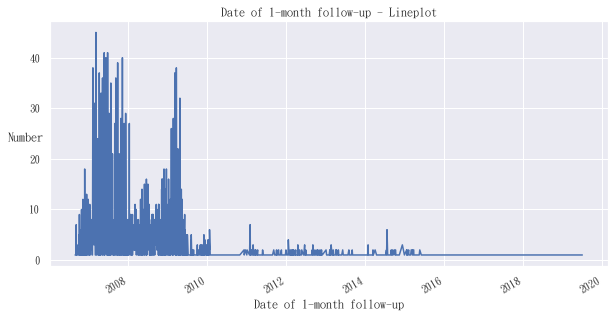

In [5]:
rfur_dt_1 = tsr_6.loc[:, "rfur_dt_1"]
rfur_dt_1 = pd.to_datetime(rfur_dt_1)
#print(rfur_dt_1)
#print(rfur_dt_1.value_counts() / len(rfur_dt_1))
print(rfur_dt_1.describe())

rfur_dt_1.value_counts().plot()
plt.title("Date of 1-month follow-up - Lineplot")
plt.xlabel('Date of 1-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_1

1    0.731872
4    0.188870
5    0.033486
3    0.023609
2    0.022163
Name: location_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


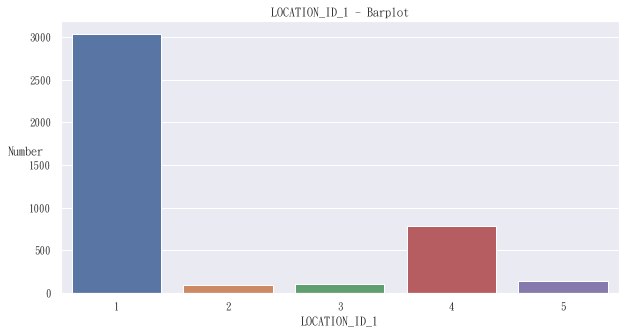

In [6]:
location_id_1 = tsr_6.loc[:,"location_id_1"]
#print(location_id_1)
print(location_id_1.value_counts() / len(location_id_1))
#print(location_id_1.describe())

#location_id_1_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_1)#.set_xticklabels(location_id_1_labels)
plt.title("LOCATION_ID_1 - Barplot")
plt.xlabel('LOCATION_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_1

O     0.974946
22    0.003373
24    0.000964
41    0.000964
26    0.000964
21    0.000964
30    0.000482
29    0.000241
25    0.000241
Name: torg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


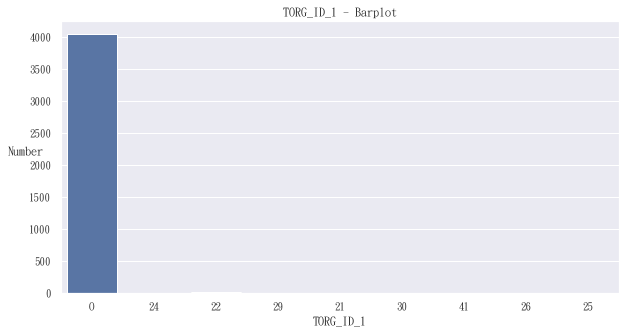

In [7]:
torg_id_1 = tsr_6.loc[:,"torg_id_1"]
#print(torg_id_1)
print(torg_id_1.value_counts() / len(torg_id_1))
#print(torg_id_1.describe())

sns.countplot(torg_id_1)
plt.title("TORG_ID_1 - Barplot")
plt.xlabel('TORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.782462
2.0    0.009395
4.0    0.007227
5.0    0.000723
Name: flu_id_1, dtype: float64


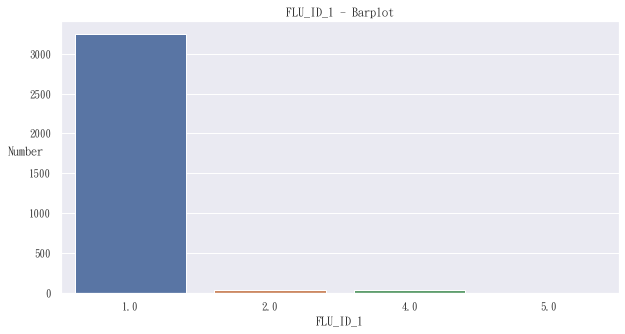

In [8]:
flu_id_1 = tsr_6.loc[:,"flu_id_1"]
#print(flu_id_1)
print(flu_id_1.value_counts() / len(flu_id_1))
#print(flu_id_1.describe())

#flu_id_1_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_1)#.set_xticklabels(flu_id_1_labels)
plt.title("FLU_ID_1 - Barplot")
plt.xlabel('FLU_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O     0.894483
22    0.076367
25    0.007950
21    0.005782
24    0.005541
29    0.001445
41    0.001205
26    0.001205
23    0.000964
32    0.000723
28    0.000723
7     0.000482
33    0.000482
27    0.000482
30    0.000482
53    0.000241
34    0.000241
1     0.000241
12    0.000241
15    0.000241
45    0.000241
Name: fluorg_id_1, dtype: float64


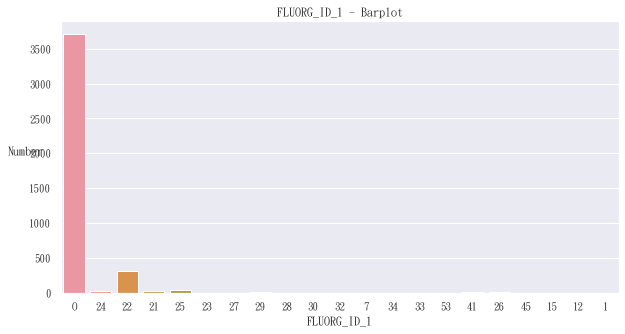

In [9]:
fluorg_id_1 = tsr_6.loc[:,"fluorg_id_1"]
#print(fluorg_id_1)
print(fluorg_id_1.value_counts() / len(fluorg_id_1))
#print(fluorg_id_1.describe())

sns.countplot(fluorg_id_1)
plt.title("FLUORG_ID_1 - Barplot")
plt.xlabel('FLUORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_1

N    0.367381
Name: ve_id_1, dtype: float64


<ipython-input-10-3fbb501c44fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


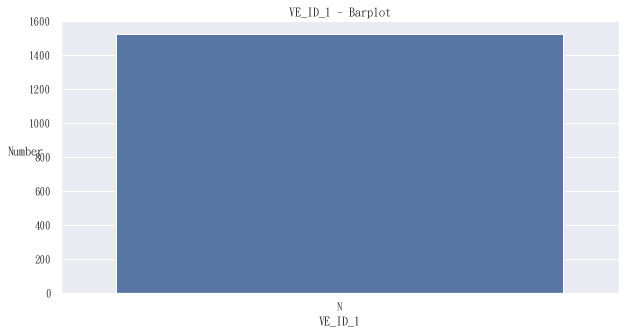

In [10]:
ve_id_1 = tsr_6.loc[:,'ve_id_1']
ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"

#print(ve_id_1)
print(ve_id_1.value_counts() / len(ve_id_1))
#print(ve_id_1.describe())

sns.countplot(ve_id_1)
plt.title("VE_ID_1 - Barplot")
plt.xlabel('VE_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.991086
Y    0.006986
Name: vers_fl_1, dtype: float64


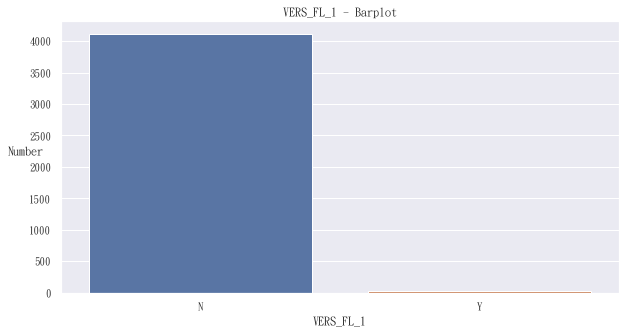

In [11]:
vers_fl_1 = tsr_6.loc[:,'vers_fl_1']
#print(vers_fl_1)
print(vers_fl_1.value_counts() / len(vers_fl_1))
#print(vers_fl_1.describe())

sns.countplot(vers_fl_1)
plt.title("VERS_FL_1 - Barplot")
plt.xlabel('VERS_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_1

1.0    0.00265
Name: verscich_id_1, dtype: float64


<ipython-input-12-6c8e516755e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(1)] = 1
<ipython-input-12-6c8e516755e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(2)] = 2
<ipython-input-12-6c8e516755e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

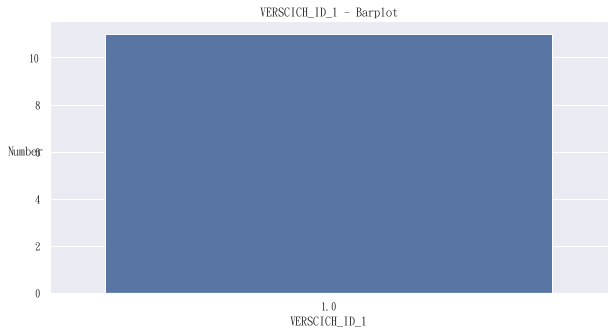

In [12]:
verscich_id_1 = tsr_6.loc[:,'verscich_id_1']
verscich_id_1[verscich_id_1 == str(1)] = 1
verscich_id_1[verscich_id_1 == str(2)] = 2
verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
#print(verscich_id_1)
print(verscich_id_1.value_counts() / len(verscich_id_1))
#print(verscich_id_1.describe())

#verscich_id_1_labels = ["CI","CH"]
sns.countplot(verscich_id_1)#.set_xticklabels(verscich_id_1_labels)
plt.title("VERSCICH_ID_1 - Barplot")
plt.xlabel('VERSCICH_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_1 = verscich_id_1.fillna(999)

# 再中風日期_1

count                      62
unique                     58
top       2008-05-06 00:00:00
freq                        2
first     2006-10-27 00:00:00
last      2015-01-24 00:00:00
Name: vers_dt_1, dtype: object


<ipython-input-13-8762bcfdd0dc>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_1.describe())


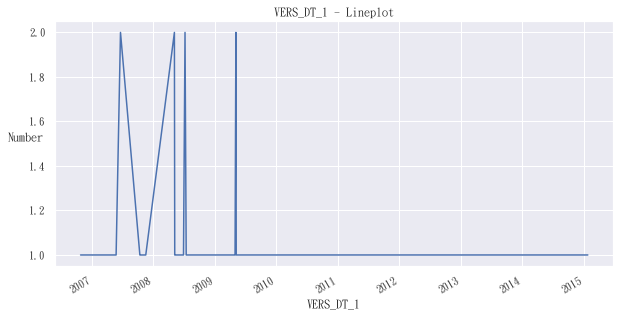

In [13]:
vers_dt_1 = tsr_6.loc[:,'vers_dt_1']
vers_dt_1 = pd.to_datetime(vers_dt_1, errors='coerce')
vers_dt_1[(vers_dt_1.dt.year < 2006) | (vers_dt_1.dt.year > 2021)] = np.nan
#print(vers_dt_1)
#print(vers_dt_1.value_counts() / len(vers_dt_1))
print(vers_dt_1.describe())

vers_dt_1.value_counts().plot()
plt.title("VERS_DT_1 - Lineplot")
plt.xlabel('VERS_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_1

O     0.978318
22    0.002650
N     0.000723
25    0.000241
Name: versorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


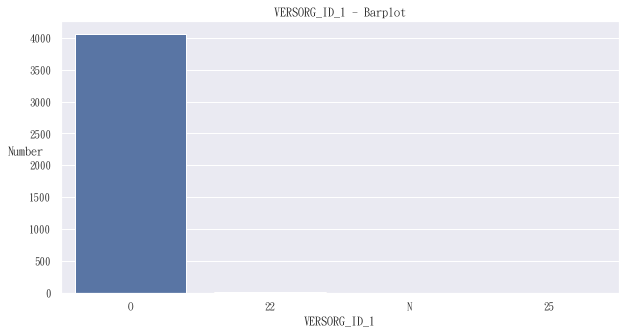

In [14]:
versorg_id_1 = tsr_6.loc[:,'versorg_id_1']
#print(versorg_id_1)
print(versorg_id_1.value_counts() / len(versorg_id_1))
#print(versorg_id_1.describe())

sns.countplot(versorg_id_1)
plt.title("VERSORG_ID_1 - Barplot")
plt.xlabel('VERSORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_1

N    0.997591
Y    0.000241
Name: veihd_fl_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


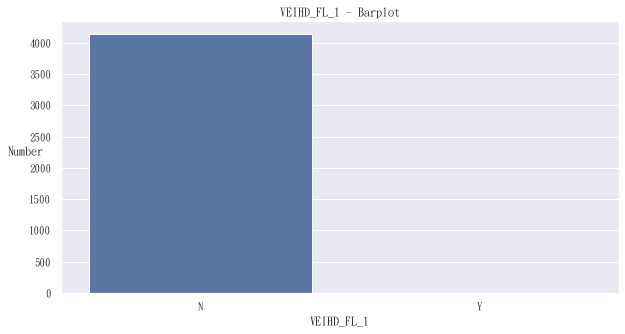

In [15]:
veihd_fl_1 = tsr_6.loc[:,'veihd_fl_1']
#print(veihd_fl_1)
print(veihd_fl_1.value_counts() / len(veihd_fl_1))
#print(veihd_fl_1.describe())

sns.countplot(veihd_fl_1)
plt.title("VEIHD_FL_1 - Barplot")
plt.xlabel('VEIHD_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_1

# Ischemic Heart Disease日期_1

<ipython-input-16-811e05d2fb6c>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_1.describe())


count                       4
unique                      4
top       2008-04-03 00:00:00
freq                        1
first     2007-05-16 00:00:00
last      2009-04-17 00:00:00
Name: veihd_dt_1, dtype: object


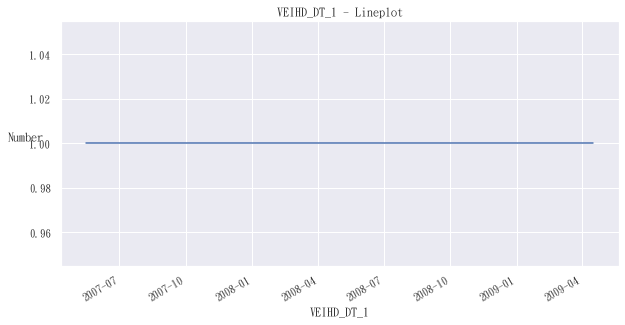

In [16]:
veihd_dt_1 = tsr_6.loc[:,'veihd_dt_1']
veihd_dt_1 = pd.to_datetime(veihd_dt_1, errors='coerce')
veihd_dt_1[(veihd_dt_1.dt.year < 2006) | (veihd_dt_1.dt.year > 2021)] = np.nan
#print(veihd_dt_1)
#print(veihd_dt_1.value_counts() / len(veihd_dt_1))
print(veihd_dt_1.describe())

veihd_dt_1.value_counts().plot()
plt.title("VEIHD_DT_1 - Lineplot")
plt.xlabel('VEIHD_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_1

0    0.883642
O    0.097808
4    0.000241
Name: veihdorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


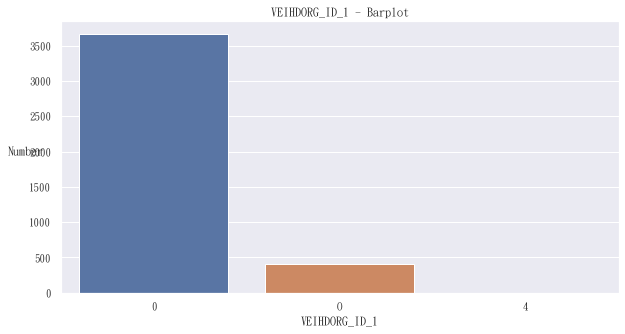

In [17]:
veihdorg_id_1 = tsr_6.loc[:,'veihdorg_id_1']
#print(veihdorg_id_1)
print(veihdorg_id_1.value_counts() / len(veihdorg_id_1))
#print(veihdorg_id_1.describe())

sns.countplot(veihdorg_id_1)
plt.title("VEIHDORG_ID_1 - Barplot")
plt.xlabel('VEIHDORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_1

1.0    0.257046
4.0    0.196579
2.0    0.164539
3.0    0.143580
5.0    0.125994
0.0    0.112262
Name: mrs_tx_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


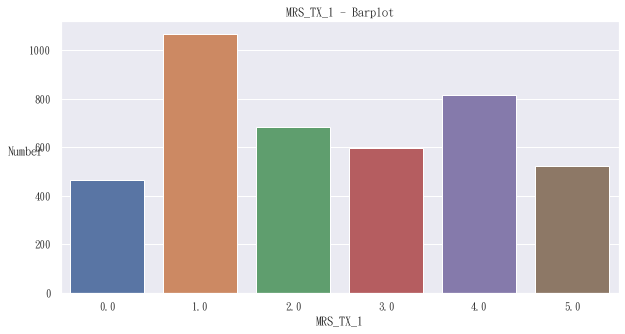

In [18]:
mrs_tx_1 = tsr_6.loc[:,'mrs_tx_1']
mrs_tx_1 = mrs_tx_1.fillna(mrs_tx_1.mode()[0])
#print(mrs_tx_1)
print(mrs_tx_1.value_counts() / len(mrs_tx_1))
#print(mrs_tx_1.describe())

sns.countplot(mrs_tx_1)
plt.title("MRS_TX_1 - Barplot")
plt.xlabel('MRS_TX_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 追蹤日期_3

<ipython-input-19-54d4f4fd6c47>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_3.describe())


count                    4148
unique                   1163
top       2007-08-23 00:00:00
freq                       50
first     2006-10-22 00:00:00
last      2019-08-27 00:00:00
Name: rfur_dt_3, dtype: object


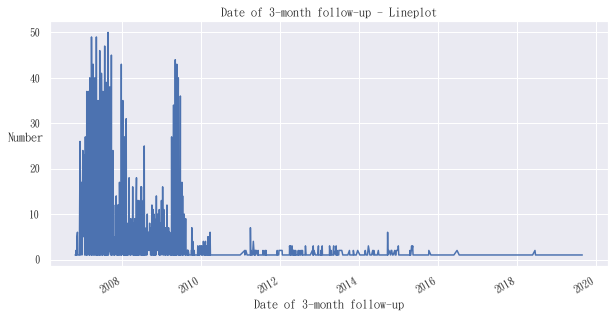

In [19]:
rfur_dt_3 = tsr_6.loc[:, "rfur_dt_3"]
rfur_dt_3 = pd.to_datetime(rfur_dt_3, errors = "coerce")
#print(rfur_dt_3)
#print(rfur_dt_3.value_counts() / len(rfur_dt_3))
print(rfur_dt_3.describe())

rfur_dt_3.value_counts().plot()
plt.title("Date of 3-month follow-up - Lineplot")
plt.xlabel('Date of 3-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_3

1    0.422308
1    0.416044
5    0.035895
5    0.031800
2    0.024091
2    0.021682
4    0.019032
4    0.018068
3    0.005300
3    0.004577
O    0.000723
Name: location_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


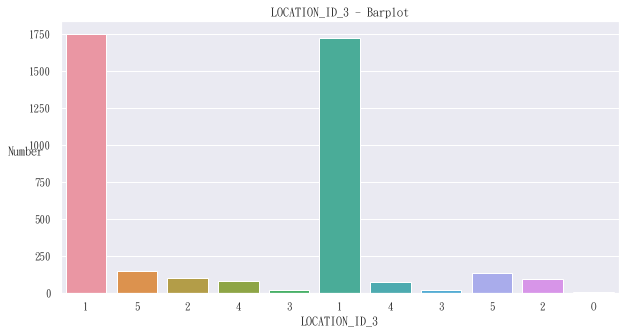

In [20]:
location_id_3 = tsr_6.loc[:,"location_id_3"]
#print(location_id_3)
print(location_id_3.value_counts() / len(location_id_3))
#print(location_id_3.describe())

#location_id_3_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_3)#.set_xticklabels(location_id_3_labels)
plt.title("LOCATION_ID_3 - Barplot")
plt.xlabel('LOCATION_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O     0.978559
21    0.004095
22    0.002891
24    0.000482
2     0.000482
41    0.000241
44    0.000241
1     0.000241
Name: torg_id_3, dtype: float64


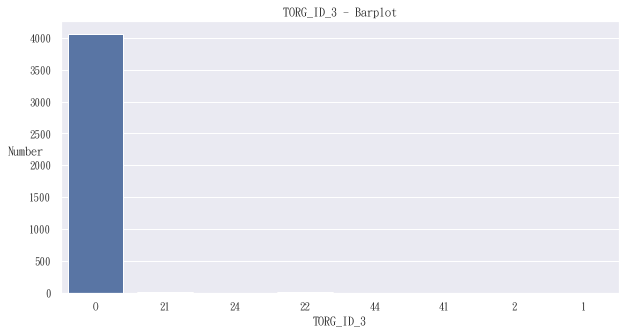

In [21]:
torg_id_3 = tsr_6.loc[:,"torg_id_3"]
#print(torg_id_3)
print(torg_id_3.value_counts() / len(torg_id_3))
#print(torg_id_3.describe())

sns.countplot(torg_id_3)
plt.title("TORG_ID_3 - Barplot")
plt.xlabel('TORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1      0.445194
1.0    0.434112
2.0    0.013491
2      0.012768
4.0    0.005541
4      0.002650
5.0    0.000964
O      0.000723
5      0.000241
Name: flu_id_3, dtype: float64


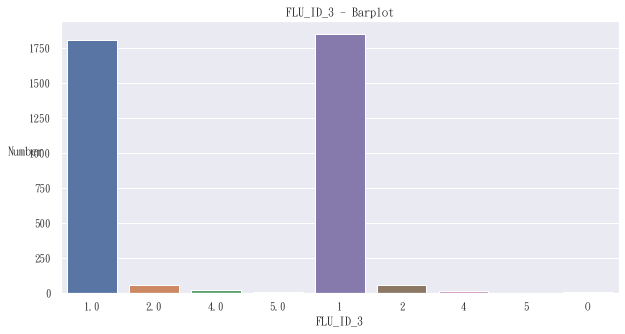

In [22]:
flu_id_3 = tsr_6.loc[:,"flu_id_3"]
#print(flu_id_3)
print(flu_id_3.value_counts() / len(flu_id_3))
#print(flu_id_3.describe())

#flu_id_3_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_3)#.set_xticklabels(flu_id_3_labels)
plt.title("FLU_ID_3 - Barplot")
plt.xlabel('FLU_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O          0.903397
22         0.067935
21         0.008673
25         0.006986
24         0.004818
28         0.001445
29         0.000964
23         0.000723
32         0.000723
7          0.000482
33         0.000482
27         0.000482
41         0.000482
1          0.000241
12         0.000241
34         0.000241
44         0.000241
26         0.000241
45         0.000241
?��??�?    0.000241
Name: fluorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


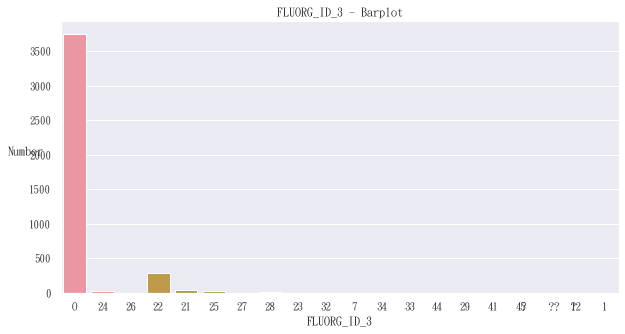

In [23]:
fluorg_id_3 = tsr_6.loc[:,"fluorg_id_3"]
#print(fluorg_id_3)
print(fluorg_id_3.value_counts() / len(fluorg_id_3))
#print(fluorg_id_3.describe())

sns.countplot(fluorg_id_3)
plt.title("FLUORG_ID_3 - Barplot")
plt.xlabel('FLUORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_3

<ipython-input-24-f523ab480938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_3[(ve_id_3 == str(0)) | (ve_id_3 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.365936
Name: ve_id_3, dtype: float64


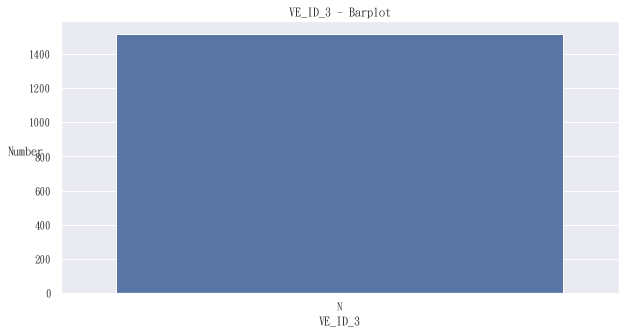

In [24]:
ve_id_3 = tsr_6.loc[:,'ve_id_3']
ve_id_3[(ve_id_3 == str(0)) | (ve_id_3 == 0)] = "N"

#print(ve_id_3)
print(ve_id_3.value_counts() / len(ve_id_3))
#print(ve_id_3.describe())

sns.countplot(ve_id_3)
plt.title("VE_ID_3 - Barplot")
plt.xlabel('VE_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_3

<ipython-input-25-38c1c1e808a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vers_fl_3[(vers_fl_3 != "N") & (vers_fl_3 != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.985787
Y    0.010359
Name: vers_fl_3, dtype: float64


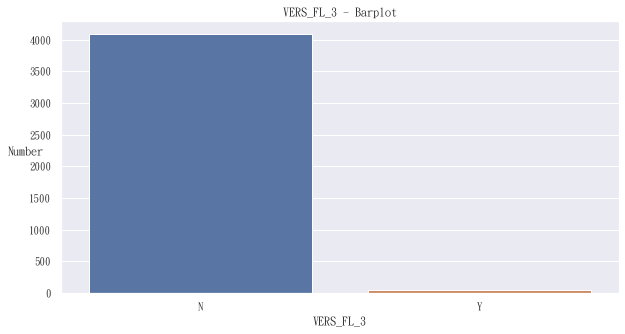

In [25]:
vers_fl_3 = tsr_6.loc[:,'vers_fl_3']
vers_fl_3[(vers_fl_3 != "N") & (vers_fl_3 != "Y")] = np.nan
#print(vers_fl_3)
print(vers_fl_3.value_counts() / len(vers_fl_3))
#print(vers_fl_3.describe())

sns.countplot(vers_fl_3)
plt.title("VERS_FL_3 - Barplot")
plt.xlabel('VERS_FL_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_3

1    0.003132
Name: verscich_id_3, dtype: float64


<ipython-input-26-37153ca8a5b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[verscich_id_3 == str(1)] = 1
<ipython-input-26-37153ca8a5b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[verscich_id_3 == str(2)] = 2
<ipython-input-26-37153ca8a5b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_3[(verscich_id_3 != 1) & (verscich_id_3 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

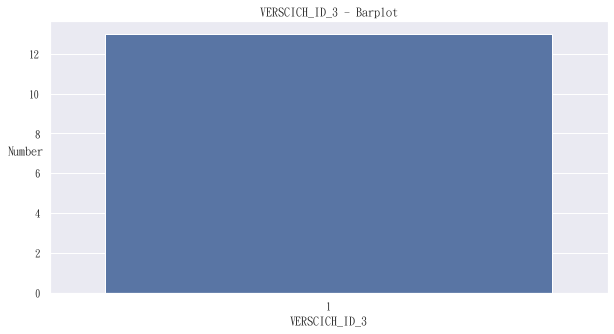

In [26]:
verscich_id_3 = tsr_6.loc[:,'verscich_id_3']
verscich_id_3[verscich_id_3 == str(1)] = 1
verscich_id_3[verscich_id_3 == str(2)] = 2
verscich_id_3[(verscich_id_3 != 1) & (verscich_id_3 != 2)] = np.nan
#print(verscich_id_3)
print(verscich_id_3.value_counts() / len(verscich_id_3))
#print(verscich_id_3.describe())

#verscich_id_3_labels = ["CI","CH"]
sns.countplot(verscich_id_3)#.set_xticklabels(verscich_id_3_labels)
plt.title("VERSCICH_ID_3 - Barplot")
plt.xlabel('VERSCICH_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_3 = verscich_id_3.fillna(999)

# 再中風日期_3

count                      82
unique                     77
top       2008-05-17 00:00:00
freq                        3
first     2006-10-23 00:00:00
last      2015-03-20 00:00:00
Name: vers_dt_3, dtype: object


<ipython-input-27-10d548d8f98d>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_3.describe())


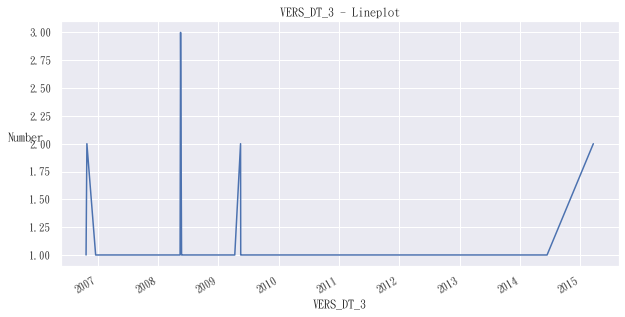

In [27]:
vers_dt_3 = tsr_6.loc[:,'vers_dt_3']
vers_dt_3 = pd.to_datetime(vers_dt_3, errors='coerce')
vers_dt_3[(vers_dt_3.dt.year < 2006) | (vers_dt_3.dt.year > 2023)] = np.nan
#print(vers_dt_3)
#print(vers_dt_3.value_counts() / len(vers_dt_3))
print(vers_dt_3.describe())

vers_dt_3.value_counts().plot()
plt.title("VERS_DT_3 - Lineplot")
plt.xlabel('VERS_DT_3')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_3

O     0.981450
22    0.003373
N     0.002409
25    0.000241
Name: versorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


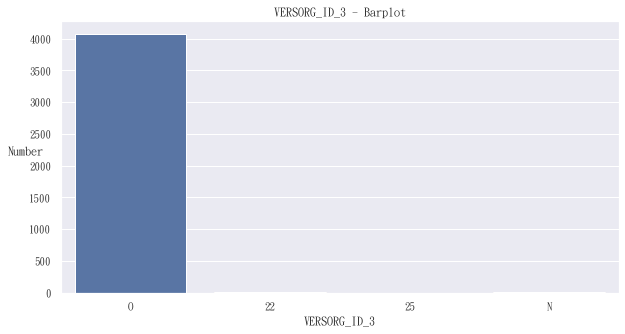

In [28]:
versorg_id_3 = tsr_6.loc[:,'versorg_id_3']
#print(versorg_id_3)
print(versorg_id_3.value_counts() / len(versorg_id_3))
#print(versorg_id_3.describe())

sns.countplot(versorg_id_3)
plt.title("VERSORG_ID_3 - Barplot")
plt.xlabel('VERSORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_3

N           0.994218
1900/1/1    0.000723
Name: veihd_fl_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


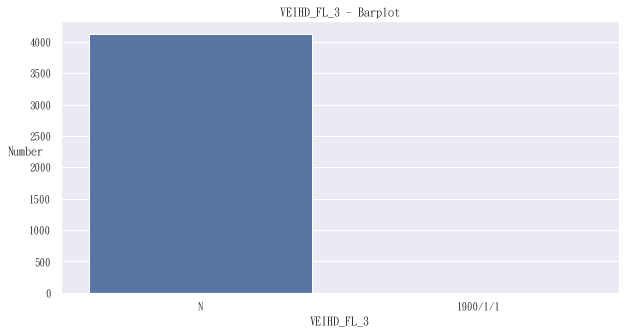

In [29]:
veihd_fl_3 = tsr_6.loc[:,'veihd_fl_3']
#print(veihd_fl_3)
print(veihd_fl_3.value_counts() / len(veihd_fl_3))
#print(veihd_fl_3.describe())

sns.countplot(veihd_fl_3)
plt.title("VEIHD_FL_3 - Barplot")
plt.xlabel('VEIHD_FL_3')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_3

# Ischemic Heart Disease日期_3

<ipython-input-30-594d4ea51cc1>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_3.describe())


count                       4
unique                      4
top       2008-06-04 00:00:00
freq                        1
first     2007-03-10 00:00:00
last      2008-06-04 00:00:00
Name: veihd_dt_3, dtype: object


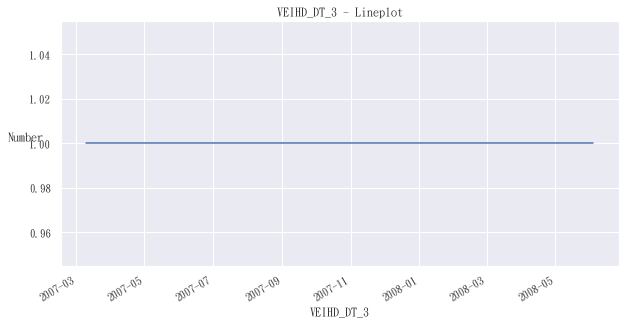

In [30]:
veihd_dt_3 = tsr_6.loc[:,'veihd_dt_3']
veihd_dt_3 = pd.to_datetime(veihd_dt_3, errors='coerce')
veihd_dt_3[(veihd_dt_3.dt.year < 2006) | (veihd_dt_3.dt.year > 2023)] = np.nan
#print(veihd_dt_3)
#print(veihd_dt_3.value_counts() / len(veihd_dt_3))
print(veihd_dt_3.describe())

veihd_dt_3.value_counts().plot()
plt.title("VEIHD_DT_3 - Lineplot")
plt.xlabel('VEIHD_DT_3')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_3

0    0.882438
O    0.101662
1    0.000964
3    0.000241
4    0.000241
Name: veihdorg_id_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


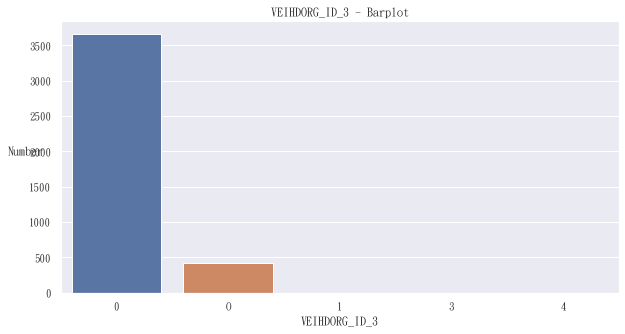

In [31]:
veihdorg_id_3 = tsr_6.loc[:,'veihdorg_id_3']
#print(veihdorg_id_3)
print(veihdorg_id_3.value_counts() / len(veihdorg_id_3))
#print(veihdorg_id_3.describe())

sns.countplot(veihdorg_id_3)
plt.title("VEIHDORG_ID_3 - Barplot")
plt.xlabel('VEIHDORG_ID_3')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_3

1.0    0.277523
4.0    0.165984
2.0    0.150084
3.0    0.145748
0.0    0.143339
5.0    0.117321
Name: mrs_tx_3, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


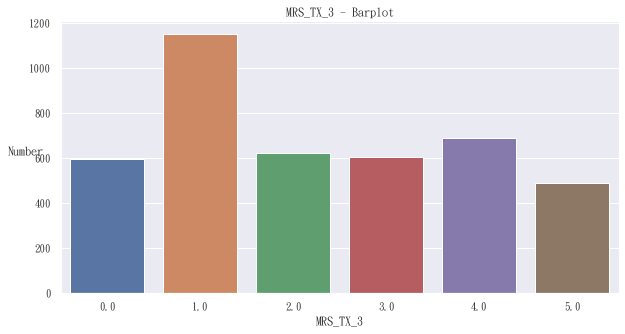

In [32]:
mrs_tx_3 = tsr_6.loc[:,'mrs_tx_3']
mrs_tx_3 = mrs_tx_3.fillna(mrs_tx_3.mode()[0])
#print(mrs_tx_3)
print(mrs_tx_3.value_counts() / len(mrs_tx_3))
#print(mrs_tx_3.describe())

sns.countplot(mrs_tx_3)
plt.title("MRS_TX_3 - Barplot")
plt.xlabel('MRS_TX_3')
plt.ylabel('Number', rotation=0)
plt.show()

# 追蹤日期_6

<ipython-input-33-3c28b1ecd303>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_6.describe())


count                    4138
unique                   1149
top       2009-09-03 00:00:00
freq                       52
first     2007-01-23 00:00:00
last      2019-11-28 00:00:00
Name: rfur_dt_6, dtype: object


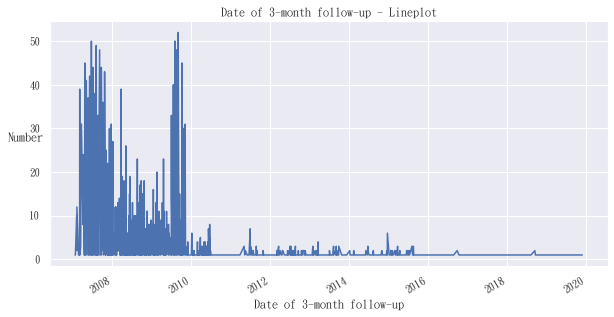

In [33]:
rfur_dt_6 = tsr_6.loc[:, "rfur_dt_6"]
rfur_dt_6 = pd.to_datetime(rfur_dt_6, errors = "coerce")
#print(rfur_dt_6)
#print(rfur_dt_6.value_counts() / len(rfur_dt_6))
print(rfur_dt_6.describe())

rfur_dt_6.value_counts().plot()
plt.title("Date of 3-month follow-up - Lineplot")
plt.xlabel('Date of 3-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_6

1    0.867743
2    0.049386
5    0.035172
4    0.022404
1    0.010600
3    0.009395
O    0.002409
2    0.001205
5    0.000723
4    0.000482
3    0.000241
Name: location_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


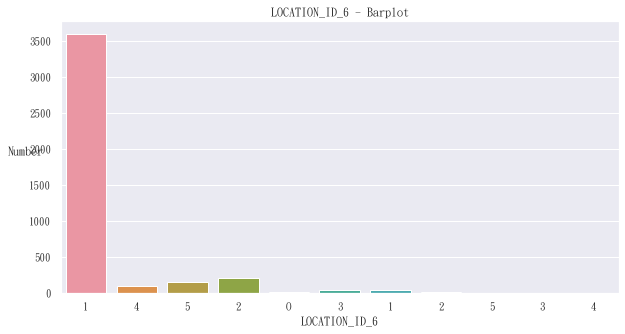

In [34]:
location_id_6 = tsr_6.loc[:,"location_id_6"]
#print(location_id_6)
print(location_id_6.value_counts() / len(location_id_6))
#print(location_id_6.describe())

#location_id_6_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_6)#.set_xticklabels(location_id_6_labels)
plt.title("LOCATION_ID_6 - Barplot")
plt.xlabel('LOCATION_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_6

O     0.984100
21    0.002168
1     0.001686
22    0.000964
2     0.000723
26    0.000241
44    0.000241
Name: torg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


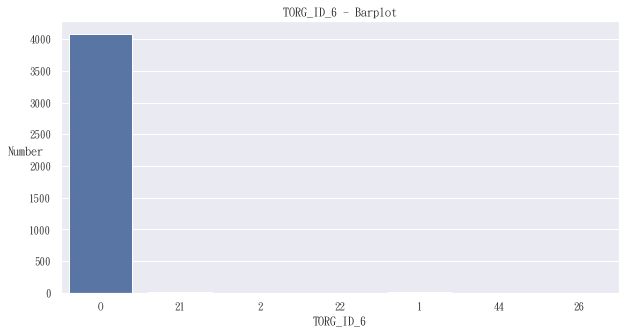

In [35]:
torg_id_6 = tsr_6.loc[:,"torg_id_6"]
#print(torg_id_6)
print(torg_id_6.value_counts() / len(torg_id_6))
#print(torg_id_6.describe())

sns.countplot(torg_id_6)
plt.title("TORG_ID_6 - Barplot")
plt.xlabel('TORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_6

1          0.878343
2          0.040954
1          0.012768
4          0.007950
O          0.002409
2          0.000482
5          0.000482
?��??�?    0.000241
Name: flu_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


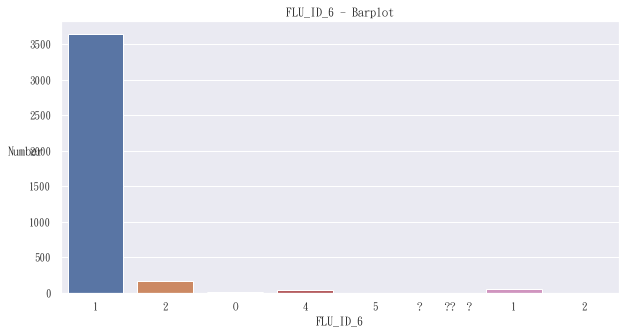

In [36]:
flu_id_6 = tsr_6.loc[:,"flu_id_6"]
#print(flu_id_6)
print(flu_id_6.value_counts() / len(flu_id_6))
#print(flu_id_6.describe())

#flu_id_6_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_6)#.set_xticklabels(flu_id_6_labels)
plt.title("FLU_ID_6 - Barplot")
plt.xlabel('FLU_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_6

O                    0.902433
22                   0.068176
21                   0.007468
25                   0.006504
24                   0.003854
28                   0.001205
29                   0.000964
衛�??�?               0.000964
26                   0.000964
23                   0.000723
32                   0.000723
7                    0.000482
12                   0.000482
1                    0.000482
41                   0.000482
27                   0.000482
?��??�?"1900/1/1"    0.000482
33                   0.000482
1900/1/1             0.000241
?��??�診?�?           0.000241
34                   0.000241
44                   0.000241
?�屯衛�??�?            0.000241
61                   0.000241
?�家庭診?�?             0.000241
45                   0.000241
Name: fluorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


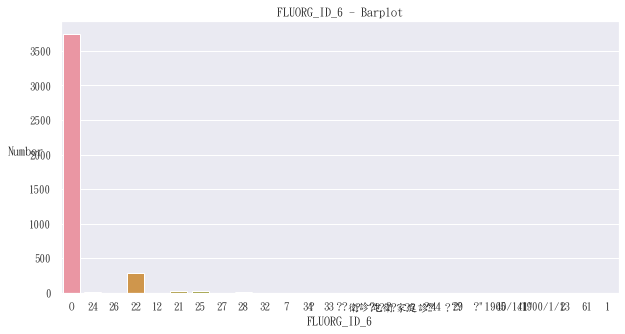

In [37]:
fluorg_id_6 = tsr_6.loc[:,"fluorg_id_6"]
#print(fluorg_id_6)
print(fluorg_id_6.value_counts() / len(fluorg_id_6))
#print(fluorg_id_6.describe())

sns.countplot(fluorg_id_6)
plt.title("FLUORG_ID_6 - Barplot")
plt.xlabel('FLUORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_6

N           0.362563
1900/1/1    0.000723
Name: ve_id_6, dtype: float64


<ipython-input-38-76908da17f38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_6[(ve_id_6 == str(0)) | (ve_id_6 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


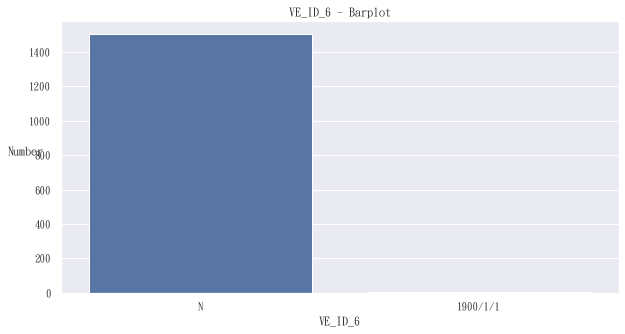

In [38]:
ve_id_6 = tsr_6.loc[:,'ve_id_6']
ve_id_6[(ve_id_6 == str(0)) | (ve_id_6 == 0)] = "N"

#print(ve_id_6)
print(ve_id_6.value_counts() / len(ve_id_6))
#print(ve_id_6.describe())

sns.countplot(ve_id_6)
plt.title("VE_ID_6 - Barplot")
plt.xlabel('VE_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_6

N    0.982414
Y    0.013009
Name: vers_fl_6, dtype: float64


<ipython-input-39-3a4641f19bbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vers_fl_6[(vers_fl_6 != "N") & (vers_fl_6 != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


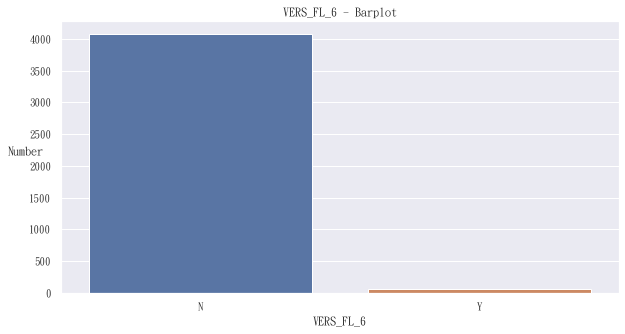

In [39]:
vers_fl_6 = tsr_6.loc[:,'vers_fl_6']
vers_fl_6[(vers_fl_6 != "N") & (vers_fl_6 != "Y")] = np.nan
#print(vers_fl_6)
print(vers_fl_6.value_counts() / len(vers_fl_6))
#print(vers_fl_6.describe())

sns.countplot(vers_fl_6)
plt.title("VERS_FL_6 - Barplot")
plt.xlabel('VERS_FL_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_6

1    0.007468
Name: verscich_id_6, dtype: float64


<ipython-input-40-48a7e2f995e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[verscich_id_6 == str(1)] = 1
<ipython-input-40-48a7e2f995e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[verscich_id_6 == str(2)] = 2
<ipython-input-40-48a7e2f995e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_6[(verscich_id_6 != 1) & (verscich_id_6 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

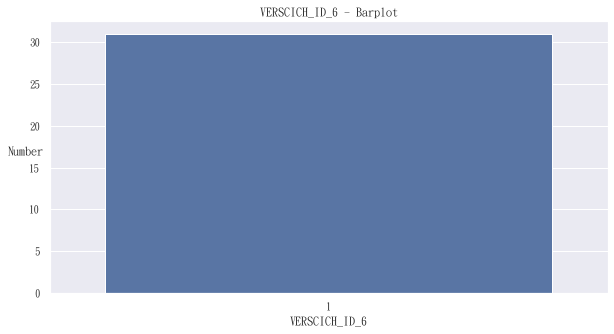

In [40]:
verscich_id_6 = tsr_6.loc[:,'verscich_id_6']
verscich_id_6[verscich_id_6 == str(1)] = 1
verscich_id_6[verscich_id_6 == str(2)] = 2
verscich_id_6[(verscich_id_6 != 1) & (verscich_id_6 != 2)] = np.nan
#print(verscich_id_6)
print(verscich_id_6.value_counts() / len(verscich_id_6))
#print(verscich_id_6.describe())

#verscich_id_6_labels = ["CI","CH"]
sns.countplot(verscich_id_6)#.set_xticklabels(verscich_id_6_labels)
plt.title("VERSCICH_ID_6 - Barplot")
plt.xlabel('VERSCICH_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_6 = verscich_id_6.fillna(999)

# 再中風日期_6

count                      97
unique                     91
top       2011-02-16 00:00:00
freq                        3
first     2007-02-02 00:00:00
last      2017-12-23 00:00:00
Name: vers_dt_6, dtype: object


<ipython-input-41-65345e9fa04e>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_6.describe())


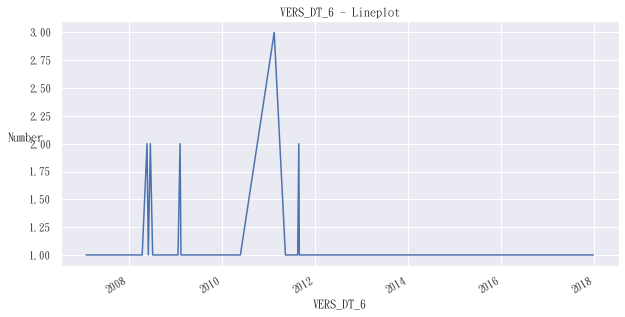

In [41]:
vers_dt_6 = tsr_6.loc[:,'vers_dt_6']
vers_dt_6 = pd.to_datetime(vers_dt_6, errors='coerce')
vers_dt_6[(vers_dt_6.dt.year < 2006) | (vers_dt_6.dt.year > 2023)] = np.nan
#print(vers_dt_6)
#print(vers_dt_6.value_counts() / len(vers_dt_6))
print(vers_dt_6.describe())

vers_dt_6.value_counts().plot()
plt.title("VERS_DT_6 - Lineplot")
plt.xlabel('VERS_DT_6')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_6

O           0.980487
22          0.006745
N           0.001445
1900/1/1    0.000723
21          0.000482
45          0.000241
12          0.000241
28          0.000241
Name: versorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


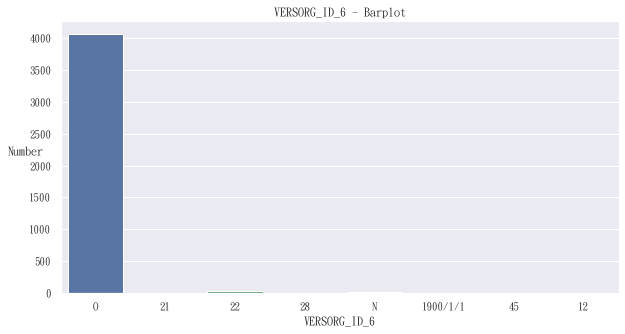

In [42]:
versorg_id_6 = tsr_6.loc[:,'versorg_id_6']
#print(versorg_id_6)
print(versorg_id_6.value_counts() / len(versorg_id_6))
#print(versorg_id_6.describe())

sns.countplot(versorg_id_6)
plt.title("VERSORG_ID_6 - Barplot")
plt.xlabel('VERSORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_6

N           0.992050
1900/1/1    0.002409
O           0.000723
Y           0.000241
Name: veihd_fl_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


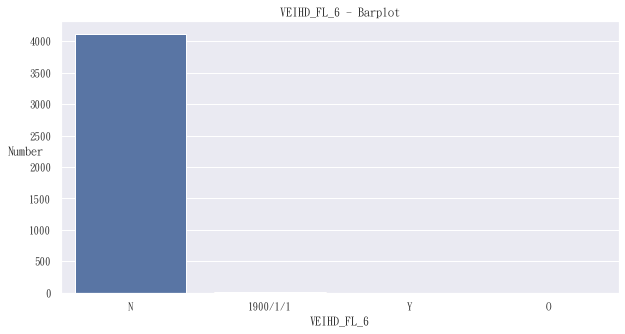

In [43]:
veihd_fl_6 = tsr_6.loc[:,'veihd_fl_6']
#print(veihd_fl_6)
print(veihd_fl_6.value_counts() / len(veihd_fl_6))
#print(veihd_fl_6.describe())

sns.countplot(veihd_fl_6)
plt.title("VEIHD_FL_6 - Barplot")
plt.xlabel('VEIHD_FL_6')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_6

# Ischemic Heart Disease日期_6

<ipython-input-44-95a8387603ff>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_6.describe())


count                       3
unique                      3
top       2009-09-04 00:00:00
freq                        1
first     2008-02-14 00:00:00
last      2009-09-04 00:00:00
Name: veihd_dt_6, dtype: object


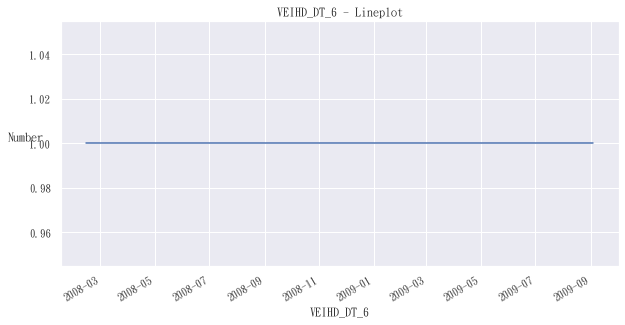

In [44]:
veihd_dt_6 = tsr_6.loc[:,'veihd_dt_6']
veihd_dt_6 = pd.to_datetime(veihd_dt_6, errors='coerce')
veihd_dt_6[(veihd_dt_6.dt.year < 2006) | (veihd_dt_6.dt.year > 2023)] = np.nan
#print(veihd_dt_6)
#print(veihd_dt_6.value_counts() / len(veihd_dt_6))
print(veihd_dt_6.describe())

veihd_dt_6.value_counts().plot()
plt.title("VEIHD_DT_6 - Lineplot")
plt.xlabel('VEIHD_DT_6')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_6

0    0.881233
O    0.105035
4    0.000241
5    0.000241
Name: veihdorg_id_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


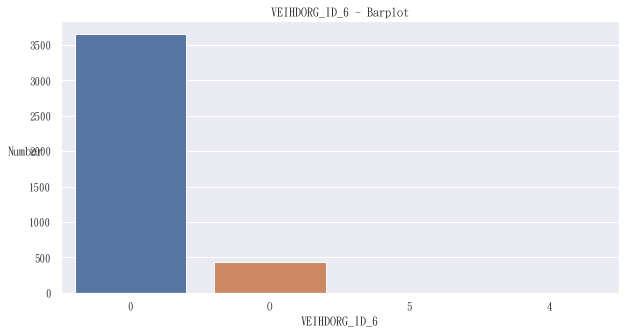

In [45]:
veihdorg_id_6 = tsr_6.loc[:,'veihdorg_id_6']
#print(veihdorg_id_6)
print(veihdorg_id_6.value_counts() / len(veihdorg_id_6))
#print(veihdorg_id_6.describe())

sns.countplot(veihdorg_id_6)
plt.title("VEIHDORG_ID_6 - Barplot")
plt.xlabel('VEIHDORG_ID_6')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_6 (Outcome)

1.0    0.288846
0.0    0.165502
4.0    0.146230
3.0    0.139484
2.0    0.137557
5.0    0.122380
Name: mrs_tx_6, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


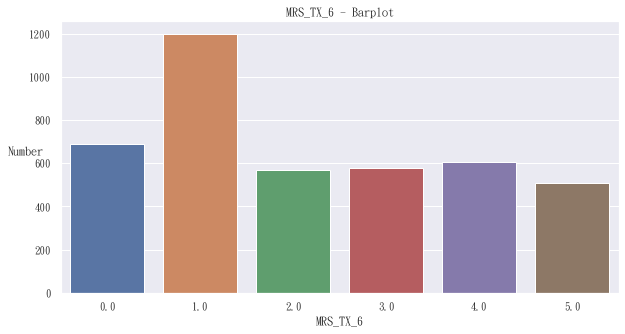

In [46]:
mrs_tx_6 = tsr_6.loc[:,'mrs_tx_6']
mrs_tx_6 = mrs_tx_6.fillna(mrs_tx_6.mode()[0])
#print(mrs_tx_6)
print(mrs_tx_6.value_counts() / len(mrs_tx_6))
#print(mrs_tx_6.describe())

sns.countplot(mrs_tx_6)
plt.title("MRS_TX_6 - Barplot")
plt.xlabel('MRS_TX_6')
plt.ylabel('Number', rotation=0)
plt.show()

# 身高

<ipython-input-47-a7908cd2a89f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      162.109880
std         7.857826
min       138.000000
25%       156.000000
50%       162.110000
75%       168.000000
max       186.000000
Name: height_nm, dtype: float64


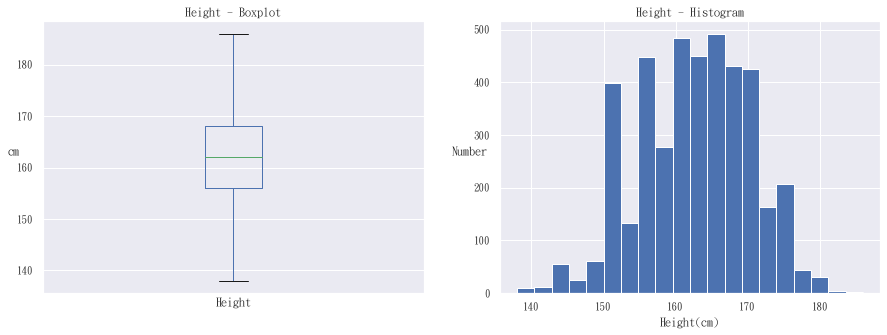

In [47]:
height_nm = tsr_6.loc[:, "height_nm"]

q1 = height_nm.quantile(0.25)
q3 = height_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan

height_nm = height_nm.fillna(round(height_nm.mean(),3))

#print(height_nm)
#print(height_nm.value_counts() / len(height_nm))
print(height_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

height_nm.plot.box(ax = ax1)
ax1.set_title("Height - Boxplot")
ax1.set_xlabel('Height')
ax1.set_ylabel('cm', rotation=0)
ax1.set_xticks([])

height_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Height - Histogram")
ax2.set_xlabel('Height(cm)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 體重

<ipython-input-48-0b515be73dbd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_nm[(weight_nm < inner_fence_low) | (weight_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       64.075809
std        10.863289
min        33.000000
25%        56.250000
50%        64.076000
75%        71.000000
max        96.000000
Name: weight_nm, dtype: float64


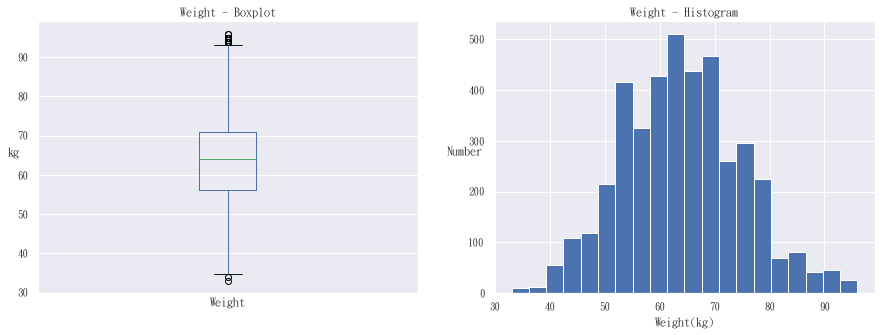

In [48]:
weight_nm = tsr_6.loc[:,"weight_nm"]

q1 = weight_nm.quantile(0.25)
q3 = weight_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
weight_nm[(weight_nm < inner_fence_low) | (weight_nm > inner_fence_upp)] = np.nan

weight_nm = weight_nm.fillna(round(weight_nm.mean(),3))

#print(weight_nm)
#print(weight_nm.value_counts()len(weight_nm))
print(weight_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

weight_nm.plot.box(ax = ax1)
ax1.set_title("Weight - Boxplot")
ax1.set_xlabel('Weight')
ax1.set_ylabel('kg', rotation=0)
ax1.set_xticks([])

weight_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Weight - Histogram")
ax2.set_xlabel('Weight(kg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 教育程度

2.0    0.394363
1.0    0.182607
4.0    0.163334
3.0    0.143580
5.0    0.107926
6.0    0.006023
7.0    0.002168
Name: edu_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


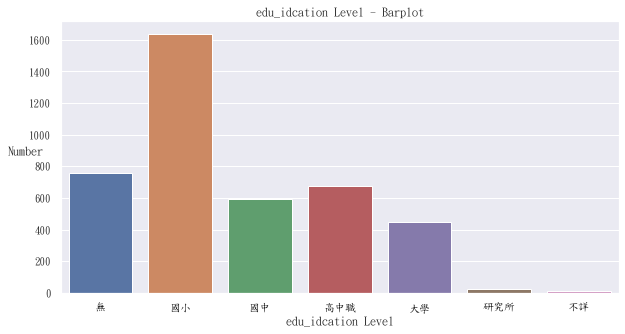

In [49]:
edu_id = tsr_6.loc[:,"edu_id"]
edu_id = pd.to_numeric(edu_id, errors = 'coerce')
edu_id[(edu_id != 1) & (edu_id != 2) & (edu_id != 3) & (edu_id != 4) & (edu_id != 5) & (edu_id != 6) & (edu_id != 7)] = np.nan
edu_id =edu_id.fillna((edu_id.mode()[0]))
#print(edu_id)
print(edu_id.value_counts() / len(edu_id))
#print(edu_id.describe())

edu_id_labels = ["無","國小","國中","高中職","大學","研究所","不詳"]
sns.countplot(edu_id).set_xticklabels(edu_id_labels)
plt.title("edu_idcation Level - Barplot")
plt.xlabel('edu_idcation Level')
plt.ylabel('Number', rotation=0)
plt.show()

# 職業

1.0     0.574079
10.0    0.130571
5.0     0.084076
8.0     0.071308
7.0     0.065767
6.0     0.042881
3.0     0.013491
4.0     0.005300
12.0    0.005059
9.0     0.004818
2.0     0.001445
11.0    0.001205
Name: pro_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


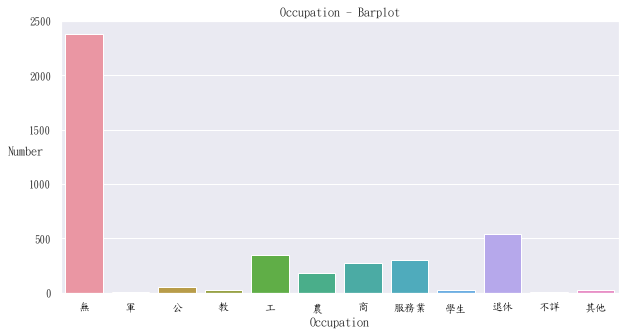

In [50]:
pro_id = tsr_6.loc[:,"pro_id"]
pro_id = pd.to_numeric(pro_id, errors = 'coerce')
pro_id[(pro_id != 1) & (pro_id != 2) & (pro_id != 3) & (pro_id != 4) & (pro_id != 5) & (pro_id != 6) & (pro_id != 7) & (pro_id != 8) & (pro_id != 9) & (pro_id != 10) & (pro_id != 11) & (pro_id != 12)] = np.nan
pro_id =pro_id.fillna((pro_id.mode()[0]))
#print(pro_id)
print(pro_id.value_counts() / len(pro_id))
#print(pro_id.describe())

pro_id_labels = ["無","軍","公","教","工","農","商","服務業","學生","退休","不詳","其他"]
sns.countplot(pro_id).set_xticklabels(pro_id_labels)
plt.title("Occupation - Barplot")
plt.xlabel('Occupation')
plt.ylabel('Number', rotation=0)
plt.show()

# 入院方式

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.0    0.925078
2.0    0.059745
1.0    0.015177
Name: opc_id, dtype: float64


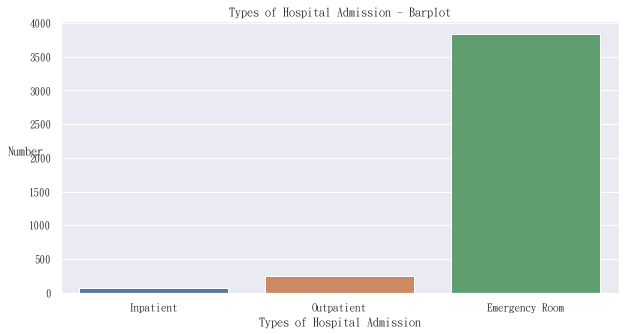

In [51]:
opc_id = tsr_6.loc[:,"opc_id"]
opc_id = pd.to_numeric(opc_id, errors = "coerce")
opc_id[(opc_id != 1) & (opc_id != 2) & (opc_id != 3)] = np.nan
opc_id =opc_id.fillna((opc_id.mode()[0]))
#print(opc_id)
print(opc_id.value_counts() / len(opc_id))
#print(opc_id.describe())

opc_id_labels = ["Inpatient","Outpatient","Emergency Room"]
sns.countplot(opc_id).set_xticklabels(opc_id_labels)
plt.title("Types of Hospital Admission - Barplot")
plt.xlabel('Types of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.show()

# 不住院

<ipython-input-52-fa761c4afd15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.998555
1    0.001445
Name: ih_fl, dtype: float64


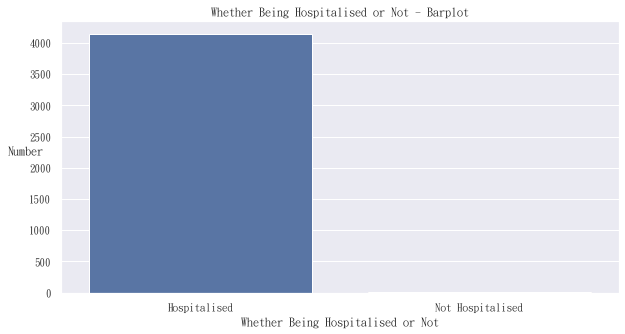

In [52]:
ih_fl = tsr_6.loc[:,"ih_fl"]
ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
ih_fl =ih_fl.fillna((ih_fl.mode()[0]))
#print(ih_fl)
print(ih_fl.value_counts() / len(ih_fl))
#print(ih_fl.describe())

ih_fl_labels = ["Hospitalised","Not Hospitalised"]
sns.countplot(ih_fl).set_xticklabels(ih_fl_labels)
plt.title("Whether Being Hospitalised or Not - Barplot")
plt.xlabel('Whether Being Hospitalised or Not')
plt.ylabel('Number', rotation=0)
plt.show()

# 住院日期

count                    4151
unique                   1489
top       2008-04-27 00:00:00
freq                       22
first     2006-08-01 00:00:00
last      2019-05-28 00:00:00
Name: ih_dt, dtype: object


<ipython-input-53-15a45b76af24>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(ih_dt.describe())


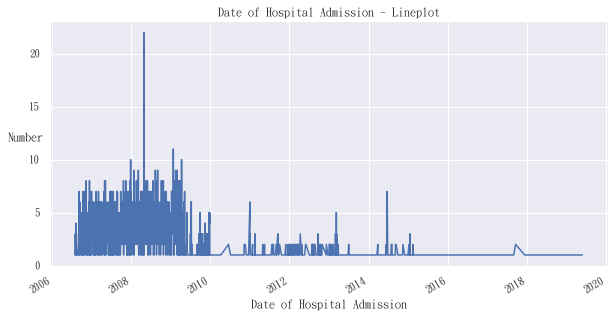

In [53]:
ih_dt = tsr_6.loc[:,"ih_dt"]
ih_dt = pd.to_datetime(ih_dt, errors='coerce')
ih_dt =ih_dt.fillna((ih_dt.mode()[0]))
#print(ih_dt)
#print(ih_dt.value_counts() / len(ih_dt))
print(ih_dt.describe())

ih_dt.value_counts().plot()
plt.title("Date of Hospital Admission - Lineplot")
plt.xlabel('Date of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 離院日期

<ipython-input-54-e798f4b42ae7>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)


count    4151.000000
mean        9.311308
std         7.620118
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        39.000000
dtype: float64


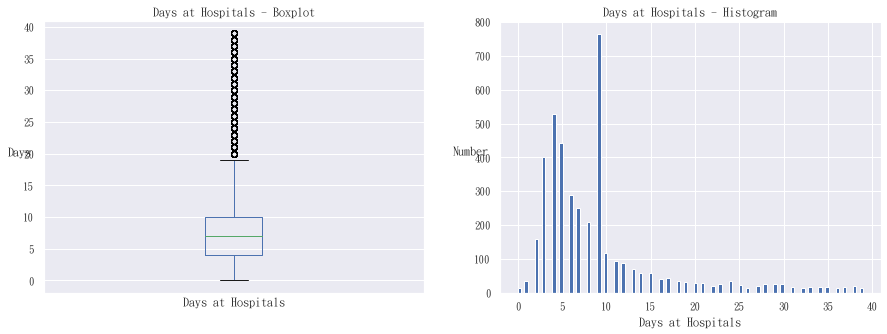

In [54]:
oh_dt = tsr_6.loc[:,"oh_dt"]
oh_dt = pd.to_datetime(oh_dt, errors='coerce')
oh_dt =oh_dt.fillna((oh_dt.mode()[0]))
oh_dt[(oh_dt.dt.year < 2006) | (oh_dt.dt.year > 2021) | (oh_dt < ih_dt)] = np.nan
#print(oh_dt)
#print(oh_dt.value_counts() / len(oh_dt))
#print(oh_dt.describe())

hospitalised_time = oh_dt - ih_dt
hospitalised_time = hospitalised_time.dt.days

q1 = hospitalised_time.quantile(0.25)
q3 = hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan

hospitalised_time = hospitalised_time.fillna(round(hospitalised_time.mean(),3))

#print(hospitalised_time.value_counts().sort_values(ascending= True))
print(hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hospitalised_time.plot.box(ax = ax1)
ax1.set_title("Days at Hospitals - Boxplot")
ax1.set_xlabel('Days at Hospitals')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("Days at Hospitals - Histogram")
ax2.set_xlabel('Days at Hospitals')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 發病日期

count                    4151
unique                   3772
top       2007-10-21 12:08:00
freq                       23
first     2006-07-26 12:08:00
last      2019-05-27 12:08:00
dtype: object


<ipython-input-55-5ee8af5fb2a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan
<ipython-input-55-5ee8af5fb2a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
<ipython-input-55-5ee8af5fb2a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

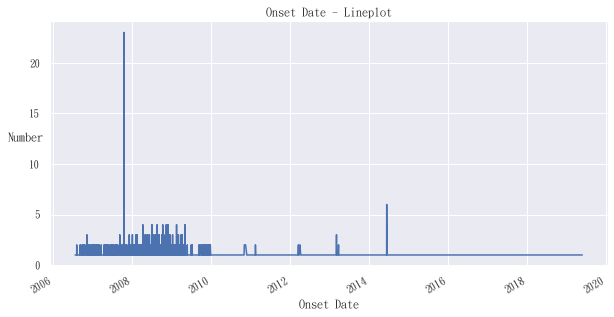

In [55]:
onset_time = tsr_6.loc[:,["onset_dt", "onseth_nm", "onsetm_nm"]]
onset_time.onset_dt = pd.to_datetime(onset_time.onset_dt, errors = "coerce", format = "%Y-%m-%d")
onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan

onset_time['onseth_nm'] = pd.to_numeric(onset_time['onseth_nm'], errors='coerce')
onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
onset_time['onseth_nm'][onset_time['onseth_nm'] == 24] = 0
onset_time['onsetm_nm'] = pd.to_numeric(onset_time['onsetm_nm'], errors='coerce')
onset_time['onsetm_nm'][(onset_time['onsetm_nm'] < 0) | (onset_time['onsetm_nm'] > 60)] = np.nan
onset_time['onsetm_nm'][onset_time['onsetm_nm'] == 60] = 0

onset_time['onset_dt'] = onset_time['onset_dt'].fillna(onset_time['onset_dt'].mode()[0])
onset_time['onseth_nm'] = onset_time['onseth_nm'].fillna(onset_time['onseth_nm'].mean())
onset_time['onsetm_nm'] = onset_time['onsetm_nm'].fillna(onset_time['onsetm_nm'].mean())

onset = onset_time['onset_dt'].astype(str)+' '+onset_time['onseth_nm'].astype(int).map(str)+':'+onset_time['onsetm_nm'].astype(int).map(str)
onset_day = pd.to_datetime(onset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(onset_day.value_counts() / len(onset_day))
print(onset_day.describe())

onset_day.value_counts().plot()
plt.title("Onset Date - Lineplot")
plt.xlabel('Onset Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 發病時間-時

In [56]:
onseth_nm = tsr_6.loc[:,"onseth_nm"]
onseth_nm = pd.to_numeric(onseth_nm, errors='coerce')
onseth_nm[(onseth_nm < 0) | (onseth_nm > 24)] = np.nan
onseth_nm[onseth_nm == 24] = 0
onseth_nm = onseth_nm.fillna(onseth_nm.mean())
#print(onseth_nm)
#print(onseth_nm.value_counts() / len(onseth_nm))
print(onseth_nm.describe())

count    4151.000000
mean       12.318086
std         5.397339
min         0.000000
25%         9.000000
50%        12.318086
75%        16.000000
max        23.000000
Name: onseth_nm, dtype: float64


# 發病時間-分

In [57]:
onsetm_nm = tsr_6.loc[:,"onsetm_nm"]
onsetm_nm = pd.to_numeric(onsetm_nm, errors='coerce')
onsetm_nm[(onsetm_nm < 0) | (onsetm_nm > 60)] = np.nan
onsetm_nm[onsetm_nm == 60] = 0
onsetm_nm = onsetm_nm.fillna(onsetm_nm.mean())
#print(onsetm_nm)
#print(onsetm_nm.value_counts()/len(onsetm_nm))
print(onsetm_nm.describe())

count    4151.000000
mean        8.228097
std        12.646546
min         0.000000
25%         0.000000
50%         0.000000
75%         8.228097
max        59.000000
Name: onsetm_nm, dtype: float64


# 不確定發病時間

N    0.786557
Y    0.213443
Name: onset_fl, dtype: float64


<ipython-input-58-28b1cfedfcd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


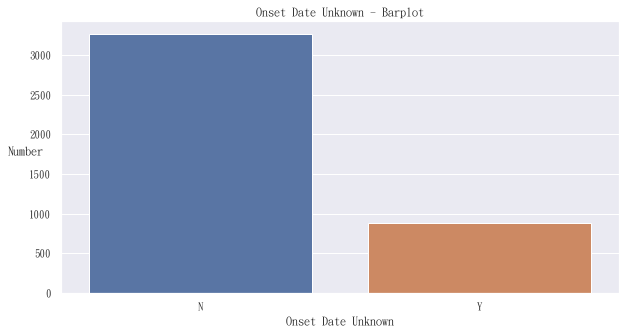

In [58]:
onset_fl = tsr_6.loc[:,"onset_fl"]
onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
onset_fl =onset_fl.fillna((onset_fl.mode()[0]))
#print(onset_fl)
print(onset_fl.value_counts() / len(onset_fl))
#print(onset_fl.describe())

sns.countplot(onset_fl)
plt.title("Onset Date Unknown - Barplot")
plt.xlabel('Onset Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診/急診日期

count                    4151
unique                   3814
top       2009-01-24 13:29:00
freq                      326
first     2006-08-01 21:35:00
last      2020-09-01 10:56:00
dtype: object


<ipython-input-59-d61e59d4ede5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan
<ipython-input-59-d61e59d4ede5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
<ipython-input-59-d61e59d4ede5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][ot_

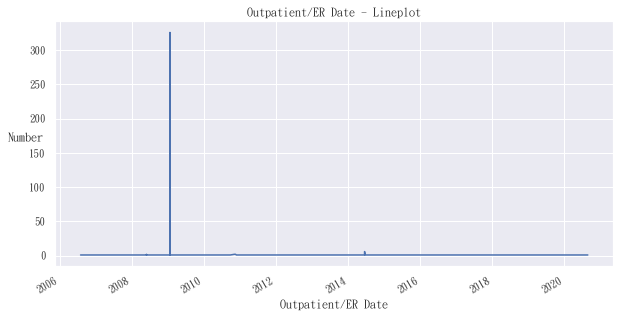

In [59]:
ot_time = tsr_6.loc[:,["ot_dt", "ottih_nm", "ottim_nm"]]
ot_time.ot_dt = pd.to_datetime(ot_time.ot_dt, errors = "coerce", format = "%Y-%m-%d")
ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan

ot_time['ottih_nm'] = pd.to_numeric(ot_time['ottih_nm'], errors='coerce')
ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
ot_time['ottih_nm'][ot_time['ottih_nm'] == 24] = 0
ot_time['ottim_nm'] = pd.to_numeric(ot_time['ottim_nm'], errors='coerce')
ot_time['ottim_nm'][(ot_time['ottim_nm'] < 0) | (ot_time['ottim_nm'] > 60)] = np.nan
ot_time['ottim_nm'][ot_time['ottim_nm'] == 60] = 0

ot_time['ot_dt'] = ot_time['ot_dt'].fillna(ot_time['ot_dt'].mode()[0])
ot_time['ottih_nm'] = ot_time['ottih_nm'].fillna(ot_time['ottih_nm'].mean())
ot_time['ottim_nm'] = ot_time['ottim_nm'].fillna(ot_time['ottim_nm'].mean())

otset = ot_time['ot_dt'].astype(str)+' '+ot_time['ottih_nm'].astype(int).map(str)+':'+ot_time['ottim_nm'].astype(int).map(str)

otset_day = pd.to_datetime(otset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(otset_day.value_counts() / len(otset_day))
print(otset_day.describe())

otset_day.value_counts().plot()
plt.title("Outpatient/ER Date - Lineplot")
plt.xlabel('Outpatient/ER Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 門診/急診時間-時

In [60]:
ottih_nm = tsr_6.loc[:,"ottih_nm"]
ottih_nm = pd.to_numeric(ottih_nm, errors='coerce')
ottih_nm[(ottih_nm < 0) | (ottih_nm > 24)] = np.nan
ottih_nm[ottih_nm == 24] = 0
ottih_nm = ottih_nm.fillna(ottih_nm.mean())
#print(ottih_nm)
#print(ottih_nm.value_counts() / len(ottih_nm))
print(ottih_nm.describe())

count    4151.000000
mean       13.592661
std         5.398728
min         0.000000
25%        10.000000
50%        13.592661
75%        18.000000
max        23.000000
Name: ottih_nm, dtype: float64


# 門診/急診時間-秒

In [61]:
ottim_nm = tsr_6.loc[:,"ottim_nm"]
ottim_nm = pd.to_numeric(ottim_nm, errors='coerce')
ottim_nm[(ottim_nm < 0) | (ottim_nm > 60)] = np.nan
ottim_nm[ottim_nm == 60] = 0
ottim_nm = ottim_nm.fillna(ottim_nm.mean())
#print(ottim_nm)
#print(ottim_nm.value_counts() / len(ottim_nm))
print(ottim_nm.describe())

count    4151.000000
mean       29.450774
std        16.432315
min         0.000000
25%        16.000000
50%        29.450774
75%        43.000000
max        59.000000
Name: ottim_nm, dtype: float64


# 不確定門/急診時間

N    0.998555
Y    0.001445
Name: ot_fl, dtype: float64


<ipython-input-62-a51e7239866c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


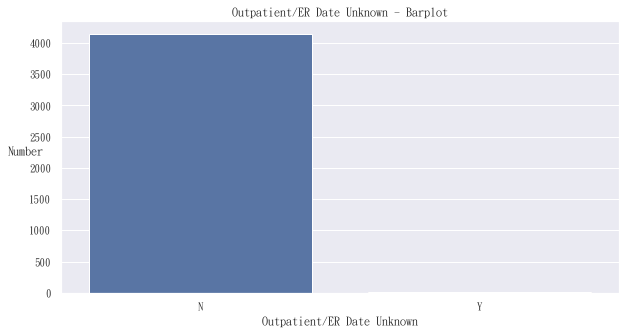

In [62]:
ot_fl = tsr_6.loc[:,"ot_fl"]
ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
ot_fl = ot_fl.fillna(ot_fl.mode()[0])
#print(ot_fl)
print(ot_fl.value_counts() / len(ot_fl))
#print(ot_fl.describe())

sns.countplot(ot_fl)
plt.title("Outpatient/ER Date Unknown - Barplot")
plt.xlabel('Outpatient/ER Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 第一次醫師檢視日期

<ipython-input-63-4054fd679447>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan
<ipython-input-63-4054fd679447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
<ipython-input-63-4054fd679447>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    4151
unique                   3828
top       2009-01-24 13:29:00
freq                      312
first     2006-08-01 21:48:00
last      2019-05-27 13:12:00
dtype: object


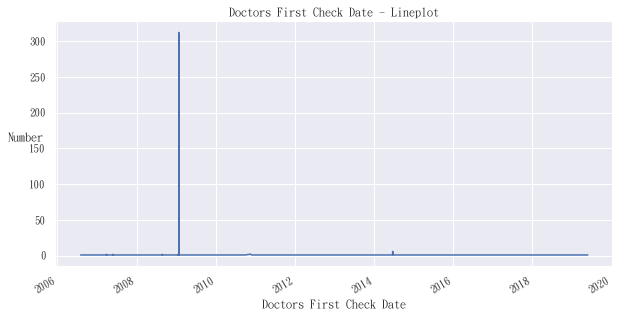

In [63]:
flook_time = tsr_6.loc[:,["flook_dt", "flookh_nm", "flookm_nm"]]
flook_time.flook_dt = pd.to_datetime(flook_time.flook_dt, errors = "coerce", format = "%Y-%m-%d")
flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan

flook_time['flookh_nm'] = pd.to_numeric(flook_time['flookh_nm'], errors='coerce')
flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
flook_time['flookh_nm'][flook_time['flookh_nm'] == 24] = 0
flook_time['flookm_nm'] = pd.to_numeric(flook_time['flookm_nm'], errors='coerce')
flook_time['flookm_nm'][(flook_time['flookm_nm'] < 0) | (flook_time['flookm_nm'] > 60)] = np.nan
flook_time['flookm_nm'][flook_time['flookm_nm'] == 60] = 0

flook_time['flook_dt'] = flook_time['flook_dt'].fillna(flook_time['flook_dt'].mode()[0])
flook_time['flookh_nm'] = flook_time['flookh_nm'].fillna(flook_time['flookh_nm'].mean())
flook_time['flookm_nm'] = flook_time['flookm_nm'].fillna(flook_time['flookm_nm'].mean())

flookset = flook_time['flook_dt'].astype(str)+' '+flook_time['flookh_nm'].astype(int).map(str)+':'+flook_time['flookm_nm'].astype(int).map(str)

flookset_day = pd.to_datetime(flookset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(flookset_day.value_counts() / len(flookset_day))
print(flookset_day.describe())

flookset_day.value_counts().plot()
plt.title("Doctors First Check Date - Lineplot")
plt.xlabel('Doctors First Check Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 第一次醫師檢視時間-時

In [64]:
flookh_nm = tsr_6.loc[:,"flookh_nm"]
flookh_nm = pd.to_numeric(flookh_nm, errors='coerce')
flookh_nm[(flookh_nm < 0) | (flookh_nm > 24)] = np.nan
flookh_nm[flookh_nm == 24] = 0
flookh_nm = flookh_nm.fillna(flookh_nm.mean())
#print(flookh_nm)
#print(flookh_nm.value_counts() / len(flookh_nm))
print(flookh_nm.describe())

count    4151.000000
mean       13.689475
std         5.440185
min         0.000000
25%        10.000000
50%        13.689475
75%        18.000000
max        23.000000
Name: flookh_nm, dtype: float64


# 第一次醫師檢視時間-分

In [65]:
flookm_nm = tsr_6.loc[:,"flookm_nm"]
flookm_nm = pd.to_numeric(flookm_nm, errors='coerce')
flookm_nm[(flookm_nm < 0) | (flookm_nm > 60)] = np.nan
flookm_nm[flookm_nm == 60] = 0
flookm_nm = flookm_nm.fillna(flookm_nm.mean())
#print(flookm_nm)
#print(flookm_nm.value_counts() / len(flookm_nm))
print(flookm_nm.describe())

count    4151.000000
mean       29.436782
std        16.566781
min         0.000000
25%        16.000000
50%        29.436782
75%        43.000000
max        59.000000
Name: flookm_nm, dtype: float64


# 不確定第一次醫師檢視時間

N    0.999518
Y    0.000482
Name: flook_fl, dtype: float64


<ipython-input-66-2f38645468e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


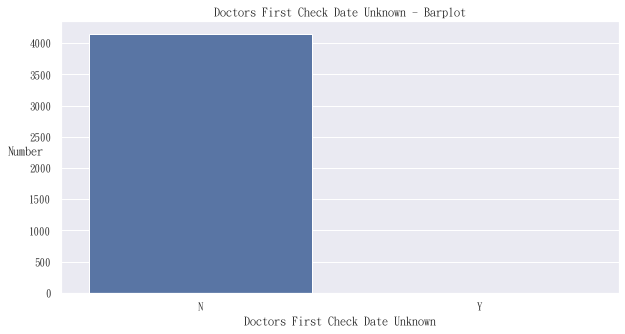

In [66]:
flook_fl = tsr_6.loc[:,"flook_fl"]
flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
flook_fl = flook_fl.fillna(flook_fl.mode()[0])
#print(flook_fl)
print(flook_fl.value_counts() / len(flook_fl))
#print(flook_fl.describe())

sns.countplot(flook_fl)
plt.title("Doctors First Check Date Unknown - Barplot")
plt.xlabel('Doctors First Check Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 1st CT 日期

count                    4151
unique                   3925
top       2009-01-24 13:29:00
freq                      157
first     2006-08-01 01:11:00
last      2019-05-27 14:56:00
dtype: object


<ipython-input-67-ef0b5e46ecd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan
<ipython-input-67-ef0b5e46ecd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
<ipython-input-67-ef0b5e46ecd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm

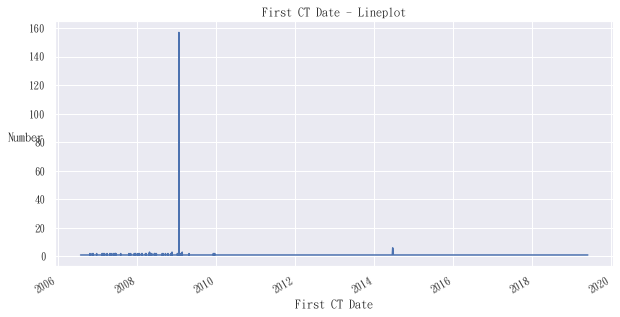

In [67]:
fct_time = tsr_6.loc[:,["fct_dt", "fcth_nm", "fctm_nm"]]
fct_time.fct_dt = pd.to_datetime(fct_time.fct_dt, errors = "coerce", format = "%Y-%m-%d")
fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan

fct_time['fcth_nm'] = pd.to_numeric(fct_time['fcth_nm'], errors='coerce')
fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
fct_time['fcth_nm'][fct_time['fcth_nm'] == 24] = 0
fct_time['fctm_nm'] = pd.to_numeric(fct_time['fctm_nm'], errors='coerce')
fct_time['fctm_nm'][(fct_time['fctm_nm'] < 0) | (fct_time['fctm_nm'] > 60)] = np.nan
fct_time['fctm_nm'][fct_time['fctm_nm'] == 60] = 0

fct_time['fct_dt'] = fct_time['fct_dt'].fillna(fct_time['fct_dt'].mode()[0])
fct_time['fcth_nm'] = fct_time['fcth_nm'].fillna(fct_time['fcth_nm'].mean())
fct_time['fctm_nm'] = fct_time['fctm_nm'].fillna(fct_time['fctm_nm'].mean())

fctset = fct_time['fct_dt'].astype(str)+' '+fct_time['fcth_nm'].astype(int).map(str)+':'+fct_time['fctm_nm'].astype(int).map(str)

fctset_day = pd.to_datetime(fctset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(fctset_day.value_counts() / len(fctset_day))
print(fctset_day.describe())

fctset_day.value_counts().plot()
plt.title("First CT Date - Lineplot")
plt.xlabel('First CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 1st CT 時間-時

In [68]:
fcth_nm = tsr_6.loc[:,"fcth_nm"]
fcth_nm = pd.to_numeric(fcth_nm, errors='coerce')
fcth_nm[(fcth_nm < 0) | (fcth_nm > 24)] = np.nan
fcth_nm[fcth_nm == 24] = 0
fcth_nm = fcth_nm.fillna(fcth_nm.mean())
#print(fcth_nm)
#print(fcth_nm.value_counts() / len(fcth_nm))
print(fcth_nm.describe())

count    4151.000000
mean       13.826700
std         5.416448
min         0.000000
25%        11.000000
50%        13.826700
75%        18.000000
max        23.000000
Name: fcth_nm, dtype: float64


# 1st CT 時間-分

In [69]:
fctm_nm = tsr_6.loc[:,"fctm_nm"]
fctm_nm = pd.to_numeric(fctm_nm, errors='coerce')
fctm_nm[(fctm_nm < 0) | (fctm_nm > 60)] = np.nan
fctm_nm[fctm_nm == 60] = 0
fctm_nm = fctm_nm.fillna(fctm_nm.mean())
#print(fctm_nm)
#print(fctm_nm.value_counts() / len(fctm_nm))
print(fctm_nm.describe())

count    4151.000000
mean       29.829958
std        16.197194
min         0.000000
25%        17.000000
50%        29.829958
75%        43.000000
max        59.000000
Name: fctm_nm, dtype: float64


# 1st CT 外片

N    0.985546
Y    0.014454
Name: fctoh_fl, dtype: float64


<ipython-input-70-c1c89c779c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


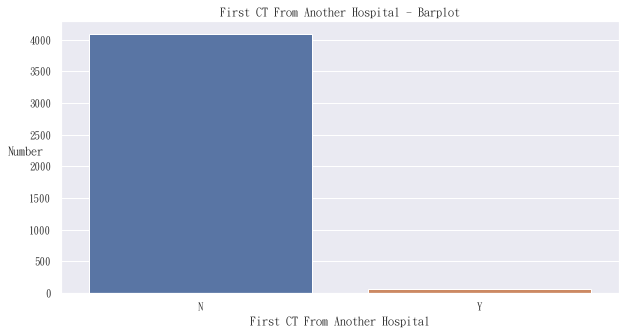

In [70]:
fctoh_fl = tsr_6.loc[:,"fctoh_fl"]
fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
fctoh_fl = fctoh_fl.fillna(fctoh_fl.mode()[0])
#print(fctoh_fl)
print(fctoh_fl.value_counts() / len(fctoh_fl))
#print(fctoh_fl.describe())

sns.countplot(fctoh_fl)
plt.title("First CT From Another Hospital - Barplot")
plt.xlabel('First CT From Another Hospital')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA

1.0    0.998795
2.0    0.001205
Name: ivtpath_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


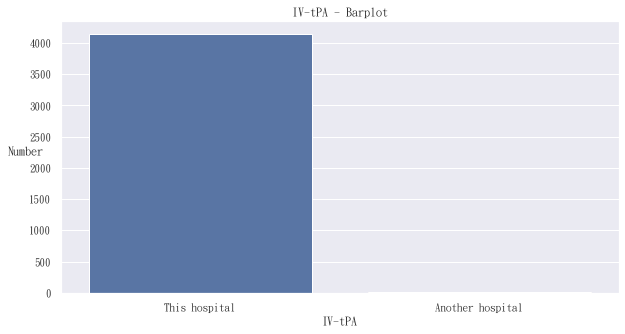

In [71]:
ivtpath_id = tsr_6.loc[:,"ivtpath_id"]
ivtpath_id = pd.to_numeric(ivtpath_id, errors = 'coerce')
ivtpath_id = ivtpath_id.fillna(ivtpath_id.mode()[0])
#print(ivtpath_id)
print(ivtpath_id.value_counts() / len(ivtpath_id))
#print(ivtpath_id.describe())

ivtpath_id_labels = ["This hospital","Another hospital"]
sns.countplot(ivtpath_id).set_xticklabels(ivtpath_id_labels)
plt.title("IV-tPA - Barplot")
plt.xlabel('IV-tPA')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA 日期

<ipython-input-72-9d671be43e49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan
<ipython-input-72-9d671be43e49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
<ipython-input-72-9d671be43e49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    4151
unique                    259
top       2011-07-24 13:09:00
freq                     3891
first     2006-10-09 01:10:00
last      2016-01-31 16:09:00
dtype: object


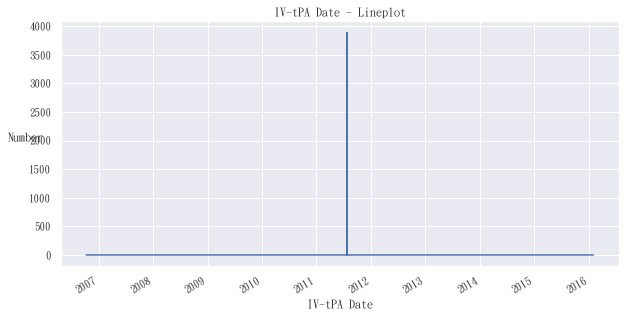

In [72]:
ivtpa_time = tsr_6.loc[:,["ivtpa_dt", "ivtpah_nm", "ivtpam_nm"]]
ivtpa_time.ivtpa_dt = pd.to_datetime(ivtpa_time.ivtpa_dt, errors = "coerce", format = "%Y-%m-%d")
ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan

ivtpa_time['ivtpah_nm'] = pd.to_numeric(ivtpa_time['ivtpah_nm'], errors='coerce')
ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
ivtpa_time['ivtpah_nm'][ivtpa_time['ivtpah_nm'] == 24] = 0
ivtpa_time['ivtpam_nm'] = pd.to_numeric(ivtpa_time['ivtpam_nm'], errors='coerce')
ivtpa_time['ivtpam_nm'][(ivtpa_time['ivtpam_nm'] < 0) | (ivtpa_time['ivtpam_nm'] > 24)] = np.nan
ivtpa_time['ivtpam_nm'][ivtpa_time['ivtpam_nm'] == 24] = 0

ivtpa_time['ivtpa_dt'] = ivtpa_time['ivtpa_dt'].fillna(ivtpa_time['ivtpa_dt'].mode()[0])
ivtpa_time['ivtpah_nm'] = ivtpa_time['ivtpah_nm'].fillna(ivtpa_time['ivtpah_nm'].mean())
ivtpa_time['ivtpam_nm'] = ivtpa_time['ivtpam_nm'].fillna(ivtpa_time['ivtpam_nm'].mean())

ivtpaset = ivtpa_time['ivtpa_dt'].astype(str)+' '+ivtpa_time['ivtpah_nm'].astype(int).map(str)+':'+ivtpa_time['ivtpam_nm'].astype(int).map(str)

ivtpaset_day = pd.to_datetime(ivtpaset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ivtpaset_day.value_counts() / len(ivtpaset_day))
print(ivtpaset_day.describe())

ivtpaset_day.value_counts().plot()
plt.title("IV-tPA Date - Lineplot")
plt.xlabel('IV-tPA Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# IV-tPA 時間-時

In [73]:
ivtpah_nm = tsr_6.loc[:,"ivtpah_nm"]
ivtpah_nm = pd.to_numeric(ivtpah_nm, errors='coerce')
ivtpah_nm[(ivtpah_nm < 0) | (ivtpah_nm > 24)] = np.nan
ivtpah_nm[ivtpah_nm == 24] = 0
ivtpah_nm = ivtpah_nm.fillna(ivtpah_nm.mean())
#print(ivtpah_nm)
#print(ivtpah_nm.value_counts() / len(ivtpah_nm))
print(ivtpah_nm.describe())

count    4151.000000
mean       13.808765
std         1.630937
min         0.000000
25%        13.808765
50%        13.808765
75%        13.808765
max        23.000000
Name: ivtpah_nm, dtype: float64


# IV-tPA 時間-分

In [74]:
ivtpam_nm = tsr_6.loc[:,"ivtpam_nm"]
ivtpam_nm = pd.to_numeric(ivtpam_nm, errors='coerce')
ivtpam_nm[(ivtpam_nm < 0) | (ivtpam_nm > 60)] = np.nan
ivtpam_nm[ivtpam_nm == 60] = 0
ivtpam_nm = ivtpam_nm.fillna(ivtpam_nm.mean())
#print(ivtpam_nm)
#print(ivtpam_nm.value_counts() / len(ivtpam_nm))
print(ivtpam_nm.describe())

count    4151.000000
mean       26.658824
std         4.395324
min         0.000000
25%        26.658824
50%        26.658824
75%        26.658824
max        59.000000
Name: ivtpam_nm, dtype: float64


# Start IV-tPA mg

count    4151.000000
mean        2.133968
std        10.066801
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        77.000000
Name: ivtpamg_nm, dtype: float64


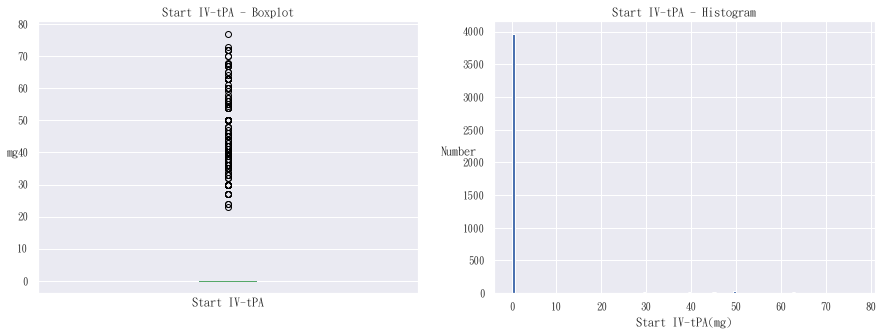

In [75]:
ivtpamg_nm = tsr_6.loc[:,"ivtpamg_nm"]
ivtpamg_nm = pd.to_numeric(ivtpamg_nm, errors='coerce')

q1 = ivtpamg_nm.quantile(0.25)
q3 = ivtpamg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ivtpamg_nm[(ivtpamg_nm < inner_fence_low) | (ivtpamg_nm > inner_fence_upp)] = np.nan

#ivtpamg_nm =ivtpamg_nm.fillna(ivtpamg_nm.mean())
ivtpamg_nm =ivtpamg_nm.fillna(0)

#print(ivtpamg_nm)
#print(ivtpamg_nm.value_counts() / len(ivtpamg_nm))
print(ivtpamg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ivtpamg_nm.plot.box(ax = ax1)
ax1.set_title("Start IV-tPA - Boxplot")
ax1.set_xlabel('Start IV-tPA')
ax1.set_ylabel('mg', rotation=0)
ax1.set_xticks([])

#ivtpamg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ivtpamg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Start IV-tPA - Histogram")
ax2.set_xlabel('Start IV-tPA(mg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 未打IV-tPA 原因

0.0    0.952301
1.0    0.039990
2.0    0.004336
3.0    0.003373
Name: nivtpa_id, dtype: float64
count    4151.000000
mean        0.058781
std         0.290267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: nivtpa_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


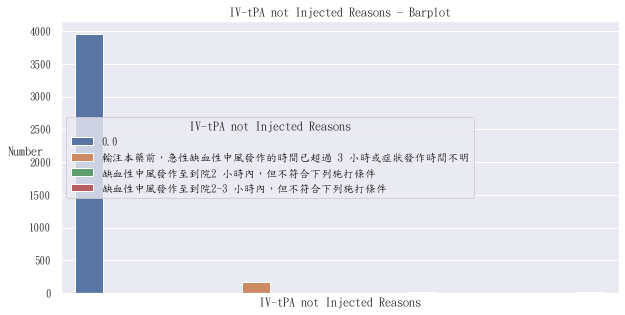

In [76]:
nivtpa_id = tsr_6.loc[:,"nivtpa_id"]
nivtpa_id = pd.to_numeric(nivtpa_id, errors = "coerce")
nivtpa_id[(nivtpa_id != 1) & (nivtpa_id != 2) & (nivtpa_id != 3)] = np.nan
nivtpa_id = nivtpa_id.fillna(0)
#print(nivtpa_id)
print(nivtpa_id.value_counts() / len(nivtpa_id))
print(nivtpa_id.describe())

nivtpa_id[nivtpa_id == 1] = "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"
nivtpa_id[nivtpa_id == 2] = "缺血性中風發作至到院2 小時內，但不符合下列施打條件"
nivtpa_id[nivtpa_id == 3] = "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"

sns.countplot(nivtpa_id, hue = nivtpa_id)
plt.title("IV-tPA not Injected Reasons - Barplot")
plt.xlabel('IV-tPA not Injected Reasons')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 6, title="IV-tPA not Injected Reasons")
plt.show()

nivtpa_id[nivtpa_id == "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"] = 1
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2 小時內，但不符合下列施打條件"] = 2
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"] = 3
nivtpa_id= nivtpa_id.fillna(999)

# 輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）

N    0.113948
Y    0.003614
Name: nivtpa1_fl, dtype: float64


<ipython-input-77-2c8eec8b4ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
<ipython-input-77-2c8eec8b4ea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
<ipython-input-77-2c8eec8b4ea1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
<ipython-input-77-2c8eec8b4ea1>:5: SettingWithCopyWarning: 
A value is tr

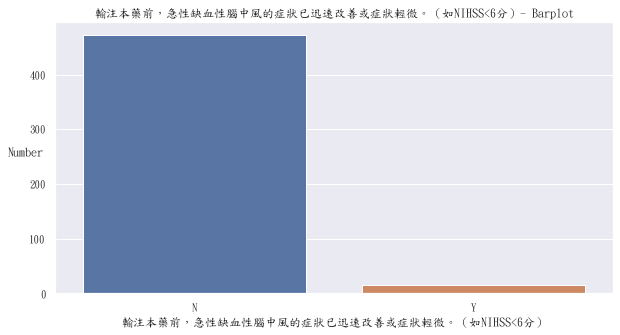

In [77]:
nivtpa1_fl = tsr_6.loc[:,"nivtpa1_fl"]
nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
nivtpa1_fl[nivtpa1_fl == int(1)] = "Y"
nivtpa1_fl[(nivtpa1_fl != "N") & (nivtpa1_fl != "Y")] = np.nan
#print(nivtpa1_fl)
print(nivtpa1_fl.value_counts() / len(nivtpa1_fl))
#print(nivtpa1_fl.describe())

sns.countplot(nivtpa1_fl)
plt.title("輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）- Barplot")
plt.xlabel('輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa1_fl = nivtpa1_fl.fillna(999)

# 臨床或影像判定為嚴重之中風（如NIHSS>25）

<ipython-input-78-0a0827c0aa22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
<ipython-input-78-0a0827c0aa22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
<ipython-input-78-0a0827c0aa22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
<ipython-input-78-0a0827c0aa22>:5: SettingWithCopyWarning: 
A value is tr

N    0.116839
Y    0.000723
Name: nivtpa2_fl, dtype: float64


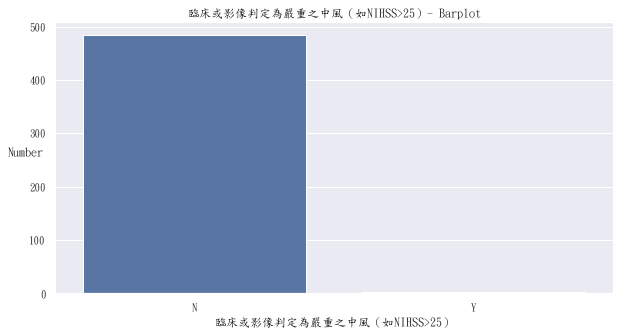

In [78]:
nivtpa2_fl = tsr_6.loc[:,"nivtpa2_fl"]
nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
nivtpa2_fl[nivtpa2_fl == int(1)] = "Y"
#print(nivtpa2_fl)
print(nivtpa2_fl.value_counts() / len(nivtpa2_fl))
#print(nivtpa2_fl.describe())

sns.countplot(nivtpa2_fl)
plt.title("臨床或影像判定為嚴重之中風（如NIHSS>25）- Barplot")
plt.xlabel('臨床或影像判定為嚴重之中風（如NIHSS>25）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa2_fl = nivtpa2_fl.fillna(999)

# 年齡在18歲以下，或80歲以上

N    0.117080
Y    0.000482
Name: nivtpa3_fl, dtype: float64


<ipython-input-79-bf0d1c63b1f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
<ipython-input-79-bf0d1c63b1f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
<ipython-input-79-bf0d1c63b1f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
<ipython-input-79-bf0d1c63b1f8>:5: SettingWithCopyWarning: 
A value is tr

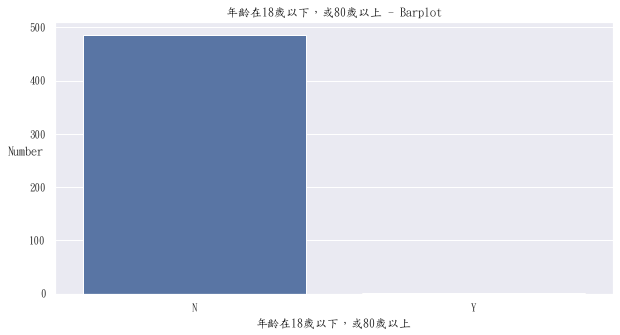

In [79]:
nivtpa3_fl = tsr_6.loc[:,"nivtpa3_fl"]
nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
nivtpa3_fl[nivtpa3_fl == int(1)] = "Y"
#print(nivtpa3_fl)
print(nivtpa3_fl.value_counts() / len(nivtpa3_fl))
#print(nivtpa3_fl.describe())

sns.countplot(nivtpa3_fl)
plt.title("年齡在18歲以下，或80歲以上 - Barplot")
plt.xlabel('年齡在18歲以下，或80歲以上')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa3_fl = nivtpa3_fl.fillna(999)

# 過去曾中風且合併糖尿病

<ipython-input-80-5dd7e31c9fc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
<ipython-input-80-5dd7e31c9fc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
<ipython-input-80-5dd7e31c9fc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
<ipython-input-80-5dd7e31c9fc3>:5: SettingWithCopyWarning: 
A value is tr

N    0.116598
Y    0.000964
Name: nivtpa4_fl, dtype: float64


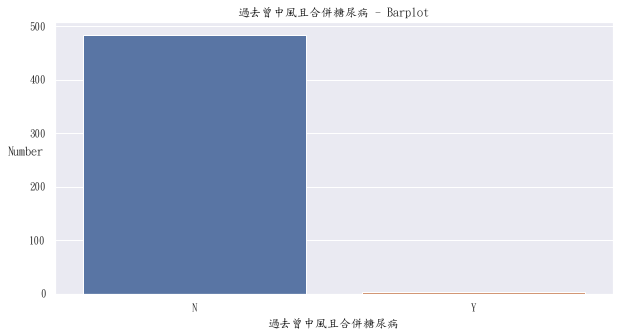

In [80]:
nivtpa4_fl = tsr_6.loc[:,"nivtpa4_fl"]
nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
nivtpa4_fl[nivtpa4_fl == int(1)] = "Y"
#print(nivtpa4_fl)
print(nivtpa4_fl.value_counts() / len(nivtpa4_fl))
#print(nivtpa4_fl.describe())

sns.countplot(nivtpa4_fl)
plt.title("過去曾中風且合併糖尿病 - Barplot")
plt.xlabel('過去曾中風且合併糖尿病')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa4_fl = nivtpa4_fl.fillna(999)

# 最近3個月內有中風病史或有嚴重性頭部創傷

<ipython-input-81-ad0e7b7912e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
<ipython-input-81-ad0e7b7912e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
<ipython-input-81-ad0e7b7912e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
<ipython-input-81-ad0e7b7912e9>:5: SettingWithCopyWarning: 
A value is tr

N    0.116598
Y    0.000964
Name: nivtpa5_fl, dtype: float64


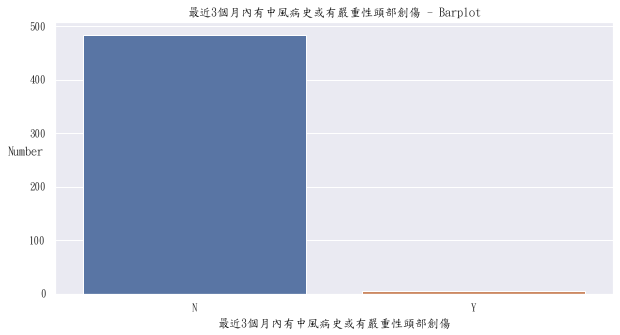

In [81]:
nivtpa5_fl = tsr_6.loc[:,"nivtpa5_fl"]
nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
nivtpa5_fl[nivtpa5_fl == int(1)] = "Y"
#print(nivtpa5_fl)
print(nivtpa5_fl.value_counts() / len(nivtpa5_fl))
#print(nivtpa5_fl.describe())

sns.countplot(nivtpa5_fl)
plt.title("最近3個月內有中風病史或有嚴重性頭部創傷 - Barplot")
plt.xlabel('最近3個月內有中風病史或有嚴重性頭部創傷')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa5_fl = nivtpa5_fl.fillna(999)

# 中風發作時併發癲癇

N    0.116839
Y    0.000723
Name: nivtpa6_fl, dtype: float64


<ipython-input-82-de9f844aba73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
<ipython-input-82-de9f844aba73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
<ipython-input-82-de9f844aba73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
<ipython-input-82-de9f844aba73>:5: SettingWithCopyWarning: 
A value is tr

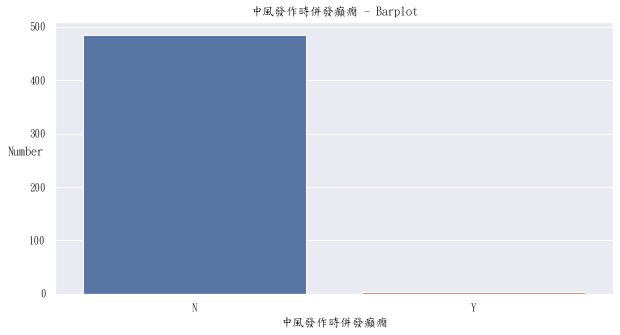

In [82]:
nivtpa6_fl = tsr_6.loc[:,"nivtpa6_fl"]
nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
nivtpa6_fl[nivtpa6_fl == int(1)] = "Y"
#print(nivtpa6_fl)
print(nivtpa6_fl.value_counts() / len(nivtpa6_fl))
#print(nivtpa6_fl.describe())

sns.countplot(nivtpa6_fl)
plt.title("中風發作時併發癲癇 - Barplot")
plt.xlabel('中風發作時併發癲癇')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa6_fl = nivtpa6_fl.fillna(999)

# 病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）

N    0.117080
Y    0.000482
Name: nivtpa7_fl, dtype: float64


<ipython-input-83-e1f8aeabd031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
<ipython-input-83-e1f8aeabd031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
<ipython-input-83-e1f8aeabd031>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
<ipython-input-83-e1f8aeabd031>:5: SettingWithCopyWarning: 
A value is tr

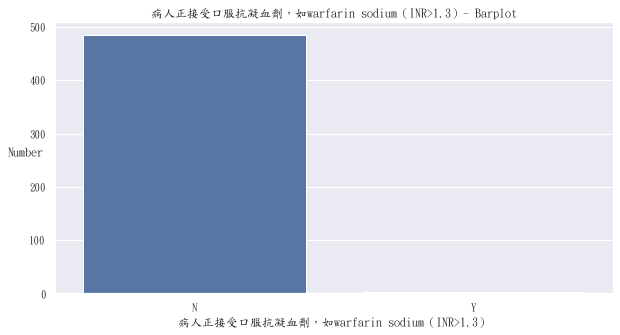

In [83]:
nivtpa7_fl = tsr_6.loc[:,"nivtpa7_fl"]
nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
nivtpa7_fl[nivtpa7_fl == int(1)] = "Y"
#print(nivtpa7_fl)
print(nivtpa7_fl.value_counts() / len(nivtpa7_fl))
#print(nivtpa7_fl.describe())

sns.countplot(nivtpa7_fl)
plt.title("病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）- Barplot")
plt.xlabel('病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa7_fl = nivtpa7_fl.fillna(999)

# 最近3個月內曾患胃腸道潰瘍

N    0.116598
Y    0.000964
Name: nivtpa8_fl, dtype: float64


<ipython-input-84-6a9e3f479925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
<ipython-input-84-6a9e3f479925>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
<ipython-input-84-6a9e3f479925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
<ipython-input-84-6a9e3f479925>:5: SettingWithCopyWarning: 
A value is tr

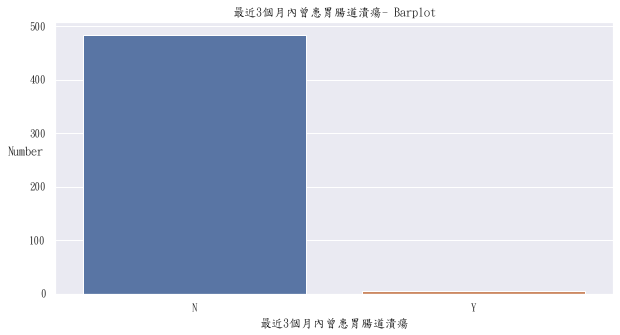

In [84]:
nivtpa8_fl = tsr_6.loc[:,"nivtpa8_fl"]
nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
nivtpa8_fl[nivtpa8_fl == int(1)] = "Y"
#print(nivtpa8_fl)
print(nivtpa8_fl.value_counts() / len(nivtpa8_fl))
#print(nivtpa8_fl.describe())

sns.countplot(nivtpa8_fl)
plt.title("最近3個月內曾患胃腸道潰瘍- Barplot")
plt.xlabel('最近3個月內曾患胃腸道潰瘍')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa8_fl = nivtpa8_fl.fillna(999)

# 家屬拒絕

N    0.117562
Name: nivtpa9_fl, dtype: float64


<ipython-input-85-68bd40d3cced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
<ipython-input-85-68bd40d3cced>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
<ipython-input-85-68bd40d3cced>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
<ipython-input-85-68bd40d3cced>:5: SettingWithCopyWarning: 
A value is tr

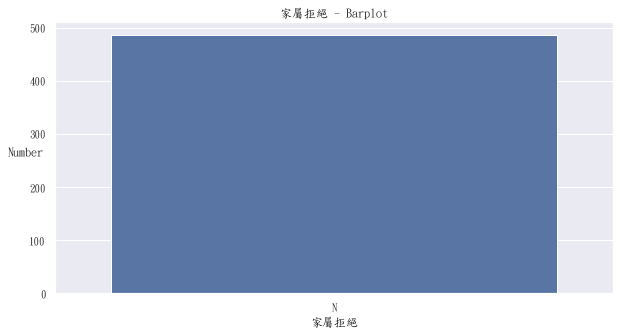

In [85]:
nivtpa9_fl = tsr_6.loc[:,"nivtpa9_fl"]
nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
nivtpa9_fl[nivtpa9_fl == int(1)] = "Y"
#print(nivtpa9_fl)
print(nivtpa9_fl.value_counts() / len(nivtpa9_fl))
#print(nivtpa9_fl.describe())

sns.countplot(nivtpa9_fl)
plt.title("家屬拒絕 - Barplot")
plt.xlabel('家屬拒絕')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa9_fl = nivtpa9_fl.fillna(999)

# 輸注本藥前，缺血性腦中風發作的時間已超過3小時

N    0.114189
Y    0.002650
Name: nivtpa10_fl, dtype: float64


<ipython-input-86-adaabeea264c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
<ipython-input-86-adaabeea264c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
<ipython-input-86-adaabeea264c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
<ipython-input-86-adaabeea264c>:5: SettingWithCopyWarning: 
A value

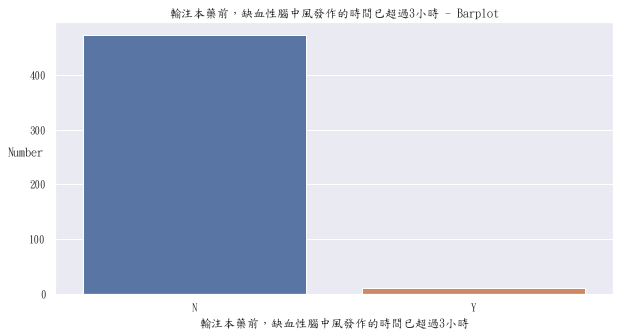

In [86]:
nivtpa10_fl = tsr_6.loc[:,"nivtpa10_fl"]
nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
nivtpa10_fl[nivtpa10_fl == int(1)] = "Y"
#print(nivtpa10_fl)
print(nivtpa10_fl.value_counts() / len(nivtpa10_fl))
#print(nivtpa10_fl.describe())

sns.countplot(nivtpa10_fl)
plt.title("輸注本藥前，缺血性腦中風發作的時間已超過3小時 - Barplot")
plt.xlabel('輸注本藥前，缺血性腦中風發作的時間已超過3小時')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa10_fl = nivtpa10_fl.fillna(999)

# 收縮壓 > 185mmhg或舒張壓 > 110mmhg

N    0.116117
Name: nivtpa11_fl, dtype: float64


<ipython-input-87-54403403da7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
<ipython-input-87-54403403da7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
<ipython-input-87-54403403da7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
<ipython-input-87-54403403da7c>:5: SettingWithCopyWarning: 
A value

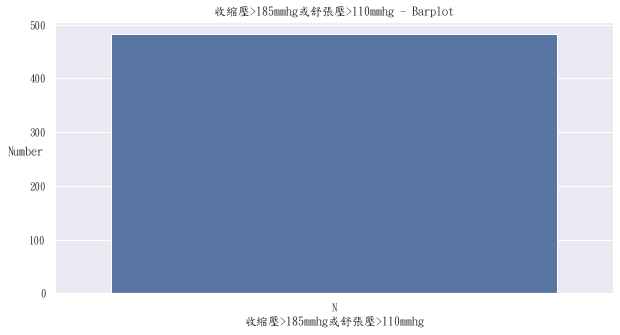

In [87]:
nivtpa11_fl = tsr_6.loc[:,"nivtpa11_fl"]
nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
nivtpa11_fl[nivtpa11_fl == int(1)] = "Y"
nivtpa11_fl[(nivtpa11_fl != "N") & (nivtpa11_fl != "Y")] = np.nan
#print(nivtpa11_fl)
print(nivtpa11_fl.value_counts() / len(nivtpa11_fl))
#print(nivtpa11_fl.describe())

sns.countplot(nivtpa11_fl)
plt.title("收縮壓>185mmhg或舒張壓>110mmhg - Barplot")
plt.xlabel('收縮壓>185mmhg或舒張壓>110mmhg')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa11_fl = nivtpa11_fl.fillna(999)

# 不符合施打條件其他(未打IV-tPA 原因)

N    0.114189
Y    0.000241
Name: nivtpa99_fl, dtype: float64


<ipython-input-88-6972b0fd6d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
<ipython-input-88-6972b0fd6d18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
<ipython-input-88-6972b0fd6d18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
<ipython-input-88-6972b0fd6d18>:5: SettingWithCopyWarning: 
A value

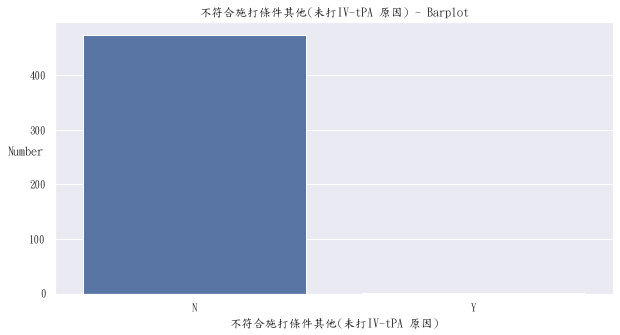

In [88]:
nivtpa99_fl = tsr_6.loc[:,"nivtpa99_fl"]
nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
nivtpa99_fl[nivtpa99_fl == int(1)] = "Y"
nivtpa99_fl[(nivtpa99_fl != "N") & (nivtpa99_fl != "Y")] = np.nan
#print(nivtpa99_fl)
print(nivtpa99_fl.value_counts() / len(nivtpa99_fl))
#print(nivtpa99_fl.describe())

sns.countplot(nivtpa99_fl)
plt.title("不符合施打條件其他(未打IV-tPA 原因) - Barplot")
plt.xlabel('不符合施打條件其他(未打IV-tPA 原因)')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa99_fl = nivtpa99_fl.fillna(999)

# GCS-E (eye opening)

4.0    0.878343
3.0    0.054204
1.0    0.036859
2.0    0.030595
Name: gcse_nm, dtype: float64
count    4151.000000
mean        3.774030
std         0.676283
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: gcse_nm, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


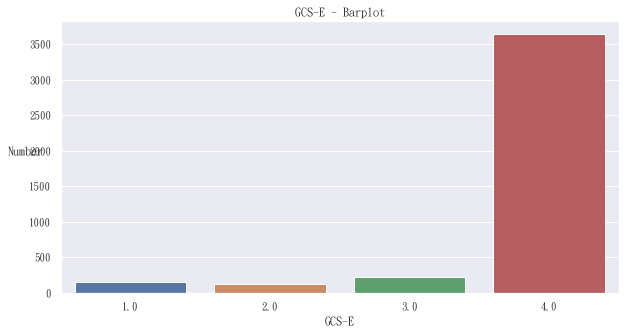

In [89]:
gcse_nm = tsr_6.loc[:,"gcse_nm"]
gcse_nm = pd.to_numeric(gcse_nm, errors = "coerce")
gcse_nm[(gcse_nm != 1) & (gcse_nm != 2) & (gcse_nm != 3) & (gcse_nm != 4)]  = np.nan
gcse_nm = gcse_nm.fillna(gcse_nm.mode()[0])
#print(gcse_nm)
print(gcse_nm.value_counts() / len(gcse_nm))
print(gcse_nm.describe())

sns.countplot(gcse_nm)
plt.title("GCS-E - Barplot")
plt.xlabel('GCS-E')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-V (verbal response)

5.0    0.821971
1.0    0.071790
2.0    0.042399
4.0    0.041677
3.0    0.022163
Name: gcsv_nm, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


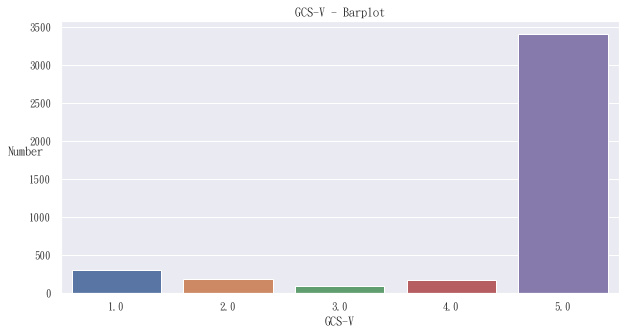

In [90]:
gcsv_nm = tsr_6.loc[:,"gcsv_nm"]
gcsv_nm = pd.to_numeric(gcsv_nm, errors = "coerce")
gcsv_nm[(gcsv_nm != 1) & (gcsv_nm != 2) & (gcsv_nm != 3) & (gcsv_nm != 4) & (gcsv_nm != 5)]  = np.nan
gcsv_nm = gcsv_nm.fillna(gcsv_nm.mode()[0])
#print(gcsv_nm)
print(gcsv_nm.value_counts() / len(gcsv_nm))
#print(gcsv_nm.describe())

sns.countplot(gcsv_nm)
plt.title("GCS-V - Barplot")
plt.xlabel('GCS-V')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-M (motor response)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6.0    0.819321
5.0    0.096603
4.0    0.043604
1.0    0.017586
3.0    0.016141
2.0    0.006745
Name: gcsm_nm, dtype: float64


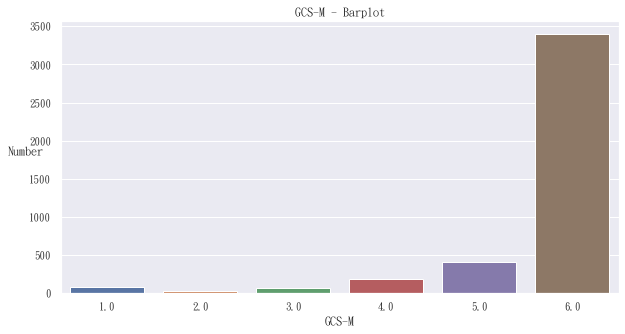

In [91]:
gcsm_nm = tsr_6.loc[:,"gcsm_nm"]
gcsm_nm = pd.to_numeric(gcsm_nm, errors = "coerce")
gcsm_nm[(gcsm_nm != 1) & (gcsm_nm != 2) & (gcsm_nm != 3) & (gcsm_nm != 4) & (gcsm_nm != 5)& (gcsm_nm != 6)]  = np.nan
gcsm_nm = gcsm_nm.fillna(gcsm_nm.mode()[0])
#print(gscmnm)
print(gcsm_nm.value_counts() / len(gcsm_nm))
#print(gscmnm.describe())

sns.countplot(gcsm_nm)
plt.title("GCS-M - Barplot")
plt.xlabel('GCS-M')
plt.ylabel('Number', rotation=0)
plt.show()

# SBP

<ipython-input-92-ac19d54d087e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      162.909913
std        32.151208
min        73.000000
25%       141.000000
50%       161.000000
75%       184.000000
max       252.000000
Name: sbp_nm, dtype: float64


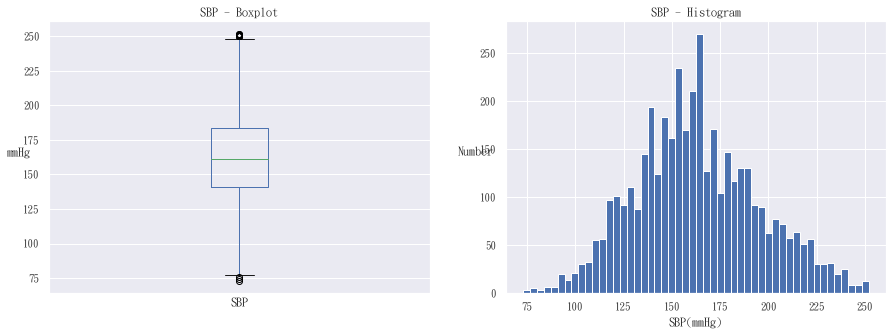

In [92]:
sbp_nm = tsr_6.loc[:,"sbp_nm"]

q1 = sbp_nm.quantile(0.25)
q3 = sbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan

sbp_nm =sbp_nm.fillna(round(sbp_nm.mean(),3))

#print(sbp_nm)
#print(sbp_nm.value_counts() / len(sbp_nm))
print(sbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sbp_nm.plot.box(ax = ax1)
ax1.set_title("SBP - Boxplot")
ax1.set_xlabel('SBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

sbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("SBP - Histogram")
ax2.set_xlabel('SBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# DBP

<ipython-input-93-b6af17f26e12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       89.922319
std        17.423539
min        40.000000
25%        78.000000
50%        89.000000
75%       101.000000
max       139.000000
Name: dbp_nm, dtype: float64


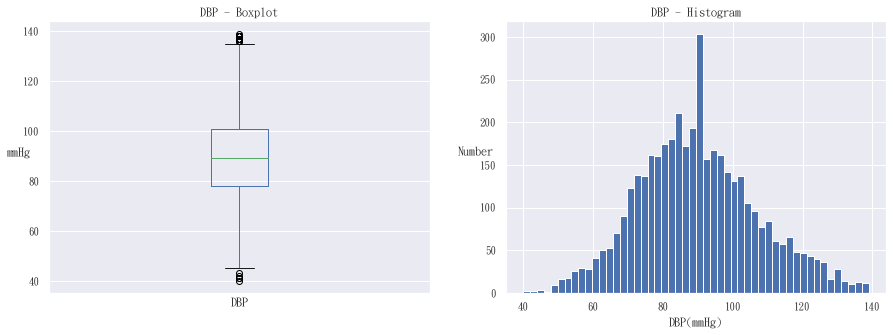

In [93]:
dbp_nm = tsr_6.loc[:,"dbp_nm"]

q1 = dbp_nm.quantile(0.25)
q3 = dbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan

dbp_nm =dbp_nm.fillna(round(dbp_nm.mean(),3))

#print(dbp_nm)
#print(dbp_nm.value_counts() / len(dbp_nm))
print(dbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dbp_nm.plot.box(ax = ax1)
ax1.set_title("DBP - Boxplot")
ax1.set_xlabel('DBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

dbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("DBP - Histogram")
ax2.set_xlabel('DBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BT (bleeding time)

<ipython-input-94-dd36c8645949>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       36.388869
std         0.575118
min        34.900000
25%        36.000000
50%        36.400000
75%        36.800000
max        37.900000
Name: bt_nm, dtype: float64


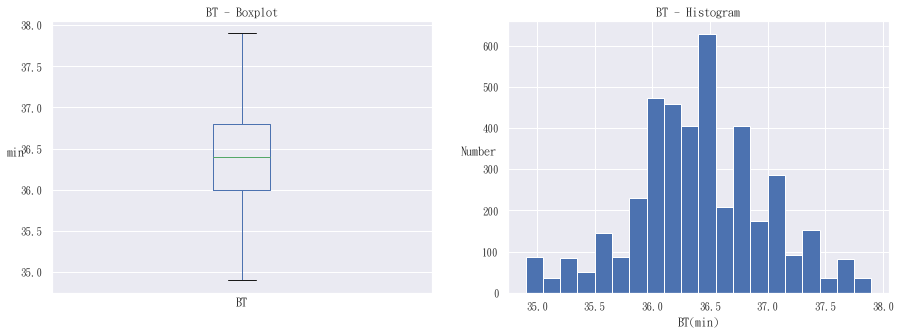

In [94]:
bt_nm = tsr_6.loc[:,"bt_nm"]

q1 = bt_nm.quantile(0.25)
q3 = bt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan

bt_nm =bt_nm.fillna(round(bt_nm.mean(),3))

#print(bt_nm)
#print(bt_nm.value_counts() / len(bt_nm))
print(bt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bt_nm.plot.box(ax = ax1)
ax1.set_title("BT - Boxplot")
ax1.set_xlabel('BT')
ax1.set_ylabel('min', rotation=0)
ax1.set_xticks([])

bt_nm.plot.hist(ax = ax2, bins=20)
ax2.set_title("BT - Histogram")
ax2.set_xlabel('BT(min)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Heart Rate

<ipython-input-95-730ed11626f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       81.352123
std        15.548824
min        35.000000
25%        70.000000
50%        81.000000
75%        91.500000
max       126.000000
Name: hr_nm, dtype: float64


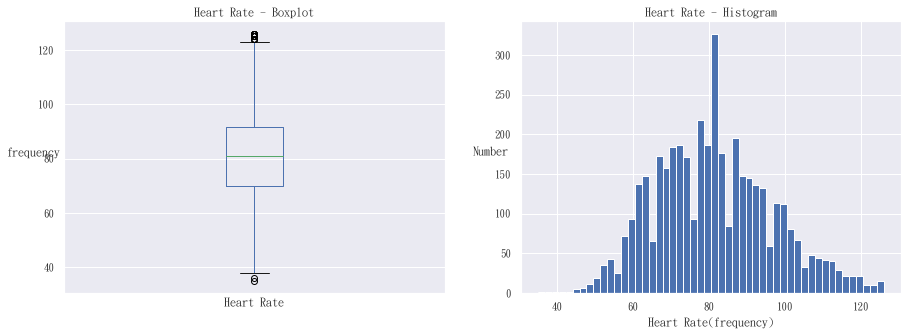

In [95]:
hr_nm = tsr_6.loc[:,"hr_nm"]

q1 = hr_nm.quantile(0.25)
q3 = hr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan

hr_nm = hr_nm.fillna(round(hr_nm.mean(),3))

#print(hr_nm)
#print(hr_nm.value_counts() / len(hr_nm))
print(hr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hr_nm.plot.box(ax = ax1)
ax1.set_title("Heart Rate - Boxplot")
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('frequency', rotation=0)
ax1.set_xticks([])

hr_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("Heart Rate - Histogram")
ax2.set_xlabel('Heart Rate(frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Respiratory Rate

<ipython-input-96-6fdc72bc18f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       19.583645
std         1.343566
min        15.000000
25%        19.000000
50%        20.000000
75%        20.000000
max        23.000000
Name: rr_nm, dtype: float64


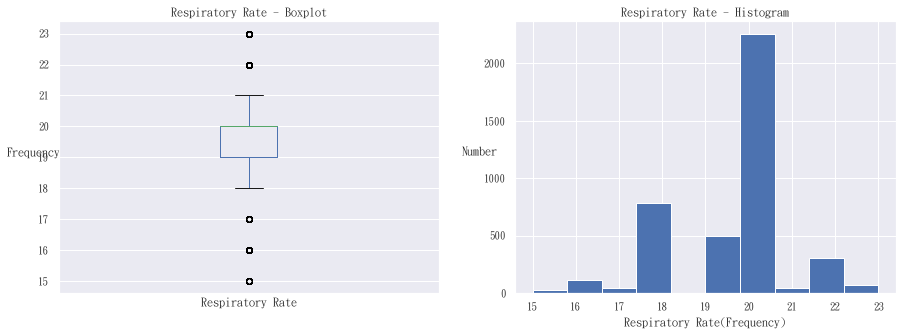

In [96]:
rr_nm = tsr_6.loc[:,"rr_nm"]

q1 = rr_nm.quantile(0.25)
q3 = rr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan

rr_nm = rr_nm.fillna(round(rr_nm.mean(),3))

#print(rr_nm)
#print(rr_nm.value_counts() / len(rr_nm))
print(rr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

rr_nm.plot.box(ax = ax1)
ax1.set_title("Respiratory Rate - Boxplot")
ax1.set_xlabel('Respiratory Rate')
ax1.set_ylabel('Frequency', rotation=0)
ax1.set_xticks([])

rr_nm.plot.hist(ax = ax2)
ax2.set_title("Respiratory Rate - Histogram")
ax2.set_xlabel('Respiratory Rate(Frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis

1.0     0.693327
3.0     0.171766
2.0     0.097808
4.0     0.034450
99.0    0.002650
Name: icd_id, dtype: float64


<ipython-input-97-50161038decc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


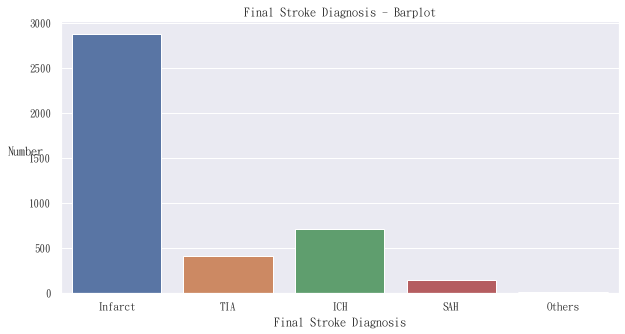

In [97]:
icd_id = tsr_6.loc[:,"icd_id"]
icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
icd_id = icd_id.fillna(icd_id.mode()[0])
#print(icd_id)
print(icd_id.value_counts() / len(icd_id))
#print(icd_id.describe())

icd_id_labels = ["Infarct","TIA", "ICH", "SAH", "Others"]
sns.countplot(icd_id).set_xticklabels(icd_id_labels)
plt.title("Final Stroke Diagnosis - Barplot")
plt.xlabel('Final Stroke Diagnosis')
plt.ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis (TIA Subtypes)

<ipython-input-98-c92611a11621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.954469
2.0    0.045531
Name: icdtia_id, dtype: float64


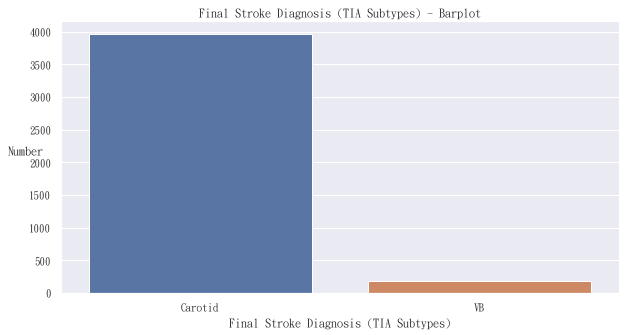

In [98]:
icdtia_id = tsr_6.loc[:,"icdtia_id"]
icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
icdtia_id = icdtia_id.fillna(icdtia_id.mode()[0])
#print(icdtia_id)
print(icdtia_id.value_counts() / len(icdtia_id))
#print(icdtia_id.describe())

icdtia_id_labels = ["Carotid","VB"]
sns.countplot(icdtia_id).set_xticklabels(icdtia_id_labels)
plt.title("Final Stroke Diagnosis (TIA Subtypes) - Barplot")
plt.xlabel('Final Stroke Diagnosis (TIA Subtypes)')
plt.ylabel('Number', rotation=0)
plt.show()

In [99]:
#ICDO_TX

# Ischemic Subtype(TOAST 分類)

2.0    0.262106
1.0    0.239942
5.0    0.112985
4.0    0.056854
3.0    0.004336
Name: toast_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


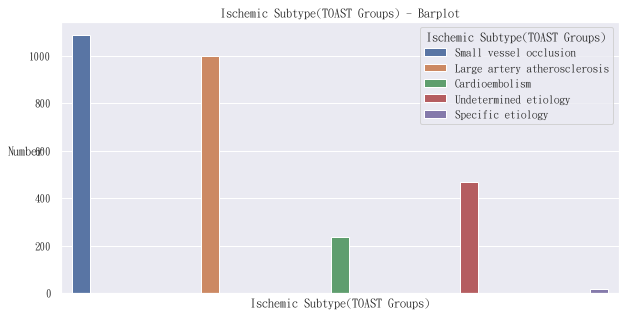

In [100]:
toast_id = tsr_6.loc[:,"toast_id"]
toast_id = pd.to_numeric(toast_id, errors = "coerce")
toast_id[(toast_id != 1) & (toast_id != 2) & (toast_id != 3) & (toast_id != 4) & (toast_id != 5)]  = np.nan
#print(toast_id)
print(toast_id.value_counts() / len(toast_id))
#print(toast_id.describe())

toast_id[toast_id == 1] = "Large artery atherosclerosis"
toast_id[toast_id == 2] = "Small vessel occlusion"
toast_id[toast_id == 3] = "Specific etiology"
toast_id[toast_id == 4] = "Cardioembolism"
toast_id[toast_id == 5] = "Undetermined etiology"

sns.countplot(toast_id, hue = toast_id)
plt.title("Ischemic Subtype(TOAST Groups) - Barplot")
plt.xlabel('Ischemic Subtype(TOAST Groups)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="Ischemic Subtype(TOAST Groups)")
plt.show()

toast_id[toast_id == "Large artery atherosclerosis"] = 1
toast_id[toast_id == "Small vessel occlusion"] = 2
toast_id[toast_id == "Specific etiology"] = 3
toast_id[toast_id == "Cardioembolism"] = 4
toast_id[toast_id == "Undetermined etiology"] = 5
toast_id = toast_id.fillna(999)

# Large Artery Atherosclerosis (Extra)

<ipython-input-101-d6e577c4887a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(0)] = int(0)
<ipython-input-101-d6e577c4887a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(1)] = int(1)
<ipython-input-101-d6e577c4887a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == int(0)] = "N"
<ipython-input-101-d6e577c4887a>:5: SettingWithCopyWarning: 
A value i

N    0.926042
Y    0.073958
Name: toastle_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


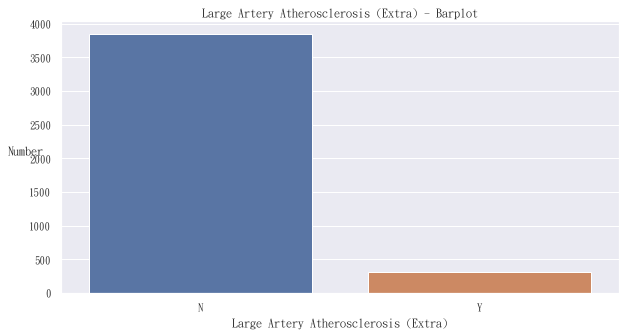

In [101]:
toastle_fl = tsr_6.loc[:,"toastle_fl"]
toastle_fl[toastle_fl == str(0)] = int(0)
toastle_fl[toastle_fl == str(1)] = int(1)
toastle_fl[toastle_fl == int(0)] = "N"
toastle_fl[toastle_fl == int(1)] = "Y"
toastle_fl = toastle_fl.fillna(toastle_fl.mode()[0])
#print(toastle_fl)
print(toastle_fl.value_counts() / len(toastle_fl))
#print(toastle_fl.describe())

sns.countplot(toastle_fl)
plt.title("Large Artery Atherosclerosis (Extra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Extra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Large Artery Atherosclerosis (Intra)

<ipython-input-102-d373f9acc092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(0)] = int(0)
<ipython-input-102-d373f9acc092>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(1)] = int(1)
<ipython-input-102-d373f9acc092>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == int(0)] = "N"
<ipython-input-102-d373f9acc092>:5: SettingWithCopyWarning: 
A value i

N    0.831125
Y    0.168875
Name: toastli_fl, dtype: float64


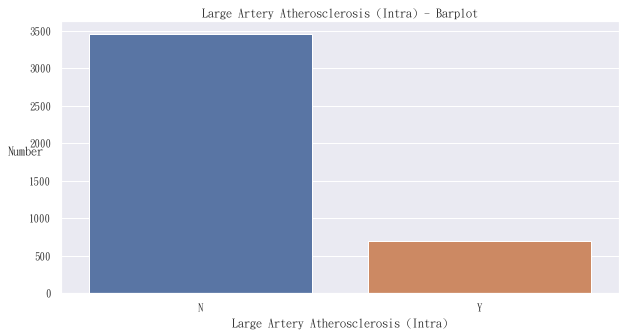

In [102]:
toastli_fl = tsr_6.loc[:,"toastli_fl"]
toastli_fl[toastli_fl == str(0)] = int(0)
toastli_fl[toastli_fl == str(1)] = int(1)
toastli_fl[toastli_fl == int(0)] = "N"
toastli_fl[toastli_fl == int(1)] = "Y"
toastli_fl = toastli_fl.fillna(toastli_fl.mode()[0])
#print(toastli_fl)
print(toastli_fl.value_counts() / len(toastli_fl))
#print(toastli_fl.describe())

sns.countplot(toastli_fl)
plt.title("Large Artery Atherosclerosis (Intra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Intra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cerebral Venous Thrombosis)

<ipython-input-103-82760bb7555d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(0)] = int(0)
<ipython-input-103-82760bb7555d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(1)] = int(1)
<ipython-input-103-82760bb7555d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == int(0)] = "N"
<ipython-input-103-82760bb7555d>:5: SettingWithCopyWarning: 
A v

N    0.997109
Y    0.002891
Name: toastsce_fl, dtype: float64


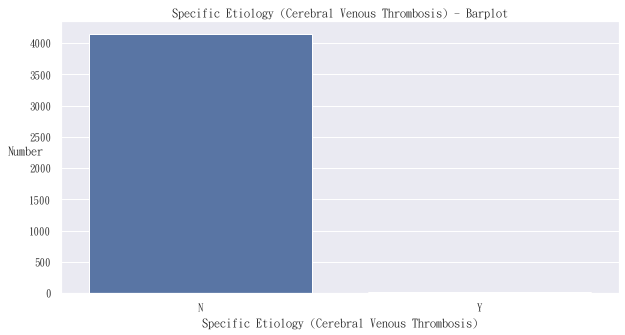

In [103]:
toastsce_fl = tsr_6.loc[:,"toastsce_fl"]
toastsce_fl[toastsce_fl == str(0)] = int(0)
toastsce_fl[toastsce_fl == str(1)] = int(1)
toastsce_fl[toastsce_fl == int(0)] = "N"
toastsce_fl[toastsce_fl == int(1)] = "Y"
toastsce_fl = toastsce_fl.fillna(toastsce_fl.mode()[0])
#print(toastsce_fl)
print(toastsce_fl.value_counts() / len(toastsce_fl))
#print(toastsce_fl.describe())

sns.countplot(toastsce_fl)
plt.title("Specific Etiology (Cerebral Venous Thrombosis) - Barplot")
plt.xlabel('Specific Etiology (Cerebral Venous Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Moyamoya Syndrome)

N    0.933992
Y    0.066008
Name: toastsmo_fl, dtype: float64


<ipython-input-104-22ecfa62a16f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(0)] = int(0)
<ipython-input-104-22ecfa62a16f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(1)] = int(1)
<ipython-input-104-22ecfa62a16f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == int(0)] = "N"
<ipython-input-104-22ecfa62a16f>:5: SettingWithCopyWarning: 
A v

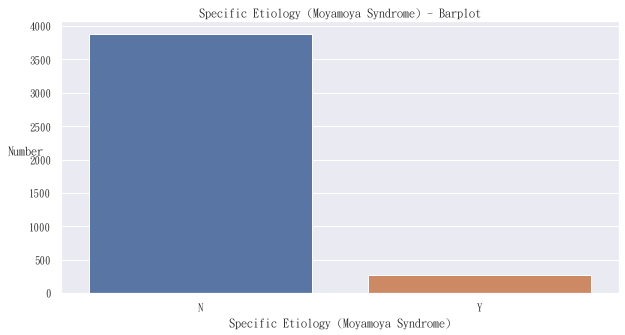

In [104]:
toastsmo_fl = tsr_6.loc[:,"toastsmo_fl"]
toastsmo_fl[toastsmo_fl == str(0)] = int(0)
toastsmo_fl[toastsmo_fl == str(1)] = int(1)
toastsmo_fl[toastsmo_fl == int(0)] = "N"
toastsmo_fl[toastsmo_fl == int(1)] = "Y"
toastsmo_fl = toastsmo_fl.fillna(toastsmo_fl.mode()[0])
#print(toastsmo_fl)
print(toastsmo_fl.value_counts() / len(toastsmo_fl))
#print(toastsmo_fl.describe())

sns.countplot(toastsmo_fl)
plt.title("Specific Etiology (Moyamoya Syndrome) - Barplot")
plt.xlabel('Specific Etiology (Moyamoya Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Radiation)

N    0.856661
Y    0.143339
Name: toastsra_fl, dtype: float64


<ipython-input-105-b033da4adeb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(0)] = int(0)
<ipython-input-105-b033da4adeb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(1)] = int(1)
<ipython-input-105-b033da4adeb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == int(0)] = "N"
<ipython-input-105-b033da4adeb1>:5: SettingWithCopyWarning: 
A v

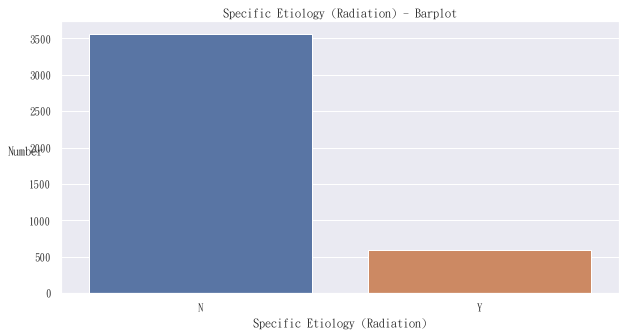

In [105]:
toastsra_fl = tsr_6.loc[:,"toastsra_fl"]
toastsra_fl[toastsra_fl == str(0)] = int(0)
toastsra_fl[toastsra_fl == str(1)] = int(1)
toastsra_fl[toastsra_fl == int(0)] = "N"
toastsra_fl[toastsra_fl == int(1)] = "Y"
toastsra_fl = toastsra_fl.fillna(toastsra_fl.mode()[0])
#print(toastsra_fl)
print(toastsra_fl.value_counts() / len(toastsra_fl))
#print(toastsra_fl.describe())

sns.countplot(toastsra_fl)
plt.title("Specific Etiology (Radiation) - Barplot")
plt.xlabel('Specific Etiology (Radiation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Dissection)

N    0.998795
Y    0.001205
Name: toastsdi_fl, dtype: float64


<ipython-input-106-121292236c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(0)] = int(0)
<ipython-input-106-121292236c93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(1)] = int(1)
<ipython-input-106-121292236c93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == int(0)] = "N"
<ipython-input-106-121292236c93>:5: SettingWithCopyWarning: 
A v

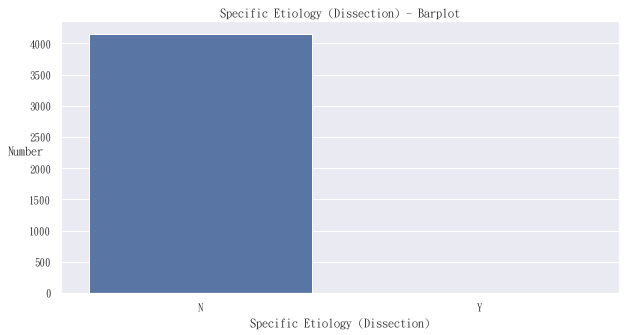

In [106]:
toastsdi_fl = tsr_6.loc[:,"toastsdi_fl"]
toastsdi_fl[toastsdi_fl == str(0)] = int(0)
toastsdi_fl[toastsdi_fl == str(1)] = int(1)
toastsdi_fl[toastsdi_fl == int(0)] = "N"
toastsdi_fl[toastsdi_fl == int(1)] = "Y"
toastsdi_fl = toastsdi_fl.fillna(toastsdi_fl.mode()[0])
#print(toastsdi_fl)
print(toastsdi_fl.value_counts() / len(toastsdi_fl))
#print(toastsdi_fl.describe())

sns.countplot(toastsdi_fl)
plt.title("Specific Etiology (Dissection) - Barplot")
plt.xlabel('Specific Etiology (Dissection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Migraine)

N    0.998795
Y    0.001205
Name: toastsmi_fl, dtype: float64


<ipython-input-107-122291cf3772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == str(0)] = int(0)
<ipython-input-107-122291cf3772>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


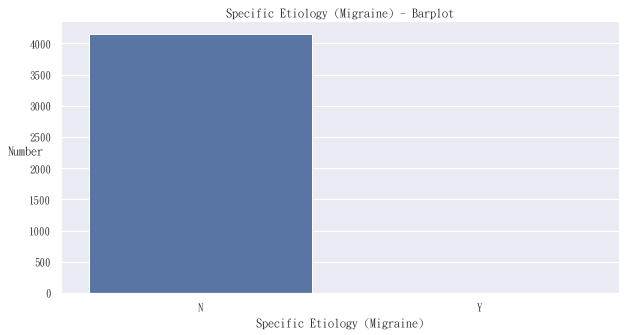

In [107]:
toastsmi_fl = tsr_6.loc[:,"toastsmi_fl"]
toastsmi_fl[toastsmi_fl == str(0)] = int(0)
toastsmi_fl[toastsmi_fl == int(0)] = "N"
toastsmi_fl = toastsmi_fl.fillna("Y")
#print(toastsmi_fl)
print(toastsmi_fl.value_counts() / len(toastsmi_fl))
#print(toastsmi_fl.describe())

sns.countplot(toastsmi_fl)
plt.title("Specific Etiology (Migraine) - Barplot")
plt.xlabel('Specific Etiology (Migraine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antiphospholipid Ab Synd)

N    1.0
Name: toastsantip_fl, dtype: float64


<ipython-input-108-7b39e4f3034c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(0)] = int(0)
<ipython-input-108-7b39e4f3034c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(1)] = int(1)
<ipython-input-108-7b39e4f3034c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == int(0)] = "N"
<ipython-input-108-7b39e4f3034c>:5: SettingWit

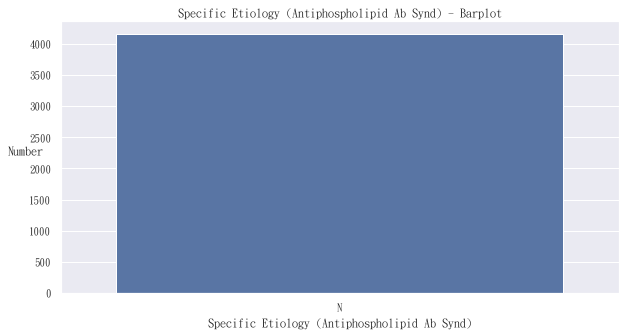

In [108]:
toastsantip_fl = tsr_6.loc[:,"toastsantip_fl"]
toastsantip_fl[toastsantip_fl == str(0)] = int(0)
toastsantip_fl[toastsantip_fl == str(1)] = int(1)
toastsantip_fl[toastsantip_fl == int(0)] = "N"
toastsantip_fl[toastsantip_fl == int(1)] = "Y"
toastsantip_fl = toastsantip_fl.fillna(toastsantip_fl.mode()[0])
#print(toastsantip_fl)
print(toastsantip_fl.value_counts() / len(toastsantip_fl))
#print(toastsantip_fl.describe())

sns.countplot(toastsantip_fl)
plt.title("Specific Etiology (Antiphospholipid Ab Synd) - Barplot")
plt.xlabel('Specific Etiology (Antiphospholipid Ab Synd)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Autoimmune Disease)

N    1.0
Name: toastsau_fl, dtype: float64


<ipython-input-109-4d1d5ca9ccd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(0)] = int(0)
<ipython-input-109-4d1d5ca9ccd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(1)] = int(1)
<ipython-input-109-4d1d5ca9ccd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == int(0)] = "N"
<ipython-input-109-4d1d5ca9ccd3>:5: SettingWithCopyWarning: 
A v

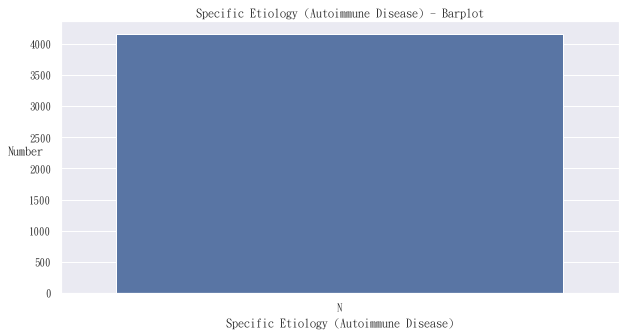

In [109]:
toastsau_fl = tsr_6.loc[:,"toastsau_fl"]
toastsau_fl[toastsau_fl == str(0)] = int(0)
toastsau_fl[toastsau_fl == str(1)] = int(1)
toastsau_fl[toastsau_fl == int(0)] = "N"
toastsau_fl[toastsau_fl == int(1)] = "Y"
toastsau_fl = toastsau_fl.fillna(toastsau_fl.mode()[0])
#print(toastsau_fl)
print(toastsau_fl.value_counts() / len(toastsau_fl))
#print(toastsau_fl.describe())

sns.countplot(toastsau_fl)
plt.title("Specific Etiology (Autoimmune Disease) - Barplot")
plt.xlabel('Specific Etiology (Autoimmune Disease)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hyperfibrinogenemia)

<ipython-input-110-58b7a85f3577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == str(0)] = int(0)
<ipython-input-110-58b7a85f3577>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.998795
Y    0.001205
Name: toastshy_fl, dtype: float64


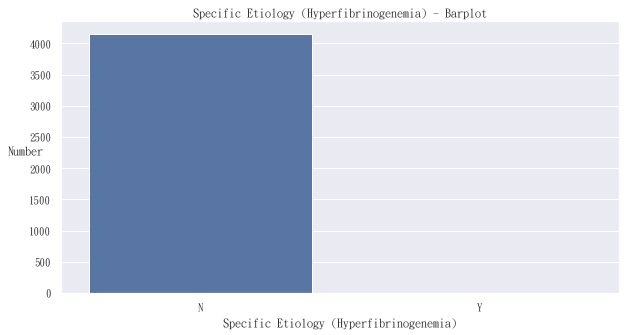

In [110]:
toastshy_fl = tsr_6.loc[:,"toastshy_fl"]
toastshy_fl[toastshy_fl == str(0)] = int(0)
toastshy_fl[toastshy_fl == int(0)] = "N"
toastshy_fl = toastshy_fl.fillna("Y")
#print(toastshy_fl)
print(toastshy_fl.value_counts() / len(toastshy_fl))
#print(toastshy_fl.describe())

sns.countplot(toastshy_fl)
plt.title("Specific Etiology (Hyperfibrinogenemia) - Barplot")
plt.xlabel('Specific Etiology (Hyperfibrinogenemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Prot C/Prot S Deficiency)

N    0.999759
Y    0.000241
Name: toastspr_fl, dtype: float64


<ipython-input-111-e7f9a47473d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(0)] = int(0)
<ipython-input-111-e7f9a47473d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(1)] = int(1)
<ipython-input-111-e7f9a47473d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == int(0)] = "N"
<ipython-input-111-e7f9a47473d2>:5: SettingWithCopyWarning: 
A v

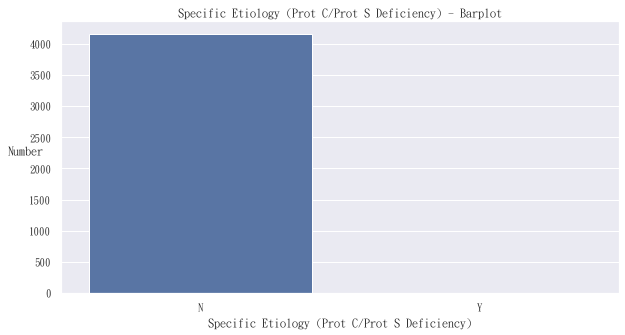

In [111]:
toastspr_fl = tsr_6.loc[:,"toastspr_fl"]
toastspr_fl[toastspr_fl == str(0)] = int(0)
toastspr_fl[toastspr_fl == str(1)] = int(1)
toastspr_fl[toastspr_fl == int(0)] = "N"
toastspr_fl[toastspr_fl == int(1)] = "Y"
toastspr_fl = toastspr_fl.fillna(toastspr_fl.mode()[0])
#print(toastspr_fl)
print(toastspr_fl.value_counts() / len(toastspr_fl))
#print(toastspr_fl.describe())

sns.countplot(toastspr_fl)
plt.title("Specific Etiology (Prot C/Prot S Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Prot C/Prot S Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antithrombin III Deficiency)

N    1.0
Name: toastsantit_fl, dtype: float64


<ipython-input-112-7ad2f184ae99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(0)] = int(0)
<ipython-input-112-7ad2f184ae99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(1)] = int(1)
<ipython-input-112-7ad2f184ae99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == int(0)] = "N"
<ipython-input-112-7ad2f184ae99>:5: SettingWit

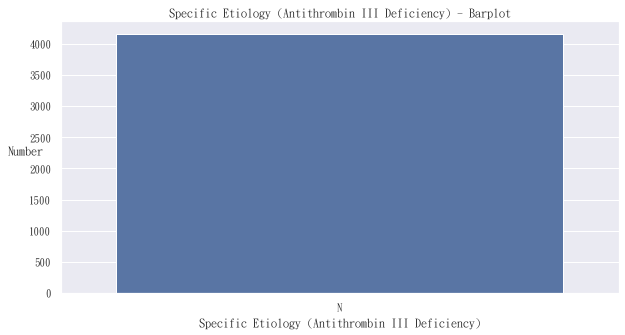

In [112]:
toastsantit_fl = tsr_6.loc[:,"toastsantit_fl"]
toastsantit_fl[toastsantit_fl == str(0)] = int(0)
toastsantit_fl[toastsantit_fl == str(1)] = int(1)
toastsantit_fl[toastsantit_fl == int(0)] = "N"
toastsantit_fl[toastsantit_fl == int(1)] = "Y"
toastsantit_fl = toastsantit_fl.fillna(toastsantit_fl.mode()[0])
#print(toastsantit_fl)
print(toastsantit_fl.value_counts() / len(toastsantit_fl))
#print(toastsantit_fl.describe())

sns.countplot(toastsantit_fl)
plt.title("Specific Etiology (Antithrombin III Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Antithrombin III Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Homocystinuria)

N    0.999759
Y    0.000241
Name: toastsho_fl, dtype: float64


<ipython-input-113-323565fd1ccd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(0)] = int(0)
<ipython-input-113-323565fd1ccd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(1)] = int(1)
<ipython-input-113-323565fd1ccd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == int(0)] = "N"
<ipython-input-113-323565fd1ccd>:5: SettingWithCopyWarning: 
A v

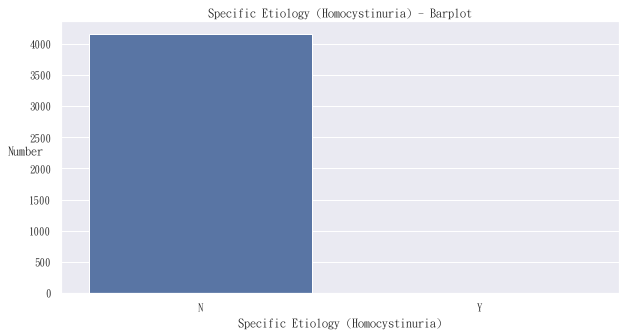

In [113]:
toastsho_fl = tsr_6.loc[:,"toastsho_fl"]
toastsho_fl[toastsho_fl == str(0)] = int(0)
toastsho_fl[toastsho_fl == str(1)] = int(1)
toastsho_fl[toastsho_fl == int(0)] = "N"
toastsho_fl[toastsho_fl == int(1)] = "Y"
toastsho_fl = toastsho_fl.fillna(toastsho_fl.mode()[0])
#print(toastsho_fl)
print(toastsho_fl.value_counts() / len(toastsho_fl))
#print(toastsho_fl.describe())

sns.countplot(toastsho_fl)
plt.title("Specific Etiology (Homocystinuria) - Barplot")
plt.xlabel('Specific Etiology (Homocystinuria)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hypercoagulable State)

N    1.0
Name: toastshys_fl, dtype: float64


<ipython-input-114-8f8cfeb06f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(0)] = int(0)
<ipython-input-114-8f8cfeb06f8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(1)] = int(1)
<ipython-input-114-8f8cfeb06f8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == int(0)] = "N"
<ipython-input-114-8f8cfeb06f8b>:5: SettingWithCopyWarning

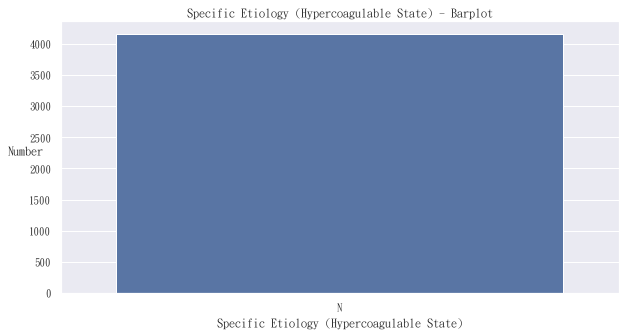

In [114]:
toastshys_fl = tsr_6.loc[:,"toastshys_fl"]
toastshys_fl[toastshys_fl == str(0)] = int(0)
toastshys_fl[toastshys_fl == str(1)] = int(1)
toastshys_fl[toastshys_fl == int(0)] = "N"
toastshys_fl[toastshys_fl == int(1)] = "Y"
toastshys_fl = toastshys_fl.fillna(toastshys_fl.mode()[0])
#print(toastshys_fl)
print(toastshys_fl.value_counts() / len(toastshys_fl))
#print(toastshys_fl.describe())

sns.countplot(toastshys_fl)
plt.title("Specific Etiology (Hypercoagulable State) - Barplot")
plt.xlabel('Specific Etiology (Hypercoagulable State)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cancer)

N    0.999759
Y    0.000241
Name: toastsca_fl, dtype: float64


<ipython-input-115-424d151ff274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(0)] = int(0)
<ipython-input-115-424d151ff274>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(1)] = int(1)
<ipython-input-115-424d151ff274>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == int(0)] = "N"
<ipython-input-115-424d151ff274>:5: SettingWithCopyWarning: 
A v

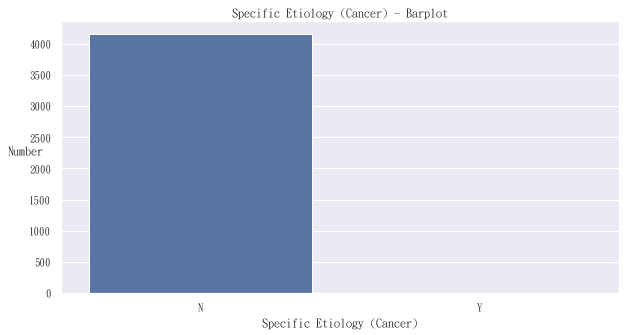

In [115]:
toastsca_fl = tsr_6.loc[:,"toastsca_fl"]
toastsca_fl[toastsca_fl == str(0)] = int(0)
toastsca_fl[toastsca_fl == str(1)] = int(1)
toastsca_fl[toastsca_fl == int(0)] = "N"
toastsca_fl[toastsca_fl == int(1)] = "Y"
toastsca_fl = toastsca_fl.fillna(toastsca_fl.mode()[0])
#print(toastsca_fl)
print(toastsca_fl.value_counts() / len(toastsca_fl))
#print(toastsca_fl.describe())

sns.countplot(toastsca_fl)
plt.title("Specific Etiology (Cancer) - Barplot")
plt.xlabel('Specific Etiology (Cancer)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Others)

N    0.998555
Y    0.001445
Name: toastso_fl, dtype: float64


<ipython-input-116-7baa51267049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(0)] = int(0)
<ipython-input-116-7baa51267049>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(1)] = int(1)
<ipython-input-116-7baa51267049>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == int(0)] = "N"
<ipython-input-116-7baa51267049>:5: SettingWithCopyWarning: 
A value i

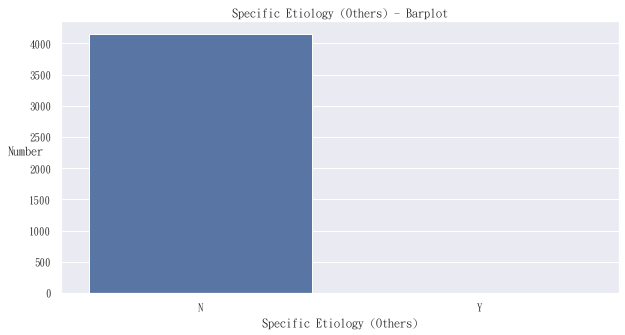

In [116]:
toastso_fl = tsr_6.loc[:,"toastso_fl"]
toastso_fl[toastso_fl == str(0)] = int(0)
toastso_fl[toastso_fl == str(1)] = int(1)
toastso_fl[toastso_fl == int(0)] = "N"
toastso_fl[toastso_fl == int(1)] = "Y"
toastso_fl[(toastso_fl != "N") & (toastso_fl != "Y")] = np.nan
toastso_fl = toastso_fl.fillna(toastso_fl.mode()[0])
#print(toastso_fl)
print(toastso_fl.value_counts() / len(toastso_fl))
#print(toastso_fl.describe())

sns.countplot(toastso_fl)
plt.title("Specific Etiology (Others) - Barplot")
plt.xlabel('Specific Etiology (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Undetermined Etiology

2.0    0.948928
1.0    0.041436
3.0    0.009636
Name: toastu_id, dtype: float64


<ipython-input-117-f685f2e54e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


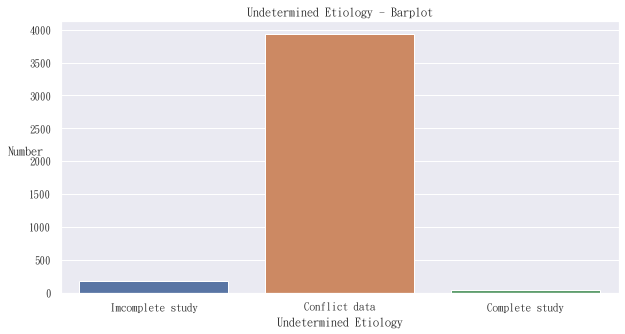

In [117]:
toastu_id = tsr_6.loc[:,"toastu_id"]
toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
toastu_id = toastu_id.fillna(toastu_id.mode()[0])
#print(toastu_id)
print(toastu_id.value_counts() / len(toastu_id))
#print(toastu_id.describe())

toastu_id_labels = ["Imcomplete study","Conflict data","Complete study"]
sns.countplot(toastu_id).set_xticklabels(toastu_id_labels)
plt.title("Undetermined Etiology - Barplot")
plt.xlabel('Undetermined Etiology')
plt.ylabel('Number', rotation=0)
plt.show()

# Cause of ICH ???

0.0    0.791857
1.0    0.155143
2.0    0.017345
Name: cich_id, dtype: float64


<ipython-input-118-82560dfbf296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


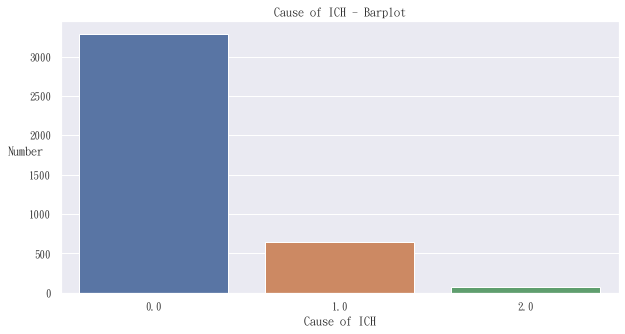

In [118]:
cich_id = tsr_6.loc[:,"cich_id"]
cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
#print(cich_id)
print(cich_id.value_counts() / len(cich_id))
#print(cich_id.describe())

#cich_id_labels = ["Hypertension","Non-Hypertension","2"], but documement says that the labels are 1 and 2
#sns.countplot(cich_id).set_xticklabels(cich_id_labels)
sns.countplot(cich_id)
plt.title("Cause of ICH - Barplot")
plt.xlabel('Cause of ICH')
plt.ylabel('Number', rotation=0)
plt.show()
cich_id = cich_id.fillna(999)

# Cause of SAH (蜘蛛膜下腔出血(Subarachnoid hemorrhage, SAH))

1.0     0.025295
2.0     0.007709
3.0     0.001686
99.0    0.000723
4.0     0.000723
Name: csah_id, dtype: float64


<ipython-input-119-7fe7dfd75334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


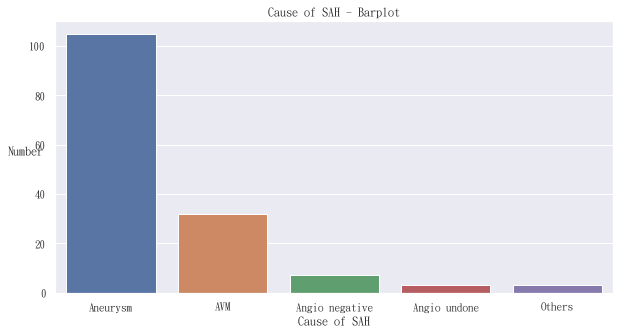

In [119]:
csah_id = tsr_6.loc[:,"csah_id"]
csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
#csah_id = csah_id.fillna(csah_id.mode()[0])
#print(csah_id)
print(csah_id.value_counts() / len(csah_id))
#print(csah_id.describe())

csah_id_labels = ["Aneurysm","AVM","Angio negative","Angio undone","Others"]
sns.countplot(csah_id).set_xticklabels(csah_id_labels)
plt.title("Cause of SAH - Barplot")
plt.xlabel('Cause of SAH')
plt.ylabel('Number', rotation=0)
plt.show()
csah_id = csah_id.fillna(999)

# Type of Heart Disease (NONE)

N    0.999518
Y    0.000482
Name: thd_id, dtype: float64


<ipython-input-120-55eba3f961f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(0)] = int(0)
<ipython-input-120-55eba3f961f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(1)] = int(1)
<ipython-input-120-55eba3f961f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == int(0)] = "N"
<ipython-input-120-55eba3f961f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

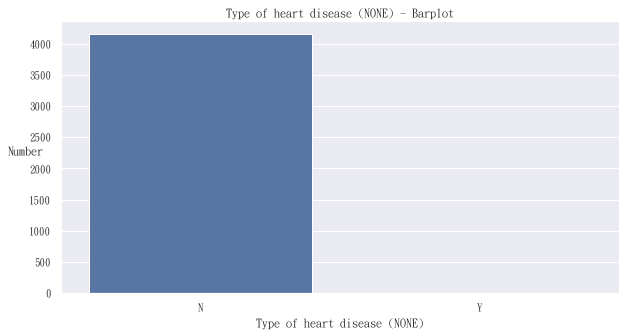

In [120]:
thd_id = tsr_6.loc[:,"thd_id"]
thd_id[thd_id == str(0)] = int(0)
thd_id[thd_id == str(1)] = int(1)
thd_id[thd_id == int(0)] = "N"
thd_id[thd_id == int(1)] = "Y"
thd_id = thd_id.fillna(thd_id.mode()[0])
#print(thd_id)
print(thd_id.value_counts() / len(thd_id))
#print(thd_id.describe())

sns.countplot(thd_id)
plt.title("Type of heart disease (NONE) - Barplot")
plt.xlabel('Type of heart disease (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Atrial Fibrillation)

<ipython-input-121-6e0db3bee878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(0)] = int(0)
<ipython-input-121-6e0db3bee878>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(1)] = int(1)
<ipython-input-121-6e0db3bee878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == int(0)] = "N"
<ipython-input-121-6e0db3bee878>:5: SettingWithCopyWarning: 
A value is trying to be set

N    0.971091
Y    0.028909
Name: thda_fl, dtype: float64


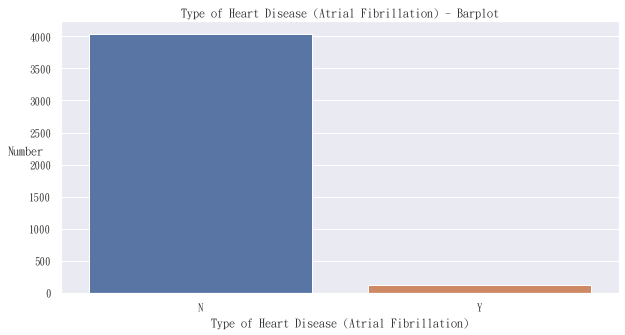

In [121]:
thda_fl = tsr_6.loc[:,"thda_fl"]
thda_fl[thda_fl == str(0)] = int(0)
thda_fl[thda_fl == str(1)] = int(1)
thda_fl[thda_fl == int(0)] = "N"
thda_fl[thda_fl == int(1)] = "Y"
thda_fl[thd_id == "Y"] = "N"
thda_fl = thda_fl.fillna(thda_fl.mode()[0])
#print(thda_fl)
print(thda_fl.value_counts() / len(thda_fl))
#print(thda_fl.describe())

sns.countplot(thda_fl)
plt.title("Type of Heart Disease (Atrial Fibrillation) - Barplot")
plt.xlabel('Type of Heart Disease (Atrial Fibrillation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Failure)

N    0.991568
Y    0.008432
Name: thdh_fl, dtype: float64


<ipython-input-122-e8a8dd02019d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(0)] = int(0)
<ipython-input-122-e8a8dd02019d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(1)] = int(1)
<ipython-input-122-e8a8dd02019d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == int(0)] = "N"
<ipython-input-122-e8a8dd02019d>:5: SettingWithCopyWarning: 
A value is trying to be set

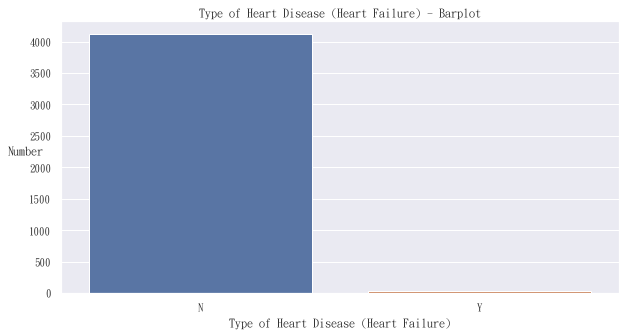

In [122]:
thdh_fl = tsr_6.loc[:,"thdh_fl"]
thdh_fl[thdh_fl == str(0)] = int(0)
thdh_fl[thdh_fl == str(1)] = int(1)
thdh_fl[thdh_fl == int(0)] = "N"
thdh_fl[thdh_fl == int(1)] = "Y"
thdh_fl[thd_id == "Y"] = "N"
thdh_fl = thdh_fl.fillna(thdh_fl.mode()[0])
#print(thdh_fl)
print(thdh_fl.value_counts() / len(thdh_fl))
#print(thdh_fl.describe())

sns.countplot(thdh_fl)
plt.title("Type of Heart Disease (Heart Failure) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Failure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Ischemic Heart - CAD, old MI)

N    0.874488
Y    0.125512
Name: thdi_fl, dtype: float64


<ipython-input-123-5d2a28180455>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(0)] = int(0)
<ipython-input-123-5d2a28180455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(1)] = int(1)
<ipython-input-123-5d2a28180455>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == int(0)] = "N"
<ipython-input-123-5d2a28180455>:5: SettingWithCopyWarning: 
A value is trying to be set

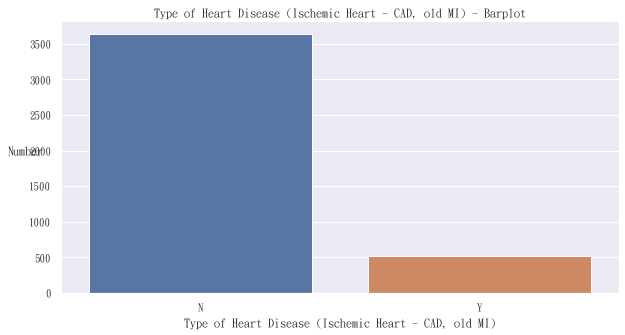

In [123]:
thdi_fl = tsr_6.loc[:,"thdi_fl"]
thdi_fl[thdi_fl == str(0)] = int(0)
thdi_fl[thdi_fl == str(1)] = int(1)
thdi_fl[thdi_fl == int(0)] = "N"
thdi_fl[thdi_fl == int(1)] = "Y"
thdi_fl[thd_id == "Y"] = "N"
thdi_fl = thdi_fl.fillna(thdi_fl.mode()[0])
#print(thdi_fl)
print(thdi_fl.value_counts() / len(thdi_fl))
#print(thdi_fl.describe())

sns.countplot(thdi_fl)
plt.title("Type of Heart Disease (Ischemic Heart - CAD, old MI) - Barplot")
plt.xlabel('Type of Heart Disease (Ischemic Heart - CAD, old MI)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Disease - AMI<4W)

N    0.997832
Y    0.002168
Name: thdam_fl, dtype: float64


<ipython-input-124-224f40d3e45a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(0)] = int(0)
<ipython-input-124-224f40d3e45a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(1)] = int(1)
<ipython-input-124-224f40d3e45a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == int(0)] = "N"
<ipython-input-124-224f40d3e45a>:5: SettingWithCopyWarning: 
A value is trying to 

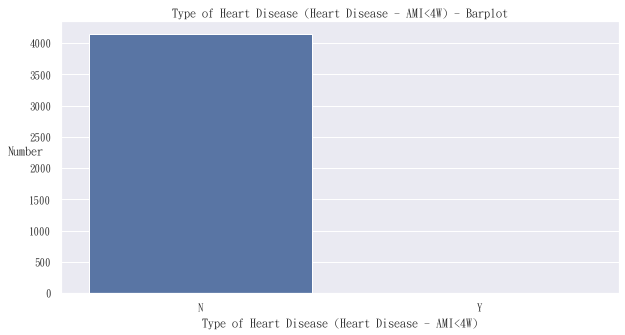

In [124]:
thdam_fl = tsr_6.loc[:,"thdam_fl"]
thdam_fl[thdam_fl == str(0)] = int(0)
thdam_fl[thdam_fl == str(1)] = int(1)
thdam_fl[thdam_fl == int(0)] = "N"
thdam_fl[thdam_fl == int(1)] = "Y"
thdam_fl[thd_id == "Y"] = "N"
thdam_fl = thdam_fl.fillna(thdam_fl.mode()[0])
#print(thdam_fl)
print(thdam_fl.value_counts() / len(thdam_fl))
#print(thdam_fl.describe())

sns.countplot(thdam_fl)
plt.title("Type of Heart Disease (Heart Disease - AMI<4W) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Disease - AMI<4W)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Valvular Replacement)

<ipython-input-125-00b148e6f07c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(0)] = int(0)
<ipython-input-125-00b148e6f07c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(1)] = int(1)
<ipython-input-125-00b148e6f07c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == int(0)] = "N"
<ipython-input-125-00b148e6f07c>:5: SettingWithCopyWarning: 
A value is trying to be set

N    0.999036
Y    0.000964
Name: thdv_fl, dtype: float64


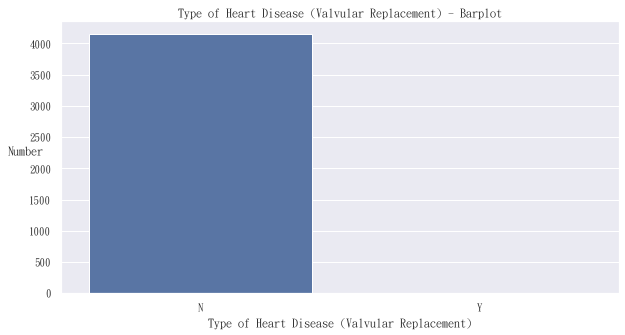

In [125]:
thdv_fl = tsr_6.loc[:,"thdv_fl"]
thdv_fl[thdv_fl == str(0)] = int(0)
thdv_fl[thdv_fl == str(1)] = int(1)
thdv_fl[thdv_fl == int(0)] = "N"
thdv_fl[thdv_fl == int(1)] = "Y"
thdv_fl[thd_id == "Y"] = "N"
thdv_fl = thdv_fl.fillna(thdv_fl.mode()[0])
#print(thdv_fl)
print(thdv_fl.value_counts() / len(thdv_fl))
#print(thdv_fl.describe())

sns.countplot(thdv_fl)
plt.title("Type of Heart Disease (Valvular Replacement) - Barplot")
plt.xlabel('Type of Heart Disease (Valvular Replacement)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Endocarditis)

<ipython-input-126-2145e88d1e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(0)] = int(0)
<ipython-input-126-2145e88d1e46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(1)] = int(1)
<ipython-input-126-2145e88d1e46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == int(0)] = "N"
<ipython-input-126-2145e88d1e46>:5: SettingWithCopyWarning: 
A value is trying to be set

N    0.999759
Y    0.000241
Name: thde_fl, dtype: float64


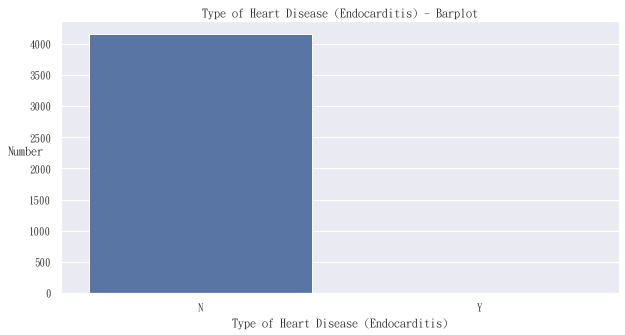

In [126]:
thde_fl = tsr_6.loc[:,"thde_fl"]
thde_fl[thde_fl == str(0)] = int(0)
thde_fl[thde_fl == str(1)] = int(1)
thde_fl[thde_fl == int(0)] = "N"
thde_fl[thde_fl == int(1)] = "Y"
thde_fl[thd_id == "Y"] = "N"
thde_fl = thde_fl.fillna(thde_fl.mode()[0])
#print(thde_fl)
print(thde_fl.value_counts() / len(thde_fl))
#print(thde_fl.describe())

sns.countplot(thde_fl)
plt.title("Type of Heart Disease (Endocarditis) - Barplot")
plt.xlabel('Type of Heart Disease (Endocarditis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Myxoma)

N    1.0
Name: thdm_fl, dtype: float64


<ipython-input-127-c2fe87556dcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(0)] = int(0)
<ipython-input-127-c2fe87556dcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(1)] = int(1)
<ipython-input-127-c2fe87556dcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == int(0)] = "N"
<ipython-input-127-c2fe87556dcf>:5: SettingWithCopyWarning: 
A value is trying to be set

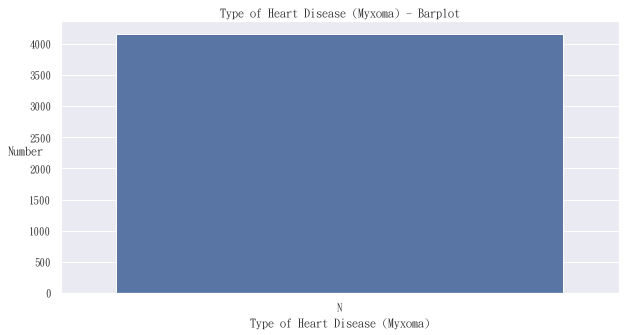

In [127]:
thdm_fl = tsr_6.loc[:,"thdm_fl"]
thdm_fl[thdm_fl == str(0)] = int(0)
thdm_fl[thdm_fl == str(1)] = int(1)
thdm_fl[thdm_fl == int(0)] = "N"
thdm_fl[thdm_fl == int(1)] = "Y"
thdm_fl[thd_id == "Y"] = "N"
thdm_fl = thdm_fl.fillna(thdm_fl.mode()[0])
#print(thdm_fl)
print(thdm_fl.value_counts() / len(thdm_fl))
#print(thdm_fl.describe())

sns.countplot(thdm_fl)
plt.title("Type of Heart Disease (Myxoma) - Barplot")
plt.xlabel('Type of Heart Disease (Myxoma)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (RHD)

N    0.999759
Y    0.000241
Name: thdr_fl, dtype: float64


<ipython-input-128-f0f53fb67a0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(0)] = int(0)
<ipython-input-128-f0f53fb67a0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(1)] = int(1)
<ipython-input-128-f0f53fb67a0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == int(0)] = "N"
<ipython-input-128-f0f53fb67a0e>:5: SettingWithCopyWarning: 
A value is trying to be set

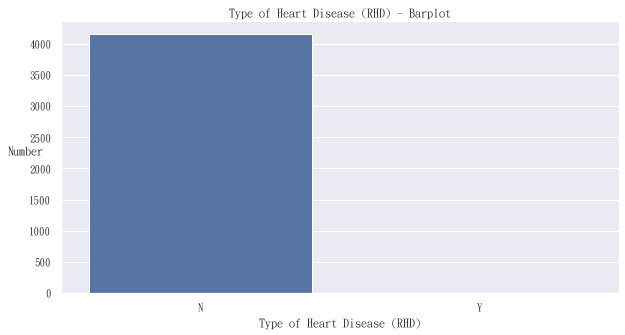

In [128]:
thdr_fl = tsr_6.loc[:,"thdr_fl"]
thdr_fl[thdr_fl == str(0)] = int(0)
thdr_fl[thdr_fl == str(1)] = int(1)
thdr_fl[thdr_fl == int(0)] = "N"
thdr_fl[thdr_fl == int(1)] = "Y"
thdr_fl[thd_id == "Y"] = "N"
thdr_fl = thdr_fl.fillna(thdr_fl.mode()[0])
#print(thdr_fl)
print(thdr_fl.value_counts() / len(thdr_fl))
#print(thdr_fl.describe())

sns.countplot(thdr_fl)
plt.title("Type of Heart Disease (RHD) - Barplot")
plt.xlabel('Type of Heart Disease (RHD)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Patent Foramen Ovale)

N    0.999759
Y    0.000241
Name: thdp_fl, dtype: float64


<ipython-input-129-db45de7badb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(0)] = int(0)
<ipython-input-129-db45de7badb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(1)] = int(1)
<ipython-input-129-db45de7badb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == int(0)] = "N"
<ipython-input-129-db45de7badb8>:5: SettingWithCopyWarning: 
A value is trying to be set

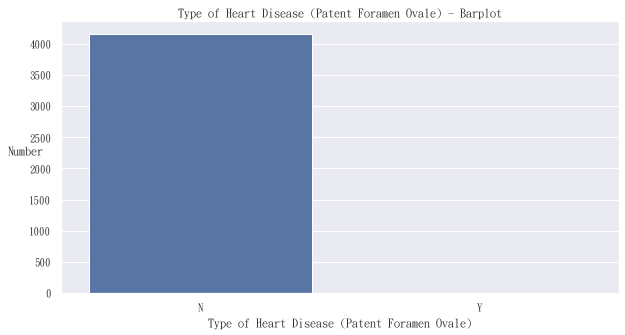

In [129]:
thdp_fl = tsr_6.loc[:,"thdp_fl"]
thdp_fl[thdp_fl == str(0)] = int(0)
thdp_fl[thdp_fl == str(1)] = int(1)
thdp_fl[thdp_fl == int(0)] = "N"
thdp_fl[thdp_fl == int(1)] = "Y"
thdp_fl[(thdp_fl != "N") & (thdp_fl != "Y")] = np.nan
thdp_fl[thd_id == "Y"] = "N"
thdp_fl = thdp_fl.fillna(thdp_fl.mode()[0])
#print(thdp_fl)
print(thdp_fl.value_counts() / len(thdp_fl))
#print(thdp_fl.describe())

sns.countplot(thdp_fl)
plt.title("Type of Heart Disease (Patent Foramen Ovale) - Barplot")
plt.xlabel('Type of Heart Disease (Patent Foramen Ovale)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Others)

N    0.989882
Y    0.010118
Name: thdoo_fl, dtype: float64


<ipython-input-130-935b5518e9ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(0)] = int(0)
<ipython-input-130-935b5518e9ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(1)] = int(1)
<ipython-input-130-935b5518e9ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == int(0)] = "N"
<ipython-input-130-935b5518e9ec>:5: SettingWithCopyWarning: 
A value is trying to 

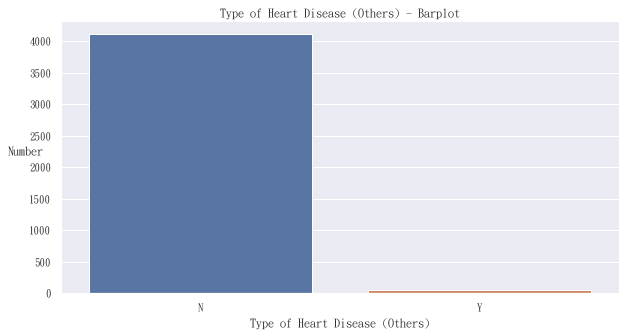

In [130]:
thdoo_fl = tsr_6.loc[:,"thdoo_fl"]
thdoo_fl[thdoo_fl == str(0)] = int(0)
thdoo_fl[thdoo_fl == str(1)] = int(1)
thdoo_fl[thdoo_fl == int(0)] = "N"
thdoo_fl[thdoo_fl == int(1)] = "Y"
thdoo_fl[(thdoo_fl != "N") & (thdoo_fl != "Y")] = np.nan
thdoo_fl[thd_id == "Y"] = "N"
thdoo_fl = thdoo_fl.fillna(thdoo_fl.mode()[0])
#print(thdoo_fl)
print(thdoo_fl.value_counts() / len(thdoo_fl))
#print(thdoo_fl.describe())

sns.countplot(thdoo_fl)
plt.title("Type of Heart Disease (Others) - Barplot")
plt.xlabel('Type of Heart Disease (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (None)

N    0.998073
Y    0.001927
Name: trm_id, dtype: float64


<ipython-input-131-0d9284a6d17f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(0)] = int(0)
<ipython-input-131-0d9284a6d17f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(1)] = int(1)
<ipython-input-131-0d9284a6d17f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == int(0)] = "N"
<ipython-input-131-0d9284a6d17f>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

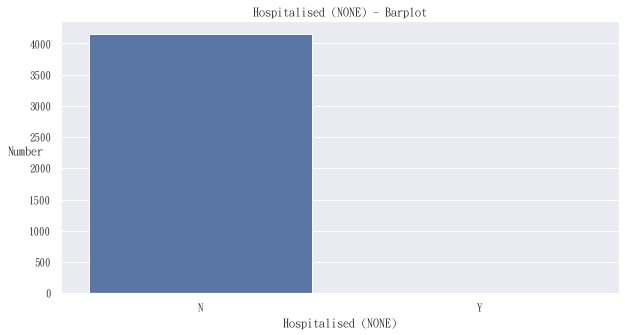

In [131]:
trm_id = tsr_6.loc[:,"trm_id"]
trm_id[trm_id == str(0)] = int(0)
trm_id[trm_id == str(1)] = int(1)
trm_id[trm_id == int(0)] = "N"
trm_id[trm_id == int(1)] = "Y"
trm_id[(trm_id != "N") & (trm_id != "Y")] = np.nan
trm_id = trm_id.fillna(trm_id.mode()[0])
#print(trm_id)
print(trm_id.value_counts() / len(trm_id))
#print(trm_id.describe())

sns.countplot(trm_id)
plt.title("Hospitalised (NONE) - Barplot")
plt.xlabel('Hospitalised (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Antithrombotic Drugs Dtart Within 48h)

N    0.906769
Y    0.093231
Name: trman_fl, dtype: float64


<ipython-input-132-7a3669a01322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
<ipython-input-132-7a3669a01322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


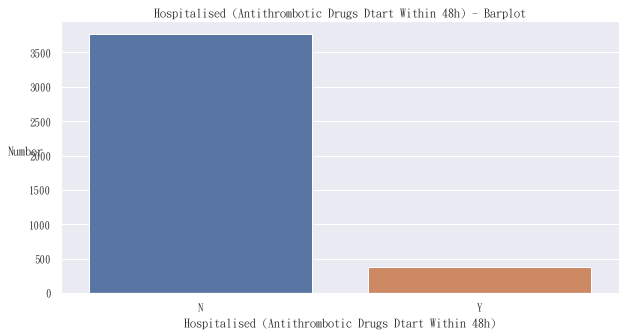

In [132]:
trman_fl = tsr_6.loc[:,"trman_fl"]
trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
trman_fl[trm_id == "Y"] = "N"
trman_fl = trman_fl.fillna(trman_fl.mode()[0])
#print(trman_fl)
print(trman_fl.value_counts() / len(trman_fl))
#print(trman_fl.describe())

sns.countplot(trman_fl)
plt.title("Hospitalised (Antithrombotic Drugs Dtart Within 48h) - Barplot")
plt.xlabel('Hospitalised (Antithrombotic Drugs Dtart Within 48h)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Aspirin)

N    0.923392
Y    0.076608
Name: trmas_fl, dtype: float64


<ipython-input-133-399bc9518f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmas_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


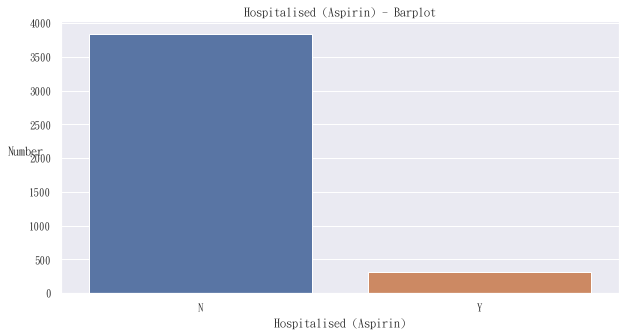

In [133]:
trmas_fl = tsr_6.loc[:,"trmas_fl"]
trmas_fl[trm_id == "Y"] = "N"
trmas_fl = trmas_fl.fillna(trmas_fl.mode()[0])
#print(trmas_fl)
print(trmas_fl.value_counts() / len(trmas_fl))
#print(trmas_fl.describe())

sns.countplot(trmas_fl)
plt.title("Hospitalised (Aspirin) - Barplot")
plt.xlabel('Hospitalised (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ticlopidine)

N    0.891592
Y    0.108408
Name: trmti_fl, dtype: float64


<ipython-input-134-19d4219373f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmti_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


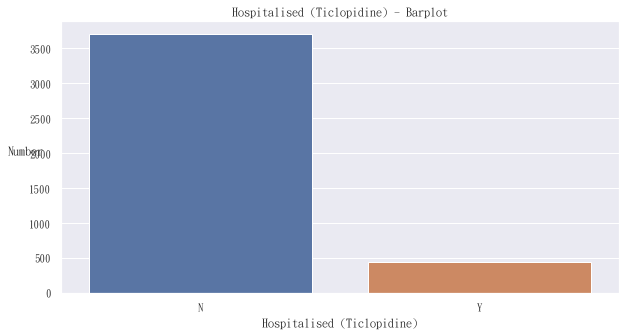

In [134]:
trmti_fl = tsr_6.loc[:,"trmti_fl"]
trmti_fl[trm_id == "Y"] = "N"
trmti_fl = trmti_fl.fillna(trmti_fl.mode()[0])
#print(trmti_fl)
print(trmti_fl.value_counts() / len(trmti_fl))
#print(trmti_fl.describe())

sns.countplot(trmti_fl)
plt.title("Hospitalised (Ticlopidine) - Barplot")
plt.xlabel('Hospitalised (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Heparin)

N    0.980005
Y    0.019995
Name: trmhe_fl, dtype: float64


<ipython-input-135-d5ab87f029fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmhe_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


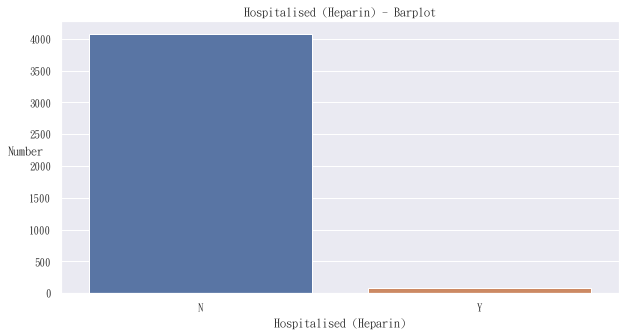

In [135]:
trmhe_fl = tsr_6.loc[:,"trmhe_fl"]
trmhe_fl[trm_id == "Y"] = "N"
trmhe_fl = trmhe_fl.fillna(trmhe_fl.mode()[0])
#print(trmhe_fl)
print(trmhe_fl.value_counts() / len(trmhe_fl))
#print(trmhe_fl.describe())

sns.countplot(trmhe_fl)
plt.title("Hospitalised (Heparin) - Barplot")
plt.xlabel('Hospitalised (Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Warfarin)

N    0.919778
Y    0.080222
Name: trmwa_fl, dtype: float64


<ipython-input-136-04c7072c256b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmwa_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


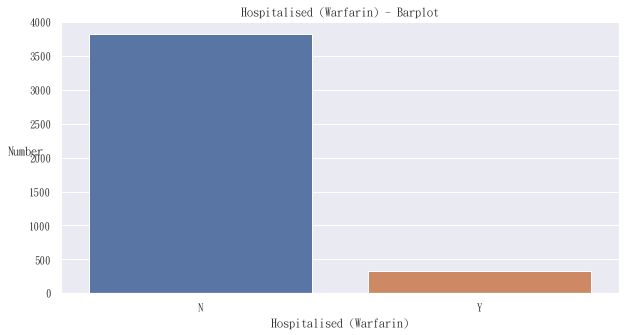

In [136]:
trmwa_fl = tsr_6.loc[:,"trmwa_fl"]
trmwa_fl[trm_id == "Y"] = "N"
trmwa_fl = trmwa_fl.fillna(trmwa_fl.mode()[0])
#print(trmwa_fl)
print(trmwa_fl.value_counts() / len(trmwa_fl))
#print(trmwa_fl.describe())

sns.countplot(trmwa_fl)
plt.title("Hospitalised (Warfarin) - Barplot")
plt.xlabel('Hospitalised (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IA Thrombolysis)

N    0.847266
Y    0.152734
Name: trmia_fl, dtype: float64


<ipython-input-137-ae97f8c51efd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmia_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


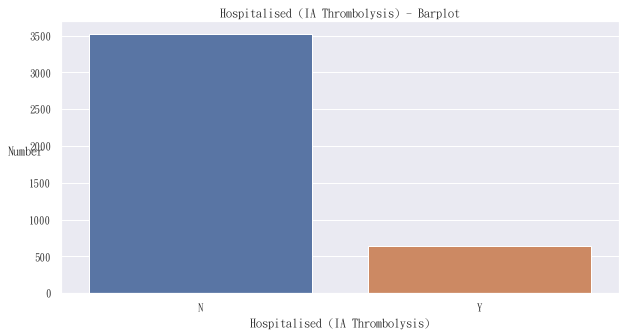

In [137]:
trmia_fl = tsr_6.loc[:,"trmia_fl"]
trmia_fl[trm_id == "Y"] = "N"
trmia_fl = trmia_fl.fillna(trmia_fl.mode()[0])
#print(trmia_fl)
print(trmia_fl.value_counts() / len(trmia_fl))
#print(trmia_fl.describe())

sns.countplot(trmia_fl)
plt.title("Hospitalised (IA Thrombolysis) - Barplot")
plt.xlabel('Hospitalised (IA Thrombolysis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Foley)

N    0.736208
Y    0.263792
Name: trmfo_fl, dtype: float64


<ipython-input-138-a0aaa9b4e8ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmfo_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


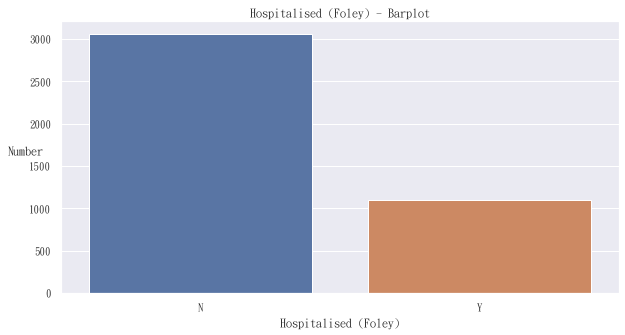

In [138]:
trmfo_fl = tsr_6.loc[:,"trmfo_fl"]
trmfo_fl[trm_id == "Y"] = "N"
trmfo_fl = trmfo_fl.fillna(trmfo_fl.mode()[0])
#print(trmfo_fl)
print(trmfo_fl.value_counts() / len(trmfo_fl))
#print(trmfo_fl.describe())

sns.countplot(trmfo_fl)
plt.title("Hospitalised (Foley) - Barplot")
plt.xlabel('Hospitalised (Foley)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Transarterial - Embolization)

N    0.998795
Y    0.001205
Name: trmta_fl, dtype: float64


<ipython-input-139-6357ab422700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmta_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


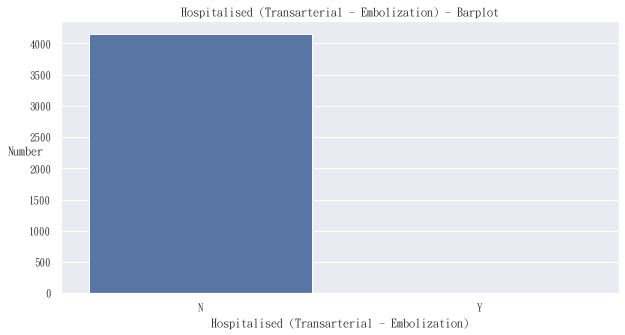

In [139]:
trmta_fl = tsr_6.loc[:,"trmta_fl"]
trmta_fl[trm_id == "Y"] = "N"
trmta_fl = trmta_fl.fillna(trmta_fl.mode()[0])
#print(trmta_fl)
print(trmta_fl.value_counts() / len(trmta_fl))
#print(trmta_fl.describe())

sns.countplot(trmta_fl)
plt.title("Hospitalised (Transarterial - Embolization) - Barplot")
plt.xlabel('Hospitalised (Transarterial - Embolization)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Sign DNR)

<ipython-input-140-6128cf33bb66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsd_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.979764
Y    0.020236
Name: trmsd_fl, dtype: float64


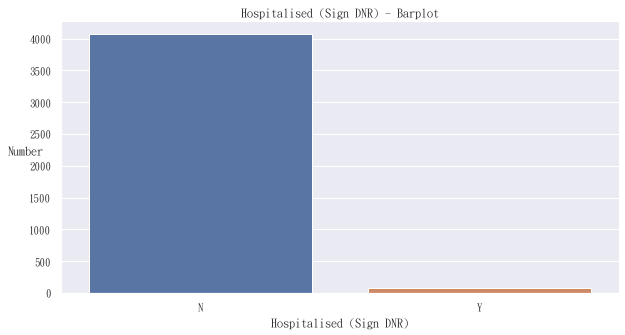

In [140]:
trmsd_fl = tsr_6.loc[:,"trmsd_fl"]
trmsd_fl[trm_id == "Y"] = "N"
trmsd_fl = trmsd_fl.fillna(trmsd_fl.mode()[0])
#print(trmsd_fl)
print(trmsd_fl.value_counts() / len(trmsd_fl))
#print(trmsd_fl.describe())

sns.countplot(trmsd_fl)
plt.title("Hospitalised (Sign DNR) - Barplot")
plt.xlabel('Hospitalised (Sign DNR)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Rehab)

Y    0.576969
N    0.423031
Name: trmre_fl, dtype: float64


<ipython-input-141-de0e158deec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmre_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


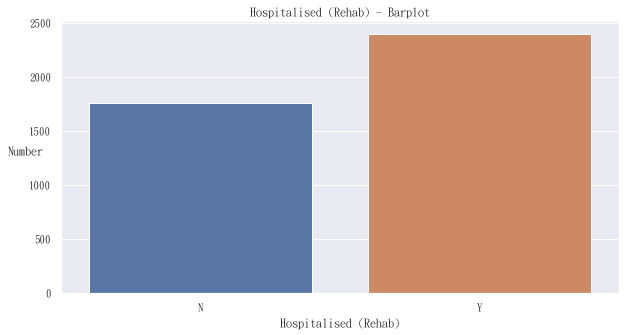

In [141]:
trmre_fl = tsr_6.loc[:,"trmre_fl"]
trmre_fl[trm_id == "Y"] = "N"
trmre_fl = trmre_fl.fillna(trmre_fl.mode()[0])
#print(trmre_fl)
print(trmre_fl.value_counts() / len(trmre_fl))
#print(trmre_fl.describe())

sns.countplot(trmre_fl)
plt.title("Hospitalised (Rehab) - Barplot")
plt.xlabel('Hospitalised (Rehab)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment)

N    0.998555
Y    0.001445
Name: trmen_fl, dtype: float64


<ipython-input-142-7012cfc4ab26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
<ipython-input-142-7012cfc4ab26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


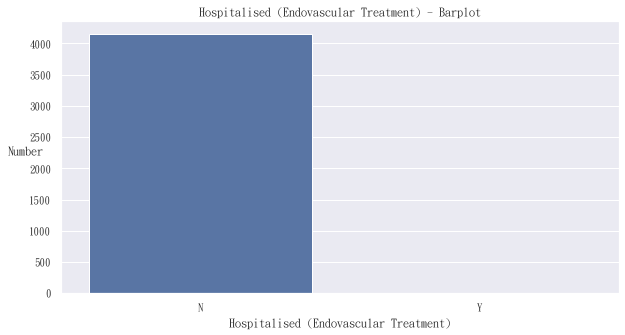

In [142]:
trmen_fl = tsr_6.loc[:,"trmen_fl"]
trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
trmen_fl[trm_id == "Y"] = "N"
trmen_fl = trmen_fl.fillna(trmen_fl.mode()[0])
#print(trmen_fl)
print(trmen_fl.value_counts() / len(trmen_fl))
#print(trmen_fl.describe())

sns.countplot(trmen_fl)
plt.title("Hospitalised (Endovascular Treatment) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment Options)

3.0    0.001445
Name: trmen_id, dtype: float64


<ipython-input-143-04f49b59a352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(1)] = int(1)
<ipython-input-143-04f49b59a352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(2)] = int(2)
<ipython-input-143-04f49b59a352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(3)] = int(3)
<ipython-input-143-04f49b59a352>:5: SettingWithCopyWarning: 
A value is trying 

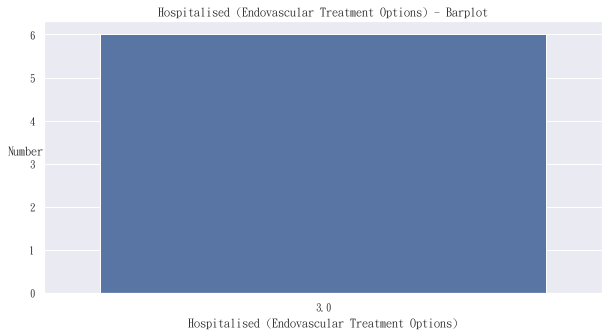

In [143]:
trmen_id = tsr_6.loc[:,"trmen_id"]
trmen_id[trmen_id == str(1)] = int(1)
trmen_id[trmen_id == str(2)] = int(2)
trmen_id[trmen_id == str(3)] = int(3)
trmen_id[(trmen_id != 1) & (trmen_id != 2) & (trmen_id != 3)] = np.nan
trmen_id = trmen_id.fillna(trmen_id.mode()[0])
trmen_id[trmen_fl == "N"] = np.nan
#print(trmen_id)
print(trmen_id.value_counts() / len(trmen_id))
#print(trmen_id.describe())

#trmen_id_labels = ["Aneurysm","AVM","Stenting"]
sns.countplot(trmen_id)#.set_xticklabels(trmen_id_labels)
plt.title("Hospitalised (Endovascular Treatment Options) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmen_id = trmen_id.fillna(999)

# Hospitalised (Aggrenox)

N    0.99735
Y    0.00265
Name: trmag_fl, dtype: float64


<ipython-input-144-dff52c0c6a44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmag_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


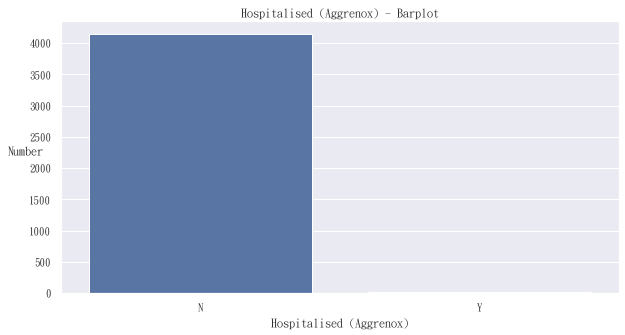

In [144]:
trmag_fl = tsr_6.loc[:,"trmag_fl"]
trmag_fl[trm_id == "Y"] = "N"
trmag_fl = trmag_fl.fillna(trmag_fl.mode()[0])
#print(trmag_fl)
print(trmag_fl.value_counts() / len(trmag_fl))
#print(trmag_fl.describe())

sns.countplot(trmag_fl)
plt.title("Hospitalised (Aggrenox) - Barplot")
plt.xlabel('Hospitalised (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Clopidogrel)

N    0.796675
Y    0.203325
Name: trmcl_fl, dtype: float64


<ipython-input-145-d86ab7c21958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


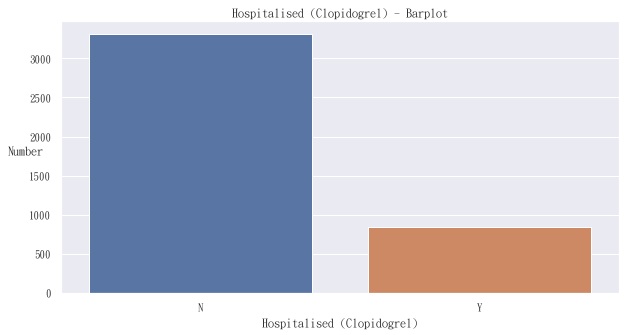

In [145]:
trmcl_fl = tsr_6.loc[:,"trmcl_fl"]
trmcl_fl[trm_id == "Y"] = "N"
trmcl_fl = trmcl_fl.fillna(trmcl_fl.mode()[0])
#print(trmcl_fl)
print(trmcl_fl.value_counts() / len(trmcl_fl))
#print(trmcl_fl.describe())

sns.countplot(trmcl_fl)
plt.title("Hospitalised (Clopidogrel) - Barplot")
plt.xlabel('Hospitalised (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Pletaal)

N    0.996627
Y    0.003373
Name: trmpl_fl, dtype: float64


<ipython-input-146-1504b0072890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmpl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


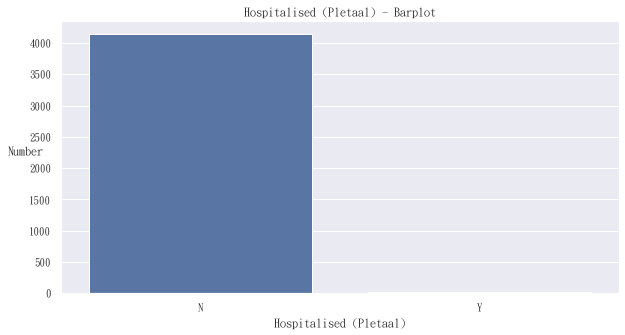

In [146]:
trmpl_fl = tsr_6.loc[:,"trmpl_fl"]
trmpl_fl[trm_id == "Y"] = "N"
trmpl_fl = trmpl_fl.fillna(trmpl_fl.mode()[0])
#print(trmpl_fl)
print(trmpl_fl.value_counts() / len(trmpl_fl))
#print(trmpl_fl.describe())

sns.countplot(trmpl_fl)
plt.title("Hospitalised (Pletaal) - Barplot")
plt.xlabel('Hospitalised (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (LMW Heparin)

N    0.976873
Y    0.023127
Name: trmlm_fl, dtype: float64


<ipython-input-147-53559d1a51ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmlm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


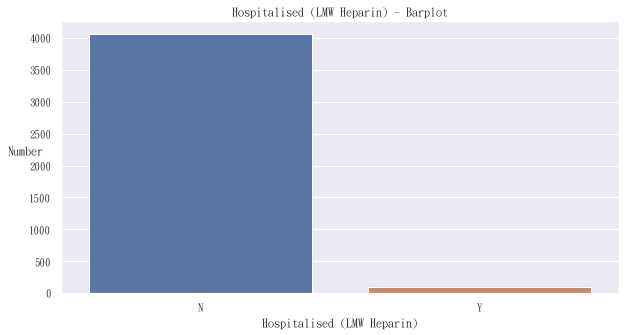

In [147]:
trmlm_fl = tsr_6.loc[:,"trmlm_fl"]
trmlm_fl[trm_id == "Y"] = "N"
trmlm_fl = trmlm_fl.fillna(trmlm_fl.mode()[0])
#print(trmlm_fl)
print(trmlm_fl.value_counts() / len(trmlm_fl))
#print(trmlm_fl.describe())

sns.countplot(trmlm_fl)
plt.title("Hospitalised (LMW Heparin) - Barplot")
plt.xlabel('Hospitalised (LMW Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IV t-PA)

N    0.952301
Y    0.047699
Name: trmiv_fl, dtype: float64


<ipython-input-148-93d0d52634a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmiv_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


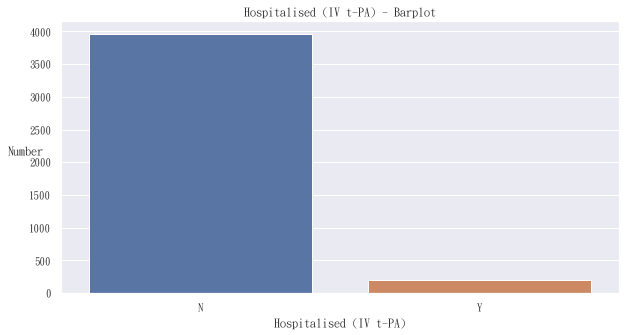

In [148]:
trmiv_fl = tsr_6.loc[:,"trmiv_fl"]
trmiv_fl[trm_id == "Y"] = "N"
trmiv_fl = trmiv_fl.fillna(trmiv_fl.mode()[0])
#print(trmiv_fl)
print(trmiv_fl.value_counts() / len(trmiv_fl))
#print(trmiv_fl.describe())

sns.countplot(trmiv_fl)
plt.title("Hospitalised (IV t-PA) - Barplot")
plt.xlabel('Hospitalised (IV t-PA)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ventilator)

N    0.833775
Y    0.166225
Name: trmve_fl, dtype: float64


<ipython-input-149-6a0ffe0926af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmve_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


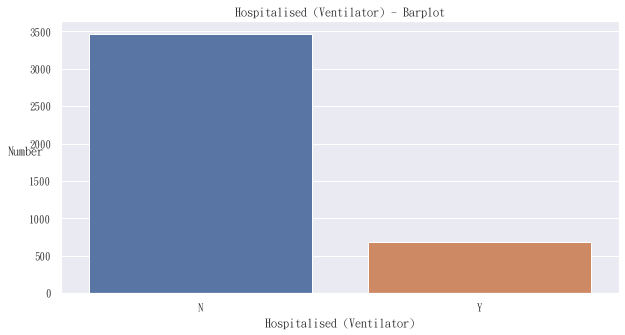

In [149]:
trmve_fl = tsr_6.loc[:,"trmve_fl"]
trmve_fl[trm_id == "Y"] = "N"
trmve_fl = trmve_fl.fillna(trmve_fl.mode()[0])
#print(trmve_fl)
print(trmve_fl.value_counts() / len(trmve_fl))
#print(trmve_fl.describe())

sns.countplot(trmve_fl)
plt.title("Hospitalised (Ventilator) - Barplot")
plt.xlabel('Hospitalised (Ventilator)')
plt.ylabel('Number', rotation=0)
plt.show()


# Hospitalised (Nasogastric Tube)

N    0.71814
Y    0.28186
Name: trmng_fl, dtype: float64


<ipython-input-150-bf94d19eeb4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmng_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


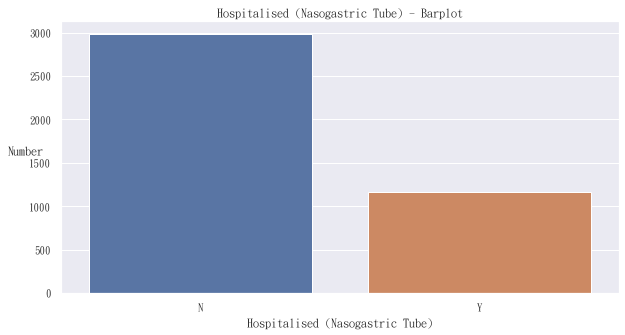

In [150]:
trmng_fl = tsr_6.loc[:,"trmng_fl"]
trmng_fl[trm_id == "Y"] = "N"
trmng_fl = trmng_fl.fillna(trmng_fl.mode()[0])
#print(trmng_fl)
print(trmng_fl.value_counts() / len(trmng_fl))
#print(trmng_fl.describe())

sns.countplot(trmng_fl)
plt.title("Hospitalised (Nasogastric Tube) - Barplot")
plt.xlabel('Hospitalised (Nasogastric Tube)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Dysphagia Screen)

N    0.850157
Y    0.149843
Name: trmdy_fl, dtype: float64


<ipython-input-151-3192471a57f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmdy_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


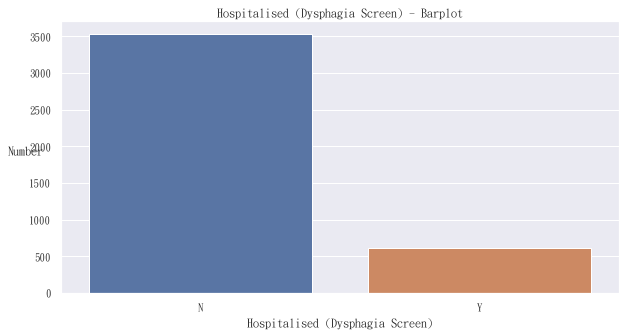

In [151]:
trmdy_fl = tsr_6.loc[:,"trmdy_fl"]
trmdy_fl[trm_id == "Y"] = "N"
trmdy_fl = trmdy_fl.fillna(trmdy_fl.mode()[0])
#print(trmdy_fl)
print(trmdy_fl.value_counts() / len(trmdy_fl))
#print(trmdy_fl.describe())

sns.countplot(trmdy_fl)
plt.title("Hospitalised (Dysphagia Screen) - Barplot")
plt.xlabel('Hospitalised (Dysphagia Screen)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Admission to ICU)

N    0.932065
Y    0.067935
Name: trmicu_fl, dtype: float64


<ipython-input-152-0278faa496c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmicu_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


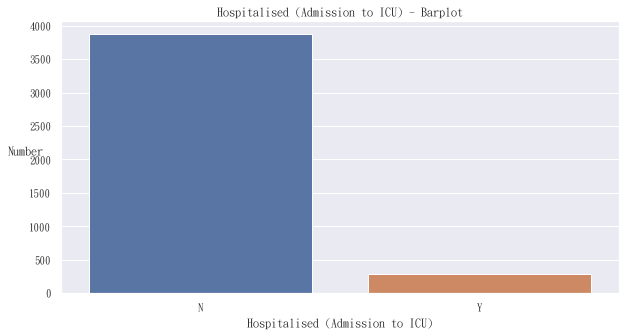

In [152]:
trmicu_fl = tsr_6.loc[:,"trmicu_fl"]
trmicu_fl[trm_id == "Y"] = "N"
trmicu_fl = trmicu_fl.fillna(trmicu_fl.mode()[0])
#print(trmicu_fl)
print(trmicu_fl.value_counts() / len(trmicu_fl))
#print(trmicu_fl.describe())

sns.countplot(trmicu_fl)
plt.title("Hospitalised (Admission to ICU) - Barplot")
plt.xlabel('Hospitalised (Admission to ICU)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Smoking Cessation Counseling)

N    0.891111
Y    0.108889
Name: trmsm_fl, dtype: float64


<ipython-input-153-d816747c4500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


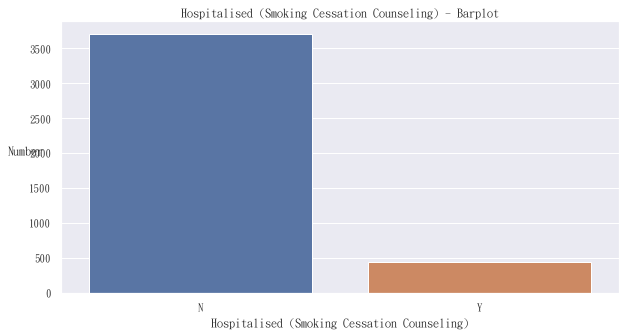

In [153]:
trmsm_fl = tsr_6.loc[:,"trmsm_fl"]
trmsm_fl[trm_id == "Y"] = "N"
trmsm_fl = trmsm_fl.fillna(trmsm_fl.mode()[0])
#print(trmsm_fl)
print(trmsm_fl.value_counts() / len(trmsm_fl))
#print(trmsm_fl.describe())

sns.countplot(trmsm_fl)
plt.title("Hospitalised (Smoking Cessation Counseling) - Barplot")
plt.xlabel('Hospitalised (Smoking Cessation Counseling)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Education About Stroke)

N    0.891111
Y    0.108889
Name: trmed_fl, dtype: float64


<ipython-input-154-30a83122c66f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmed_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


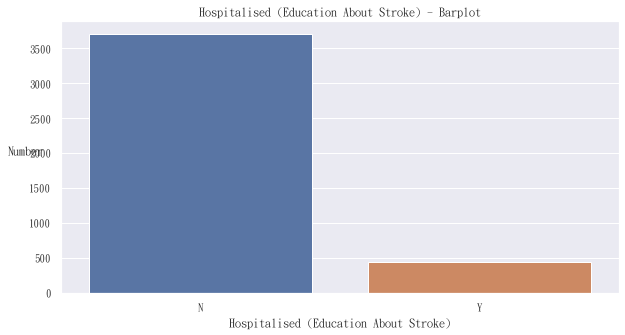

In [154]:
trmed_fl = tsr_6.loc[:,"trmed_fl"]
trmed_fl[trm_id == "Y"] = "N"
trmed_fl = trmed_fl.fillna(trmed_fl.mode()[0])
#print(trmed_fl)
print(trmed_fl.value_counts() / len(trmed_fl))
#print(trmed_fl.describe())

sns.countplot(trmed_fl)
plt.title("Hospitalised (Education About Stroke) - Barplot")
plt.xlabel('Hospitalised (Education About Stroke)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for)

N    0.989159
Y    0.010841
Name: trmop_fl, dtype: float64


<ipython-input-155-45b0da741fa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
<ipython-input-155-45b0da741fa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


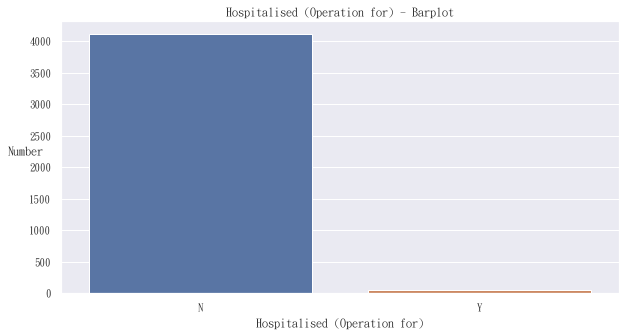

In [155]:
trmop_fl = tsr_6.loc[:,"trmop_fl"]
trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
trmop_fl[trm_id == "Y"] = "N"
trmop_fl = trmop_fl.fillna(trmop_fl.mode()[0])
#print(trmop_fl)
print(trmop_fl.value_counts() / len(trmop_fl))
#print(trmop_fl.describe())

sns.countplot(trmop_fl)
plt.title("Hospitalised (Operation for) - Barplot")
plt.xlabel('Hospitalised (Operation for)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for Options)

2.0    0.006745
1.0    0.003373
4.0    0.000723
Name: trmop_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


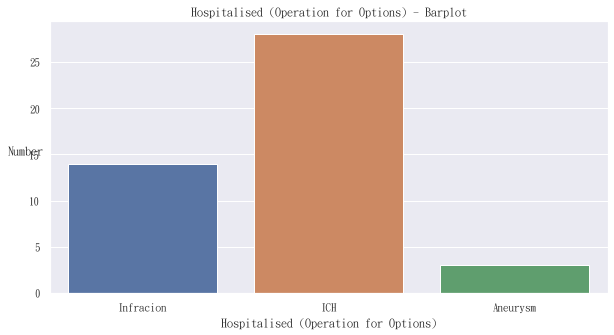

In [156]:
trmop_id = tsr_6.loc[:,"trmop_id"]
trmop_id = pd.to_numeric(trmop_id, errors = "coerce")
trmop_id = trmop_id.fillna(trmop_id.mode()[0])
trmop_id[trmop_fl == "N"] = np.nan
#print(trmop_id)
print(trmop_id.value_counts() / len(trmop_id))
#print(trmop_id.describe())

#trmop_id_labels = ["Infracion","ICH","Carotid Stenosis \n (eg:Endarterectomy)","Aneurysm","AVM"]
trmop_id_labels = ["Infracion","ICH","Aneurysm"]
sns.countplot(trmop_id).set_xticklabels(trmop_id_labels)
plt.title("Hospitalised (Operation for Options) - Barplot")
plt.xlabel('Hospitalised (Operation for Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmop_id = trmop_id.fillna(999)

# Hospitalised (Others)

<ipython-input-157-9c2bdac213fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan
<ipython-input-157-9c2bdac213fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.673573
Y    0.326427
Name: trmot_fl, dtype: float64


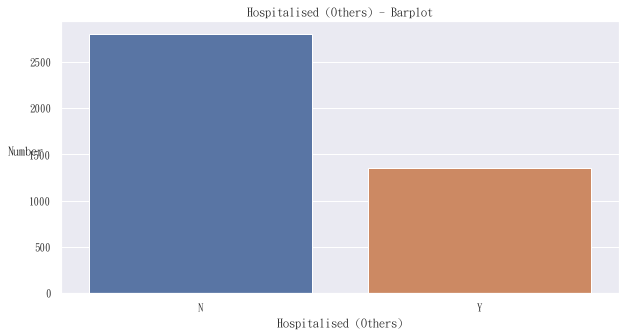

In [157]:
trmot_fl = tsr_6.loc[:,"trmot_fl"]
trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan 
trmot_fl[trm_id == "Y"] = "N"
trmot_fl = trmot_fl.fillna(trmot_fl.mode()[0])
#print(trmot_fl)
print(trmot_fl.value_counts() / len(trmot_fl))
#print(trmot_fl.describe())

sns.countplot(trmot_fl)
plt.title("Hospitalised (Others) - Barplot")
plt.xlabel('Hospitalised (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (None)

N    0.930137
Y    0.069863
Name: om_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


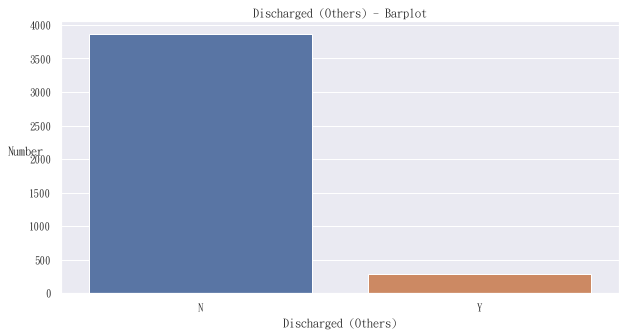

In [158]:
om_fl = tsr_6.loc[:,"om_fl"]
om_fl = om_fl.fillna(om_fl.mode()[0])
#print(om_fl)
print(om_fl.value_counts() / len(om_fl))
#print(om_fl.describe())

sns.countplot(om_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aspirin)

<ipython-input-159-e5be5a24c9b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omas_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.51072
Y    0.48928
Name: omas_fl, dtype: float64


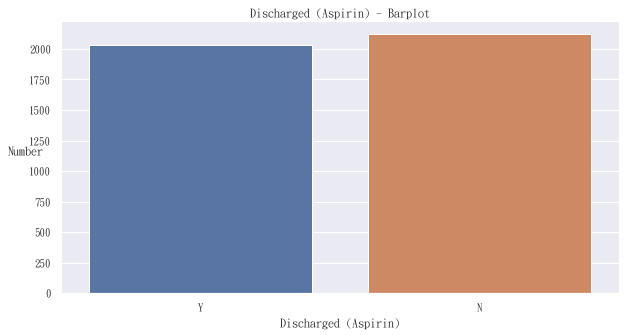

In [159]:
omas_fl = tsr_6.loc[:,"omas_fl"]
omas_fl[om_fl == "Y"] = "N"
omas_fl = omas_fl.fillna(omas_fl.mode()[0])
#print(omas_fl)
print(omas_fl.value_counts() / len(omas_fl))
#print(omas_fl.describe())

sns.countplot(omas_fl)
plt.title("Discharged (Aspirin) - Barplot")
plt.xlabel('Discharged (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aggrenox)

N    0.992291
Y    0.007709
Name: omag_fl, dtype: float64


<ipython-input-160-5b4f7dab0d13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omag_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


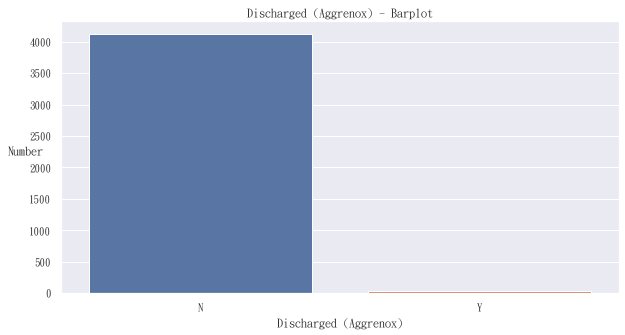

In [160]:
omag_fl = tsr_6.loc[:,"omag_fl"]
omag_fl[om_fl == "Y"] = "N"
omag_fl = omag_fl.fillna(omag_fl.mode()[0])
#print(omag_fl)
print(omag_fl.value_counts() / len(omag_fl))
#print(omag_fl.describe())

sns.countplot(omag_fl)
plt.title("Discharged (Aggrenox) - Barplot")
plt.xlabel('Discharged (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Ticlopidine)

N    0.999036
Y    0.000964
Name: omti_fl, dtype: float64


<ipython-input-161-d9287011be7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omti_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


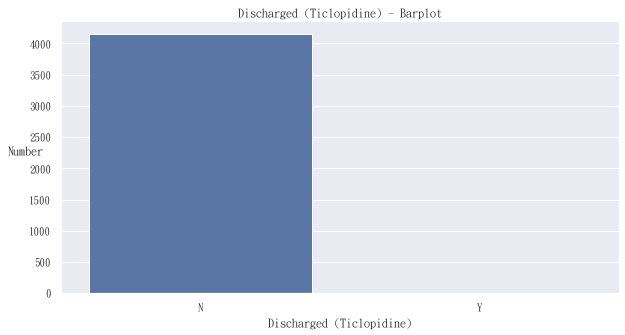

In [161]:
omti_fl = tsr_6.loc[:,"omti_fl"]
omti_fl[om_fl == "Y"] = "N"
omti_fl = omti_fl.fillna(omti_fl.mode()[0])
#print(omti_fl)
print(omti_fl.value_counts() / len(omti_fl))
#print(omti_fl.describe())

sns.countplot(omti_fl)
plt.title("Discharged (Ticlopidine) - Barplot")
plt.xlabel('Discharged (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Clopidogrel)

N    0.837148
Y    0.162852
Name: omcl_fl, dtype: float64


<ipython-input-162-94ec63577b50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
<ipython-input-162-94ec63577b50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


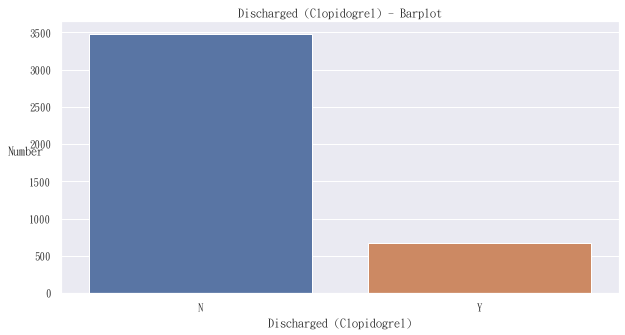

In [162]:
omcl_fl = tsr_6.loc[:,"omcl_fl"]
omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
omcl_fl[trm_id == "Y"] = "N"
omcl_fl = omcl_fl.fillna(omcl_fl.mode()[0])
#print(omcl_fl)
print(omcl_fl.value_counts() / len(omcl_fl))
#print(omcl_fl.describe())

sns.countplot(omcl_fl)
plt.title("Discharged (Clopidogrel) - Barplot")
plt.xlabel('Discharged (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Pletaal)

N    0.991327
Y    0.008673
Name: ompl_fl, dtype: float64


<ipython-input-163-9c063b26f974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ompl_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


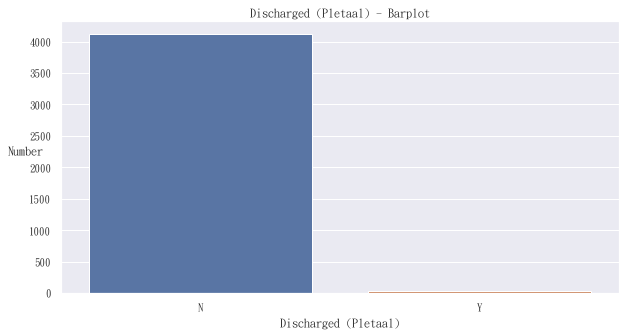

In [163]:
ompl_fl = tsr_6.loc[:,"ompl_fl"]
ompl_fl[om_fl == "Y"] = "N"
ompl_fl = ompl_fl.fillna(ompl_fl.mode()[0])
#print(ompl_fl)
print(ompl_fl.value_counts() / len(ompl_fl))
#print(ompl_fl.describe())

sns.countplot(ompl_fl)
plt.title("Discharged (Pletaal) - Barplot")
plt.xlabel('Discharged (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti H/T Drug)

Y    0.527102
N    0.472898
Name: omanh_fl, dtype: float64


<ipython-input-164-af761bfd6c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
<ipython-input-164-af761bfd6c98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


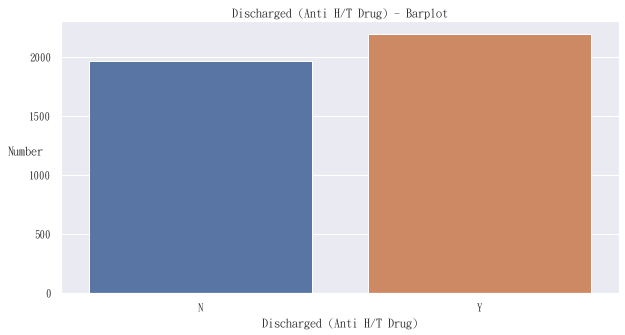

In [164]:
omanh_fl = tsr_6.loc[:,"omanh_fl"]
omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
omanh_fl[om_fl == "Y"] = "N"
omanh_fl = omanh_fl.fillna(omanh_fl.mode()[0])
#print(omanh_fl)
print(omanh_fl.value_counts() / len(omanh_fl))
#print(omanh_fl.describe())

sns.countplot(omanh_fl)
plt.title("Discharged (Anti H/T Drug) - Barplot")
plt.xlabel('Discharged (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Warfarin)

N    0.926765
Y    0.073235
Name: omwa_fl, dtype: float64


<ipython-input-165-dbf2270198d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
<ipython-input-165-dbf2270198d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


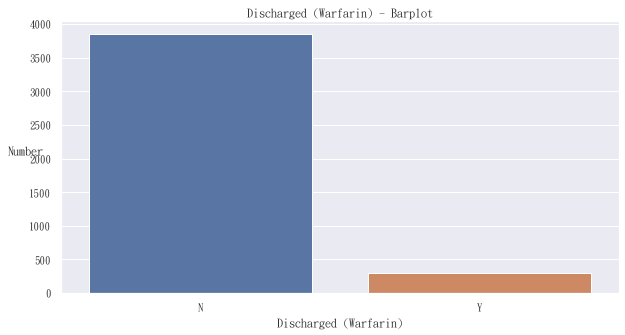

In [165]:
omwa_fl = tsr_6.loc[:,"omwa_fl"]
omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
omwa_fl[om_fl == "Y"] = "N"
omwa_fl = omwa_fl.fillna(omwa_fl.mode()[0])
#print(omwa_fl)
print(omwa_fl.value_counts() / len(omwa_fl))
#print(omwa_fl.describe())

sns.countplot(omwa_fl)
plt.title("Discharged (Warfarin) - Barplot")
plt.xlabel('Discharged (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug)

N    0.716454
Y    0.283546
Name: omand_fl, dtype: float64


<ipython-input-166-96169e94a2db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omand_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


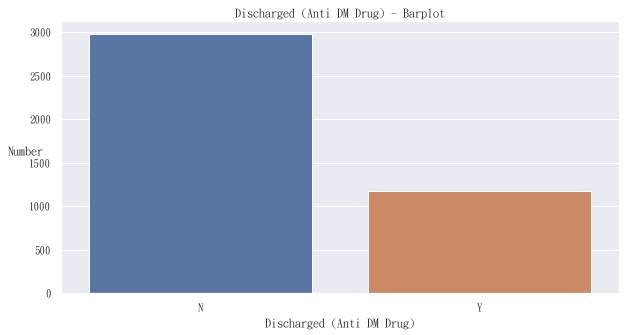

In [166]:
omand_fl = tsr_6.loc[:,"omand_fl"]
omand_fl[om_fl == "Y"] = "N"
omand_fl = omand_fl.fillna(omand_fl.mode()[0])
#print(omand_fl)
print(omand_fl.value_counts() / len(omand_fl))
#print(omand_fl.describe())

sns.countplot(omand_fl)
plt.title("Discharged (Anti DM Drug) - Barplot")
plt.xlabel('Discharged (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Oral)

N    0.972296
Y    0.027704
Name: omora_fl, dtype: float64


<ipython-input-167-409b792e0902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
<ipython-input-167-409b792e0902>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


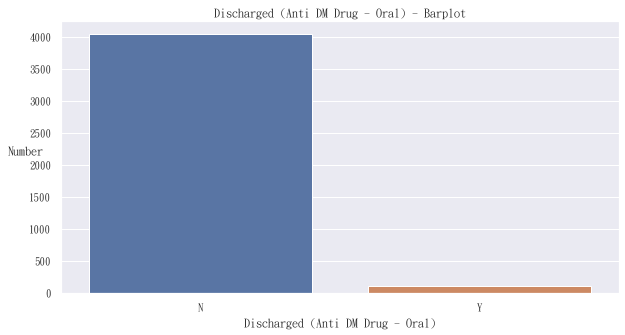

In [167]:
omora_fl = tsr_6.loc[:,"omora_fl"]
omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
omora_fl[om_fl == "Y"] = "N"
omora_fl = omora_fl.fillna(omora_fl.mode()[0])
#print(omora_fl)
print(omora_fl.value_counts() / len(omora_fl))
#print(omora_fl.describe())

sns.countplot(omora_fl)
plt.title("Discharged (Anti DM Drug - Oral) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Oral)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Insulin)

N    0.988677
Y    0.011323
Name: omins_fl, dtype: float64


<ipython-input-168-e129b1daafde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
<ipython-input-168-e129b1daafde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


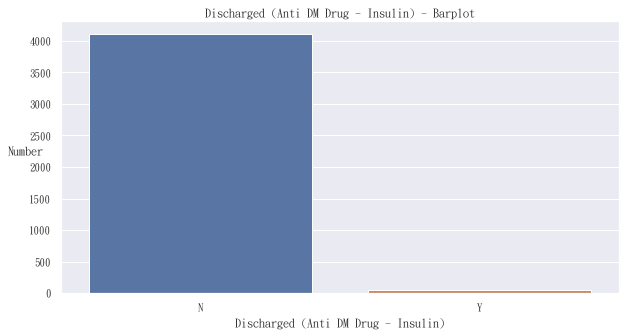

In [168]:
omins_fl = tsr_6.loc[:,"omins_fl"]
omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
omins_fl[om_fl == "Y"] = "N"
omins_fl = omins_fl.fillna(omins_fl.mode()[0])
#print(omins_fl)
print(omins_fl.value_counts() / len(omins_fl))
#print(omins_fl.describe())

sns.countplot(omins_fl)
plt.title("Discharged (Anti DM Drug - Insulin) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Insulin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug)

N    0.778367
Y    0.221633
Name: omli_fl, dtype: float64


<ipython-input-169-071867758434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
<ipython-input-169-071867758434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


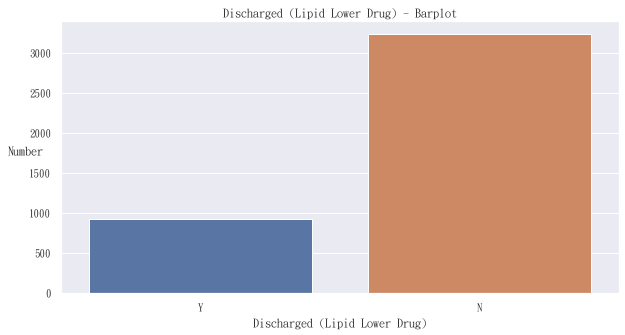

In [169]:
omli_fl = tsr_6.loc[:,"omli_fl"]
omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
omli_fl[om_fl == "Y"] = "N"
omli_fl = omli_fl.fillna(omli_fl.mode()[0])
#print(omli_fl)
print(omli_fl.value_counts() / len(omli_fl))
#print(omli_fl.describe())

sns.countplot(omli_fl)
plt.title("Discharged (Lipid Lower Drug) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug - Statin)

<ipython-input-170-1ae92a30f3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omst_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.960251
Y    0.039749
Name: omst_fl, dtype: float64


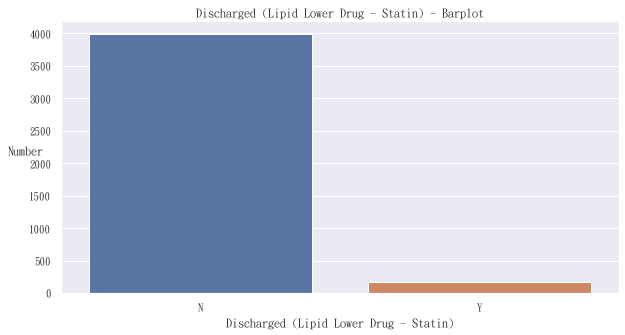

In [170]:
omst_fl = tsr_6.loc[:,"omst_fl"]
omst_fl[om_fl == "Y"] = "N"
omst_fl = omst_fl.fillna(omst_fl.mode()[0])
#print(omst_fl)
print(omst_fl.value_counts() / len(omst_fl))
#print(omst_fl.describe())

sns.countplot(omst_fl)
plt.title("Discharged (Lipid Lower Drug - Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug - Non-Statin)

N    0.996386
Y    0.003614
Name: omns_fl, dtype: float64


<ipython-input-171-883b97f0b8b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
<ipython-input-171-883b97f0b8b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


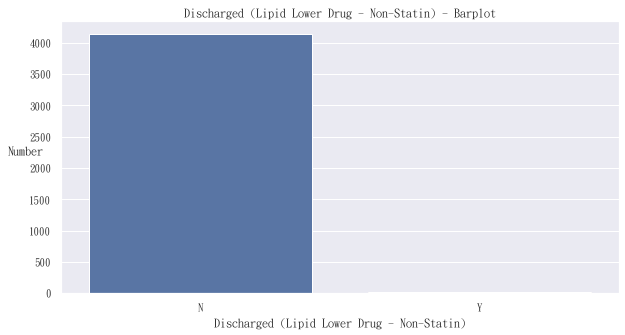

In [171]:
omns_fl = tsr_6.loc[:,"omns_fl"]
omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
omns_fl[om_fl == "Y"] = "N"
omns_fl = omns_fl.fillna(omns_fl.mode()[0])
#print(omns_fl)
print(omns_fl.value_counts() / len(omns_fl))
#print(omns_fl.describe())

sns.countplot(omns_fl)
plt.title("Discharged (Lipid Lower Drug - Non-Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Non-Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others)

N    0.98145
Y    0.01855
Name: omliot_fl, dtype: float64


<ipython-input-172-47b2b53893ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
<ipython-input-172-47b2b53893ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


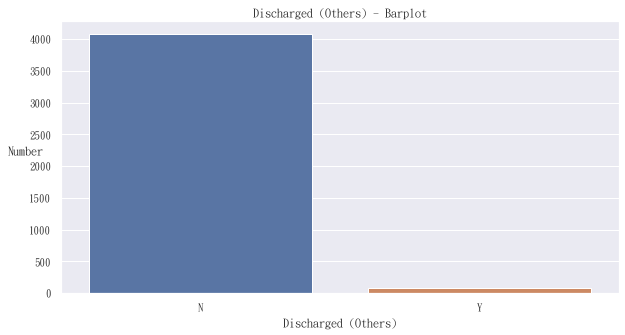

In [172]:
omliot_fl = tsr_6.loc[:,"omliot_fl"]
omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
omliot_fl[om_fl == "Y"] = "N"
omliot_fl = omliot_fl.fillna(omliot_fl.mode()[0])
#print(omliot_fl)
print(omliot_fl.value_counts() / len(omliot_fl))
#print(omliot_fl.describe())

sns.countplot(omliot_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others2)

N    0.996386
Y    0.003614
Name: omliot2_fl, dtype: float64


<ipython-input-173-4bacf29cd224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
<ipython-input-173-4bacf29cd224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


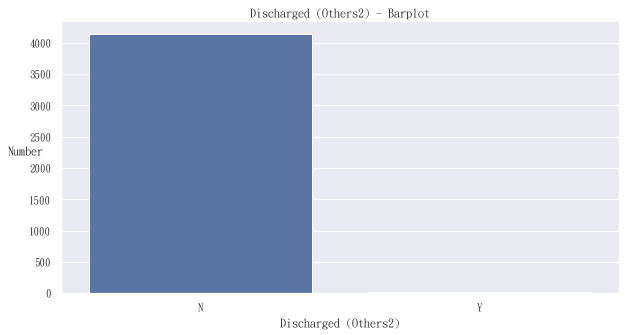

In [173]:
omliot2_fl = tsr_6.loc[:,"omliot2_fl"]
omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
omliot2_fl[om_fl == "Y"] = "N"
omliot2_fl = omliot2_fl.fillna(omliot2_fl.mode()[0])
#print(omliot2_fl)
print(omliot2_fl.value_counts() / len(omliot2_fl))
#print(omliot2_fl.describe())

sns.countplot(omliot2_fl)
plt.title("Discharged (Others2) - Barplot")
plt.xlabel('Discharged (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (有相關原因未使用抗血栓藥物)

N    0.998073
Y    0.001927
Name: omad_fl, dtype: float64


<ipython-input-174-a6d239be112d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
<ipython-input-174-a6d239be112d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


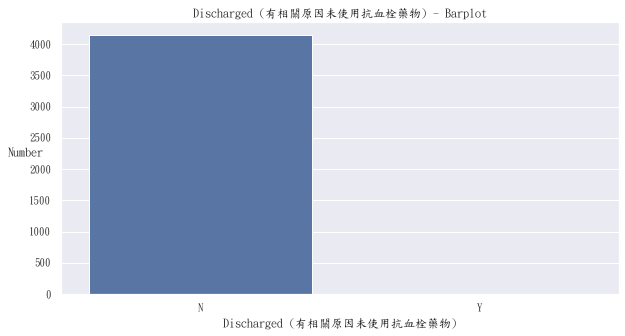

In [174]:
omad_fl = tsr_6.loc[:,"omad_fl"]
omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
omad_fl[om_fl == "Y"] = "N"
omad_fl = omad_fl.fillna(omad_fl.mode()[0])
#print(omad_fl)
print(omad_fl.value_counts() / len(omad_fl))
#print(omad_fl.describe())

sns.countplot(omad_fl)
plt.title("Discharged (有相關原因未使用抗血栓藥物) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (有相關原因未使用抗血栓藥物 Options)

1.0    0.001205
4.0    0.000241
2.0    0.000241
3.0    0.000241
Name: omad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


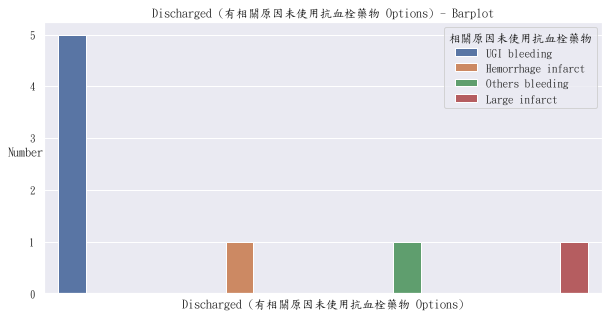

In [175]:
omad_id = tsr_6.loc[:,"omad_id"]
omad_id = pd.to_numeric(omad_id, errors = "coerce")
omad_id[(omad_id != 1) & (omad_id != 2) & (omad_id != 3) & (omad_id != 4) & (omad_id != 5) & (omad_id != 6)] = np.nan
omad_id = omad_id.fillna(omad_id.mode()[0])
omad_id[omad_fl == "N"] = np.nan
#print(omad_id)
print(omad_id.value_counts() / len(omad_id))
#print(omad_id.describe())

omad_id[omad_id == 1] = "UGI bleeding"
omad_id[omad_id == 2] = "Hemorrhage infarct"
omad_id[omad_id == 3] = "Others bleeding"
omad_id[omad_id == 4] = "Large infarct"
omad_id[omad_id == 5] = "Patient or family refuse"
omad_id[omad_id == 6] = "Critical AAD or Expired"

sns.countplot(omad_id, hue = omad_id)
plt.title("Discharged (有相關原因未使用抗血栓藥物 Options) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物 Options)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="相關原因未使用抗血栓藥物")
plt.show()

omad_id[omad_id == "UGI bleeding"] = 1
omad_id[omad_id == "Hemorrhage infarct"] = 2
omad_id[omad_id == "Others bleeding"] = 3
omad_id[omad_id == "Large infarct"] = 4
omad_id[omad_id == "Patient or family refuse"] = 5
omad_id[omad_id == "Critical AAD or Expired"] = 6
omad_id = omad_id.fillna(999)

# Before Admitted (None)

N    0.63286
Y    0.36714
Name: am_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


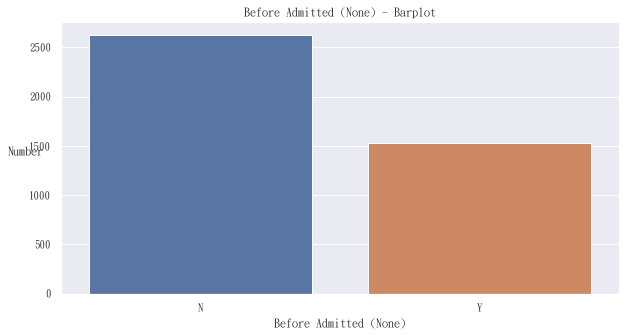

In [176]:
am_fl = tsr_6.loc[:,"am_fl"]
am_fl = am_fl.fillna(am_fl.mode()[0])
#print(am_fl)
print(am_fl.value_counts() / len(am_fl))
#print(am_fl.describe())

sns.countplot(am_fl)
plt.title("Before Admitted (None) - Barplot")
plt.xlabel('Before Admitted (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Aspirin)

N    0.822693
Y    0.177307
Name: amas_fl, dtype: float64


<ipython-input-177-81796d664095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
<ipython-input-177-81796d664095>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


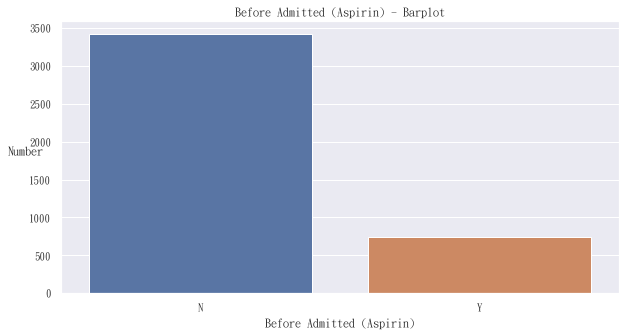

In [177]:
amas_fl = tsr_6.loc[:,"amas_fl"]
amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
amas_fl[am_fl == "Y"] = "N"
amas_fl = amas_fl.fillna(amas_fl.mode()[0])
#print(amas_fl)
print(amas_fl.value_counts() / len(amas_fl))
#print(amas_fl.describe())

sns.countplot(amas_fl)
plt.title("Before Admitted (Aspirin) - Barplot")
plt.xlabel('Before Admitted (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Aggrenox)

N    0.997591
Y    0.002409
Name: amag_fl, dtype: float64


<ipython-input-178-4c43a9fd68da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[amag_fl == '0'] = "N"
<ipython-input-178-4c43a9fd68da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


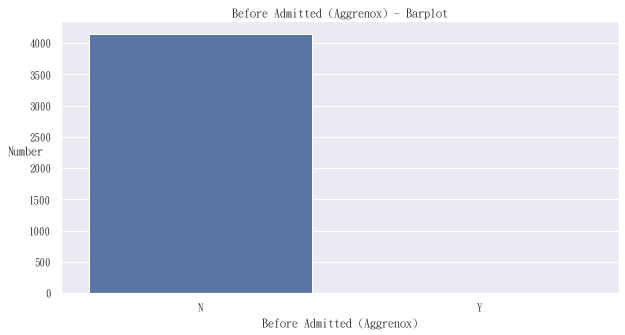

In [178]:
amag_fl = tsr_6.loc[:,"amag_fl"]
amag_fl[amag_fl == '0'] = "N"
amag_fl[am_fl == "Y"] = "N"
amag_fl = amag_fl.fillna(amag_fl.mode()[0])
#print(amag_fl)
print(amag_fl.value_counts() / len(amag_fl))
#print(amag_fl.describe())

sns.countplot(amag_fl)
plt.title("Before Admitted (Aggrenox) - Barplot")
plt.xlabel('Before Admitted (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Ticlopidine)

<ipython-input-179-543b40bb7dba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[am_fl == "Y"] = "N"
<ipython-input-179-543b40bb7dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.99735
Y    0.00265
Name: amti_fl, dtype: float64


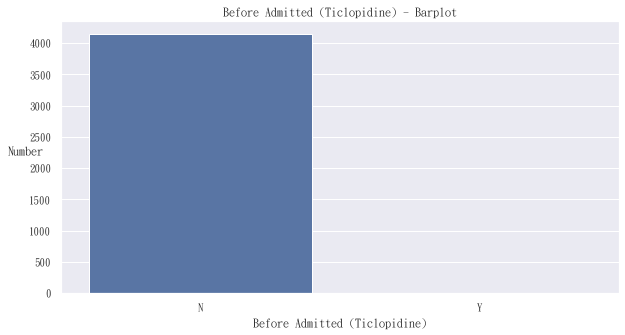

In [179]:
amti_fl = tsr_6.loc[:,"amti_fl"]
amti_fl[am_fl == "Y"] = "N"
amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
amti_fl = amti_fl.fillna(amti_fl.mode()[0])
#print(amti_fl)
print(amti_fl.value_counts() / len(amti_fl))
#print(amti_fl.describe())

sns.countplot(amti_fl)
plt.title("Before Admitted (Ticlopidine) - Barplot")
plt.xlabel('Before Admitted (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Clopidogrel)

N    0.957119
Y    0.042881
Name: amcl_fl, dtype: float64


<ipython-input-180-d7eb4d79a9f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[amcl_fl == "0"] = "N"
<ipython-input-180-d7eb4d79a9f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[am_fl == "Y"] = "N"
<ipython-input-180-d7eb4d79a9f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

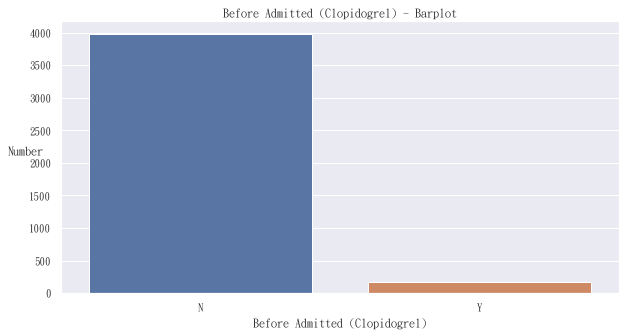

In [180]:
amcl_fl = tsr_6.loc[:,"amcl_fl"]
amcl_fl[amcl_fl == "0"] = "N"
amcl_fl[am_fl == "Y"] = "N"
amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
amcl_fl = amcl_fl.fillna(amcl_fl.mode()[0])
#print(amcl_fl)
print(amcl_fl.value_counts() / len(amcl_fl))
#print(amcl_fl.describe())

sns.countplot(amcl_fl)
plt.title("Before Admitted (Clopidogrel) - Barplot")
plt.xlabel('Before Admitted (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Pletaal)

N    0.993014
Y    0.006986
Name: ampl_fl, dtype: float64


<ipython-input-181-e7d447c90fab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
<ipython-input-181-e7d447c90fab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


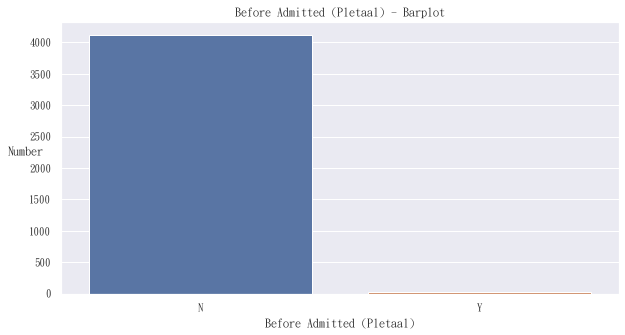

In [181]:
ampl_fl = tsr_6.loc[:,"ampl_fl"]
ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
ampl_fl[am_fl == "Y"] = "N"
ampl_fl = ampl_fl.fillna(ampl_fl.mode()[0])
#print(ampl_fl)
print(ampl_fl.value_counts() / len(ampl_fl))
#print(ampl_fl.describe())

sns.countplot(ampl_fl)
plt.title("Before Admitted (Pletaal) - Barplot")
plt.xlabel('Before Admitted (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Anti H/T Drug)

N    0.509516
Y    0.490484
Name: amanh_fl, dtype: float64


<ipython-input-182-3435da520694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
<ipython-input-182-3435da520694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


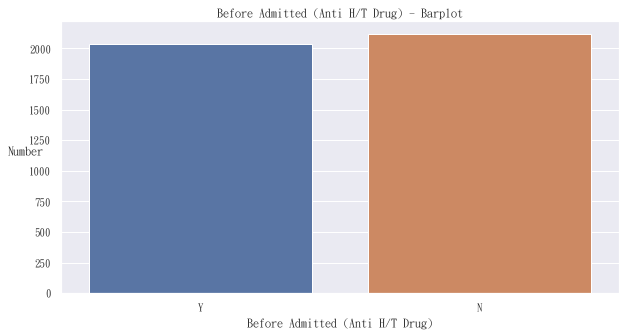

In [182]:
amanh_fl = tsr_6.loc[:,"amanh_fl"]
amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
amanh_fl[am_fl == "Y"] = "N"
amanh_fl = amanh_fl.fillna(amanh_fl.mode()[0])
#print(amanh_fl)
print(amanh_fl.value_counts() / len(amanh_fl))
#print(amanh_fl.describe())

sns.countplot(amanh_fl)
plt.title("Before Admitted (Anti H/T Drug) - Barplot")
plt.xlabel('Before Admitted (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Wafirin)

N    0.965791
Y    0.034209
Name: amwa_fl, dtype: float64


<ipython-input-183-f5b60ffb29c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amwa_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


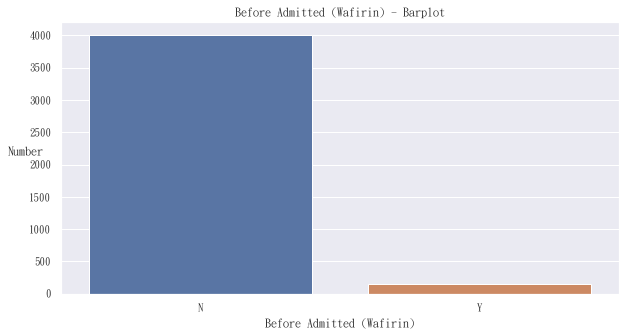

In [183]:
amwa_fl = tsr_6.loc[:,"amwa_fl"]
amwa_fl[am_fl == "Y"] = "N"
amwa_fl = amwa_fl.fillna(amwa_fl.mode()[0])
#print(amwa_fl)
print(amwa_fl.value_counts() / len(amwa_fl))
#print(amwa_fl.describe())

sns.countplot(amwa_fl)
plt.title("Before Admitted (Wafirin) - Barplot")
plt.xlabel('Before Admitted (Wafirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Anti DM Drug)

N    0.757167
Y    0.242833
Name: amand_fl, dtype: float64


<ipython-input-184-5eaea203cb82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amand_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


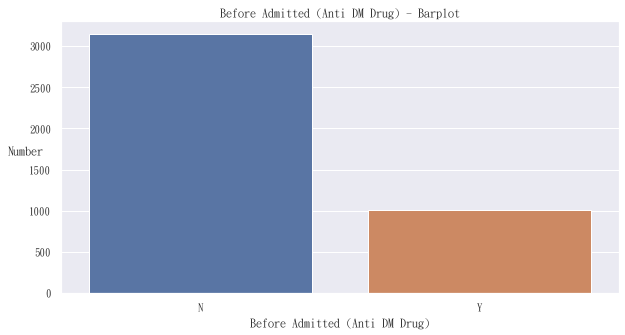

In [184]:
amand_fl = tsr_6.loc[:,"amand_fl"]
amand_fl[am_fl == "Y"] = "N"
amand_fl = amand_fl.fillna(amand_fl.mode()[0])
#print(amand_fl)
print(amand_fl.value_counts() / len(amand_fl))
#print(amand_fl.describe())

sns.countplot(amand_fl)
plt.title("Before Admitted (Anti DM Drug) - Barplot")
plt.xlabel('Before Admitted (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Lipid Lowering Drug)

N    0.916406
Y    0.083594
Name: amli_fl, dtype: float64


<ipython-input-185-963c22e12e97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amli_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


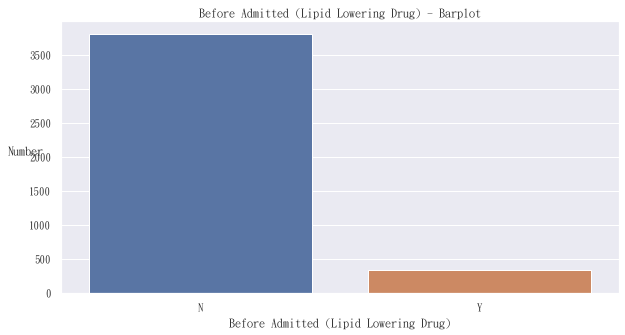

In [185]:
amli_fl = tsr_6.loc[:,"amli_fl"]
amli_fl[am_fl == "Y"] = "N"
amli_fl = amli_fl.fillna(amli_fl.mode()[0])
#print(amli_fl)
print(amli_fl.value_counts() / len(amli_fl))
#print(amli_fl.describe())

sns.countplot(amli_fl)
plt.title("Before Admitted (Lipid Lowering Drug) - Barplot")
plt.xlabel('Before Admitted (Lipid Lowering Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Others)

N    0.985305
Y    0.014695
Name: amliot_fl, dtype: float64


<ipython-input-186-43b5bc318549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


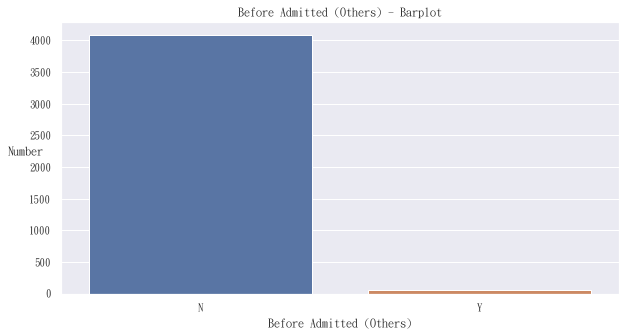

In [186]:
amliot_fl = tsr_6.loc[:,"amliot_fl"]
amliot_fl[am_fl == "Y"] = "N"
amliot_fl = amliot_fl.fillna(amliot_fl.mode()[0])
#print(amliot_fl)
print(amliot_fl.value_counts() / len(amliot_fl))
#print(amliot_fl.describe())

sns.countplot(amliot_fl)
plt.title("Before Admitted (Others) - Barplot")
plt.xlabel('Before Admitted (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Others2)

N    0.999759
Y    0.000241
Name: amliot2_fl, dtype: float64


<ipython-input-187-8213b219331b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[amliot2_fl == str(0)] = "N"
<ipython-input-187-8213b219331b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


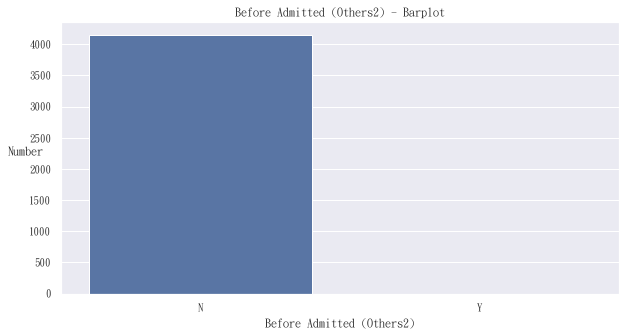

In [187]:
amliot2_fl = tsr_6.loc[:,"amliot2_fl"]
amliot2_fl[amliot2_fl == str(0)] = "N"
amliot2_fl[am_fl == "Y"] = "N"
amliot2_fl = amliot2_fl.fillna(amliot2_fl.mode()[0])
#print(amliot2_fl)
print(amliot2_fl.value_counts() / len(amliot2_fl))
#print(amliot2_fl.describe())

sns.countplot(amliot2_fl)
plt.title("Before Admitted (Others2) - Barplot")
plt.xlabel('Before Admitted (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (None)

N    0.999277
Y    0.000723
Name: com_id, dtype: float64


<ipython-input-188-9398b365b738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_id[com_id == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


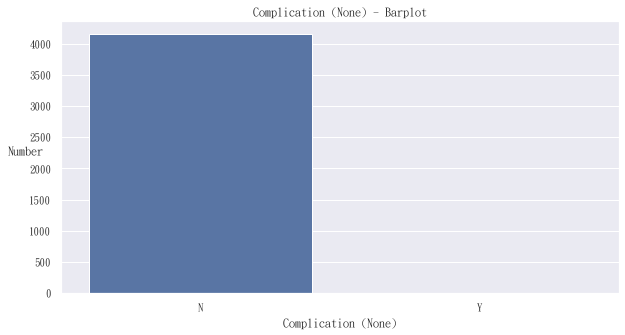

In [188]:
com_id = tsr_6.loc[:,"com_id"]
com_id[com_id == '0'] = "N"
com_id = com_id.fillna(com_id.mode()[0])
#print(com_id)
print(com_id.value_counts() / len(com_id))
#print(com_id.describe())

sns.countplot(com_id)
plt.title("Complication (None) - Barplot")
plt.xlabel('Complication (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pneumonia)

N    0.984823
Y    0.015177
Name: compn_fl, dtype: float64


<ipython-input-189-ad756de5c8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[compn_fl == str(0)] = "N"
<ipython-input-189-ad756de5c8aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


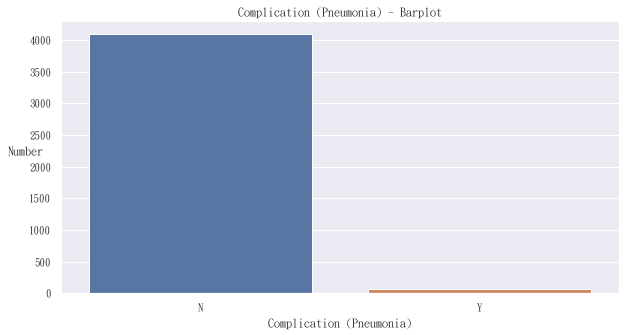

In [189]:
compn_fl = tsr_6.loc[:,"compn_fl"]
compn_fl[compn_fl == str(0)] = "N"
compn_fl[com_id == "Y"] = "N"
compn_fl = compn_fl.fillna(compn_fl.mode()[0])
#print(compn_fl)
print(compn_fl.value_counts() / len(compn_fl))
#print(compn_fl.describe())

sns.countplot(compn_fl)
plt.title("Complication (Pneumonia) - Barplot")
plt.xlabel('Complication (Pneumonia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Urinary Tract Infection)

N    0.984582
Y    0.015418
Name: comut_fl, dtype: float64


<ipython-input-190-40082e247f77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comut_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


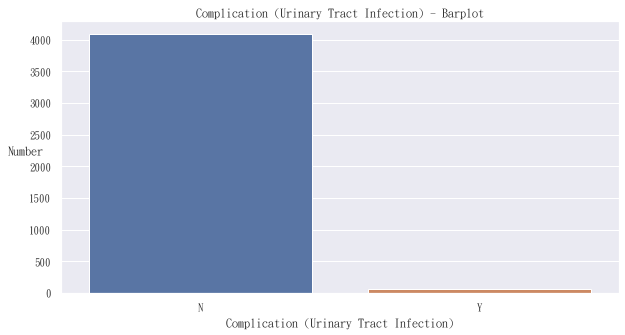

In [190]:
comut_fl = tsr_6.loc[:,"comut_fl"]
comut_fl[com_id == "Y"] = "N"
comut_fl = comut_fl.fillna(comut_fl.mode()[0])
#print(comut_fl)
print(comut_fl.value_counts() / len(comut_fl))
#print(comut_fl.describe())

sns.countplot(comut_fl)
plt.title("Complication (Urinary Tract Infection) - Barplot")
plt.xlabel('Complication (Urinary Tract Infection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (UGI Bleeding)

N    0.990846
Y    0.009154
Name: comug_fl, dtype: float64


<ipython-input-191-849ad345bb96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comug_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


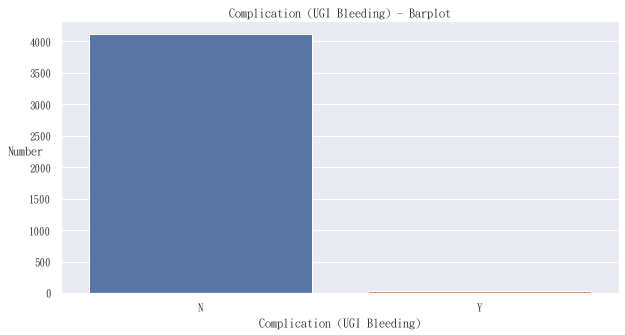

In [191]:
comug_fl = tsr_6.loc[:,"comug_fl"]
comug_fl[com_id == "Y"] = "N"
comug_fl = comug_fl.fillna(comug_fl.mode()[0])
#print(comug_fl)
print(comug_fl.value_counts() / len(comug_fl))
#print(comug_fl.describe())

sns.countplot(comug_fl)
plt.title("Complication (UGI Bleeding) - Barplot")
plt.xlabel('Complication (UGI Bleeding)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pressure Sore)

N    0.989159
Y    0.010841
Name: compr_fl, dtype: float64


<ipython-input-192-2b05869f5ff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compr_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


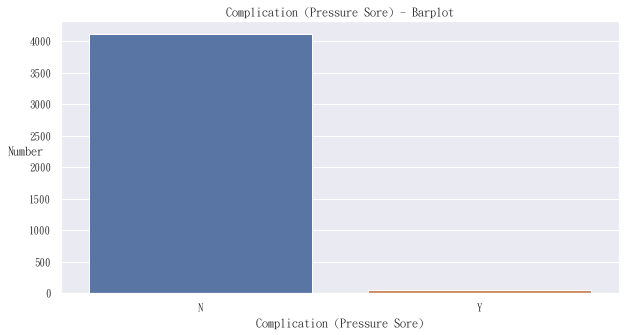

In [192]:
compr_fl = tsr_6.loc[:,"compr_fl"]
compr_fl[com_id == "Y"] = "N"
compr_fl = compr_fl.fillna(compr_fl.mode()[0])
#print(compr_fl)
print(compr_fl.value_counts() / len(compr_fl))
#print(compr_fl.describe())

sns.countplot(compr_fl)
plt.title("Complication (Pressure Sore) - Barplot")
plt.xlabel('Complication (Pressure Sore)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pulmonary Edema)

N    0.999518
Y    0.000482
Name: compu_fl, dtype: float64


<ipython-input-193-4ee28b7a1962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[compu_fl == str(0)] = "N"
<ipython-input-193-4ee28b7a1962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


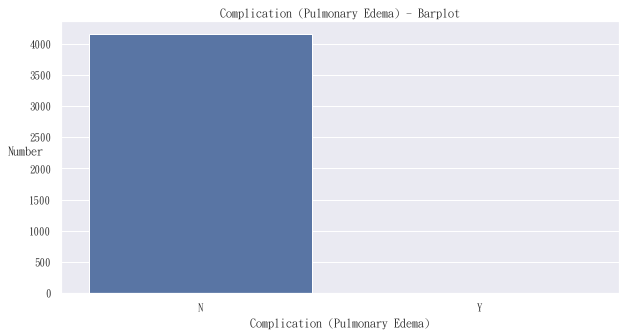

In [193]:
compu_fl = tsr_6.loc[:,"compu_fl"]
compu_fl[compu_fl == str(0)] = "N"
compu_fl[com_id == "Y"] = "N"
compu_fl = compu_fl.fillna(compu_fl.mode()[0])
#print(compu_fl)
print(compu_fl.value_counts() / len(compu_fl))
#print(compu_fl.describe())

sns.countplot(compu_fl)
plt.title("Complication (Pulmonary Edema) - Barplot")
plt.xlabel('Complication (Pulmonary Edema)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Acute Coronary Syndrome)

N    0.998555
Y    0.001445
Name: comac_fl, dtype: float64


<ipython-input-194-0f647fbeb615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comac_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


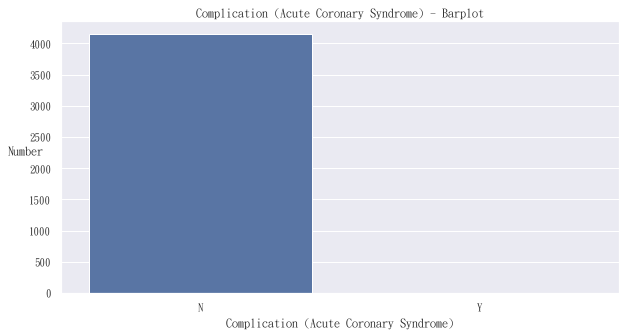

In [194]:
comac_fl = tsr_6.loc[:,"comac_fl"]
comac_fl[com_id == "Y"] = "N"
comac_fl = comac_fl.fillna(comac_fl.mode()[0])
#print(comac_fl)
print(comac_fl.value_counts() / len(comac_fl))
#print(comac_fl.describe())

sns.countplot(comac_fl)
plt.title("Complication (Acute Coronary Syndrome) - Barplot")
plt.xlabel('Complication (Acute Coronary Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Seizure)

N    0.997591
Y    0.002409
Name: comse_fl, dtype: float64


<ipython-input-195-f8abbdf84dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
<ipython-input-195-f8abbdf84dcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


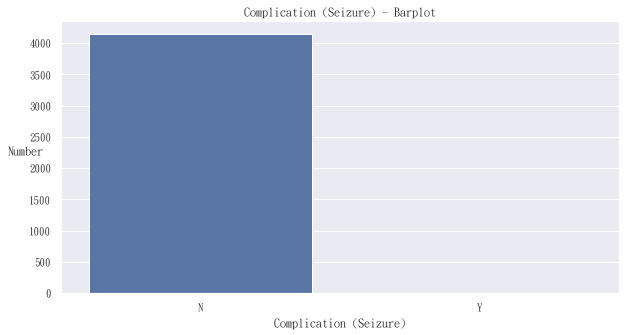

In [195]:
comse_fl = tsr_6.loc[:,"comse_fl"]
comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
comse_fl[com_id == "Y"] = "N"
comse_fl = comse_fl.fillna(comse_fl.mode()[0])
#print(comse_fl)
print(comse_fl.value_counts() / len(comse_fl))
#print(comse_fl.describe())

sns.countplot(comse_fl)
plt.title("Complication (Seizure) - Barplot")
plt.xlabel('Complication (Seizure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Deep Vein Thrombosis)

N    0.998314
Y    0.001686
Name: comde_fl, dtype: float64


<ipython-input-196-f5dfc4a3a324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
<ipython-input-196-f5dfc4a3a324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


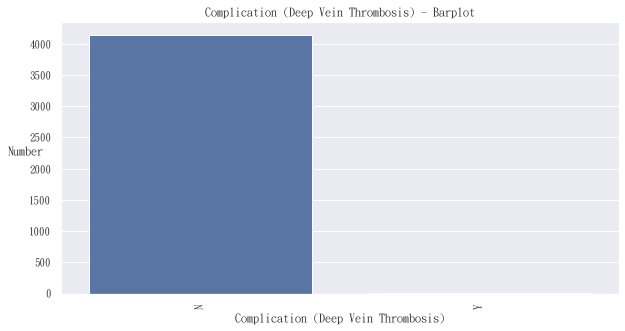

In [196]:
comde_fl = tsr_6.loc[:,"comde_fl"]
comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
comde_fl[com_id == "Y"] = "N"
comde_fl = comde_fl.fillna(comde_fl.mode()[0])
#print(comde_fl)
print(comde_fl.value_counts() / len(comde_fl))
#print(comde_fl.describe())

sns.countplot(comde_fl)
plt.title("Complication (Deep Vein Thrombosis) - Barplot")
plt.xlabel('Complication (Deep Vein Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.xticks(rotation = 90)
plt.show()

# Complication (Others)

N    0.9682
Y    0.0318
Name: como_fl, dtype: float64


<ipython-input-197-59fc69f31272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
<ipython-input-197-59fc69f31272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


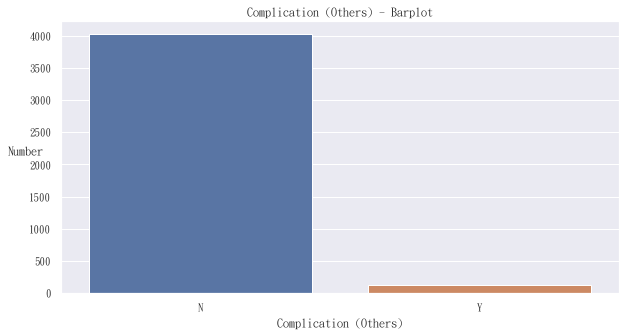

In [197]:
como_fl = tsr_6.loc[:,"como_fl"]
como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
como_fl[com_id == "Y"] = "N"
como_fl = como_fl.fillna(como_fl.mode()[0])
#print(como_fl)
print(como_fl.value_counts() / len(como_fl))
#print(como_fl.describe())

sns.countplot(como_fl)
plt.title("Complication (Others) - Barplot")
plt.xlabel('Complication (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (None)

N    0.998555
Y    0.001445
Name: det_id, dtype: float64


<ipython-input-198-8b8402d50f1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[det_id == '0'] = "N"
<ipython-input-198-8b8402d50f1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[(det_id != "N") & (det_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


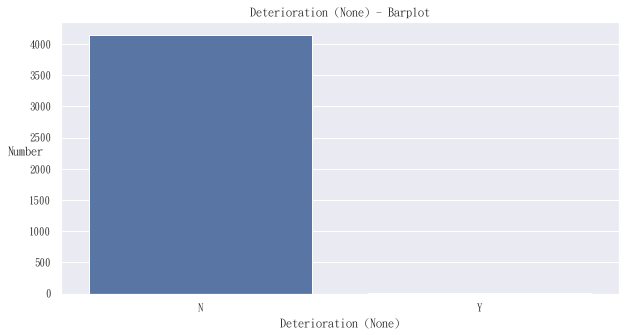

In [198]:
det_id = tsr_6.loc[:,"det_id"]
det_id[det_id == '0'] = "N"
det_id[(det_id != "N") & (det_id != "Y")] = np.nan
det_id = det_id.fillna(det_id.mode()[0])
#print(det_id)
print(det_id.value_counts() / len(det_id))
#print(det_id.describe())

sns.countplot(det_id)
plt.title("Deterioration (None) - Barplot")
plt.xlabel('Deterioration (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Stroke-in-evolution - NIHSS≧2)

N    0.952542
Y    0.047458
Name: detst_fl, dtype: float64


<ipython-input-199-79154bda0d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detst_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


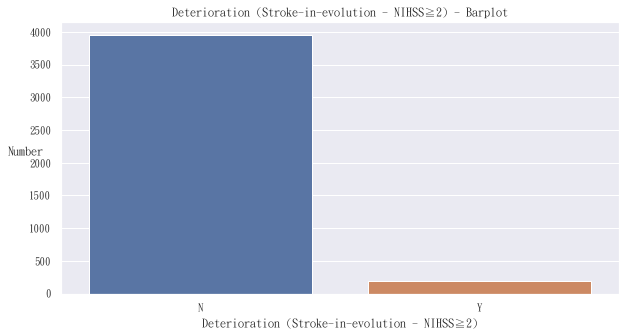

In [199]:
detst_fl = tsr_6.loc[:,"detst_fl"]
detst_fl[det_id == "Y"] = "N"
detst_fl = detst_fl.fillna(detst_fl.mode()[0])
#print(detst_fl)
print(detst_fl.value_counts() / len(detst_fl))
#print(detst_fl.describe())

sns.countplot(detst_fl)
plt.title("Deterioration (Stroke-in-evolution - NIHSS≧2) - Barplot")
plt.xlabel('Deterioration (Stroke-in-evolution - NIHSS≧2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Herniation)

<ipython-input-200-b6913c314200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[dethe_fl == str(0)] = "N"
<ipython-input-200-b6913c314200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996146
Y    0.003854
Name: dethe_fl, dtype: float64


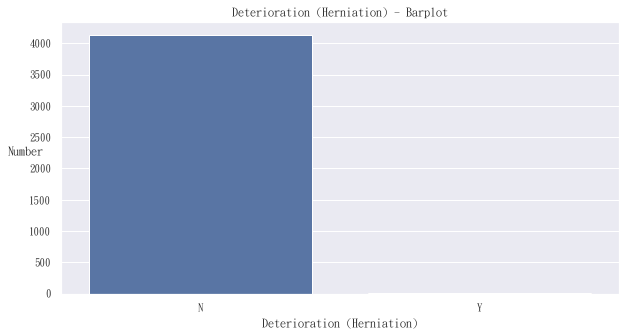

In [200]:
dethe_fl = tsr_6.loc[:,"dethe_fl"]
dethe_fl[dethe_fl == str(0)] = "N"
dethe_fl[det_id == "Y"] = "N"
dethe_fl = dethe_fl.fillna(dethe_fl.mode()[0])
#print(dethe_fl)
print(dethe_fl.value_counts() / len(dethe_fl))
#print(dethe_fl.describe())

sns.countplot(dethe_fl)
plt.title("Deterioration (Herniation) - Barplot")
plt.xlabel('Deterioration (Herniation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct)

N    0.991568
Y    0.008432
Name: detho_fl, dtype: float64


<ipython-input-201-a95997ecb261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detho_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


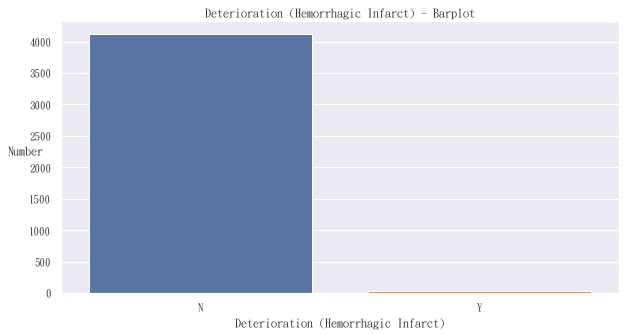

In [201]:
detho_fl = tsr_6.loc[:,"detho_fl"]
detho_fl[det_id == "Y"] = "N"
detho_fl = detho_fl.fillna(detho_fl.mode()[0])
#print(detho_fl)
print(detho_fl.value_counts() / len(detho_fl))
#print(detho_fl.describe())

sns.countplot(detho_fl)
plt.title("Deterioration (Hemorrhagic Infarct) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct 36hrs)

N    1.0
Name: dethoh_fl, dtype: float64


<ipython-input-202-6d4cdd9963c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
<ipython-input-202-6d4cdd9963c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


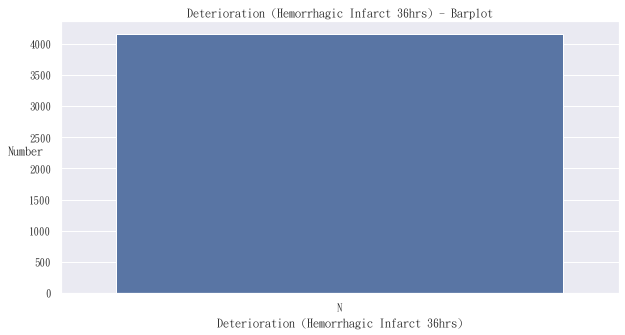

In [202]:
dethoh_fl = tsr_6.loc[:,"dethoh_fl"]
dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
dethoh_fl[det_id == "Y"] = "N"
dethoh_fl = dethoh_fl.fillna(dethoh_fl.mode()[0])
#print(dethoh_fl)
print(dethoh_fl.value_counts() / len(dethoh_fl))
#print(dethoh_fl.describe())

sns.countplot(dethoh_fl)
plt.title("Deterioration (Hemorrhagic Infarct 36hrs) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct 36hrs)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hematoma Enlargement - ICH)

N    0.989641
Y    0.010359
Name: detha_fl, dtype: float64


<ipython-input-203-120c85307436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
<ipython-input-203-120c85307436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


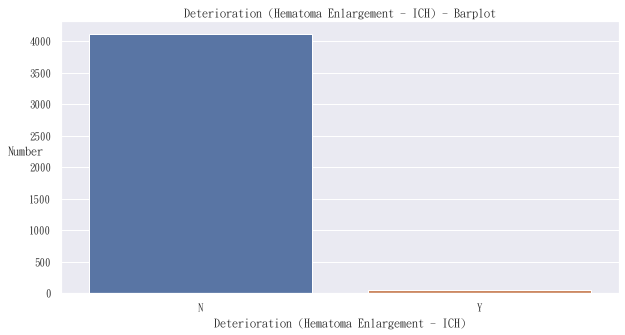

In [203]:
detha_fl = tsr_6.loc[:,"detha_fl"]
detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
detha_fl[det_id == "Y"] = "N"
detha_fl = detha_fl.fillna(detha_fl.mode()[0])
#print(detha_fl)
print(detha_fl.value_counts() / len(detha_fl))
#print(detha_fl.describe())

sns.countplot(detha_fl)
plt.title("Deterioration (Hematoma Enlargement - ICH) - Barplot")
plt.xlabel('Deterioration (Hematoma Enlargement - ICH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Vasospasm - SAH)

N    0.996146
Y    0.003854
Name: detva_fl, dtype: float64


<ipython-input-204-90df3e23e100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detva_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


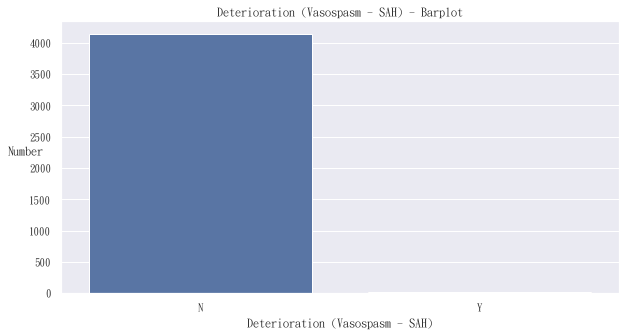

In [204]:
detva_fl = tsr_6.loc[:,"detva_fl"]
detva_fl[det_id == "Y"] = "N"
detva_fl = detva_fl.fillna(detva_fl.mode()[0])
#print(detva_fl)
print(detva_fl.value_counts() / len(detva_fl))
#print(detva_fl.describe())

sns.countplot(detva_fl)
plt.title("Deterioration (Vasospasm - SAH) - Barplot")
plt.xlabel('Deterioration (Vasospasm - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Re-bleeding - SAH)

N    0.999518
Y    0.000482
Name: detre_fl, dtype: float64


<ipython-input-205-f85dbf4972c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
<ipython-input-205-f85dbf4972c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


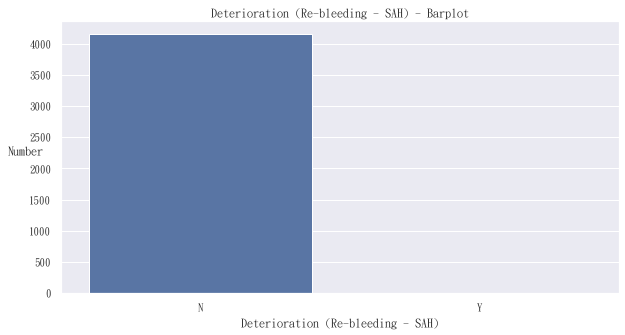

In [205]:
detre_fl = tsr_6.loc[:,"detre_fl"]
detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
detre_fl[det_id == "Y"] = "N"
detre_fl = detre_fl.fillna(detre_fl.mode()[0])
#print(detre_fl)
print(detre_fl.value_counts() / len(detre_fl))
#print(detre_fl.describe())

sns.countplot(detre_fl)
plt.title("Deterioration (Re-bleeding - SAH) - Barplot")
plt.xlabel('Deterioration (Re-bleeding - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Medical Problems)

N    0.995664
Y    0.004336
Name: detme_fl, dtype: float64


<ipython-input-206-1857f71a07a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
<ipython-input-206-1857f71a07a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


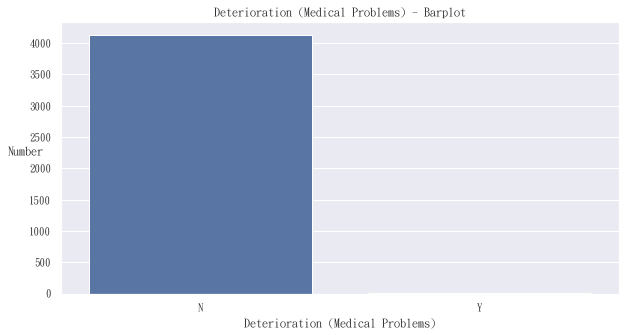

In [206]:
detme_fl = tsr_6.loc[:,"detme_fl"]
detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
detme_fl[det_id == "Y"] = "N"
detme_fl = detme_fl.fillna(detme_fl.mode()[0])
#print(detme_fl)
print(detme_fl.value_counts() / len(detme_fl))
#print(detme_fl.describe())

sns.countplot(detme_fl)
plt.title("Deterioration (Medical Problems) - Barplot")
plt.xlabel('Deterioration (Medical Problems)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Others)

N    0.996868
Y    0.003132
Name: deto_fl, dtype: float64


<ipython-input-207-fce0dedc3e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(0)] = "N"
<ipython-input-207-fce0dedc3e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(1)] = "Y"
<ipython-input-207-fce0dedc3e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
<ipython-input-207-fce0dedc3e40>:5: SettingWithCopyWarning: 
A value is t

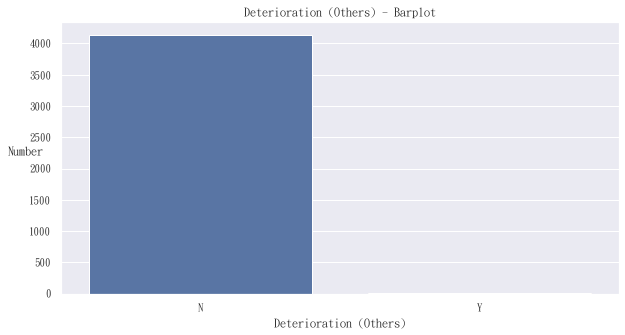

In [207]:
deto_fl = tsr_6.loc[:,"deto_fl"]
deto_fl[deto_fl == str(0)] = "N"
deto_fl[deto_fl == str(1)] = "Y"
deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
deto_fl[det_id == "Y"] = "N"
deto_fl = deto_fl.fillna(deto_fl.mode()[0])
#print(deto_fl)
print(deto_fl.value_counts() / len(deto_fl))
#print(deto_fl.describe())

sns.countplot(deto_fl)
plt.title("Deterioration (Others) - Barplot")
plt.xlabel('Deterioration (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# CT日期

<ipython-input-208-0c095060e00f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan
<ipython-input-208-0c095060e00f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
<ipython-input-208-0c095060e00f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][ct_time[

count                    4151
unique                   3832
top       2009-01-24 13:29:00
freq                      244
first     2006-08-01 01:11:00
last      2019-07-16 09:27:00
dtype: object


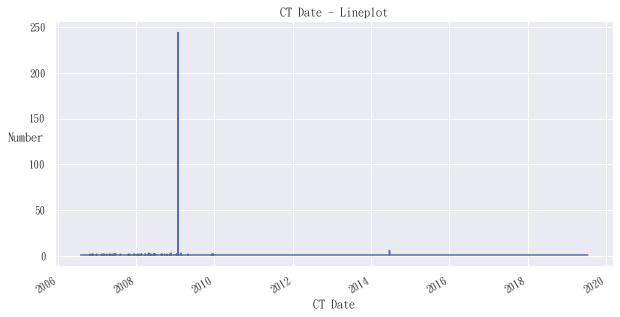

In [208]:
ct_time = tsr_6.loc[:,["ct_dt", "cth_nm", "ctm_nm"]]
ct_time.ct_dt = pd.to_datetime(ct_time.ct_dt, errors = "coerce", format = "%Y-%m-%d")
ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan

ct_time['cth_nm'] = pd.to_numeric(ct_time['cth_nm'], errors='coerce')
ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
ct_time['cth_nm'][ct_time['cth_nm'] == 24] = 0
ct_time['ctm_nm'] = pd.to_numeric(ct_time['ctm_nm'], errors='coerce')
ct_time['ctm_nm'][(ct_time['ctm_nm'] < 0) | (ct_time['ctm_nm'] > 60)] = np.nan
ct_time['ctm_nm'][ct_time['ctm_nm'] == 60] = 0

ct_time['ct_dt'] = ct_time['ct_dt'].fillna(ct_time['ct_dt'].mode()[0])
ct_time['cth_nm'] = ct_time['cth_nm'].fillna(ct_time['cth_nm'].mean())
ct_time['ctm_nm'] = ct_time['ctm_nm'].fillna(ct_time['ctm_nm'].mean())

ct = ct_time['ct_dt'].astype(str)+' '+ct_time['cth_nm'].astype(int).map(str)+':'+ct_time['ctm_nm'].astype(int).map(str)

ct_dt = pd.to_datetime(ct, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ct_dt.value_counts() / len(ct_dt))
print(ct_dt.describe())

ct_dt.value_counts().plot()
plt.title("CT Date - Lineplot")
plt.xlabel('CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# CT時間 - 時

In [209]:
cth_nm = tsr_6.loc[:,"cth_nm"]
cth_nm = pd.to_numeric(cth_nm, errors = "coerce")
cth_nm[(cth_nm < 0) | (cth_nm > 24)] = np.nan
cth_nm[cth_nm == 24] = 0
cth_nm = cth_nm.fillna(cth_nm.mean())
#print(cth_nm)
#print(cth_nm.value_counts() / len(cth_nm))
print(cth_nm.describe())

count    4151.000000
mean       13.800789
std         5.385884
min         0.000000
25%        11.000000
50%        13.800789
75%        18.000000
max        23.000000
Name: cth_nm, dtype: float64


# CT時間 - 分

In [210]:
ctm_nm = tsr_6.loc[:,"ctm_nm"]
ctm_nm = pd.to_numeric(ctm_nm, errors = "coerce")
ctm_nm[(ctm_nm < 0) | (ctm_nm > 60)] = np.nan
ctm_nm[ctm_nm == 60] = 0
ctm_nm = ctm_nm.fillna(ctm_nm.mean())
#print(ctm_nm)
#print(ctm_nm.value_counts() / len(ctm_nm))
print(ctm_nm.describe())

count    4151.000000
mean       29.862098
std        15.956342
min         0.000000
25%        18.000000
50%        29.862098
75%        42.000000
max        59.000000
Name: ctm_nm, dtype: float64


# CT no Findings

N    0.802216
Y    0.197784
Name: ct_fl, dtype: float64


<ipython-input-211-0fcdefddd8be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


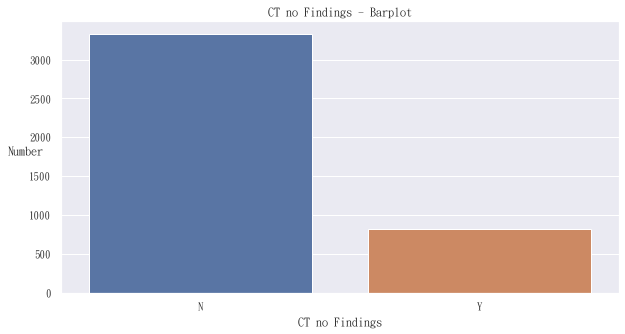

In [211]:
ct_fl = tsr_6.loc[:,"ct_fl"]
ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
ct_fl = ct_fl.fillna(ct_fl.mode()[0])
#print(ct_fl)
print(ct_fl.value_counts() / len(ct_fl))
#print(ct_fl.describe())

sns.countplot(ct_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI日期

count                    4151
unique                   2052
top       2008-07-21 13:28:00
freq                     2072
first     2006-08-02 15:24:00
last      2019-05-24 20:07:00
dtype: object


<ipython-input-212-2fec319530df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan
<ipython-input-212-2fec319530df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
<ipython-input-212-2fec319530df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih

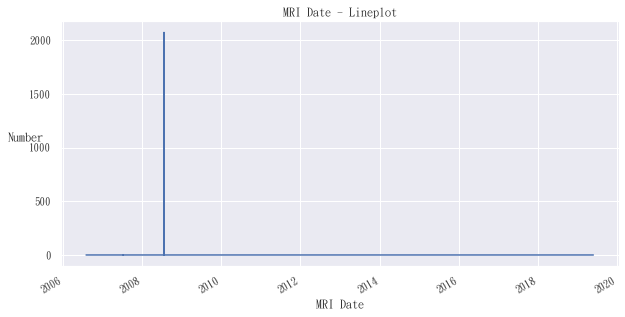

In [212]:
mri_time = tsr_6.loc[:,["mri_dt", "mrih_nm", "mrim_nm"]]
mri_time.mri_dt = pd.to_datetime(mri_time.mri_dt, errors = "coerce", format = "%Y-%m-%d")
mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan

mri_time['mrih_nm'] = pd.to_numeric(mri_time['mrih_nm'], errors='coerce')
mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
mri_time['mrih_nm'][mri_time['mrih_nm'] == 24] = 0
mri_time['mrim_nm'] = pd.to_numeric(mri_time['mrim_nm'], errors='coerce')
mri_time['mrim_nm'][(mri_time['mrim_nm'] < 0) | (mri_time['mrim_nm'] > 60)] = np.nan
mri_time['mrim_nm'][mri_time['mrim_nm'] == 60] = 0

mri_time['mri_dt'] = mri_time['mri_dt'].fillna(mri_time['mri_dt'].mode()[0])
mri_time['mrih_nm'] = mri_time['mrih_nm'].fillna(mri_time['mrih_nm'].mean())
mri_time['mrim_nm'] = mri_time['mrim_nm'].fillna(mri_time['mrim_nm'].mean())

mri = mri_time['mri_dt'].astype(str)+' '+mri_time['mrih_nm'].astype(int).map(str)+':'+mri_time['mrim_nm'].astype(int).map(str)

mri_dt = pd.to_datetime(mri, format='%Y/%m/%d %H:%M', errors='coerce')
#print(mri_dt.value_counts() / len(mri_dt))
print(mri_dt.describe())

mri_dt.value_counts().plot()
plt.title("MRI Date - Lineplot")
plt.xlabel('MRI Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# MRI時間 - 時

In [213]:
mrih_nm = tsr_6.loc[:,"mrih_nm"]
mrih_nm = pd.to_numeric(mrih_nm, errors = "coerce")
mrih_nm[(mrih_nm < 0) | (mrih_nm > 24)] = np.nan
mrih_nm[mrih_nm == 24] = 0
mrih_nm = mrih_nm.fillna(mrih_nm.mean())
#print(mrih_nm)
#print(mrih_nm.value_counts() / len(mrih_nm))
print(mrih_nm.describe())

count    4151.000000
mean       13.168297
std         2.555132
min         0.000000
25%        13.000000
50%        13.168297
75%        13.168297
max        23.000000
Name: mrih_nm, dtype: float64


# MRI時間 - 分

In [214]:
mrim_nm = tsr_6.loc[:,"mrim_nm"]
mrim_nm = pd.to_numeric(mrim_nm, errors = "coerce")
mrim_nm[(mrim_nm < 0) | (mrim_nm > 60)] = np.nan
mrim_nm[mrim_nm == 60] = 0
mrim_nm = mrim_nm.fillna(mrim_nm.mean())
#print(mrim_nm)
#print(mrim_nm.value_counts() / len(mrim_nm))
print(mrim_nm.describe())

count    4151.000000
mean       28.240318
std        11.890907
min         0.000000
25%        28.000000
50%        28.240318
75%        28.240318
max        59.000000
Name: mrim_nm, dtype: float64


# MRI no Findings

N    0.995423
Y    0.004577
Name: mri_fl, dtype: float64


<ipython-input-215-505663a3d7ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


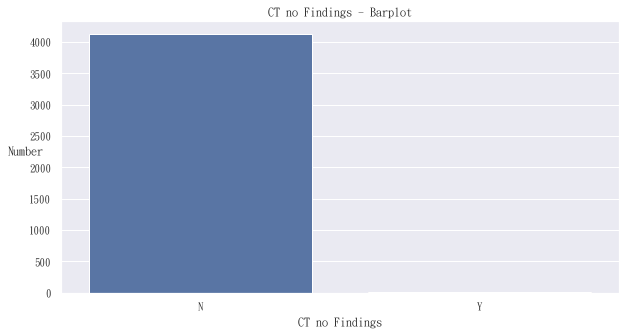

In [215]:
mri_fl = tsr_6.loc[:,"mri_fl"]
mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
mri_fl = mri_fl.fillna(mri_fl.mode()[0])
#print(mri_fl)
print(mri_fl.value_counts() / len(mri_fl))
#print(mri_fl.describe())

sns.countplot(mri_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

# Ultrasound/MRA Studies

# Carotid Duplex

0.0    0.879065
1.0    0.113226
2.0    0.007709
Name: cd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


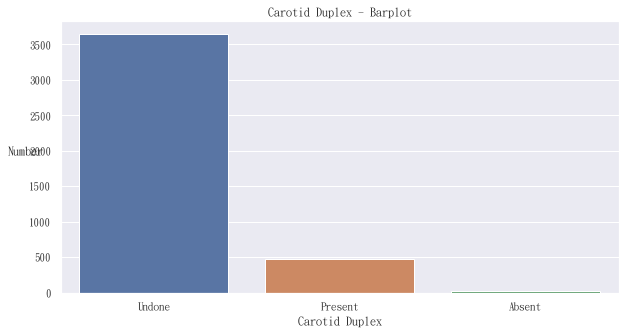

In [216]:
cd_id = tsr_6.loc[:,"cd_id"]
cd_id = pd.to_numeric(cd_id, errors = "coerce")
cd_id[(cd_id != 0) & (cd_id != 1) & (cd_id != 2)] = np.nan
cd_id = cd_id.fillna(cd_id.mode()[0])
#print(cd_id)
print(cd_id.value_counts() / len(cd_id))
#print(cd_id.describe())

cd_id_labels = ["Undone","Present","Absent"]
sns.countplot(cd_id).set_xticklabels(cd_id_labels)
plt.title("Carotid Duplex - Barplot")
plt.xlabel('Carotid Duplex')
plt.ylabel('Number', rotation=0)
plt.show()

# Carotid Atherosclerosis (R ICA)

1.0    0.940014
2.0    0.031077
3.0    0.021922
4.0    0.006986
Name: cdr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


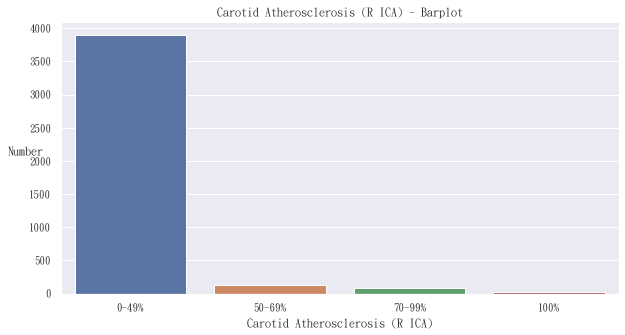

In [217]:
cdr_id = tsr_6.loc[:,"cdr_id"]
cdr_id = pd.to_numeric(cdr_id, errors = "coerce")
cdr_id[(cdr_id != 1) & (cdr_id != 2) & (cdr_id != 3) & (cdr_id != 4)] = np.nan
cdr_id = cdr_id.fillna(cdr_id.mode()[0])
#print(cdr_id)
print(cdr_id.value_counts() / len(cdr_id))
#print(cdr_id.describe())

cdr_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdr_id).set_xticklabels(cdr_id_labels)
plt.title("Carotid Atherosclerosis (R ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# Carotid Atherosclerosis (L ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.947483
2.0    0.033968
3.0    0.014213
4.0    0.004336
Name: cdl_id, dtype: float64


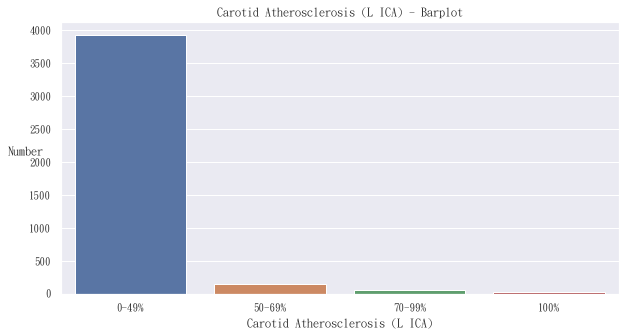

In [218]:
cdl_id = tsr_6.loc[:,"cdl_id"]
cdl_id = pd.to_numeric(cdl_id, errors = "coerce")
cdl_id[(cdl_id != 1) & (cdl_id != 2) & (cdl_id != 3) & (cdl_id != 4)] = np.nan
cdl_id = cdl_id.fillna(cdl_id.mode()[0])
#print(cdl_id)
print(cdl_id.value_counts() / len(cdl_id))
#print(cdl_id.describe())

cdl_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdl_id).set_xticklabels(cdl_id_labels)
plt.title("Carotid Atherosclerosis (L ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.858106
1.0    0.141894
Name: tccs_id, dtype: float64


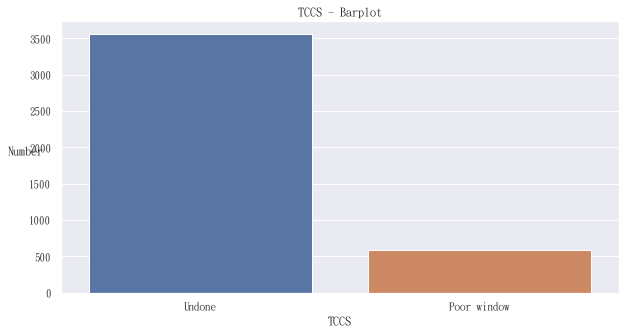

In [219]:
tccs_id = tsr_6.loc[:,"tccs_id"]
tccs_id = pd.to_numeric(tccs_id, errors = "coerce")
tccs_id[(tccs_id != 1) & (tccs_id != 0)] = np.nan
tccs_id = tccs_id.fillna(tccs_id.mode()[0])
#print(tccs_id)
print(tccs_id.value_counts() / len(tccs_id))
#print(tccs_id.describe())

tccs_id_labels = ["Undone","Poor window"]
sns.countplot(tccs_id).set_xticklabels(tccs_id_labels)
plt.title("TCCS - Barplot")
plt.xlabel('TCCS')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (R MCA)

1.0    0.895206
2.0    0.104553
3.0    0.000241
Name: tccsr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


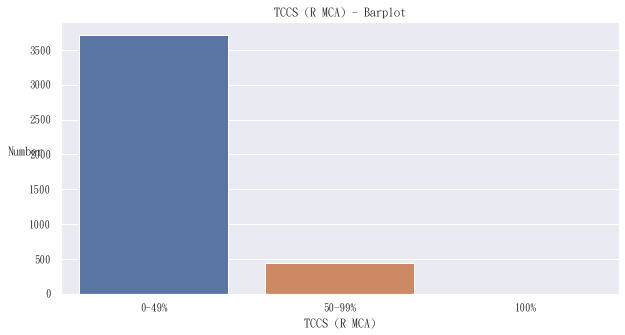

In [220]:
tccsr_id = tsr_6.loc[:,"tccsr_id"]
tccsr_id = pd.to_numeric(tccsr_id, errors = "coerce")
tccsr_id[(tccsr_id != 1) & (tccsr_id != 2) & (tccsr_id != 3)] = np.nan
tccsr_id = tccsr_id.fillna(tccsr_id.mode()[0])
#print(tccsr_id)
print(tccsr_id.value_counts() / len(tccsr_id))
#print(tccsr_id.describe())

tccsr_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsr_id).set_xticklabels(tccsr_id_labels)
plt.title("TCCS (R MCA) - Barplot")
plt.xlabel('TCCS (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (L MCA)

1.0    0.430740
2.0    0.103349
Name: tccsl_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


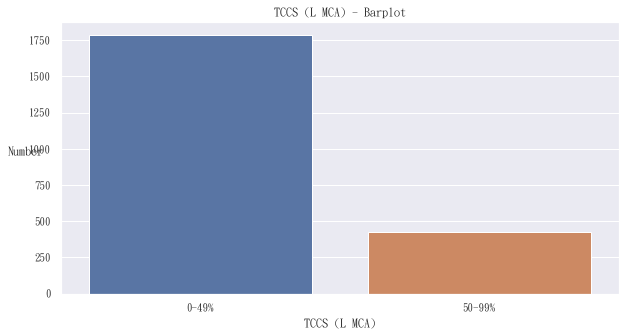

In [221]:
tccsl_id = tsr_6.loc[:,"tccsl_id"]
tccsl_id = pd.to_numeric(tccsl_id, errors = "coerce")
tccsl_id[(tccsl_id != 1) & (tccsl_id != 2) & (tccsl_id != 3)] = np.nan
#tccsl_id = tccsl_id.fillna(tccsl_id.mode()[0])
#print(tccsl_id)
print(tccsl_id.value_counts() / len(tccsl_id))
#print(tccsl_id.describe())

#tccsl_id_labels = ["0-49%","50-99%","100%"]
tccsl_id_labels = ["0-49%","50-99%"]
sns.countplot(tccsl_id).set_xticklabels(tccsl_id_labels)
plt.title("TCCS (L MCA) - Barplot")
plt.xlabel('TCCS (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()
tccsl_id = tccsl_id.fillna(999)

# TCCS (BA)

1.0    0.918815
2.0    0.080703
3.0    0.000482
Name: tccsba_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


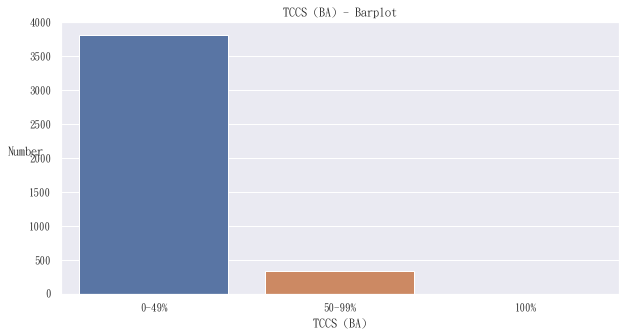

In [222]:
tccsba_id = tsr_6.loc[:,"tccsba_id"]
tccsba_id = pd.to_numeric(tccsba_id, errors = "coerce")
tccsba_id[(tccsba_id != 1) & (tccsba_id != 2) & (tccsba_id != 3)] = np.nan
tccsba_id = tccsba_id.fillna(tccsba_id.mode()[0])
#print(tccsba_id)
print(tccsba_id.value_counts() / len(tccsba_id))
#print(tccsba_id.describe())

tccsba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsba_id).set_xticklabels(tccsba_id_labels)
plt.title("TCCS (BA) - Barplot")
plt.xlabel('TCCS (BA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRA

<ipython-input-223-6246265e73e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(0)] = "N"
<ipython-input-223-6246265e73e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(1)] = "Y"
<ipython-input-223-6246265e73e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

N    0.516984
Y    0.483016
Name: mra_fl, dtype: float64


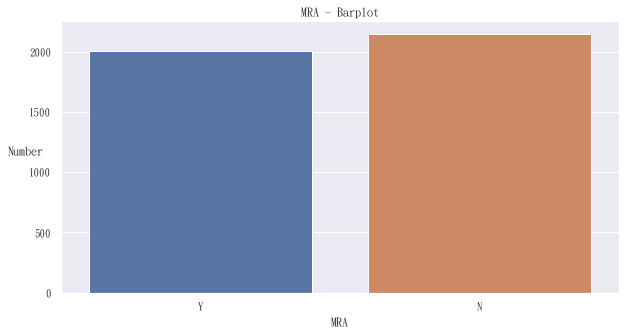

In [223]:
mra_fl = tsr_6.loc[:,"mra_fl"]
mra_fl[mra_fl == str(0)] = "N"
mra_fl[mra_fl == str(1)] = "Y"
mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
mra_fl = mra_fl.fillna(mra_fl.mode()[0])
#print(mra_fl)
print(mra_fl.value_counts() / len(mra_fl))
#print(mra_fl.describe())

sns.countplot(mra_fl)
plt.title("MRA - Barplot")
plt.xlabel('MRA')
plt.ylabel('Number', rotation=0)
plt.show()

# CTA

<ipython-input-224-077401089996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(0)] = "N"
<ipython-input-224-077401089996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(1)] = "Y"
<ipython-input-224-077401089996>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

N    0.891111
Y    0.108889
Name: cta_fl, dtype: float64


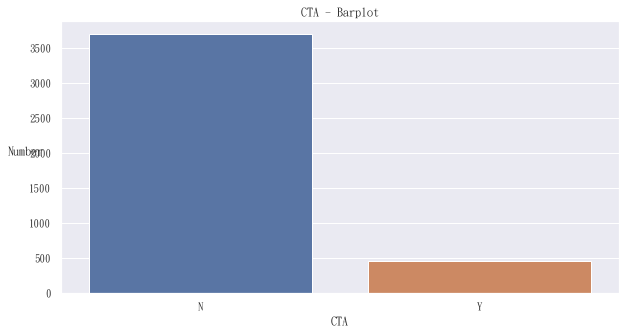

In [224]:
cta_fl = tsr_6.loc[:,"cta_fl"]
cta_fl[cta_fl == str(0)] = "N"
cta_fl[cta_fl == str(1)] = "Y"
cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
cta_fl = cta_fl.fillna(cta_fl.mode()[0])
#print(cta_fl)
print(cta_fl.value_counts() / len(cta_fl))
#print(cta_fl.describe())

sns.countplot(cta_fl)
plt.title("CTA - Barplot")
plt.xlabel('CTA')
plt.ylabel('Number', rotation=0)
plt.show()

In [225]:
# DSA

N    0.990846
Y    0.009154
Name: dsa_fl, dtype: float64


<ipython-input-226-1c207cce4b9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(0)] = "N"
<ipython-input-226-1c207cce4b9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(1)] = "Y"
<ipython-input-226-1c207cce4b9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

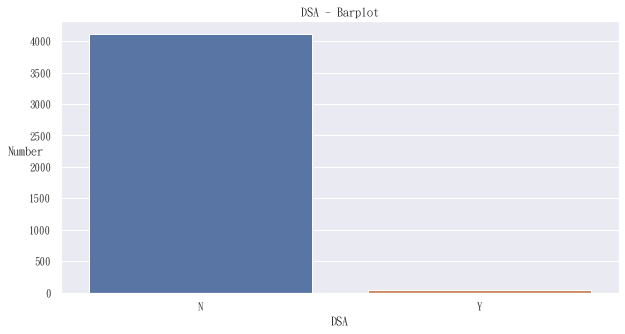

In [226]:
dsa_fl = tsr_6.loc[:,"dsa_fl"]
dsa_fl[dsa_fl == str(0)] = "N"
dsa_fl[dsa_fl == str(1)] = "Y"
dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
dsa_fl = dsa_fl.fillna(dsa_fl.mode()[0])
#print(dsa_fl)
print(dsa_fl.value_counts() / len(dsa_fl))
#print(dsa_fl.describe())

sns.countplot(dsa_fl)
plt.title("DSA - Barplot")
plt.xlabel('DSA')
plt.ylabel('Number', rotation=0)
plt.show()

# Undone MRI, CTA and DSA

N    0.999036
Y    0.000964
Name: mcd_id, dtype: float64


<ipython-input-227-b58ba44ff0d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(0)] = 0
<ipython-input-227-b58ba44ff0d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(1)] = 1
<ipython-input-227-b58ba44ff0d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == 0] = "N"
<ipython-input-227-b58ba44ff0d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

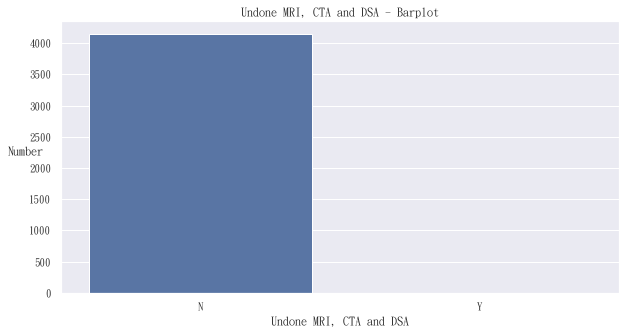

In [227]:
mcd_id = tsr_6.loc[:,"mcd_id"]
mcd_id[mcd_id == str(0)] = 0
mcd_id[mcd_id == str(1)] = 1
mcd_id[mcd_id == 0] = "N"
mcd_id[mcd_id == 1] = "Y"
mcd_id[(mcd_id !="N") & (mcd_id != "Y")] = np.nan
mcd_id = mcd_id.fillna(mcd_id.mode()[0])
#print(mcd_id)
print(mcd_id.value_counts() / len(mcd_id))
#print(mcd_id.describe())

sns.countplot(mcd_id)
plt.title("Undone MRI, CTA and DSA - Barplot")
plt.xlabel('Undone MRI, CTA and DSA')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (R MCA)

1.0    0.992532
2.0    0.004577
3.0    0.002891
Name: mcdr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


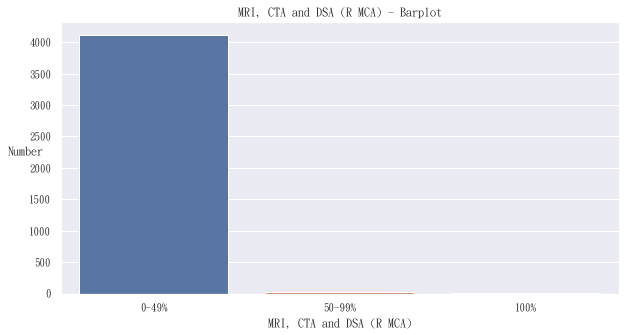

In [228]:
mcdr_id = tsr_6.loc[:,"mcdr_id"]
mcdr_id = pd.to_numeric(mcdr_id, errors = "coerce")
mcdr_id[(mcdr_id != 1) & (mcdr_id != 2) & (mcdr_id != 3)] = np.nan
mcdr_id = mcdr_id.fillna(mcdr_id.mode()[0])
#print(mcdr_id)
print(mcdr_id.value_counts() / len(mcdr_id))
#print(mcdr_id.describe())

mcdr_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdr_id).set_xticklabels(mcdr_id_labels)
plt.title("MRI, CTA and DSA (R MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (L MCA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.993977
2.0    0.005059
3.0    0.000964
Name: mcdl_id, dtype: float64


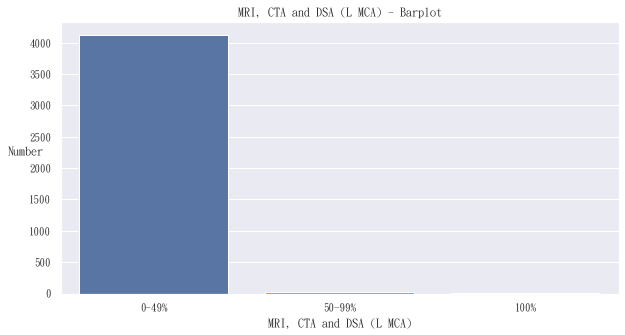

In [229]:
mcdl_id = tsr_6.loc[:,"mcdl_id"]
mcdl_id = pd.to_numeric(mcdl_id, errors = "coerce")
mcdl_id[(mcdl_id != 1) & (mcdl_id != 2) & (mcdl_id != 3)] = np.nan
mcdl_id = mcdl_id.fillna(mcdl_id.mode()[0])
#print(mcdl_id)
print(mcdl_id.value_counts() / len(mcdl_id))
#print(mcdl_id.describe())

mcdl_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdl_id).set_xticklabels(mcdl_id_labels)
plt.title("MRI, CTA and DSA (L MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (VA or BA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.995182
2.0    0.004095
3.0    0.000723
Name: mcdba_id, dtype: float64


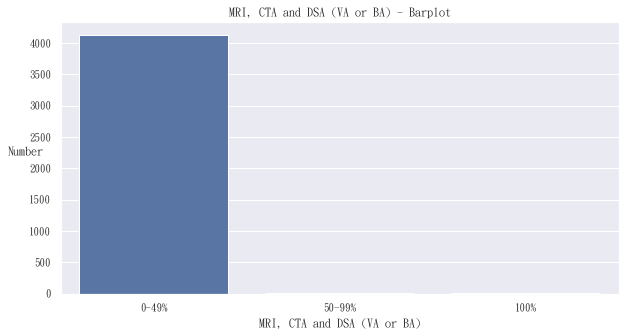

In [230]:
mcdba_id = tsr_6.loc[:,"mcdba_id"]
mcdba_id = pd.to_numeric(mcdba_id, errors = "coerce")
mcdba_id[(mcdba_id != 1) & (mcdba_id != 2) & (mcdba_id != 3)] = np.nan
mcdba_id = mcdba_id.fillna(mcdba_id.mode()[0])
#print(mcdba_id)
print(mcdba_id.value_counts() / len(mcdba_id))
#print(mcdba_id.describe())

mcdba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdba_id).set_xticklabels(mcdba_id_labels)
plt.title("MRI, CTA and DSA (VA or BA) - Barplot")
plt.xlabel('MRI, CTA and DSA (VA or BA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (R ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.998795
3.0    0.000723
2.0    0.000482
Name: mcdri_id, dtype: float64


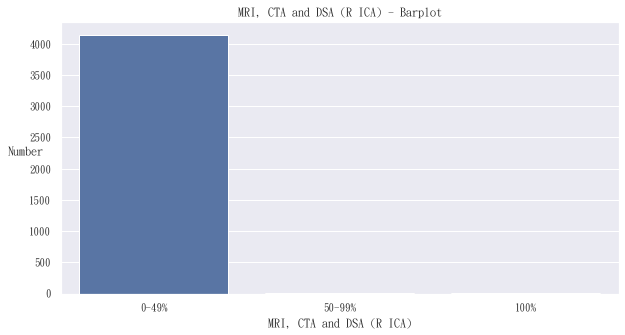

In [231]:
mcdri_id = tsr_6.loc[:,"mcdri_id"]
mcdri_id = pd.to_numeric(mcdri_id, errors = "coerce")
mcdri_id[(mcdri_id != 1) & (mcdri_id != 2) & (mcdri_id != 3)] = np.nan
mcdri_id = mcdri_id.fillna(mcdri_id.mode()[0])
#print(mcdri_id)
print(mcdri_id.value_counts() / len(mcdri_id))
#print(mcdri_id.describe())

mcdri_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdri_id).set_xticklabels(mcdri_id_labels)
plt.title("MRI, CTA and DSA (R ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (L ICA)

1.0    0.999277
3.0    0.000482
2.0    0.000241
Name: mcdli_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


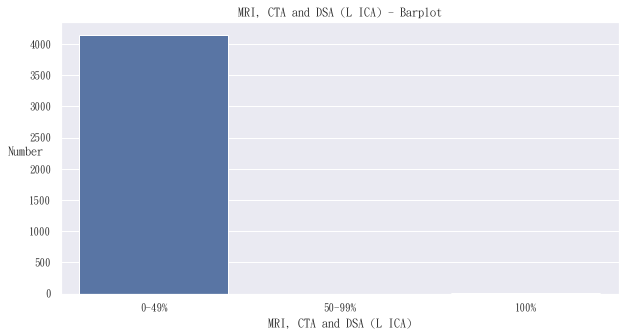

In [232]:
mcdli_id = tsr_6.loc[:,"mcdli_id"]
mcdli_id = pd.to_numeric(mcdli_id, errors = "coerce")
mcdli_id[(mcdli_id != 1) & (mcdli_id != 2) & (mcdli_id != 3)] = np.nan
mcdli_id = mcdli_id.fillna(mcdli_id.mode()[0])
#print(mcdli_id)
print(mcdli_id.value_counts() / len(mcdli_id))
#print(mcdli_id.describe())

mcdli_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdli_id).set_xticklabels(mcdli_id_labels)
plt.title("MRI, CTA and DSA (L ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHSS 最初進院日期

count                    4151
unique                   3654
top       2009-01-24 00:00:00
freq                      271
first     2006-04-16 18:07:00
last      2019-05-29 14:07:00
dtype: object


<ipython-input-233-45c88d790c35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan
<ipython-input-233-45c88d790c35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
<ipython-input-233-45c88d790c35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

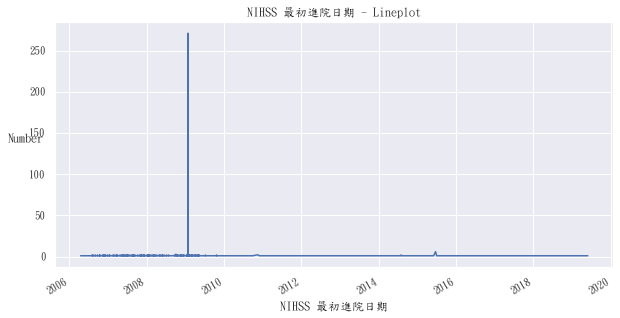

In [233]:
nihsin_time = tsr_6.loc[:,["nihsin_dt", "nihsinh_nm", "nihsinm_nm"]]
nihsin_time.nihsin_dt = pd.to_datetime(nihsin_time.nihsin_dt, errors = "coerce", format = "%Y-%m-%d")
nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan

nihsin_time['nihsinh_nm'] = pd.to_numeric(nihsin_time['nihsinh_nm'], errors='coerce')
nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
nihsin_time['nihsinh_nm'][nihsin_time['nihsinh_nm'] == 24] = 0
nihsin_time['nihsinm_nm'] = pd.to_numeric(nihsin_time['nihsinm_nm'], errors='coerce')
nihsin_time['nihsinm_nm'][(nihsin_time['nihsinm_nm'] < 0) | (nihsin_time['nihsinm_nm'] > 24)] = np.nan
nihsin_time['nihsinm_nm'][nihsin_time['nihsinm_nm'] == 24] = 0

nihsin_time['nihsin_dt'] = nihsin_time['nihsin_dt'].fillna(nihsin_time['nihsin_dt'].mode()[0])
nihsin_time['nihsinh_nm'] = nihsin_time['nihsinh_nm'].fillna(nihsin_time['nihsinh_nm'].mean())
nihsin_time['nihsinm_nm'] = nihsin_time['nihsinm_nm'].fillna(nihsin_time['nihsinm_nm'].mean())

nihsin = nihsin_time['nihsin_dt'].astype(str)+' '+nihsin_time['nihsinh_nm'].astype(int).map(str)+':'+nihsin_time['nihsinm_nm'].astype(int).map(str)

nihsin_dt = pd.to_datetime(nihsin, format='%Y/%m/%d %H:%M', errors='coerce')
#print(nihsin_dt.value_counts() / len(nihsin_dt))
print(nihsin_dt.describe())

nihsin_dt.value_counts().plot()
plt.title("NIHSS 最初進院日期 - Lineplot")
plt.xlabel('NIHSS 最初進院日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# NIHSS 最初進院時間 - 時

In [234]:
nihsinh_nm = tsr_6.loc[:,"nihsinh_nm"]
nihsinh_nm = pd.to_numeric(nihsinh_nm, errors='coerce')
nihsinh_nm[(nihsinh_nm < 0) | (nihsinh_nm > 24)] = np.nan
nihsinh_nm[nihsinh_nm == 24] = 0
nihsinh_nm = nihsinh_nm.fillna(nihsinh_nm.mean())
#print(nihsinh_nm)
#print(nihsinh_nm.value_counts() / len(nihsinh_nm))
print(nihsinh_nm.describe())

count    4151.000000
mean       12.938590
std         6.772422
min         0.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: nihsinh_nm, dtype: float64


# NIHSS 最初進院時間 - 分

In [235]:
nihsinm_nm = tsr_6.loc[:,"nihsinm_nm"]
nihsinm_nm = pd.to_numeric(nihsinm_nm, errors='coerce')
nihsinm_nm[(nihsinm_nm < 0) | (nihsinm_nm > 60)] = np.nan
nihsinm_nm[nihsinm_nm == 60] = 0
nihsinm_nm = nihsinm_nm.fillna(nihsinm_nm.mean())
#print(nihsinm_nm)
#print(nihsinm_nm.value_counts() / len(nihsinm_nm))
print(nihsinm_nm.describe())

count    4151.000000
mean       23.822112
std        18.389079
min         0.000000
25%         5.000000
50%        23.822112
75%        40.000000
max        59.000000
Name: nihsinm_nm, dtype: float64


# NIHSS 離院日期

count    4151.000000
mean        8.549814
std         7.252187
min         0.000000
25%         4.000000
50%         7.000000
75%         8.549814
max        38.000000
dtype: float64


<ipython-input-236-1a093af6d75d>:18: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)
<ipython-input-236-1a093af6d75d>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not support

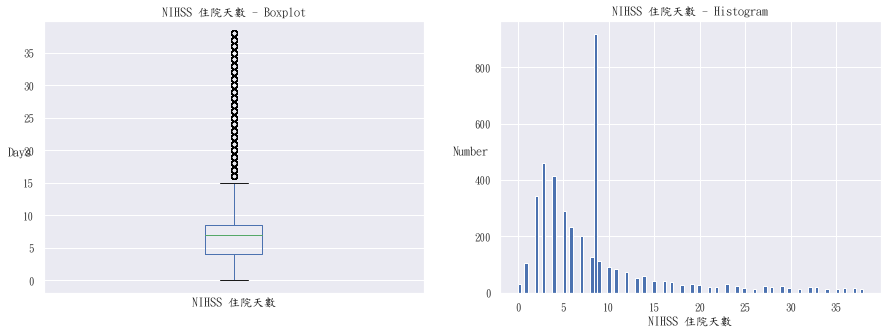

In [236]:
nihsot_dt = tsr_6.loc[:,"nihsot_dt"]
nihsot_dt = pd.to_datetime(nihsot_dt, errors='coerce')
nihsot_dt[(nihsot_dt.dt.year < 2005) | (nihsot_dt.dt.year > 2021) | (nihsot_dt < nihsin_time.nihsin_dt)] = np.nan
#print(nihsot_dt)
#print(nihsot_dt.value_counts() / len(nihsot_dt))
#print(nihsot_dt.describe())

nihss_hospitalised_time = nihsot_dt - nihsin_dt
nihss_hospitalised_time = nihss_hospitalised_time.dt.days

q1 = nihss_hospitalised_time.quantile(0.25)
q3 = nihss_hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan

nihss_hospitalised_time =nihss_hospitalised_time.fillna(nihss_hospitalised_time.mean())

#print(nihss_hospitalised_time.value_counts().sort_values(ascending= True))
print(nihss_hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihss_hospitalised_time.plot.box(ax = ax1)
ax1.set_title("NIHSS 住院天數 - Boxplot")
ax1.set_xlabel('NIHSS 住院天數')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("NIHSS 住院天數 - Histogram")
ax2.set_xlabel('NIHSS 住院天數')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHSS 離院時間 - 時

In [237]:
nihsoth_nm = tsr_6.loc[:,"nihsoth_nm"]
nihsoth_nm = pd.to_numeric(nihsoth_nm, errors='coerce')
nihsoth_nm[(nihsoth_nm < 0) | (nihsoth_nm > 24)] = np.nan
nihsoth_nm[nihsoth_nm == 24] = 0
nihsoth_nm =nihsoth_nm.fillna(nihsoth_nm.mean())
#print(nihsoth_nm)
#print(nihsoth_nm.value_counts() / len(nihsoth_nm))
print(nihsoth_nm.describe())

count    4151.000000
mean       10.039854
std         2.674442
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        22.000000
Name: nihsoth_nm, dtype: float64


# NIHSS 離院時間 - 分

In [238]:
nihsotm_nm = tsr_6.loc[:,"nihsotm_nm"]
nihsotm_nm = pd.to_numeric(nihsotm_nm, errors='coerce')
nihsotm_nm[(nihsotm_nm < 0) | (nihsotm_nm > 60)] = np.nan
nihsotm_nm[nihsotm_nm == 60] = 0
nihsotm_nm =nihsotm_nm.fillna(nihsotm_nm.mean())
#print(nihsotm_nm)
#print(nihsotm_nm.value_counts() / len(nihsotm_nm))
print(nihsotm_nm.describe())

count    4151.000000
mean        2.132503
std         8.110970
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        59.000000
Name: nihsotm_nm, dtype: float64


# ECG

Y    0.922428
N    0.077572
Name: ecg_id, dtype: float64


<ipython-input-239-dab0d60be134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(1)] = 1
<ipython-input-239-dab0d60be134>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(0)] = 0
<ipython-input-239-dab0d60be134>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == 1] = "Y"
<ipython-input-239-dab0d60be134>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

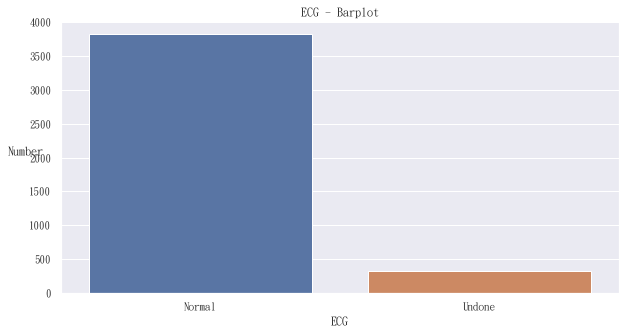

In [239]:
ecg_id = tsr_6.loc[:,"ecg_id"]
ecg_id[ecg_id == str(1)] = 1
ecg_id[ecg_id == str(0)] = 0
ecg_id[ecg_id == 1] = "Y"
ecg_id[ecg_id == 0] = "N"
ecg_id[(ecg_id !="N") & (ecg_id != "Y")] = np.nan
ecg_id =ecg_id.fillna(ecg_id.mode()[0])
#print(ecg_id)
print(ecg_id.value_counts() / len(ecg_id))
#print(ecg_id.describe())

ecg_id_labels = ["Normal", "Undone"]
sns.countplot(ecg_id).set_xticklabels(ecg_id_labels)
plt.title("ECG - Barplot")
plt.xlabel('ECG')
plt.ylabel('Number', rotation=0)

plt.show()

# ECG (LVH)

N    0.93616
Y    0.06384
Name: ecgl_fl, dtype: float64


<ipython-input-240-39cf2dd4bd26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(1)] = 1
<ipython-input-240-39cf2dd4bd26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(0)] = 0
<ipython-input-240-39cf2dd4bd26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == 1] = "Y"
<ipython-input-240-39cf2dd4bd26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

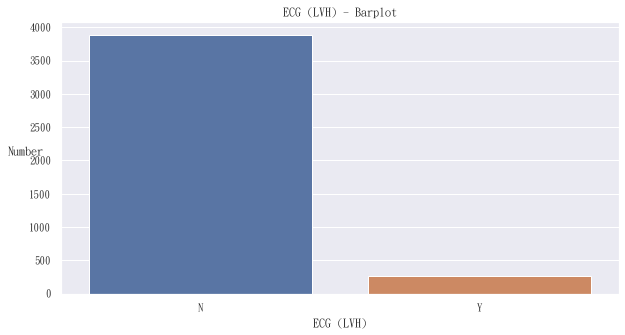

In [240]:
ecgl_fl = tsr_6.loc[:,"ecgl_fl"]
ecgl_fl[ecgl_fl == str(1)] = 1
ecgl_fl[ecgl_fl == str(0)] = 0
ecgl_fl[ecgl_fl == 1] = "Y"
ecgl_fl[ecgl_fl == 0] = "N"
ecgl_fl[(ecgl_fl !="N") & (ecgl_fl != "Y")] = np.nan
ecgl_fl[ecg_id == "N"] = "N"
ecgl_fl =ecgl_fl.fillna(ecgl_fl.mode()[0])
#print(ecgl_fl)
print(ecgl_fl.value_counts() / len(ecgl_fl))
#print(ecgl_fl.describe())

sns.countplot(ecgl_fl)
plt.title("ECG (LVH) - Barplot")
plt.xlabel('ECG (LVH)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (AF)

N    0.924356
Y    0.075644
Name: ecga_fl, dtype: float64


<ipython-input-241-3b4d1ad074ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(1)] = 1
<ipython-input-241-3b4d1ad074ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(0)] = 0
<ipython-input-241-3b4d1ad074ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == 1] = "Y"
<ipython-input-241-3b4d1ad074ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

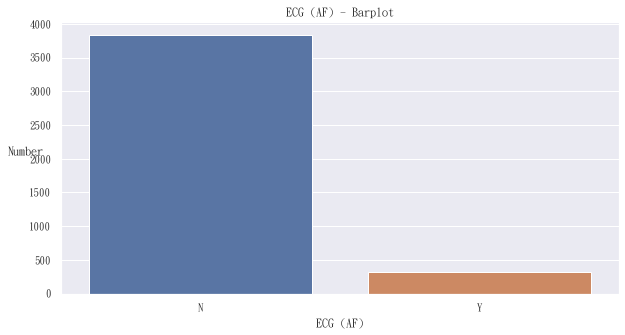

In [241]:
ecga_fl = tsr_6.loc[:,"ecga_fl"]
ecga_fl[ecga_fl == str(1)] = 1
ecga_fl[ecga_fl == str(0)] = 0
ecga_fl[ecga_fl == 1] = "Y"
ecga_fl[ecga_fl == 0] = "N"
ecga_fl[(ecga_fl !="N") & (ecga_fl != "Y")] = np.nan
ecga_fl[ecg_id == "N"] = "N"
ecga_fl =ecga_fl.fillna(ecga_fl.mode()[0])
#print(ecga_fl)
print(ecga_fl.value_counts() / len(ecga_fl))
#print(ecga_fl.describe())

sns.countplot(ecga_fl)
plt.title("ECG (AF) - Barplot")
plt.xlabel('ECG (AF)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (Q wave)

<ipython-input-242-d67fec8d3669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(1)] = 1
<ipython-input-242-d67fec8d3669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(0)] = 0
<ipython-input-242-d67fec8d3669>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == 1] = "Y"
<ipython-input-242-d67fec8d3669>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

N    0.998555
Y    0.001445
Name: ecgq_fl, dtype: float64


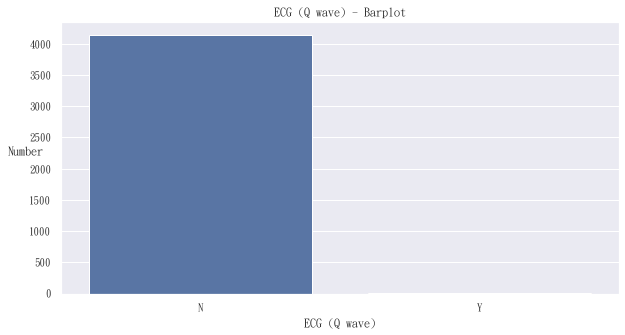

In [242]:
ecgq_fl = tsr_6.loc[:,"ecgq_fl"]
ecgq_fl[ecgq_fl == str(1)] = 1
ecgq_fl[ecgq_fl == str(0)] = 0
ecgq_fl[ecgq_fl == 1] = "Y"
ecgq_fl[ecgq_fl == 0] = "N"
ecgq_fl[(ecgq_fl !="N") & (ecgq_fl != "Y")] = np.nan
ecgq_fl[ecg_id == "N"] = "N"
ecgq_fl =ecgq_fl.fillna(ecgq_fl.mode()[0])
#print(ecgq_fl)
print(ecgq_fl.value_counts() / len(ecgq_fl))
#print(ecgq_fl.describe())

sns.countplot(ecgq_fl)
plt.title("ECG (Q wave) - Barplot")
plt.xlabel('ECG (Q wave)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (Others)

N    0.705131
Y    0.294869
Name: ecgo_fl, dtype: float64


<ipython-input-243-97f3b103b124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(1)] = 1
<ipython-input-243-97f3b103b124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(0)] = 0
<ipython-input-243-97f3b103b124>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == 1] = "Y"
<ipython-input-243-97f3b103b124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

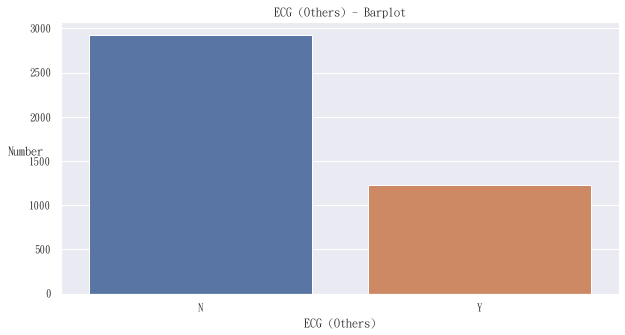

In [243]:
ecgo_fl = tsr_6.loc[:,"ecgo_fl"]
ecgo_fl[ecgo_fl == str(1)] = 1
ecgo_fl[ecgo_fl == str(0)] = 0
ecgo_fl[ecgo_fl == 1] = "Y"
ecgo_fl[ecgo_fl == 0] = "N"
ecgo_fl[(ecgo_fl !="N") & (ecgo_fl != "Y")] = np.nan
ecgo_fl[ecg_id == "N"] = "N"
ecgo_fl =ecgo_fl.fillna(ecgo_fl.mode()[0])
#print(ecgo_fl)
print(ecgo_fl.value_counts() / len(ecgo_fl))
#print(ecgo_fl.describe())

sns.countplot(ecgo_fl)
plt.title("ECG (Others) - Barplot")
plt.xlabel('ECG (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# 抽血結果 - 急診抽血或第一次抽血

# HB

count    4151.000000
mean       13.895669
std         1.869915
min         8.600000
25%        12.700000
50%        13.900000
75%        15.200000
max        19.200000
Name: hb_nm, dtype: float64


<ipython-input-244-fa5688b8c3dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan


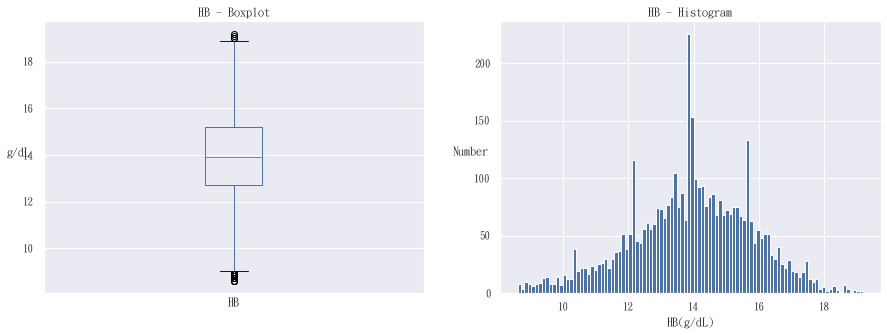

In [244]:
hb_nm = tsr_6.loc[:,"hb_nm"]

q1 = hb_nm.quantile(0.25)
q3 = hb_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan

hb_nm =hb_nm.fillna(round(hb_nm.mean(),3))

#print(hb_nm)
#print(hb_nm.value_counts() / len(hb_nm))
print(hb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hb_nm.plot.box(ax = ax1)
ax1.set_title("HB - Boxplot")
ax1.set_xlabel('HB')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#hb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HB - Histogram")
ax2.set_xlabel('HB(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HCT

<ipython-input-245-d38296568b9f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       40.688357
std         4.774503
min        27.100000
25%        37.900000
50%        40.688000
75%        43.800000
max        55.000000
Name: hct_nm, dtype: float64


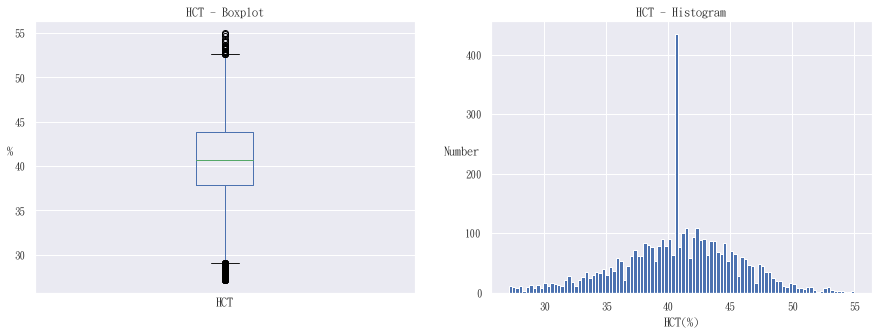

In [245]:
hct_nm = tsr_6.loc[:,"hct_nm"]

q1 = hct_nm.quantile(0.25)
q3 = hct_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan

hct_nm =hct_nm.fillna(round(hct_nm.mean(),3))

#print(hct_nm)
#print(hct_nm.value_counts() / len(hct_nm))
print(hct_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hct_nm.plot.box(ax = ax1)
ax1.set_title("HCT - Boxplot")
ax1.set_xlabel('HCT')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hct_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hct_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HCT - Histogram")
ax2.set_xlabel('HCT(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PLATELET

<ipython-input-246-615130796987>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      207.877209
std        53.834003
min        52.000000
25%       171.000000
50%       207.877000
75%       241.000000
max       365.000000
Name: platelet_nm, dtype: float64


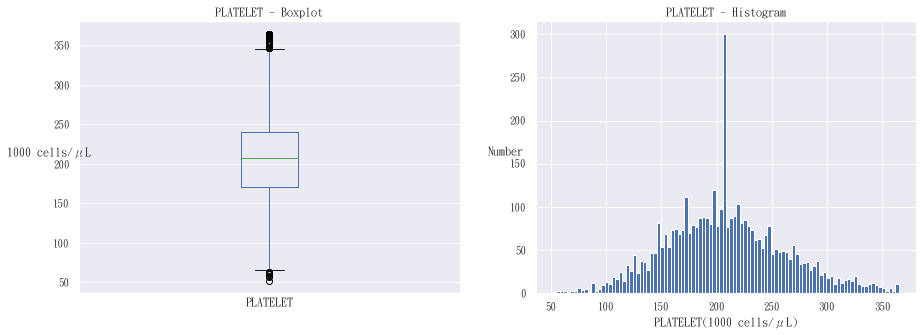

In [246]:
platelet_nm = tsr_6.loc[:,"platelet_nm"]

q1 = platelet_nm.quantile(0.25)
q3 = platelet_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan

platelet_nm =platelet_nm.fillna(round(platelet_nm.mean(),3))

#print(platelet_nm)
#print(platelet_nm.value_counts() / len(platelet_nm))
print(platelet_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

platelet_nm.plot.box(ax = ax1)
ax1.set_title("PLATELET - Boxplot")
ax1.set_xlabel('PLATELET')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#platelet_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
platelet_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PLATELET - Histogram")
ax2.set_xlabel('PLATELET(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# WBC

<ipython-input-247-dcbdd9d82e65>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean        7.963152
std         2.361247
min         1.020000
25%         6.310000
50%         7.800000
75%         9.240000
max        15.100000
Name: wbc_nm, dtype: float64


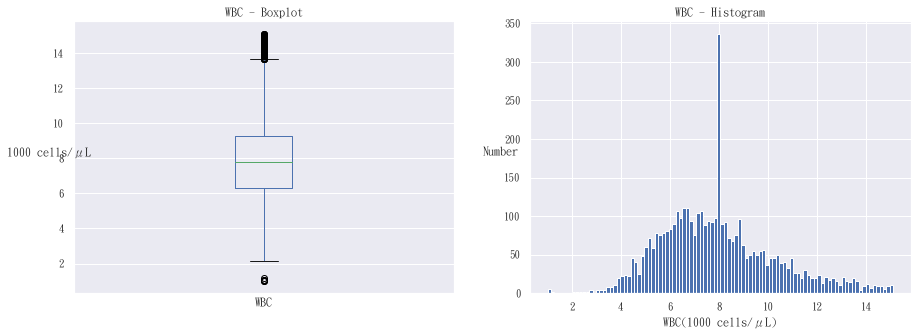

In [247]:
wbc_nm = tsr_6.loc[:,"wbc_nm"]

q1 = wbc_nm.quantile(0.25)
q3 = wbc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan

wbc_nm =wbc_nm.fillna(round(wbc_nm.mean(),3))

#print(wbc_nm)
#print(wbc_nm.value_counts() / len(wbc_nm))
print(wbc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

wbc_nm.plot.box(ax = ax1)
ax1.set_title("WBC - Boxplot")
ax1.set_xlabel('WBC')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#wbc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
wbc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("WBC - Histogram")
ax2.set_xlabel('WBC(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT1

<ipython-input-248-bbd6ff6a5746>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       29.167088
std         0.854326
min        26.200000
25%        28.700000
50%        29.167000
75%        29.500000
max        32.900000
Name: ptt1_nm, dtype: float64


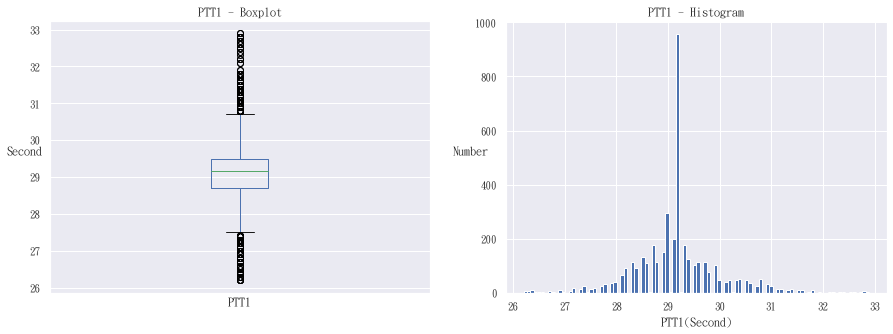

In [248]:
ptt1_nm = tsr_6.loc[:,"ptt1_nm"]

q1 = ptt1_nm.quantile(0.25)
q3 = ptt1_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan

ptt1_nm =ptt1_nm.fillna(round(ptt1_nm.mean(),3))

#print(ptt1_nm)
#print(ptt1_nm.value_counts() / len(ptt1_nm))
print(ptt1_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt1_nm.plot.box(ax = ax1)
ax1.set_title("PTT1 - Boxplot")
ax1.set_xlabel('PTT1')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt1_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt1_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT1 - Histogram")
ax2.set_xlabel('PTT1(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT2

<ipython-input-249-210702755b47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       29.723791
std         3.549761
min        19.100000
25%        27.900000
50%        29.724000
75%        31.300000
max        44.700000
Name: ptt2_nm, dtype: float64


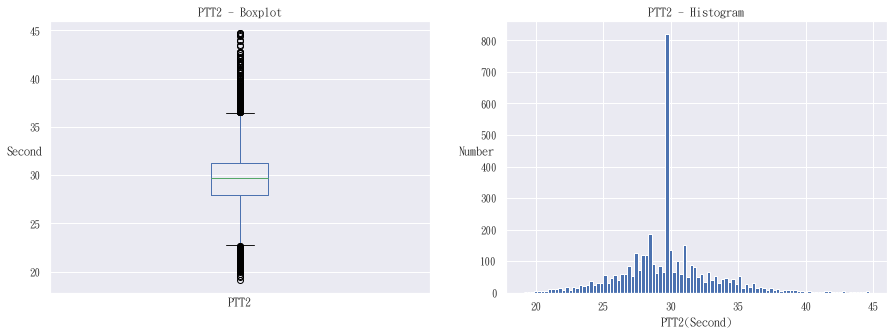

In [249]:
ptt2_nm = tsr_6.loc[:,"ptt2_nm"]

q1 = ptt2_nm.quantile(0.25)
q3 = ptt2_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan

ptt2_nm =ptt2_nm.fillna(round(ptt2_nm.mean(),3))

#print(ptt2_nm)
#print(ptt2_nm.value_counts() / len(ptt2_nm))
print(ptt2_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt2_nm.plot.box(ax = ax1)
ax1.set_title("PTT2 - Boxplot")
ax1.set_xlabel('PTT2')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt2_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt2_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT2 - Histogram")
ax2.set_xlabel('PTT2(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PT (INR)

<ipython-input-250-a6ccbd37ec06>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean        1.032087
std         0.075234
min         0.770000
25%         0.990000
50%         1.032000
75%         1.060000
max         1.380000
Name: ptinr_nm, dtype: float64


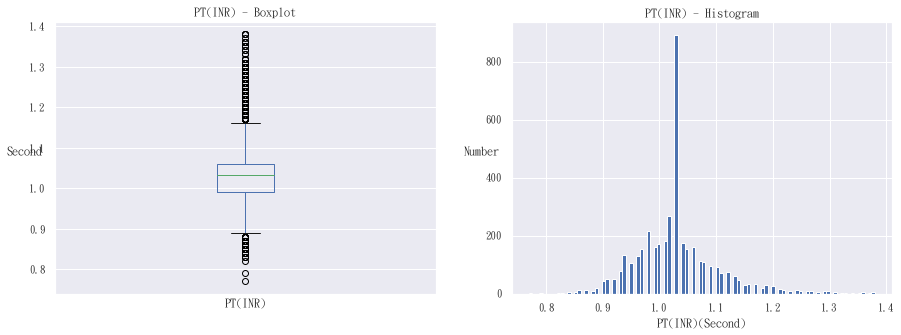

In [250]:
ptinr_nm = tsr_6.loc[:,"ptinr_nm"]

q1 = ptinr_nm.quantile(0.25)
q3 = ptinr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan

ptinr_nm =ptinr_nm.fillna(round(ptinr_nm.mean(),3))

#print(ptinr_nm)
#print(ptinr_nmptinr_nm.value_counts() / len(ptinr_nm))
print(ptinr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptinr_nm.plot.box(ax = ax1)
ax1.set_title("PT(INR) - Boxplot")
ax1.set_xlabel('PT(INR)')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptinr_nmptinr_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptinr_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PT(INR) - Histogram")
ax2.set_xlabel('PT(INR)(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GLUCOSE (ER)

<ipython-input-251-541f8b07d1a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      152.241041
std        55.910966
min         0.800000
25%       115.000000
50%       142.000000
75%       169.000000
max       350.000000
Name: er_nm, dtype: float64


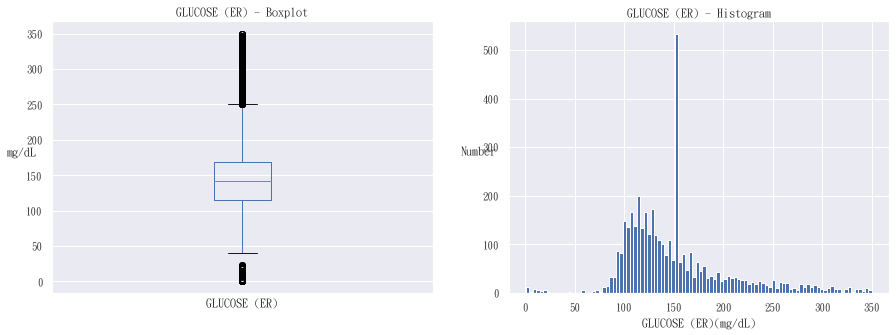

In [251]:
er_nm = tsr_6.loc[:,"er_nm"]

q1 = er_nm.quantile(0.25)
q3 = er_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan

er_nm =er_nm.fillna(round(er_nm.mean(),3))

#print(er_nm)
#print(er_nm.value_counts() / len(er_nm))
print(er_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

er_nm.plot.box(ax = ax1)
ax1.set_title("GLUCOSE (ER) - Boxplot")
ax1.set_xlabel('GLUCOSE (ER)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#er_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
er_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GLUCOSE (ER) - Histogram")
ax2.set_xlabel('GLUCOSE (ER)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BUN

<ipython-input-252-7201ed16e811>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       15.447930
std         5.447035
min         0.050000
25%        12.000000
50%        15.000000
75%        18.000000
max        32.000000
Name: bun_nm, dtype: float64


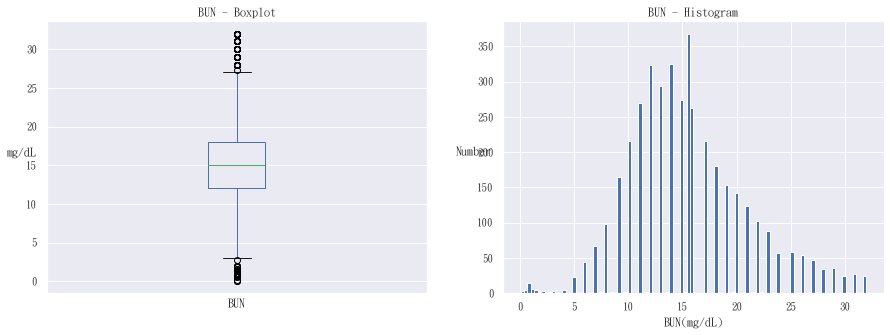

In [252]:
bun_nm = tsr_6.loc[:,"bun_nm"]

q1 = bun_nm.quantile(0.25)
q3 = bun_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan

bun_nm =bun_nm.fillna(round(bun_nm.mean(),3))

#print(bun_nm)
#print(bun_nm.value_counts() / len(bun_nm))
print(bun_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bun_nm.plot.box(ax = ax1)
ax1.set_title("BUN - Boxplot")
ax1.set_xlabel('BUN')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#bun_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
bun_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("BUN - Histogram")
ax2.set_xlabel('BUN(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Creatinine

<ipython-input-253-443433027f4e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean        0.968324
std         0.272811
min         0.250000
25%         0.800000
50%         0.968000
75%         1.100000
max         1.830000
Name: cre_nm, dtype: float64


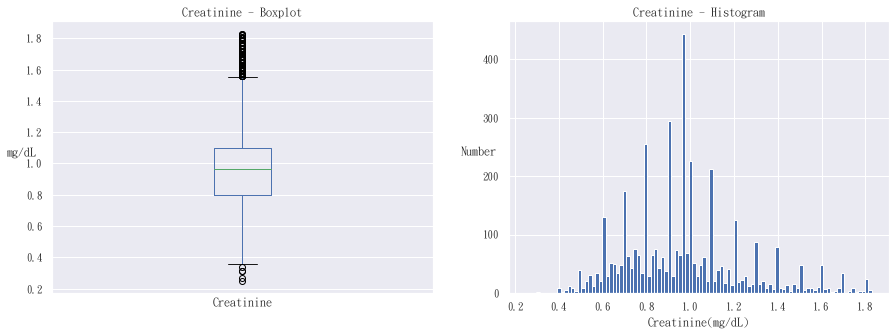

In [253]:
cre_nm = tsr_6.loc[:,"cre_nm"]

q1 = cre_nm.quantile(0.25)
q3 = cre_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan

cre_nm =cre_nm.fillna(round(cre_nm.mean(),3))

#print(cre_nm)
#print(cre_nm.value_counts() / len(cre_nm))
print(cre_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

cre_nm.plot.box(ax = ax1)
ax1.set_title("Creatinine - Boxplot")
ax1.set_xlabel('Creatinine')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#cre_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
cre_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Creatinine - Histogram")
ax2.set_xlabel('Creatinine(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Albumin ???

<ipython-input-254-78edf5a4442c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999.9] = np.nan
<ipython-input-254-78edf5a4442c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999] = np.nan
<ipython-input-254-78edf5a4442c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 99.9] = np.nan


count    4151.000000
mean        3.592096
std         3.892834
min         0.030000
25%         3.592000
50%         3.592000
75%         3.592000
max       183.000000
Name: alb_nm, dtype: float64


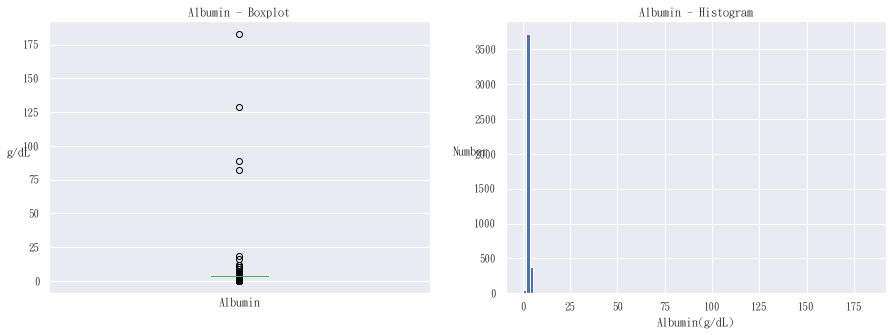

In [254]:
alb_nm = tsr_6.loc[:,"alb_nm"]
alb_nm[alb_nm == 999.9] = np.nan
alb_nm[alb_nm == 999] = np.nan
alb_nm[alb_nm == 99.9] = np.nan
alb_nm =alb_nm.fillna(round(alb_nm.mean(),3))
#print(alb_nm)
#print(alb_nm.value_counts() / len(alb_nm))
print(alb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-255-08f49168616d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[alb_nm_1 == 999.9] = np.nan
<ipython-input-255-08f49168616d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan


count    4151.000000
mean        3.227122
std         0.371742
min         1.300000
25%         3.227000
50%         3.227000
75%         3.227000
max         5.100000
Name: alb_nm, dtype: float64


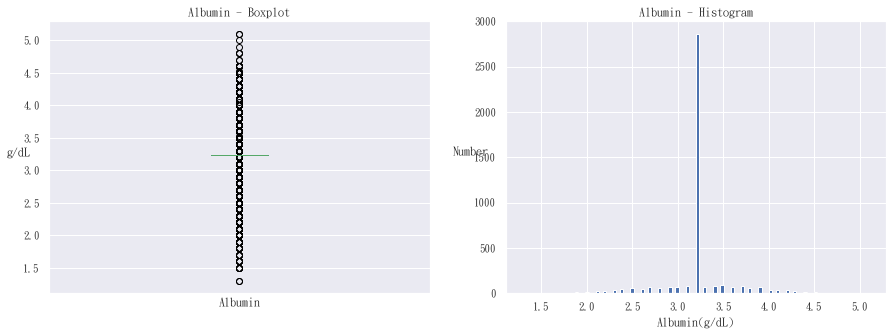

In [255]:
alb_nm_1 = tsr_6.loc[:,"alb_nm"]
alb_nm_1[alb_nm_1 == 999.9] = np.nan

q1 = alb_nm_1.quantile(0.25)
q3 = alb_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan

alb_nm_1 =alb_nm_1.fillna(round(alb_nm_1.mean(),3))

#print(alb_nm_1)
#print(alb_nm_1.value_counts() / len(alb_nm_1))
print(alb_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm_1.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# CRP

<ipython-input-256-dd698d3e4f63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999.9] = np.nan
<ipython-input-256-dd698d3e4f63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999] = np.nan
<ipython-input-256-dd698d3e4f63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 99.9] = np.nan


count    4151.000000
mean        3.038153
std         6.479657
min         0.000000
25%         0.590000
50%         3.038000
75%         3.038000
max       195.000000
Name: crp_nm, dtype: float64


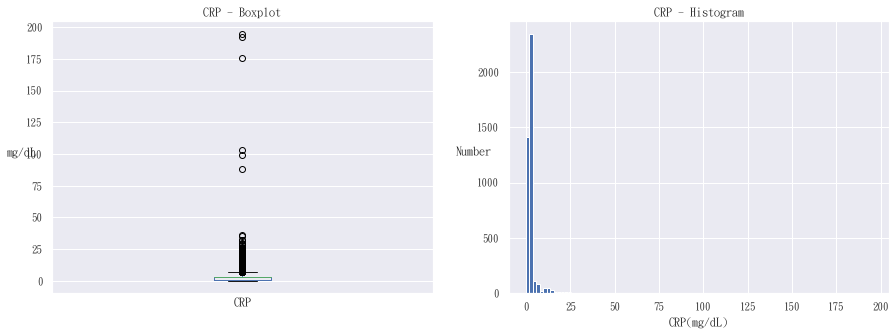

In [256]:
crp_nm = tsr_6.loc[:,"crp_nm"]
crp_nm[crp_nm == 999.9] = np.nan
crp_nm[crp_nm == 999] = np.nan
crp_nm[crp_nm == 99.9] = np.nan
crp_nm =crp_nm.fillna(round(crp_nm.mean(),3))
#print(crp_nm)
#print(crp_nm.value_counts() / len(crp_nm))
print(crp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-257-f44d7781460d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[crp_nm_1 == 999.9] = np.nan
<ipython-input-257-f44d7781460d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan


count    4151.000000
mean        1.130130
std         1.008693
min         0.000000
25%         0.590000
50%         1.130000
75%         1.130000
max         6.680000
Name: crp_nm, dtype: float64


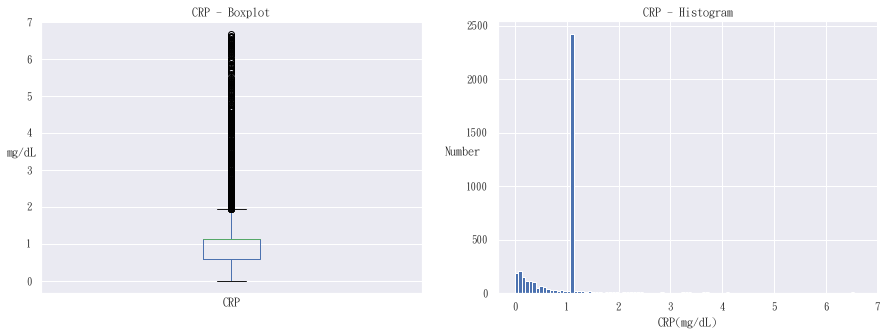

In [257]:
crp_nm_1 = tsr_6.loc[:,"crp_nm"]
crp_nm_1[crp_nm_1 == 999.9] = np.nan

q1 = crp_nm_1.quantile(0.25)
q3 = crp_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan

crp_nm_1 =crp_nm_1.fillna(round(crp_nm_1.mean(),3))

#print(crp_nm_1)
#print(crp_nm_1.value_counts() / len(crp_nm_1))
print(crp_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm_1.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HbA1c

<ipython-input-258-7635633b99a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm[hbac_nm == 999.9] = np.nan


count    4151.000000
mean        8.637214
std        11.358456
min         0.700000
25%         6.300000
50%         8.637000
75%         8.637000
max       312.000000
Name: hbac_nm, dtype: float64


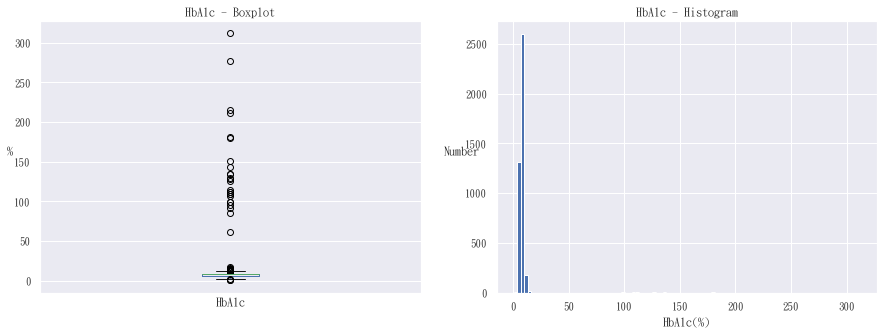

In [258]:
hbac_nm = tsr_6.loc[:,"hbac_nm"]
hbac_nm[hbac_nm == 999.9] = np.nan
hbac_nm =hbac_nm.fillna(round(hbac_nm.mean(),3))
#print(hbac_nm)
#print(hbac_nm.value_counts() / len(hbac_nm))
print(hbac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-259-5b24eb018693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[hbac_nm_1 == 999.9] = np.nan
<ipython-input-259-5b24eb018693>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan


count    4151.000000
mean        6.833105
std         1.080749
min         2.700000
25%         6.300000
50%         6.833000
75%         6.833000
max        11.400000
Name: hbac_nm, dtype: float64


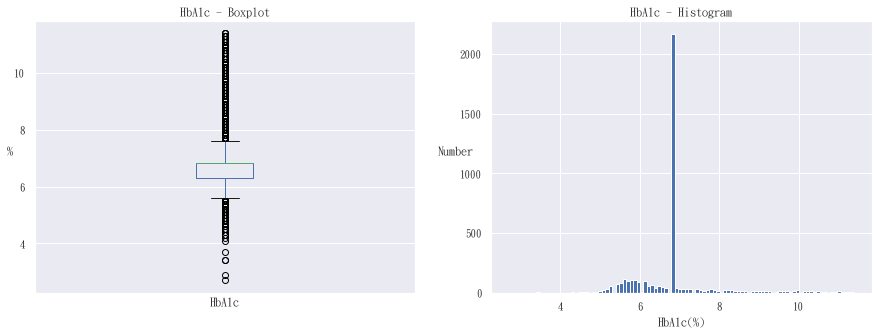

In [259]:
hbac_nm_1 = tsr_6.loc[:,"hbac_nm"]
hbac_nm_1[hbac_nm_1 == 999.9] = np.nan

q1 = hbac_nm_1.quantile(0.25)
q3 = hbac_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan

hbac_nm_1 =hbac_nm_1.fillna(round(hbac_nm_1.mean(),3))

#print(hbac_nm_1)
#print(hbac_nm_1.value_counts() / len(hbac_nm_1))
print(hbac_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm_1.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 抽血結果 - 第一次空腹抽血

# Glu (AC)

<ipython-input-260-17ff8bd33238>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan


count    4151.00000
mean      345.41054
std       379.89440
min         2.40000
25%        99.00000
50%       131.00000
75%       398.00000
max       999.90000
Name: ac_nm, dtype: float64


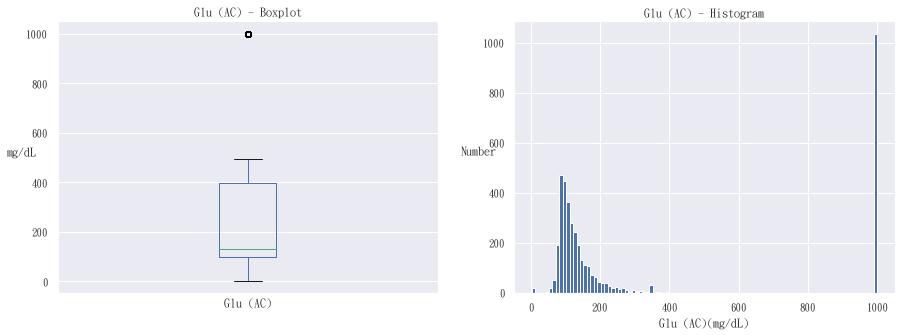

In [260]:
ac_nm = tsr_6.loc[:,"ac_nm"]

q1 = ac_nm.quantile(0.25)
q3 = ac_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan

ac_nm =ac_nm.fillna(round(ac_nm.mean(),3))

#print(ac_nm)
#print(ac_nm.value_counts() / len(ac_nm))
print(ac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ac_nm.plot.box(ax = ax1)
ax1.set_title("Glu (AC) - Boxplot")
ax1.set_xlabel('Glu (AC)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Glu (AC) - Histogram")
ax2.set_xlabel('Glu (AC)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# UA

<ipython-input-261-ed65c72e00a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[ua_nm == 999.9] = np.nan
<ipython-input-261-ed65c72e00a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean        5.575198
std         1.262462
min         1.500000
25%         5.000000
50%         5.575000
75%         6.000000
max        10.000000
Name: ua_nm, dtype: float64


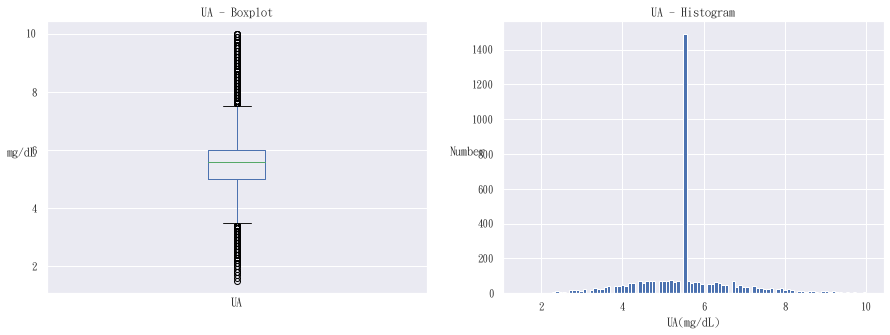

In [261]:
ua_nm = tsr_6.loc[:,"ua_nm"]
ua_nm[ua_nm == 999.9] = np.nan

q1 = ua_nm.quantile(0.25)
q3 = ua_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan

ua_nm =ua_nm.fillna(round(ua_nm.mean(),3))

#print(ua_nm)
#print(ua_nm.value_counts() / len(ua_nm))
print(ua_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ua_nm.plot.box(ax = ax1)
ax1.set_title("UA - Boxplot")
ax1.set_xlabel('UA')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ua_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ua_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("UA - Histogram")
ax2.set_xlabel('UA(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# T-CHO

<ipython-input-262-44d64d24f3f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[tcho_nm == 999.9] = np.nan
<ipython-input-262-44d64d24f3f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      129.117653
std        52.020407
min         3.840000
25%        94.000000
50%       129.118000
75%       147.000000
max       318.000000
Name: tcho_nm, dtype: float64


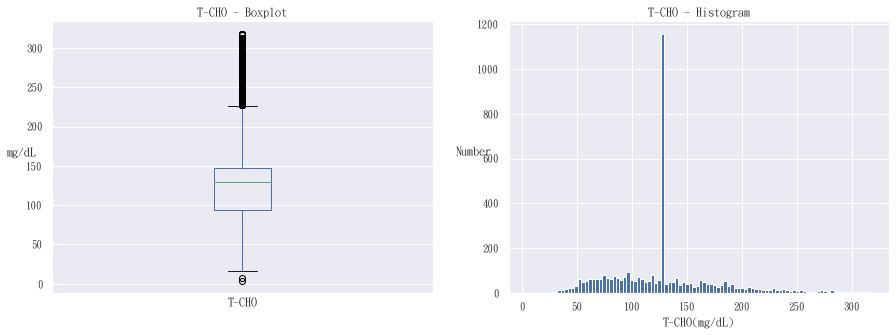

In [262]:
tcho_nm = tsr_6.loc[:,"tcho_nm"]
tcho_nm[tcho_nm == 999.9] = np.nan

q1 = tcho_nm.quantile(0.25)
q3 = tcho_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan

tcho_nm =tcho_nm.fillna(round(tcho_nm.mean(),3))

#print(tcho_nm)
#print(tcho_nm.value_counts() / len(tcho_nm))
print(tcho_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tcho_nm.plot.box(ax = ax1)
ax1.set_title("T-CHO - Boxplot")
ax1.set_xlabel('T-CHO')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tcho_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tcho_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("T-CHO - Histogram")
ax2.set_xlabel('T-CHO(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# TG

<ipython-input-263-2b154cbbfb89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 999.9] = np.nan
<ipython-input-263-2b154cbbfb89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 2000] = np.nan
<ipython-input-263-2b154cbbfb89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      172.611051
std        38.129470
min        53.000000
25%       155.000000
50%       172.611000
75%       190.000000
max       293.000000
Name: tg_nm, dtype: float64


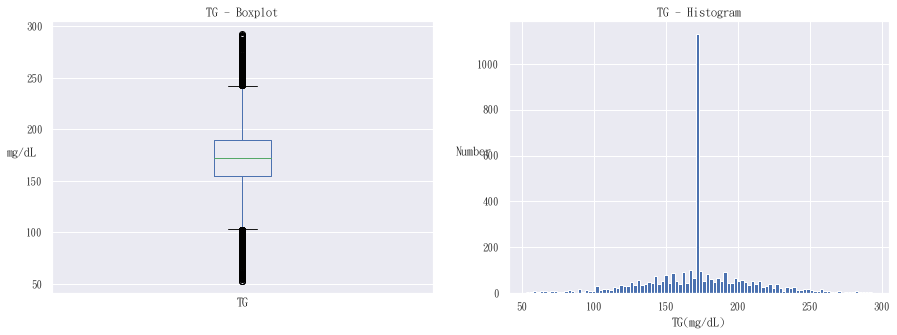

In [263]:
tg_nm = tsr_6.loc[:,"tg_nm"]
tg_nm[tg_nm == 999.9] = np.nan
tg_nm[tg_nm == 2000] = np.nan

q1 = tg_nm.quantile(0.25)
q3 = tg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan

tg_nm =tg_nm.fillna(round(tg_nm.mean(),3))

#print(tg_nm)
#print(tg_nm.value_counts() / len(tg_nm))
print(tg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tg_nm.plot.box(ax = ax1)
ax1.set_title("TG - Boxplot")
ax1.set_xlabel('TG')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("TG - Histogram")
ax2.set_xlabel('TG(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HDL

<ipython-input-264-65697729842d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[hdl_nm == 999.9] = np.nan
<ipython-input-264-65697729842d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean      103.584782
std        34.332755
min        10.800000
25%        88.250000
50%       103.585000
75%       120.900000
max       213.200000
Name: hdl_nm, dtype: float64


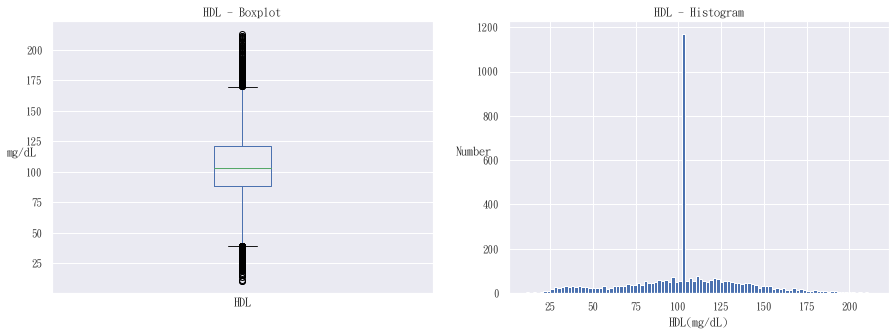

In [264]:
hdl_nm = tsr_6.loc[:,"hdl_nm"]
hdl_nm[hdl_nm == 999.9] = np.nan

q1 = hdl_nm.quantile(0.25)
q3 = hdl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan

hdl_nm =hdl_nm.fillna(round(hdl_nm.mean(),3))

#print(hdl_nm)
#print(hdl_nm.value_counts() / len(hdl_nm))
print(hdl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hdl_nm.plot.box(ax = ax1)
ax1.set_title("HDL - Boxplot")
ax1.set_xlabel('HDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#hdl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hdl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HDL - Histogram")
ax2.set_xlabel('HDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# LDL

<ipython-input-265-a6fefcf6adf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldl_nm[ldl_nm == 999.9] = np.nan
<ipython-input-265-a6fefcf6adf2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldl_nm[(ldl_nm < inner_fence_low) | (ldl_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       36.219283
std         8.881004
min         4.900000
25%        31.700000
50%        36.219000
75%        37.500000
max        72.300000
Name: ldl_nm, dtype: float64


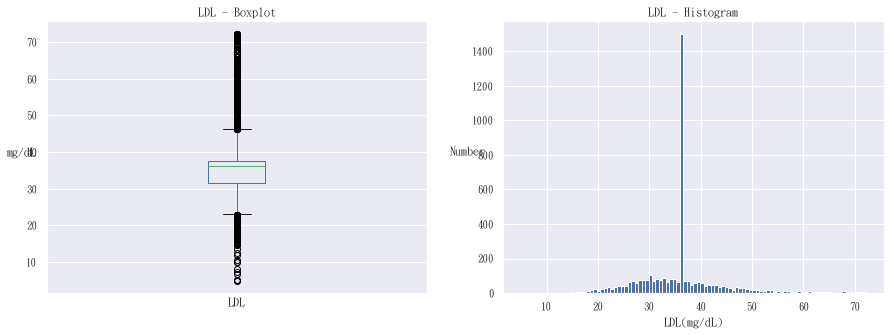

In [265]:
ldl_nm = tsr_6.loc[:,"ldl_nm"]
ldl_nm[ldl_nm == 999.9] = np.nan

q1 = ldl_nm.quantile(0.25)
q3 = ldl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ldl_nm[(ldl_nm < inner_fence_low) | (ldl_nm > inner_fence_upp)] = np.nan

ldl_nm =ldl_nm.fillna(round(ldl_nm.mean(),3))

#print(ldl_nm)
#print(ldl_nm.value_counts() / len(ldl_nm))
print(ldl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ldl_nm.plot.box(ax = ax1)
ax1.set_title("LDL - Boxplot")
ax1.set_xlabel('LDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ldl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ldl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("LDL - Histogram")
ax2.set_xlabel('LDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GOT

<ipython-input-266-805e84c6f0ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got_nm[got_nm == 999.9] = np.nan


count    4151.000000
mean      359.739031
std       454.082462
min         6.000000
25%        24.000000
50%        36.000000
75%       999.900000
max       999.900000
Name: got_nm, dtype: float64


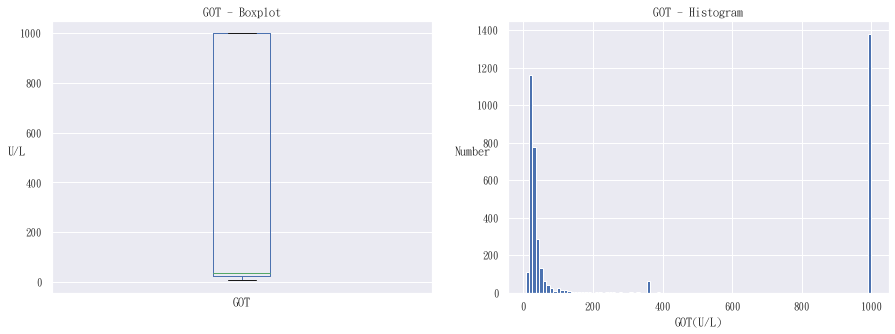

In [266]:
got_nm = tsr_6.loc[:,"got_nm"]
got_nm[got_nm == 999.9] = np.nan
got_nm = pd.to_numeric(got_nm, errors = "coerce")

q1 = got_nm.quantile(0.25)
q3 = got_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
got_nm[(got_nm < inner_fence_low) | (got_nm > inner_fence_upp)] = np.nan

got_nm =got_nm.fillna(round(got_nm.mean(),3))

got_nm = pd.to_numeric(got_nm, errors='coerce')
#print(got_nm)
#print(got_nm.value_counts() / len(got_nm))
print(got_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

got_nm.plot.box(ax = ax1)
ax1.set_title("GOT - Boxplot")
ax1.set_xlabel('GOT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#got_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
got_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GOT - Histogram")
ax2.set_xlabel('GOT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GPT

count    4151.000000
mean       22.538836
std         7.676154
min         2.000000
25%        19.000000
50%        22.539000
75%        22.539000
max        56.000000
Name: gpt_nm, dtype: float64


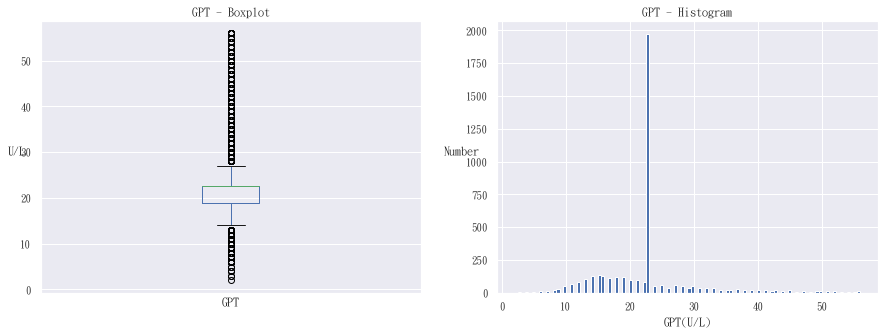

In [267]:
gpt_nm = tsr_6.loc[:,"gpt_nm"]
gpt_nm = pd.to_numeric(gpt_nm, errors = "coerce")
gpt_nm[gpt_nm == 999.9] = np.nan

q1 = gpt_nm.quantile(0.25)
q3 = gpt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
gpt_nm[(gpt_nm < inner_fence_low) | (gpt_nm > inner_fence_upp)] = np.nan

gpt_nm =gpt_nm.fillna(round(gpt_nm.mean(),3))

#print(gpt_nm)
#print(gpt_nm.value_counts() / len(gpt_nm))
print(gpt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

gpt_nm.plot.box(ax = ax1)
ax1.set_title("GPT - Boxplot")
ax1.set_xlabel('GPT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#gpt_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
gpt_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GPT - Histogram")
ax2.set_xlabel('GPT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 離院情形

3.0    0.997350
1.0    0.002168
2.0    0.000482
Name: off_id, dtype: float64


<ipython-input-268-9fad8eefe993>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


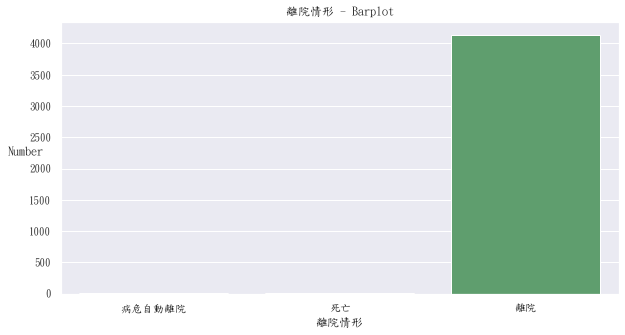

In [268]:
off_id = tsr_6.loc[:,"off_id"]
off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
off_id = pd.to_numeric(off_id, errors = 'coerce')
off_id =off_id.fillna(off_id.mode()[0])
#print(off_id)
print(off_id.value_counts() / len(off_id))
#print(off_id.describe())

off_id_labels = ["病危自動離院","死亡","離院"]
sns.countplot(off_id).set_xticklabels(off_id_labels)
plt.title("離院情形 - Barplot")
plt.xlabel('離院情形')
plt.ylabel('Number', rotation=0)
plt.show()

# 死亡日期

<ipython-input-269-8da15c3c11bd>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offd_dt.describe())


count                       2
unique                      2
top       2010-05-17 00:00:00
freq                        1
first     2008-06-24 00:00:00
last      2010-05-17 00:00:00
Name: offd_dt, dtype: object


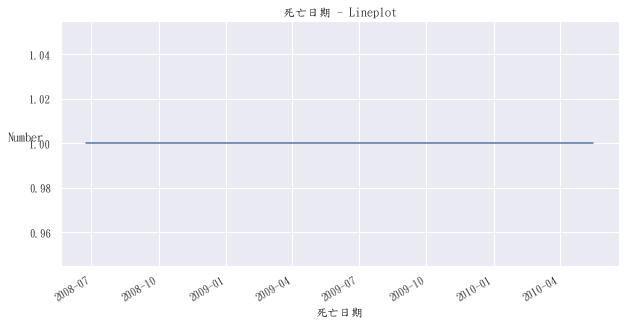

In [269]:
offd_dt = tsr_6.loc[:,"offd_dt"]
offd_dt = pd.to_datetime(offd_dt, errors='coerce')
offd_dt[(offd_dt.dt.year < 2006) | (offd_dt.dt.year > 2021)] = np.nan
offd_dt =offd_dt.fillna(offd_dt.mode()[0])
offd_dt[off_id != 2] = np.nan
#print(offd_dt)
#print(offd_dt.value_counts() / len(offd_dt))
print(offd_dt.describe())

offd_dt.value_counts().plot()
plt.title("死亡日期 - Lineplot")
plt.xlabel('死亡日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 死因

99.0    0.000482
Name: offd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


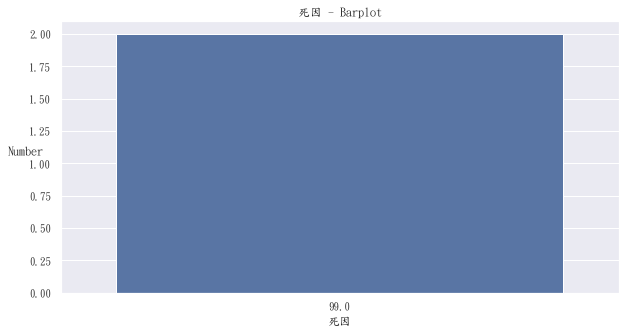

In [270]:
offd_id = tsr_6.loc[:,"offd_id"]
offd_id = pd.to_numeric(offd_id, errors = "coerce")
offd_id[(offd_id != 1) & (offd_id != 2) & (offd_id != 99)] = np.nan
offd_id =offd_id.fillna(offd_id.mode()[0])
offd_id[off_id != 2] = np.nan
#print(offd_id)
print(offd_id.value_counts() / len(offd_id))
#print(offd_id.describe())

#offd_id_labels = ["中風直接致死","併發症致死","其他"]
offd_id_labels = ["其他"]
sns.countplot(offd_id)#.set_xticklabels(offd_id_labels)
plt.title("死因 - Barplot")
plt.xlabel('死因')
plt.ylabel('Number', rotation=0)
plt.show()
offd_id = offd_id.fillna(999)

# 離院，目的地

1.0    0.845098
3.0    0.105758
2.0    0.035654
5.0    0.010600
4.0    0.002891
Name: offdt_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


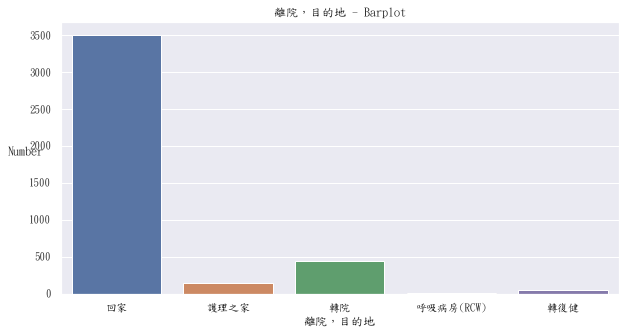

In [271]:
offdt_id = tsr_6.loc[:,"offdt_id"]
offdt_id = pd.to_numeric(offdt_id, errors = "coerce")
offdt_id[(offdt_id != 1) & (offdt_id != 2) & (offdt_id != 3) & (offdt_id != 4) & (offdt_id != 5)] = np.nan
offdt_id =offdt_id.fillna(offdt_id.mode()[0])
#print(offdt_id)
print(offdt_id.value_counts() / len(offdt_id))
#print(offdt_id.describe())

offdt_id_labels = ["回家","護理之家","轉院","呼吸病房(RCW)","轉復健"]
sns.countplot(offdt_id).set_xticklabels(offdt_id_labels)
plt.title("離院，目的地 - Barplot")
plt.xlabel('離院，目的地')
plt.ylabel('Number', rotation=0)
plt.show()

# 離院，轉院醫院

In [272]:
offdtorg_id = tsr_6.loc[:,"offdtorg_id"]
#print(offdtorg_id)
print(offdtorg_id.value_counts() / len(offdtorg_id))
#print(offdtorg_id.describe())

99            0.088653
999           0.073476
22            0.006745
中山            0.001445
21            0.001205
41            0.000964
?�德           0.000964
26            0.000964
24            0.000723
?�家           0.000723
O             0.000482
?�中           0.000241
?�中署�?        0.000241
豐�?署�?        0.000241
2013/11/6     0.000241
弘�??�人        0.000241
?�中?��???     0.000241
44            0.000241
2013/4/22     0.000241
?�芳           0.000241
2007/7/9      0.000241
25            0.000241
2012/8/17     0.000241
中�??�藥        0.000241
2013/10/31    0.000241
29            0.000241
2007/7/14     0.000241
Name: offdtorg_id, dtype: float64


# 轉復健日期

<ipython-input-273-956c7f15a118>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offre_dt.describe())


count                    4140
unique                    129
top       2006-10-18 00:00:00
freq                     4006
first     2006-10-02 00:00:00
last      2018-05-09 00:00:00
Name: offre_dt, dtype: object


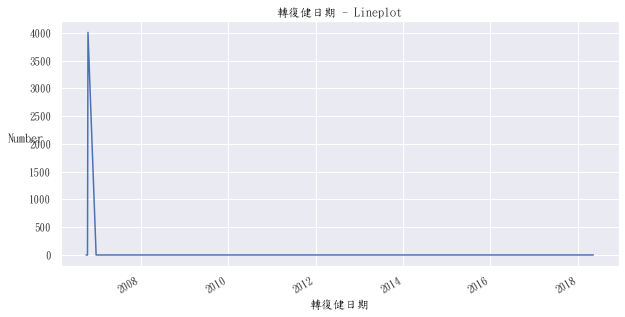

In [273]:
offre_dt = tsr_6.loc[:,"offre_dt"]
offre_dt = pd.to_datetime(offre_dt, errors='coerce')
offre_dt[(offre_dt.dt.year < 2006) | (offre_dt.dt.year > 2021)] = np.nan
offre_dt =offre_dt.fillna(offre_dt.mode()[0])
offre_dt[off_id != 3] = np.nan
#print(offre_dt)
#print(offre_dt.value_counts() / len(offre_dt))
print(offre_dt.describe())

offre_dt.value_counts().plot()
plt.title("轉復健日期 - Lineplot")
plt.xlabel('轉復健日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Feeding

count    4151.000000
mean        6.860997
std         3.903931
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: feeding, dtype: float64


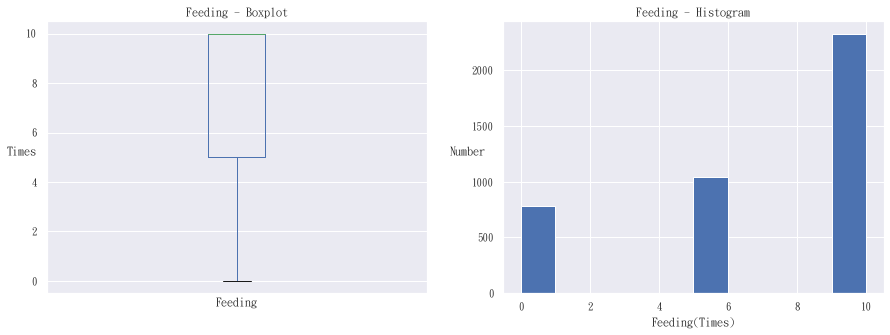

In [274]:
feeding = tsr_6.loc[:, "feeding"]
feeding = pd.to_numeric(feeding, errors = "coerce")
feeding[(feeding < 0 ) | (feeding > 10)] = np.nan
feeding =feeding.fillna(feeding.mode()[0])
#print(feeding)
#print(feeding.value_counts() / len(feeding))
print(feeding.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

feeding.plot.box(ax = ax1)
ax1.set_title("Feeding - Boxplot")
ax1.set_xlabel('Feeding')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

feeding.plot.hist(ax = ax2)
ax2.set_title("Feeding - Histogram")
ax2.set_xlabel('Feeding(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Transfers

count    4151.000000
mean       10.072513
std         5.357332
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: transfers, dtype: float64


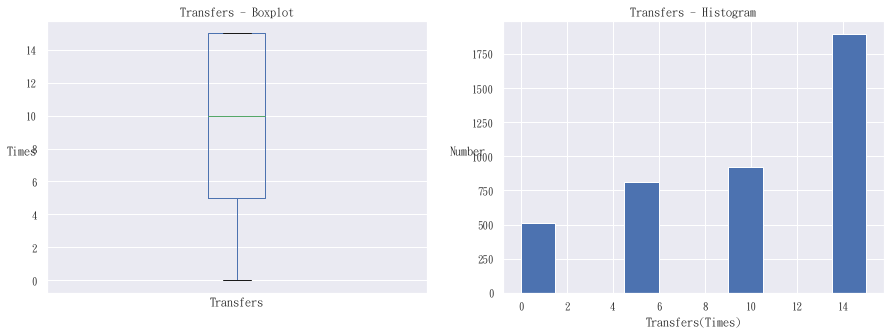

In [275]:
transfers = tsr_6.loc[:, "transfers"]
transfers = pd.to_numeric(transfers, errors = "coerce")
transfers[(transfers < 0 ) | (transfers > 15)] = np.nan
transfers =transfers.fillna(transfers.mode()[0])
#print(transfers)
#print(transfers.value_counts() / len(transfers))
print(transfers.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

transfers.plot.box(ax = ax1)
ax1.set_title("Transfers - Boxplot")
ax1.set_xlabel('Transfers')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

transfers.plot.hist(ax = ax2)
ax2.set_title("Transfers - Histogram")
ax2.set_xlabel('Transfers(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bathing

count    4151.000000
mean        3.241388
std         2.387827
min         0.000000
25%         0.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: bathing, dtype: float64


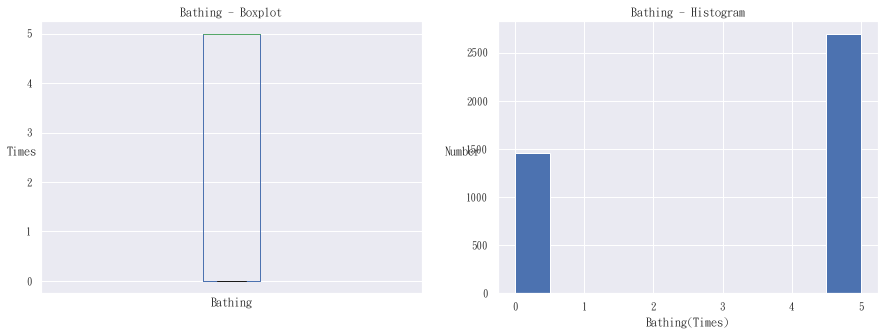

In [276]:
bathing = tsr_6.loc[:, "bathing"]
bathing = pd.to_numeric(bathing, errors = "coerce")
bathing[(bathing < 0 ) | (bathing > 5)] = np.nan
bathing =bathing.fillna(bathing.mode()[0])
#print(bathing)
#print(bathing.value_counts() / len(bathing))
print(bathing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bathing.plot.box(ax = ax1)
ax1.set_title("Bathing - Boxplot")
ax1.set_xlabel('Bathing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bathing.plot.hist(ax = ax2)
ax2.set_title("Bathing - Histogram")
ax2.set_xlabel('Bathing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Toilet

count    4151.000000
mean        6.247892
std         4.146007
min         0.000000
25%         2.500000
50%         5.000000
75%        10.000000
max        10.000000
Name: toilet_use, dtype: float64


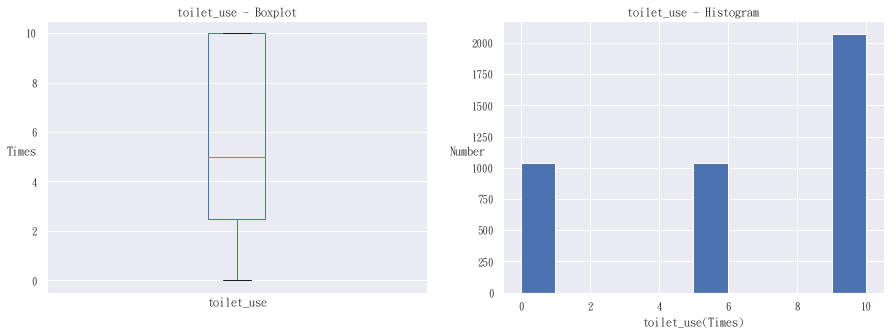

In [277]:
toilet_use = tsr_6.loc[:, "toilet_use"]
toilet_use = pd.to_numeric(toilet_use, errors = "coerce")
toilet_use[(toilet_use < 0 ) | (toilet_use > 10)] = np.nan
toilet_use =toilet_use.fillna(toilet_use.mode()[0])
#print(toilet_use)
#print(toilet_use.value_counts() / len(toilet_use))
print(toilet_use.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

toilet_use.plot.box(ax = ax1)
ax1.set_title("toilet_use - Boxplot")
ax1.set_xlabel('toilet_use')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

toilet_use.plot.hist(ax = ax2)
ax2.set_title("toilet_use - Histogram")
ax2.set_xlabel('toilet_use(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Grooming

count    4151.000000
mean        2.170561
std         2.478498
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max         5.000000
Name: grooming, dtype: float64


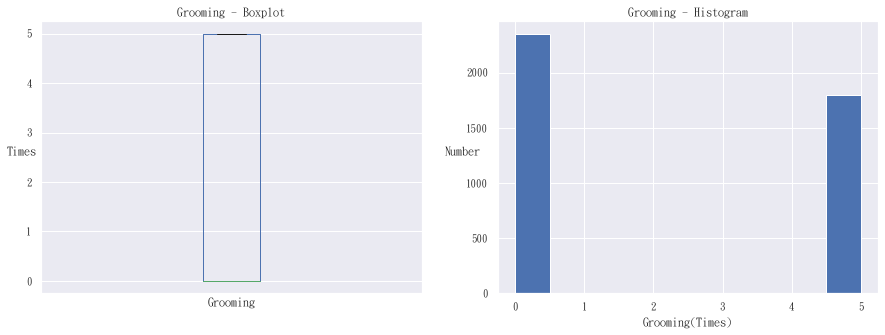

In [278]:
grooming = tsr_6.loc[:, "grooming"]
grooming = pd.to_numeric(grooming, errors = "coerce")
grooming[(grooming < 0 ) | (grooming > 5)] = np.nan
grooming =grooming.fillna(grooming.mode()[0])
#print(grooming)
#print(grooming.value_counts() / len(grooming))
print(grooming.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

grooming.plot.box(ax = ax1)
ax1.set_title("Grooming - Boxplot")
ax1.set_xlabel('Grooming')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

grooming.plot.hist(ax = ax2)
ax2.set_title("Grooming - Histogram")
ax2.set_xlabel('Grooming(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Mobility

count    4151.000000
mean        9.627801
std         5.905887
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: mobility, dtype: float64


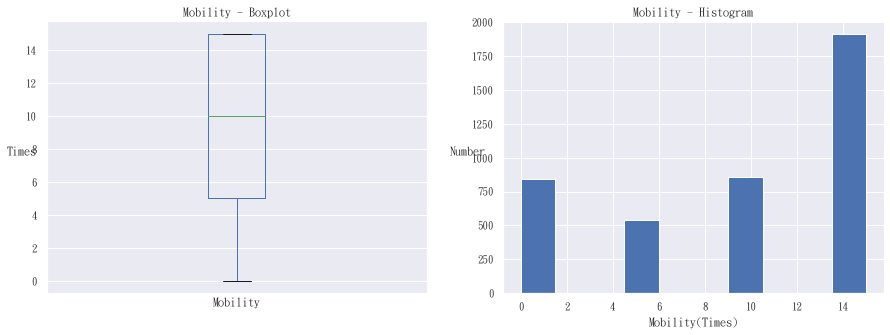

In [279]:
mobility = tsr_6.loc[:, "mobility"]
mobility = pd.to_numeric(mobility, errors = "coerce")
mobility[(mobility < 0 ) | (mobility > 15)] = np.nan
mobility =mobility.fillna(mobility.mode()[0])
#print(mobility)
#print(mobility.value_counts() / len(mobility))
print(mobility.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

mobility.plot.box(ax = ax1)
ax1.set_title("Mobility - Boxplot")
ax1.set_xlabel('Mobility')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

mobility.plot.hist(ax = ax2)
ax2.set_title("Mobility - Histogram")
ax2.set_xlabel('Mobility(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Stairs

count    4151.000000
mean        5.332209
std         4.361466
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: stairs, dtype: float64


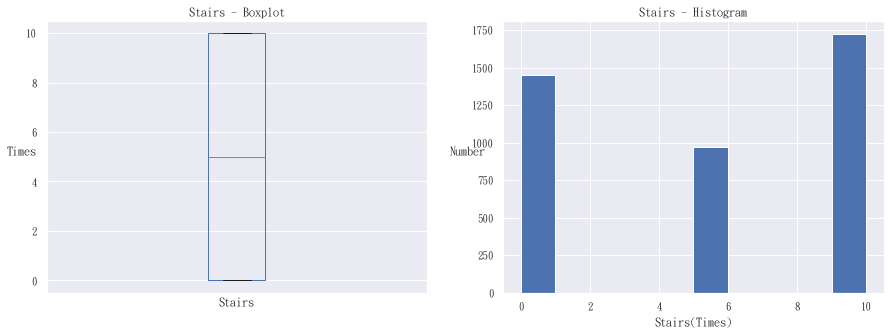

In [280]:
stairs = tsr_6.loc[:, "stairs"]
stairs = pd.to_numeric(stairs, errors = "coerce")
stairs[(stairs < 0 ) | (stairs > 10)] = np.nan
stairs =stairs.fillna(stairs.mode()[0])
#print(stairs)
#print(stairs.value_counts() / len(stairs))
print(stairs.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

stairs.plot.box(ax = ax1)
ax1.set_title("Stairs - Boxplot")
ax1.set_xlabel('Stairs')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

stairs.plot.hist(ax = ax2)
ax2.set_title("Stairs - Histogram")
ax2.set_xlabel('Stairs(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Dressing

count    4151.000000
mean        7.215129
std         3.609121
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: dressing, dtype: float64


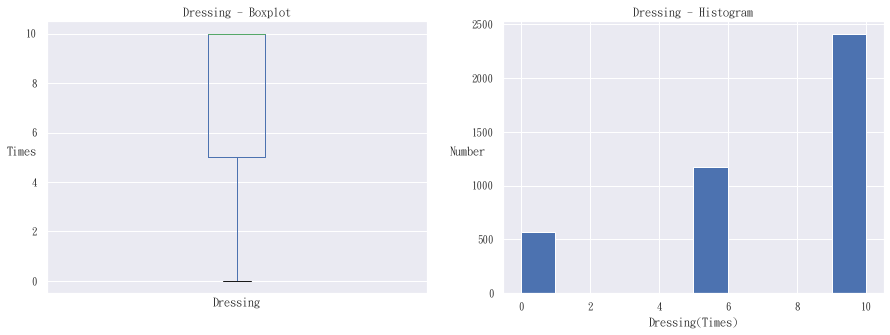

In [281]:
dressing = tsr_6.loc[:, "dressing"]
dressing = pd.to_numeric(dressing, errors = "coerce")
dressing[(dressing < 0 ) | (dressing > 10)] = np.nan
dressing =dressing.fillna(dressing.mode()[0])
#print(dressing)
#print(dressing.value_counts() / len(dressing))
print(dressing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dressing.plot.box(ax = ax1)
ax1.set_title("Dressing - Boxplot")
ax1.set_xlabel('Dressing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

dressing.plot.hist(ax = ax2)
ax2.set_title("Dressing - Histogram")
ax2.set_xlabel('Dressing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bowel Control

count    4151.000000
mean        8.373886
std         3.219958
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bowel_control, dtype: float64


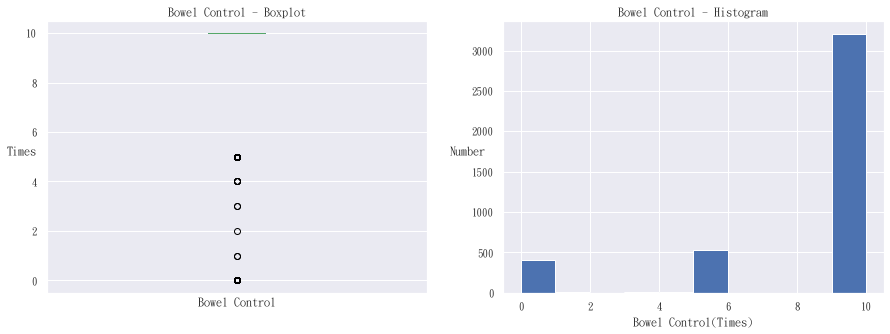

In [282]:
bowel_control = tsr_6.loc[:, "bowel_control"]
bowel_control = pd.to_numeric(bowel_control, errors = "coerce")
bowel_control[(bowel_control < 0 ) | (bowel_control > 10)] = np.nan
bowel_control =bowel_control.fillna(bowel_control.mode()[0])
#print(bowel_control)
#print(bowel_control.value_counts() / len(bowel_control))
print(bowel_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bowel_control.plot.box(ax = ax1)
ax1.set_title("Bowel Control - Boxplot")
ax1.set_xlabel('Bowel Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bowel_control.plot.hist(ax = ax2)
ax2.set_title("Bowel Control - Histogram")
ax2.set_xlabel('Bowel Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Bladder Control

count    4151.000000
mean        8.001445
std         3.487948
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bladder_control, dtype: float64


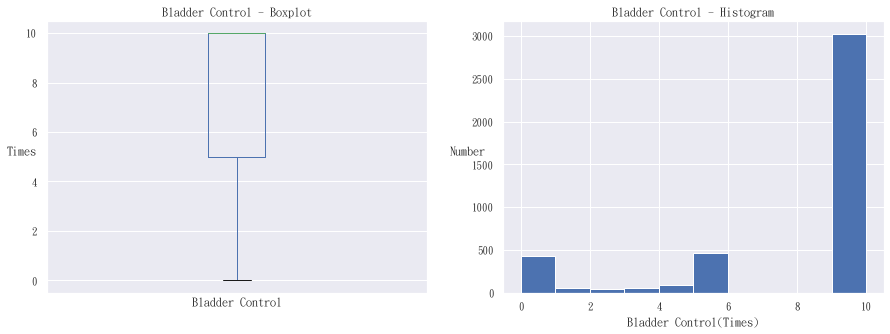

In [283]:
bladder_control = tsr_6.loc[:, "bladder_control"]
bladder_control = pd.to_numeric(bladder_control, errors = "coerce")
bladder_control[(bladder_control < 0 ) | (bladder_control > 10)] = np.nan
bladder_control =bladder_control.fillna(bladder_control.mode()[0])
#print(bladder_control)
#print(bladder_control.value_counts() / len(bladder_control))
print(bladder_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bladder_control.plot.box(ax = ax1)
ax1.set_title("Bladder Control - Boxplot")
ax1.set_xlabel('Bladder Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bladder_control.plot.hist(ax = ax2)
ax2.set_title("Bladder Control - Histogram")
ax2.set_xlabel('Bladder Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total

count    4151.000000
mean       67.143821
std        33.381443
min         0.000000
25%        40.000000
50%        75.000000
75%       100.000000
max       100.000000
dtype: float64


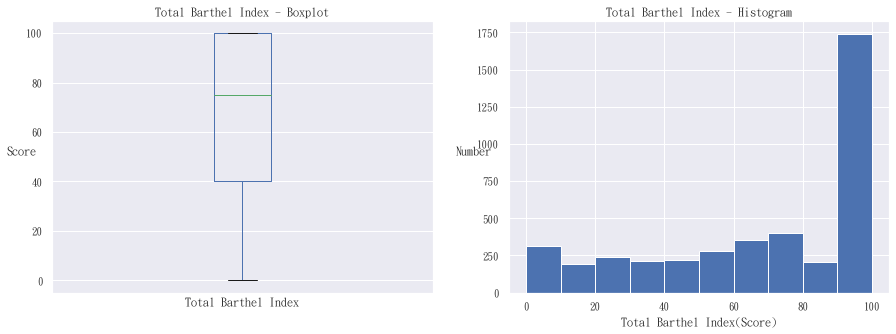

In [284]:
total = feeding + transfers + bathing + toilet_use + grooming + mobility + dressing + stairs + bowel_control + bladder_control
total =total.fillna(total.mean())
#print(total)
#print(total.value_counts() / len(total))
print(total.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total.plot.box(ax = ax1)
ax1.set_title("Total Barthel Index - Boxplot")
ax1.set_xlabel('Total Barthel Index')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total.plot.hist(ax = ax2)
ax2.set_title("Total Barthel Index - Histogram")
ax2.set_xlabel('Total Barthel Index(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Discharged mRS

1.0    0.346904
4.0    0.175620
2.0    0.172729
3.0    0.148157
0.0    0.084076
5.0    0.072513
Name: discharged_mrs, dtype: float64
count    4151.000000
mean        2.201879
std         1.464999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: discharged_mrs, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


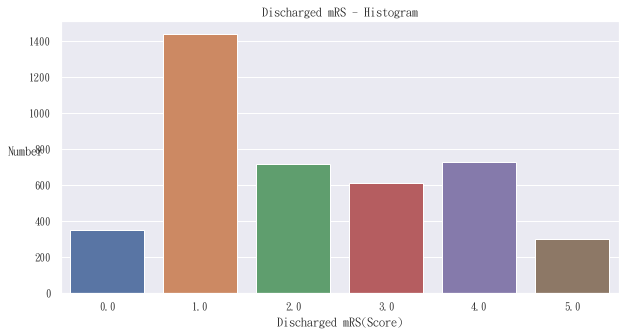

In [285]:
discharged_mrs = tsr_6.loc[:, "discharged_mrs"]
discharged_mrs = pd.to_numeric(discharged_mrs, errors = "coerce")
discharged_mrs[(discharged_mrs != 0) & (discharged_mrs != 1) & (discharged_mrs != 2) & (discharged_mrs != 3) & (discharged_mrs != 4) & (discharged_mrs != 5) & (discharged_mrs != 6)] = np.nan
discharged_mrs = discharged_mrs.fillna(discharged_mrs.mode()[0])
#print(discharged_mrs)
print(discharged_mrs.value_counts() / len(discharged_mrs))
print(discharged_mrs.describe())

sns.countplot(discharged_mrs)
plt.title("Discharged mRS - Histogram")
plt.xlabel('Discharged mRS(Score)')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_CT_Right

N    0.993255
Y    0.006745
Name: cortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


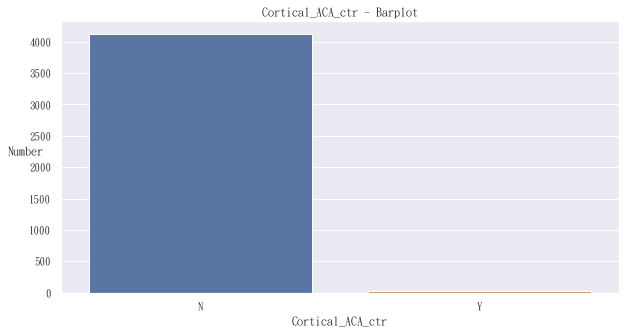

In [286]:
cortical_aca_ctr = tsr_6.loc[:,"cortical_aca_ctr"]
cortical_aca_ctr = cortical_aca_ctr.fillna(cortical_aca_ctr.mode()[0])
#print(cortical_aca_ctr)
print(cortical_aca_ctr.value_counts() / len(cortical_aca_ctr))
#print(cortical_aca_ctr.describe())

sns.countplot(cortical_aca_ctr)
plt.title("Cortical_ACA_ctr - Barplot")
plt.xlabel('Cortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_CT_Right

<ipython-input-287-82b5f34281af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.964105
Y    0.035895
Name: cortical_mca_ctr, dtype: float64


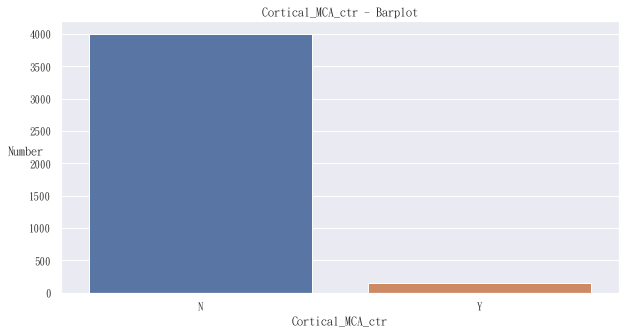

In [287]:
cortical_mca_ctr = tsr_6.loc[:,"cortical_mca_ctr"]
cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
cortical_mca_ctr = cortical_mca_ctr.fillna(cortical_mca_ctr.mode()[0])
#print(cortical_mca_ctr)
print(cortical_mca_ctr.value_counts() / len(cortical_mca_ctr))
#print(cortical_mca_ctr.describe())

sns.countplot(cortical_mca_ctr)
plt.title("Cortical_MCA_ctr - Barplot")
plt.xlabel('Cortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_CT_Right

N    0.99205
Y    0.00795
Name: subcortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


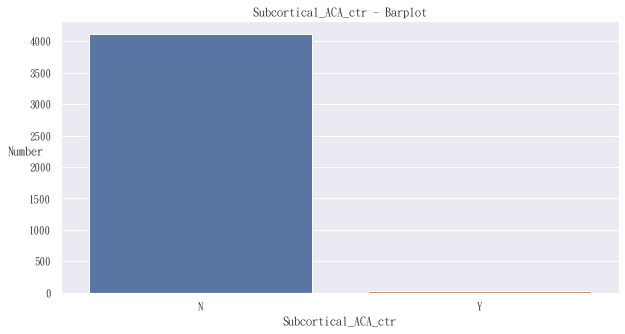

In [288]:
subcortical_aca_ctr = tsr_6.loc[:,"subcortical_aca_ctr"]
subcortical_aca_ctr = subcortical_aca_ctr.fillna(subcortical_aca_ctr.mode()[0])
#print(subcortical_aca_ctr)
print(subcortical_aca_ctr.value_counts() / len(subcortical_aca_ctr))
#print(subcortical_aca_ctr.describe())

sns.countplot(subcortical_aca_ctr)
plt.title("Subcortical_ACA_ctr - Barplot")
plt.xlabel('Subcortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_CT_Right

N    0.932546
Y    0.067454
Name: subcortical_mca_ctr, dtype: float64


<ipython-input-289-4b284eeb1d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


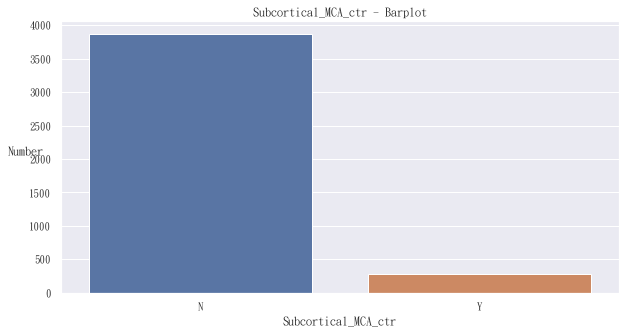

In [289]:
subcortical_mca_ctr = tsr_6.loc[:,"subcortical_mca_ctr"]
subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
subcortical_mca_ctr = subcortical_mca_ctr.fillna(subcortical_mca_ctr.mode()[0])
#print(subcortical_mca_ctr)
print(subcortical_mca_ctr.value_counts() / len(subcortical_mca_ctr))
#print(subcortical_mca_ctr.describe())

sns.countplot(subcortical_mca_ctr)
plt.title("Subcortical_MCA_ctr - Barplot")
plt.xlabel('Subcortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_CT_Right

N    0.990846
Y    0.009154
Name: pca_cortex_ctr, dtype: float64


<ipython-input-290-42f1b080784b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


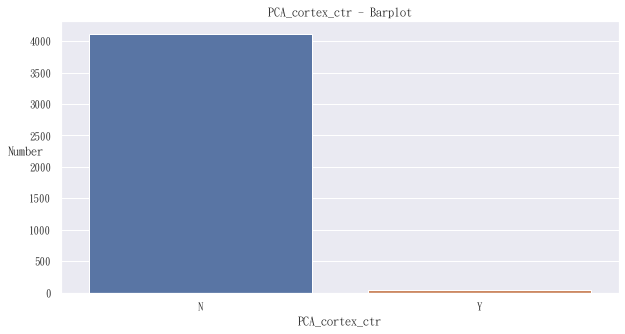

In [290]:
pca_cortex_ctr = tsr_6.loc[:,"pca_cortex_ctr"]
pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
pca_cortex_ctr = pca_cortex_ctr.fillna(pca_cortex_ctr.mode()[0])
#print(pca_cortex_ctr)
print(pca_cortex_ctr.value_counts() / len(pca_cortex_ctr))
#print(pca_cortex_ctr.describe())

sns.countplot(pca_cortex_ctr)
plt.title("PCA_cortex_ctr - Barplot")
plt.xlabel('PCA_cortex_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_CT_Right

N    0.989159
Y    0.010841
Name: thalamus_ctr, dtype: float64


<ipython-input-291-fd9a569dab9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_ctr[thalamus_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


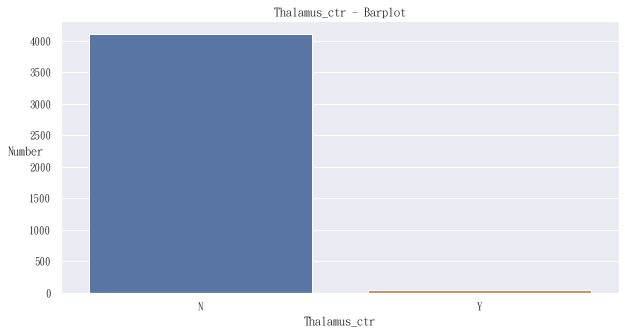

In [291]:
thalamus_ctr = tsr_6.loc[:,"thalamus_ctr"]
thalamus_ctr[thalamus_ctr == '0'] = "N"
thalamus_ctr = thalamus_ctr.fillna(thalamus_ctr.mode()[0])
#print(thalamus_ctr)
print(thalamus_ctr.value_counts() / len(thalamus_ctr))
#print(thalamus_ctr.describe())

sns.countplot(thalamus_ctr)
plt.title("Thalamus_ctr - Barplot")
plt.xlabel('Thalamus_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Right

N    0.9894
Y    0.0106
Name: brainstem_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


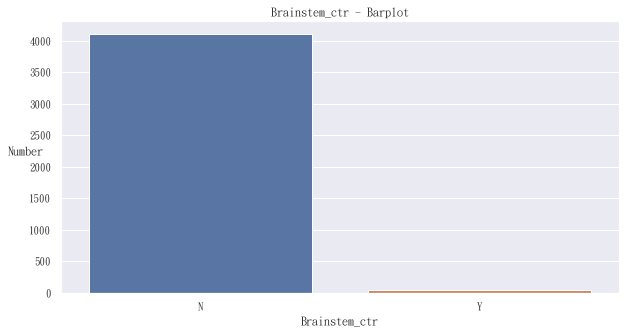

In [292]:
brainstem_ctr = tsr_6.loc[:,"brainstem_ctr"]
brainstem_ctr = brainstem_ctr.fillna(brainstem_ctr.mode()[0])
#print(brainstem_ctr)
print(brainstem_ctr.value_counts() / len(brainstem_ctr))
#print(brainstem_ctr.describe())

sns.countplot(brainstem_ctr)
plt.title("Brainstem_ctr - Barplot")
plt.xlabel('Brainstem_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_CT_Right

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.988196
Y    0.011804
Name: cerebellum_ctr, dtype: float64


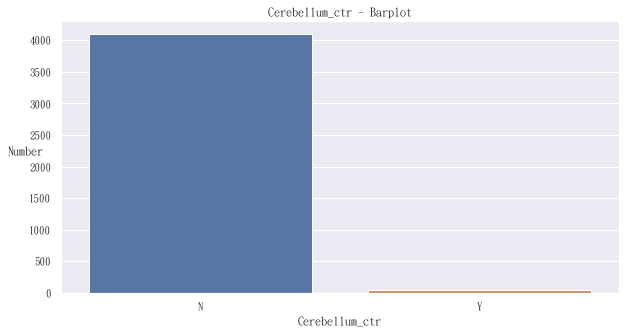

In [293]:
cerebellum_ctr = tsr_6.loc[:,"cerebellum_ctr"]
cerebellum_ctr = cerebellum_ctr.fillna(cerebellum_ctr.mode()[0])
#print(cerebellum_ctr)
print(cerebellum_ctr.value_counts() / len(cerebellum_ctr))
#print(cerebellum_ctr.describe())

sns.countplot(cerebellum_ctr)
plt.title("Cerebellum_ctr - Barplot")
plt.xlabel('Cerebellum_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Right

<ipython-input-294-5c839d323fdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_ctr[watershed_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.980005
Y    0.019995
Name: watershed_ctr, dtype: float64


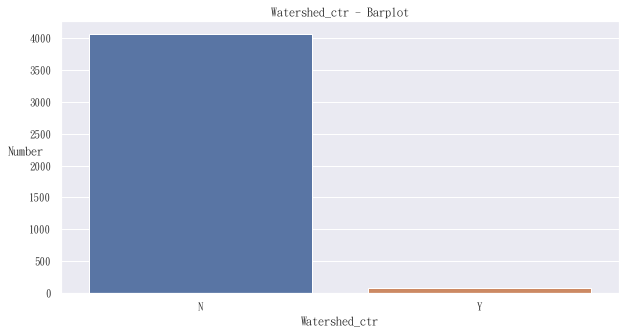

In [294]:
watershed_ctr = tsr_6.loc[:,"watershed_ctr"]
watershed_ctr[watershed_ctr == '0'] = "N"
watershed_ctr = watershed_ctr.fillna(watershed_ctr.mode()[0])
#print(watershed_ctr)
print(watershed_ctr.value_counts() / len(watershed_ctr))
#print(watershed_ctr.describe())

sns.countplot(watershed_ctr)
plt.title("Watershed_ctr - Barplot")
plt.xlabel('Watershed_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_CT_Right

N    0.995905
Y    0.004095
Name: hemorrhagic_infarct_ctr, dtype: float64


<ipython-input-295-49f83a8a3f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


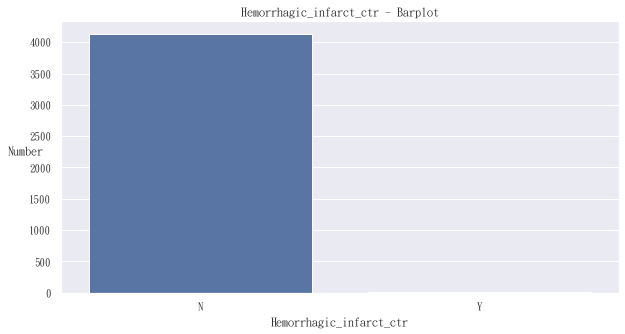

In [295]:
hemorrhagic_infarct_ctr = tsr_6.loc[:,"hemorrhagic_infarct_ctr"]
hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
hemorrhagic_infarct_ctr = hemorrhagic_infarct_ctr.fillna(hemorrhagic_infarct_ctr.mode()[0])
#print(hemorrhagic_infarct_ctr)
print(hemorrhagic_infarct_ctr.value_counts() / len(hemorrhagic_infarct_ctr))
#print(hemorrhagic_infarct_ctr.describe())

sns.countplot(hemorrhagic_infarct_ctr)
plt.title("Hemorrhagic_infarct_ctr - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTci

N    0.961214
Y    0.038786
Name: old_stroke_ctci, dtype: float64


<ipython-input-296-da1b87d718f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


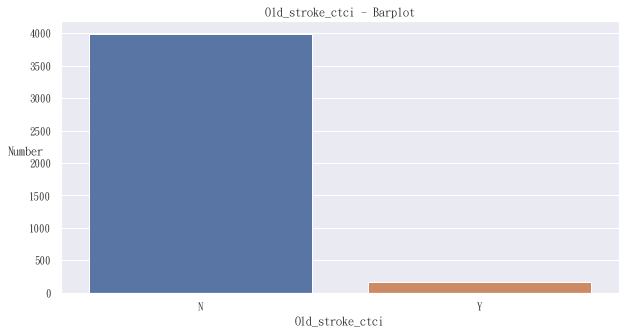

In [296]:
old_stroke_ctci = tsr_6.loc[:,"old_stroke_ctci"]
old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
old_stroke_ctci = old_stroke_ctci.fillna(old_stroke_ctci.mode()[0])
#print(old_stroke_ctci)
print(old_stroke_ctci.value_counts() / len(old_stroke_ctci))
#print(old_stroke_ctci.describe())

sns.countplot(old_stroke_ctci)
plt.title("Old_stroke_ctci - Barplot")
plt.xlabel('Old_stroke_ctci')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_CT_Left

<ipython-input-297-cf9317c51b2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.994459
Y    0.005541
Name: cortical_aca_ctl, dtype: float64


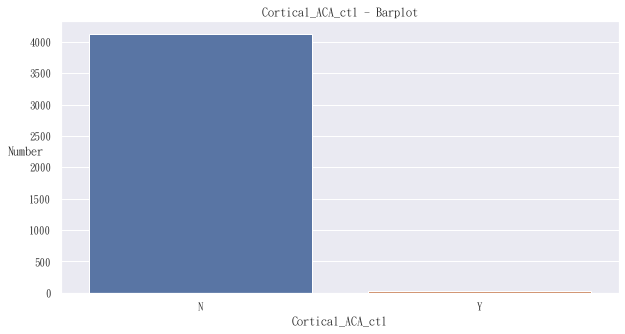

In [297]:
cortical_aca_ctl = tsr_6.loc[:,"cortical_aca_ctl"]
cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
cortical_aca_ctl = cortical_aca_ctl.fillna(cortical_aca_ctl.mode()[0])
#print(cortical_aca_ctl)
print(cortical_aca_ctl.value_counts() / len(cortical_aca_ctl))
#print(cortical_aca_ctl.describe())

sns.countplot(cortical_aca_ctl)
plt.title("Cortical_ACA_ctl - Barplot")
plt.xlabel('Cortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_CT_Left

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.966273
Y    0.033727
Name: cortical_mca_ctl, dtype: float64


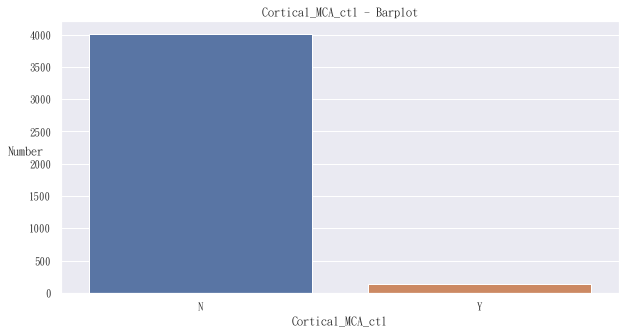

In [298]:
cortical_mca_ctl = tsr_6.loc[:,"cortical_mca_ctl"]
cortical_mca_ctl = cortical_mca_ctl.fillna(cortical_mca_ctl.mode()[0])
#print(cortical_mca_ctl)
print(cortical_mca_ctl.value_counts() / len(cortical_mca_ctl))
#print(cortical_mca_ctl.describe())

sns.countplot(cortical_mca_ctl)
plt.title("Cortical_MCA_ctl - Barplot")
plt.xlabel('Cortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_CT_Left

N    0.989882
Y    0.010118
Name: subcortical_aca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


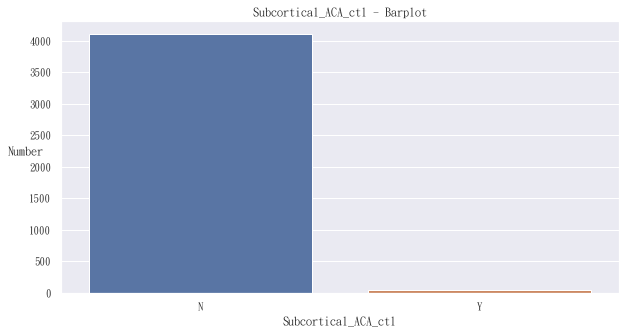

In [299]:
subcortical_aca_ctl = tsr_6.loc[:,"subcortical_aca_ctl"]
subcortical_aca_ctl = subcortical_aca_ctl.fillna(subcortical_aca_ctl.mode()[0])
#print(subcortical_aca_ctl)
print(subcortical_aca_ctl.value_counts() / len(subcortical_aca_ctl))
#print(subcortical_aca_ctl.describe())

sns.countplot(subcortical_aca_ctl)
plt.title("Subcortical_ACA_ctl - Barplot")
plt.xlabel('Subcortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_CT_Left

N    0.931101
Y    0.068899
Name: subcortical_mca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


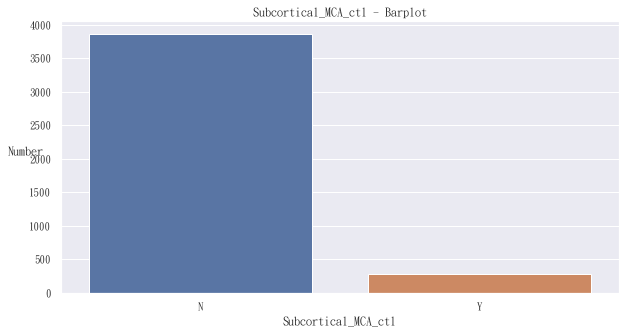

In [300]:
subcortical_mca_ctl = tsr_6.loc[:,"subcortical_mca_ctl"]
subcortical_mca_ctl = subcortical_mca_ctl.fillna(subcortical_mca_ctl.mode()[0])
#print(subcortical_mca_ctl)
print(subcortical_mca_ctl.value_counts() / len(subcortical_mca_ctl))
#print(subcortical_mca_ctl.describe())

sns.countplot(subcortical_mca_ctl)
plt.title("Subcortical_MCA_ctl - Barplot")
plt.xlabel('Subcortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_CT_Left

<ipython-input-301-b7090b7af856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.9894
Y    0.0106
Name: pca_cortex_ctl, dtype: float64


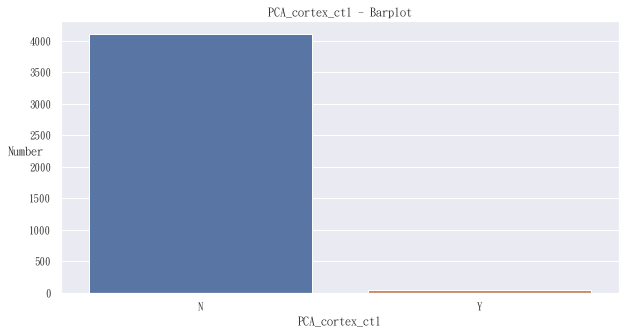

In [301]:
pca_cortex_ctl = tsr_6.loc[:,"pca_cortex_ctl"]
pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
pca_cortex_ctl = pca_cortex_ctl.fillna(pca_cortex_ctl.mode()[0])
#print(pca_cortex_ctl)
print(pca_cortex_ctl.value_counts() / len(pca_cortex_ctl))
#print(pca_cortex_ctl.describe())

sns.countplot(pca_cortex_ctl)
plt.title("PCA_cortex_ctl - Barplot")
plt.xlabel('PCA_cortex_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_CT_Left

N    0.990605
Y    0.009395
Name: thalamus_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


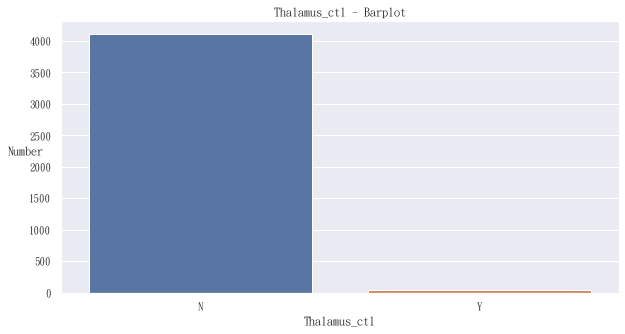

In [302]:
thalamus_ctl = tsr_6.loc[:,"thalamus_ctl"]
thalamus_ctl = thalamus_ctl.fillna(thalamus_ctl.mode()[0])
#print(thalamus_ctl)
print(thalamus_ctl.value_counts() / len(thalamus_ctl))
#print(thalamus_ctl.describe())

sns.countplot(thalamus_ctl)
plt.title("Thalamus_ctl - Barplot")
plt.xlabel('Thalamus_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Left

<ipython-input-303-dfe6f55ac784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_ctl[brainstem_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.988918
Y    0.011082
Name: brainstem_ctl, dtype: float64


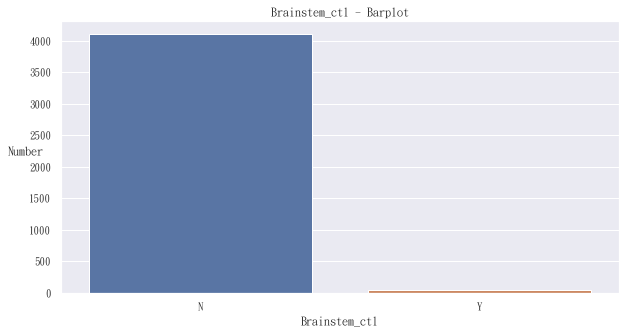

In [303]:
brainstem_ctl = tsr_6.loc[:,"brainstem_ctl"]
brainstem_ctl[brainstem_ctl =='0'] = 'N'
brainstem_ctl = brainstem_ctl.fillna(brainstem_ctl.mode()[0])
#print(brainstem_ctl)
print(brainstem_ctl.value_counts() / len(brainstem_ctl))
#print(brainstem_ctl.describe())

sns.countplot(brainstem_ctl)
plt.title("Brainstem_ctl - Barplot")
plt.xlabel('Brainstem_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_CT_Left

N    0.990846
Y    0.009154
Name: cerebellum_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


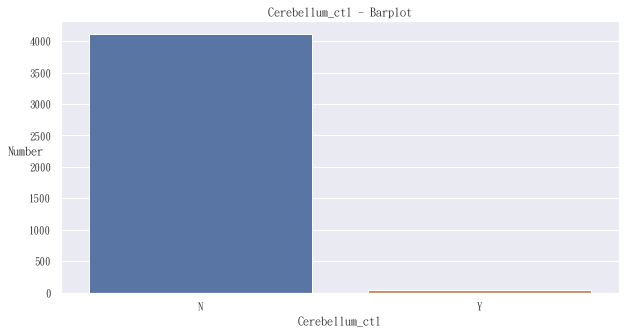

In [304]:
cerebellum_ctl = tsr_6.loc[:,"cerebellum_ctl"]
cerebellum_ctl = cerebellum_ctl.fillna(cerebellum_ctl.mode()[0])
#print(cerebellum_ctl)
print(cerebellum_ctl.value_counts() / len(cerebellum_ctl))
#print(cerebellum_ctl.describe())

sns.countplot(cerebellum_ctl)
plt.title("Cerebellum_ctl - Barplot")
plt.xlabel('Cerebellum_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Left

N    0.998073
Y    0.001927
Name: watershed_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


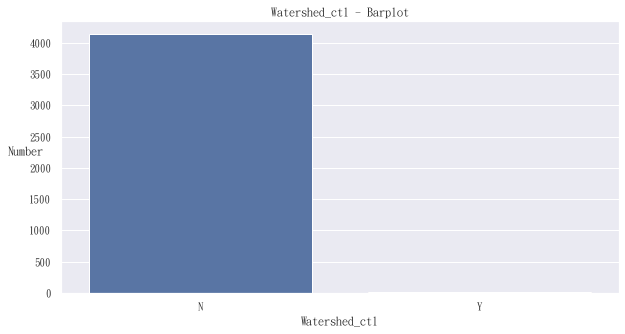

In [305]:
watershed_ctl = tsr_6.loc[:,"watershed_ctl"]
watershed_ctl = watershed_ctl.fillna(watershed_ctl.mode()[0])
#print(watershed_ctl)
print(watershed_ctl.value_counts() / len(watershed_ctl))
#print(watershed_ctl.describe())

sns.countplot(watershed_ctl)
plt.title("Watershed_ctl - Barplot")
plt.xlabel('Watershed_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_CT_Left

<ipython-input-306-16726d4cb7b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996868
Y    0.003132
Name: hemorrhagic_infarct_ctl, dtype: float64


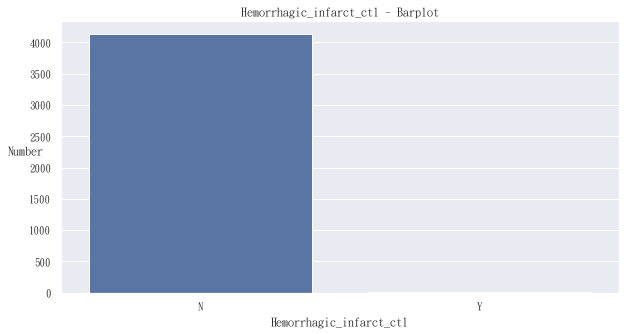

In [306]:
hemorrhagic_infarct_ctl = tsr_6.loc[:,"hemorrhagic_infarct_ctl"]
hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
hemorrhagic_infarct_ctl = hemorrhagic_infarct_ctl.fillna(hemorrhagic_infarct_ctl.mode()[0])
#print(hemorrhagic_infarct_ctl)
print(hemorrhagic_infarct_ctl.value_counts() / len(hemorrhagic_infarct_ctl))
#print(hemorrhagic_infarct_ctl.describe())

sns.countplot(hemorrhagic_infarct_ctl)
plt.title("Hemorrhagic_infarct_ctl - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTch

N    0.984582
Y    0.015418
Name: old_stroke_ctch, dtype: float64


<ipython-input-307-fc93d5a088fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


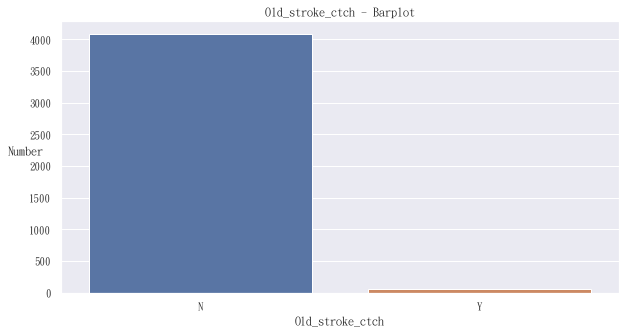

In [307]:
old_stroke_ctch = tsr_6.loc[:,"old_stroke_ctch"]
old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
old_stroke_ctch = old_stroke_ctch.fillna(old_stroke_ctch.mode()[0])
#print(old_stroke_ctch)
print(old_stroke_ctch.value_counts() / len(old_stroke_ctch))
#print(old_stroke_ctch.describe())

sns.countplot(old_stroke_ctch)
plt.title("Old_stroke_ctch - Barplot")
plt.xlabel('Old_stroke_ctch')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_MRI_Right

N    0.990364
Y    0.009636
Name: cortical_aca_mrir, dtype: float64


<ipython-input-308-317401f8116e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


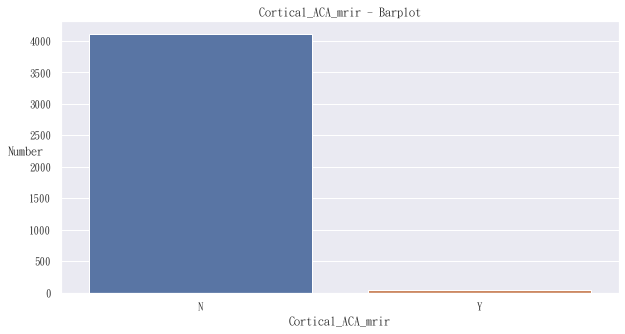

In [308]:
cortical_aca_mrir = tsr_6.loc[:,"cortical_aca_mrir"]
cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
cortical_aca_mrir = cortical_aca_mrir.fillna(cortical_aca_mrir.mode()[0])
#print(cortical_aca_mrir)
print(cortical_aca_mrir.value_counts() / len(cortical_aca_mrir))
#print(cortical_aca_mrir.describe())

sns.countplot(cortical_aca_mrir)
plt.title("Cortical_ACA_mrir - Barplot")
plt.xlabel('Cortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Right

N    0.953264
Y    0.046736
Name: cortical_mca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


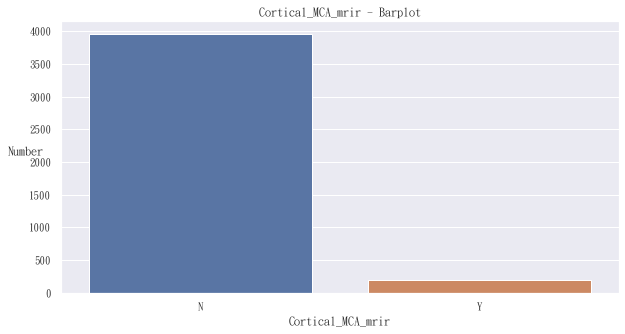

In [309]:
cortical_mca_mrir = tsr_6.loc[:,"cortical_mca_mrir"]
cortical_mca_mrir = cortical_mca_mrir.fillna(cortical_mca_mrir.mode()[0])
#print(cortical_mca_mrir)
print(cortical_mca_mrir.value_counts() / len(cortical_mca_mrir))
#print(cortical_mca_mrir.describe())

sns.countplot(cortical_mca_mrir)
plt.title("Cortical_MCA_mrir - Barplot")
plt.xlabel('Cortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Right

N    0.983137
Y    0.016863
Name: subcortical_aca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


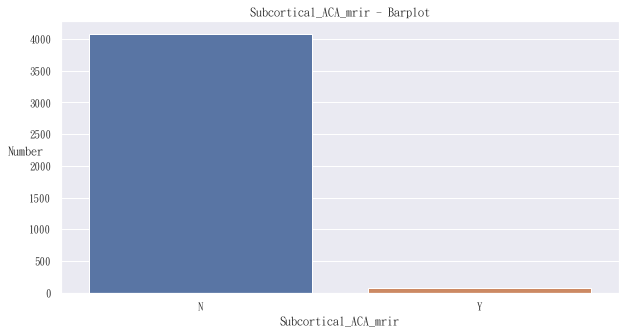

In [310]:
subcortical_aca_mrir = tsr_6.loc[:,"subcortical_aca_mrir"]
subcortical_aca_mrir = subcortical_aca_mrir.fillna(subcortical_aca_mrir.mode()[0])
#print(subcortical_aca_mrir)
print(subcortical_aca_mrir.value_counts() / len(subcortical_aca_mrir))
#print(subcortical_aca_mrir.describe())

sns.countplot(subcortical_aca_mrir)
plt.title("Subcortical_ACA_mrir - Barplot")
plt.xlabel('Subcortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Right

<ipython-input-311-8b03ed36ede5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.907974
Y    0.092026
Name: subcortical_mca_mrir, dtype: float64


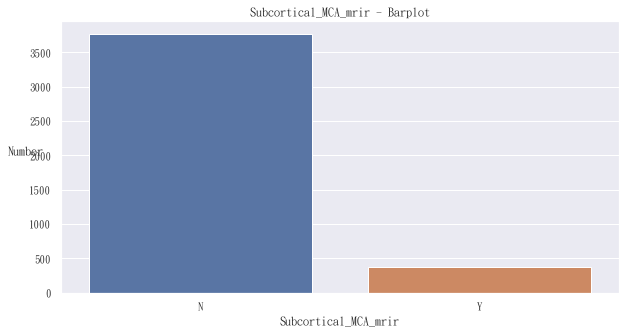

In [311]:
subcortical_mca_mrir = tsr_6.loc[:,"subcortical_mca_mrir"]
subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
subcortical_mca_mrir = subcortical_mca_mrir.fillna(subcortical_mca_mrir.mode()[0])
#print(subcortical_mca_mrir)
print(subcortical_mca_mrir.value_counts() / len(subcortical_mca_mrir))
#print(subcortical_mca_mrir.describe())

sns.countplot(subcortical_mca_mrir)
plt.title("Subcortical_MCA_mrir - Barplot")
plt.xlabel('Subcortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Right

N    0.975428
Y    0.024572
Name: pca_cortex_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


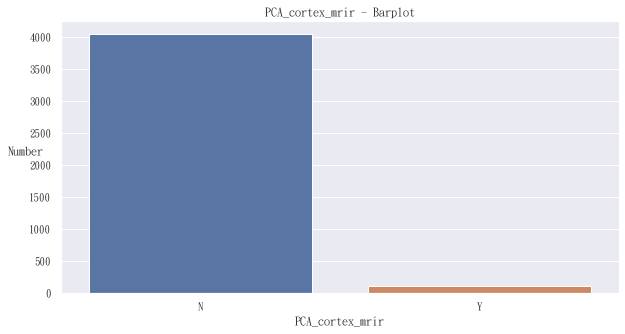

In [312]:
pca_cortex_mrir = tsr_6.loc[:,"pca_cortex_mrir"]
pca_cortex_mrir = pca_cortex_mrir.fillna(pca_cortex_mrir.mode()[0])
#print(pca_cortex_mrir)
print(pca_cortex_mrir.value_counts() / len(pca_cortex_mrir))
#print(pca_cortex_mrir.describe())

sns.countplot(pca_cortex_mrir)
plt.title("PCA_cortex_mrir - Barplot")
plt.xlabel('PCA_cortex_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Right

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.97615
Y    0.02385
Name: thalamus_mrir, dtype: float64


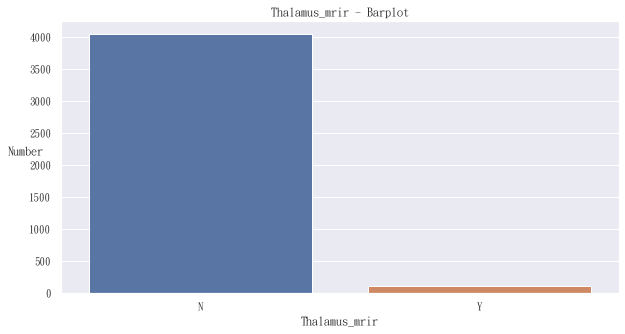

In [313]:
thalamus_mrir = tsr_6.loc[:,"thalamus_mrir"]
thalamus_mrir = thalamus_mrir.fillna(thalamus_mrir.mode()[0])
#print(thalamus_mrir)
print(thalamus_mrir.value_counts() / len(thalamus_mrir))
#print(thalamus_mrir.describe())

sns.countplot(thalamus_mrir)
plt.title("Thalamus_mrir - Barplot")
plt.xlabel('Thalamus_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Right

<ipython-input-314-479383106bd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mrir[brainstem_mrir == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.952782
Y    0.047218
Name: brainstem_mrir, dtype: float64


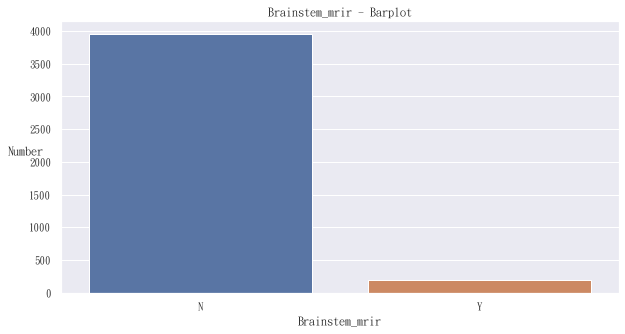

In [314]:
brainstem_mrir = tsr_6.loc[:,"brainstem_mrir"]
brainstem_mrir[brainstem_mrir == '0'] = "N"
brainstem_mrir = brainstem_mrir.fillna(brainstem_mrir.mode()[0])
#print(brainstem_mrir)
print(brainstem_mrir.value_counts() / len(brainstem_mrir))
#print(brainstem_mrir.describe())

sns.countplot(brainstem_mrir)
plt.title("Brainstem_mrir - Barplot")
plt.xlabel('Brainstem_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Right

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.969887
Y    0.030113
Name: cerebellum_mrir, dtype: float64


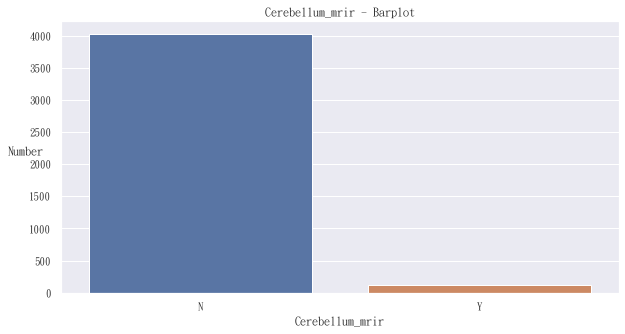

In [315]:
cerebellum_mrir = tsr_6.loc[:,"cerebellum_mrir"]
cerebellum_mrir = cerebellum_mrir.fillna(cerebellum_mrir.mode()[0])
#print(cerebellum_mrir)
print(cerebellum_mrir.value_counts() / len(cerebellum_mrir))
#print(cerebellum_mrir.describe())

sns.countplot(cerebellum_mrir)
plt.title("Cerebellum_mrir - Barplot")
plt.xlabel('Cerebellum_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Right

<ipython-input-316-d4e2a09bb86f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mrir[watershed_mrir =='0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.982655
Y    0.017345
Name: watershed_mrir, dtype: float64


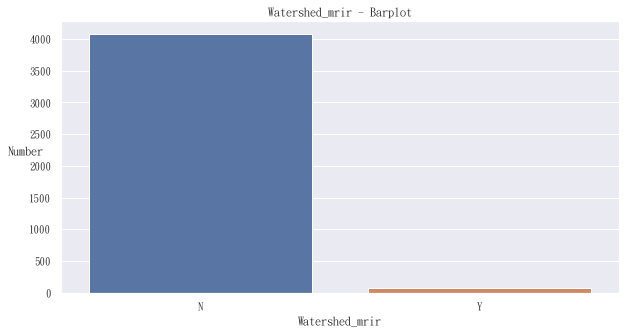

In [316]:
watershed_mrir = tsr_6.loc[:,"watershed_mrir"]
watershed_mrir[watershed_mrir =='0'] = "N"
watershed_mrir = watershed_mrir.fillna(watershed_mrir.mode()[0])
#print(watershed_mrir)
print(watershed_mrir.value_counts() / len(watershed_mrir))
#print(watershed_mrir.describe())

sns.countplot(watershed_mrir)
plt.title("Watershed_mrir - Barplot")
plt.xlabel('Watershed_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Right

N    0.993496
Y    0.006504
Name: hemorrhagic_infarct_mrir, dtype: float64


<ipython-input-317-35dac4dda2ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


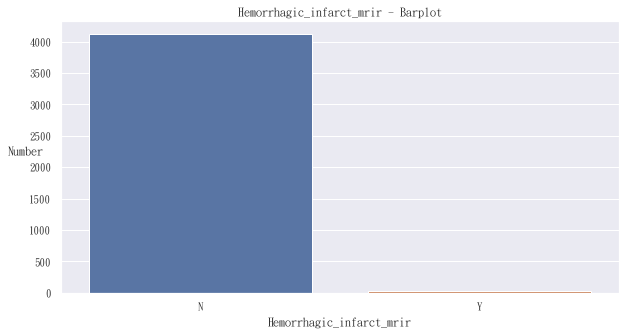

In [317]:
hemorrhagic_infarct_mrir = tsr_6.loc[:,"hemorrhagic_infarct_mrir"]
hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
hemorrhagic_infarct_mrir = hemorrhagic_infarct_mrir.fillna(hemorrhagic_infarct_mrir.mode()[0])
#print(hemorrhagic_infarct_mrir)
print(hemorrhagic_infarct_mrir.value_counts() / len(hemorrhagic_infarct_mrir))
#print(hemorrhagic_infarct_mrir.describe())

sns.countplot(hemorrhagic_infarct_mrir)
plt.title("Hemorrhagic_infarct_mrir - Barplot")
plt.xlabel('Hemorrhagic_infarct_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIci

N    0.9682
Y    0.0318
Name: old_stroke_mrici, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


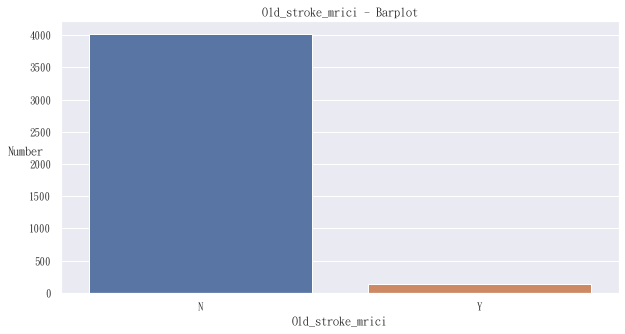

In [318]:
old_stroke_mrici = tsr_6.loc[:,"old_stroke_mrici"]
old_stroke_mrici = old_stroke_mrici.fillna(old_stroke_mrici.mode()[0])
#print(old_stroke_mrici)
print(old_stroke_mrici.value_counts() / len(old_stroke_mrici))
#print(old_stroke_mrici.describe())

sns.countplot(old_stroke_mrici)
plt.title("Old_stroke_mrici - Barplot")
plt.xlabel('Old_stroke_mrici')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_MRI_Left

<ipython-input-319-344e734c6c2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.987955
Y    0.012045
Name: cortical_aca_mril, dtype: float64


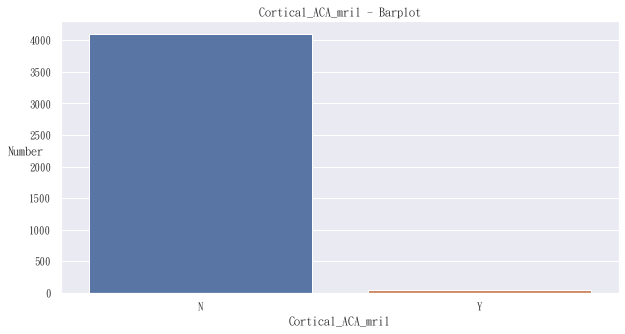

In [319]:
cortical_aca_mril = tsr_6.loc[:,"cortical_aca_mril"]
cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
cortical_aca_mril = cortical_aca_mril.fillna(cortical_aca_mril.mode()[0])
#print(cortical_aca_mril)
print(cortical_aca_mril.value_counts() / len(cortical_aca_mril))
#print(cortical_aca_mril.describe()))

sns.countplot(cortical_aca_mril)
plt.title("Cortical_ACA_mril - Barplot")
plt.xlabel('Cortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Left

N    0.952542
Y    0.047458
Name: cortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


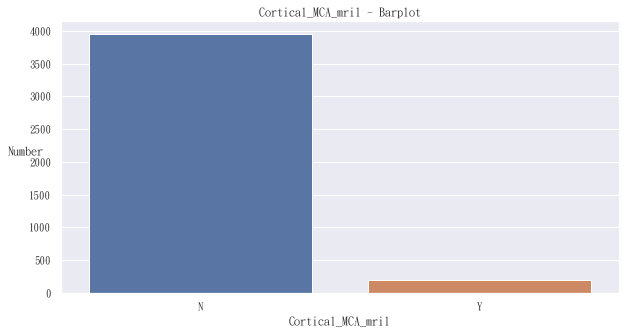

In [320]:
cortical_mca_mril = tsr_6.loc[:,"cortical_mca_mril"]
cortical_mca_mril = cortical_mca_mril.fillna(cortical_mca_mril.mode()[0])
#print(cortical_mca_mril)
print(cortical_mca_mril.value_counts() / len(cortical_mca_mril))
#print(cortical_mca_mril.describe())

sns.countplot(cortical_mca_mril)
plt.title("Cortical_MCA_mril - Barplot")
plt.xlabel('Cortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Left

N    0.984341
Y    0.015659
Name: subcortical_aca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


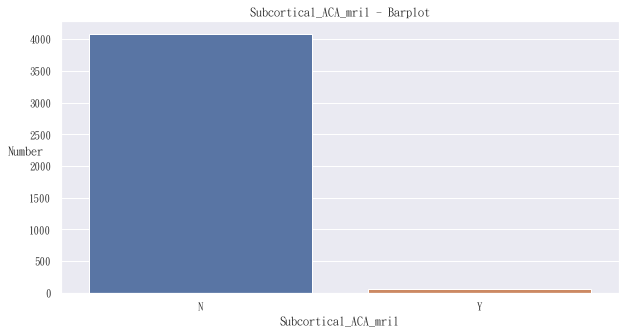

In [321]:
subcortical_aca_mril = tsr_6.loc[:,"subcortical_aca_mril"]
subcortical_aca_mril = subcortical_aca_mril.fillna(subcortical_aca_mril.mode()[0])
#print(subcortical_aca_mril)
print(subcortical_aca_mril.value_counts() / len(subcortical_aca_mril))
#print(subcortical_aca_mril.describe())

sns.countplot(subcortical_aca_mril)
plt.title("Subcortical_ACA_mril - Barplot")
plt.xlabel('Subcortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Left

N    0.900988
Y    0.099012
Name: subcortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


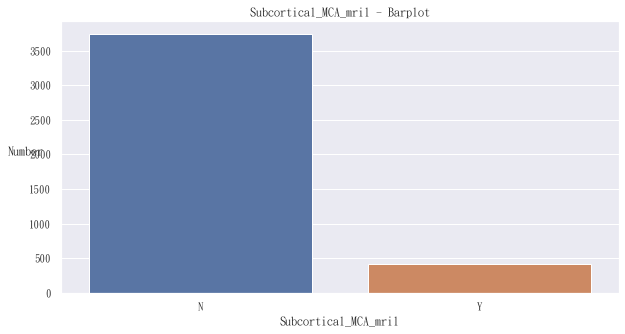

In [322]:
subcortical_mca_mril = tsr_6.loc[:,"subcortical_mca_mril"]
subcortical_mca_mril = subcortical_mca_mril.fillna(subcortical_mca_mril.mode()[0])
#print(subcortical_mca_mril)
print(subcortical_mca_mril.value_counts() / len(subcortical_mca_mril))
#print(subcortical_mca_mril.describe())

sns.countplot(subcortical_mca_mril)
plt.title("Subcortical_MCA_mril - Barplot")
plt.xlabel('Subcortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Left

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.97615
Y    0.02385
Name: pca_cortex_mril, dtype: float64


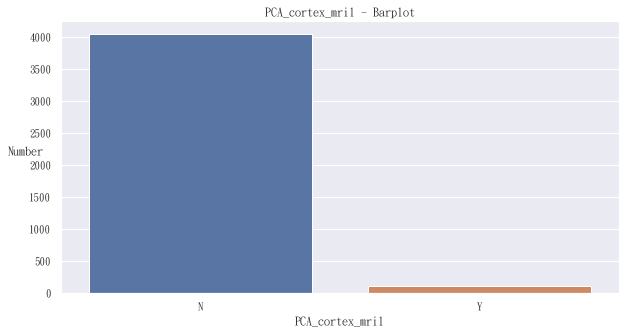

In [323]:
pca_cortex_mril = tsr_6.loc[:,"pca_cortex_mril"]
pca_cortex_mril = pca_cortex_mril.fillna(pca_cortex_mril.mode()[0])
#print(pca_cortex_mril)
print(pca_cortex_mril.value_counts() / len(pca_cortex_mril))
#print(pca_cortex_mril.describe())

sns.countplot(pca_cortex_mril)
plt.title("PCA_cortex_mril - Barplot")
plt.xlabel('PCA_cortex_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Left

<ipython-input-324-0bcee0bf7ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.977355
Y    0.022645
Name: thalamus_mril, dtype: float64


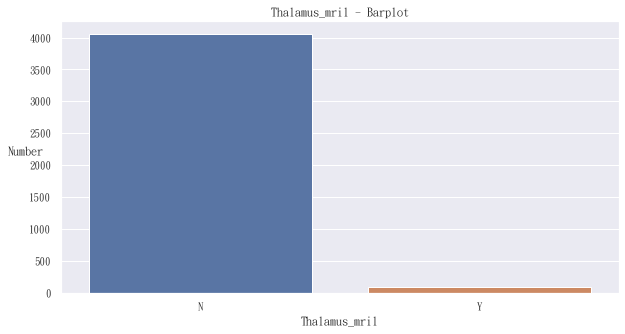

In [324]:
thalamus_mril = tsr_6.loc[:,"thalamus_mril"]
thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
thalamus_mril = thalamus_mril.fillna(thalamus_mril.mode()[0])
#print(thalamus_mril)
print(thalamus_mril.value_counts() / len(thalamus_mril))
#print(thalamus_mril.describe())

sns.countplot(thalamus_mril)
plt.title("Thalamus_mril - Barplot")
plt.xlabel('Thalamus_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Left

N    0.951819
Y    0.048181
Name: brainstem_mril, dtype: float64


<ipython-input-325-fb507ccd89a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


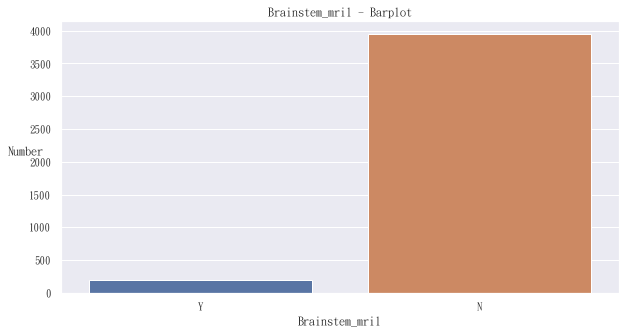

In [325]:
brainstem_mril = tsr_6.loc[:,"brainstem_mril"]
brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
brainstem_mril = brainstem_mril.fillna(brainstem_mril.mode()[0])
#print(brainstem_mril)
print(brainstem_mril.value_counts() / len(brainstem_mril))
#print(brainstem_mril.describe())

sns.countplot(brainstem_mril)
plt.title("Brainstem_mril - Barplot")
plt.xlabel('Brainstem_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Left

N    0.974223
Y    0.025777
Name: cerebellum_mril, dtype: float64


<ipython-input-326-144ee4359284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


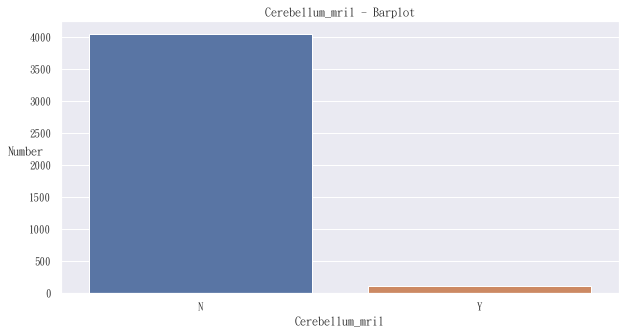

In [326]:
cerebellum_mril = tsr_6.loc[:,"cerebellum_mril"]
cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
cerebellum_mril = cerebellum_mril.fillna(cerebellum_mril.mode()[0])
#print(cerebellum_mril)
print(cerebellum_mril.value_counts() / len(cerebellum_mril))
#print(cerebellum_mril.describe())

sns.countplot(cerebellum_mril)
plt.title("Cerebellum_mril - Barplot")
plt.xlabel('Cerebellum_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Left

N    0.991809
Y    0.008191
Name: watershed_mril, dtype: float64


<ipython-input-327-60b012614c50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


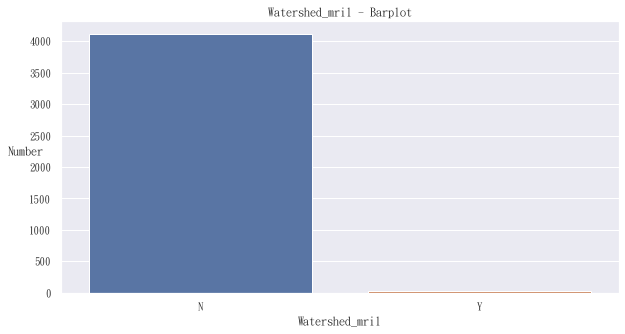

In [327]:
watershed_mril = tsr_6.loc[:,"watershed_mril"]
watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
watershed_mril = watershed_mril.fillna(watershed_mril.mode()[0])
#print(watershed_mril)
print(watershed_mril.value_counts() / len(watershed_mril))
#print(watershed_mril.describe())

sns.countplot(watershed_mril)
plt.title("Watershed_mril - Barplot")
plt.xlabel('Watershed_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Left

N    0.99735
Y    0.00265
Name: hemorrhagic_infarct_mril, dtype: float64


<ipython-input-328-efb49506b1ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


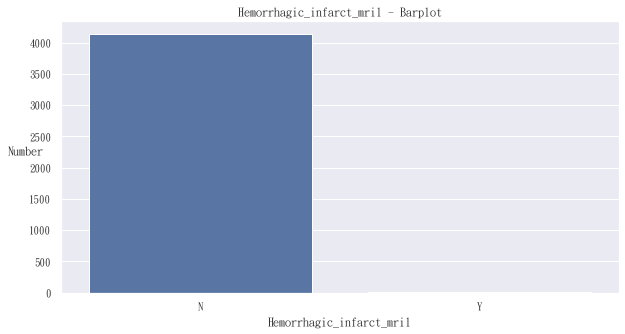

In [328]:
hemorrhagic_infarct_mril = tsr_6.loc[:,"hemorrhagic_infarct_mril"]
hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
hemorrhagic_infarct_mril = hemorrhagic_infarct_mril.fillna(hemorrhagic_infarct_mril.mode()[0])
#print(hemorrhagic_infarct_mril)
print(hemorrhagic_infarct_mril.value_counts() / len(hemorrhagic_infarct_mril))
#print(hemorrhagic_infarct_mril.describe())

sns.countplot(hemorrhagic_infarct_mril)
plt.title("Hemorrhagic_infarct_mril - Barplot")
plt.xlabel('Hemorrhagic_infarct_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIch

N    1.0
Name: old_stroke_mrich, dtype: float64


<ipython-input-329-787f4f65be69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


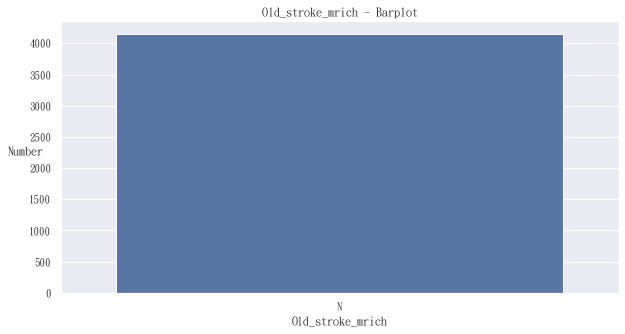

In [329]:
old_stroke_mrich = tsr_6.loc[:,"old_stroke_mrich"]
old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
old_stroke_mrich= old_stroke_mrich.fillna(old_stroke_mrich.mode()[0])
#print(old_stroke_mrich)
print(old_stroke_mrich.value_counts() / len(old_stroke_mrich))
#print(old_stroke_mrich.describe())

sns.countplot(old_stroke_mrich)
plt.title("Old_stroke_mrich - Barplot")
plt.xlabel('Old_stroke_mrich')
plt.ylabel('Number', rotation=0)
plt.show()

# Risk Factors

# Heart Disease

0.0    0.731390
1.0    0.266442
2.0    0.002168
Name: hd_id, dtype: float64


<ipython-input-330-ba35f0187946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


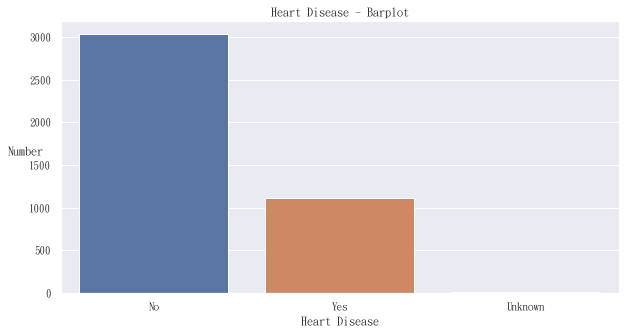

In [330]:
hd_id = tsr_6.loc[:,"hd_id"]
hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
hd_id = hd_id.fillna(hd_id.mode()[0])
#print(hd_id)
print(hd_id.value_counts() / len(hd_id))
#print(hd_id.describe())

hd_id_labels = ["No","Yes","Unknown"]
sns.countplot(hd_id).set_xticklabels(hd_id_labels)
plt.title("Heart Disease - Barplot")
plt.xlabel('Heart Disease')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA

0.0    0.846784
1.0    0.153216
Name: pcva_id, dtype: float64


<ipython-input-331-13b628bcb9c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


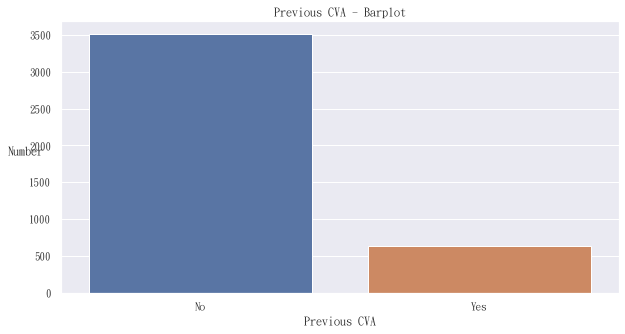

In [331]:
pcva_id = tsr_6.loc[:,"pcva_id"]
pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
pcva_id = pcva_id.fillna(pcva_id.mode()[0])
#print(pcva_id)
print(pcva_id.value_counts() / len(pcva_id))
#print(pcva_id.describe())

#pcva_id_labels = ["No","Yes","Unknown"]
pcva_id_labels = ["No","Yes"]
sns.countplot(pcva_id).set_xticklabels(pcva_id_labels)
plt.title("Previous CVA - Barplot")
plt.xlabel('Previous CVA')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA (Cerebral Infraction)

0.0    0.760540
1.0    0.238738
2.0    0.000723
Name: pcvaci_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


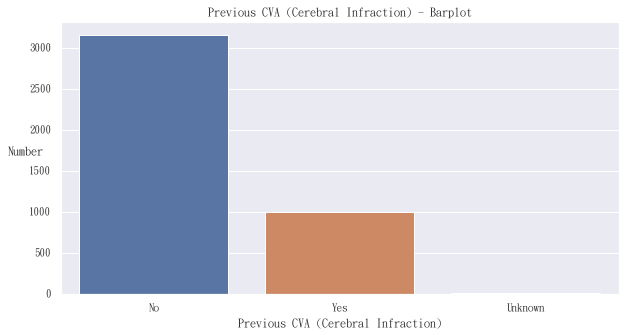

In [332]:
pcvaci_id = tsr_6.loc[:,"pcvaci_id"]
pcvaci_id = pcvaci_id.fillna(pcvaci_id.mode()[0])
#print(pcvaci_id)
print(pcvaci_id.value_counts() / len(pcvaci_id))
#print(pcvaci_id.describe())

pcvaci_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvaci_id).set_xticklabels(pcvaci_id_labels)
plt.title("Previous CVA (Cerebral Infraction) - Barplot")
plt.xlabel('Previous CVA (Cerebral Infraction)')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA (Cerebral Hemorrhage)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.959769
1.0    0.039749
2.0    0.000482
Name: pcvach_id, dtype: float64


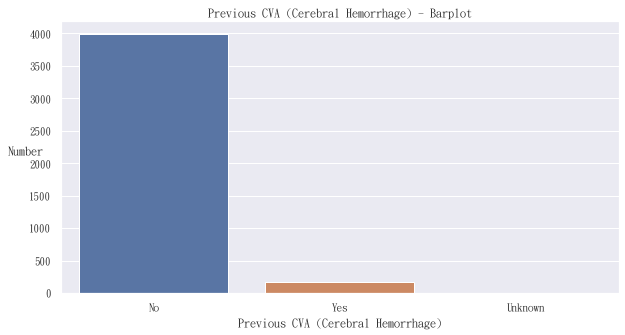

In [333]:
pcvach_id = tsr_6.loc[:,"pcvach_id"]
pcvach_id = pcvach_id.fillna(pcvach_id.mode()[0])
#print(pcvach_id)
print(pcvach_id.value_counts() / len(pcvach_id))
#print(pcvach_id.describe())

pcvach_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvach_id).set_xticklabels(pcvach_id_labels)
plt.title("Previous CVA (Cerebral Hemorrhage) - Barplot")
plt.xlabel('Previous CVA (Cerebral Hemorrhage)')
plt.ylabel('Number', rotation=0)
plt.show()

# Polycythemia

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.993014
1.0    0.005782
2.0    0.001205
Name: po_id, dtype: float64


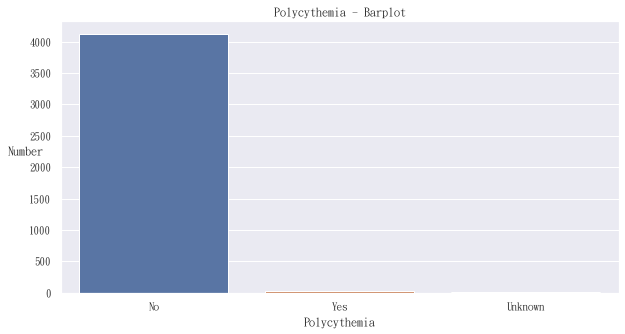

In [334]:
po_id = tsr_6.loc[:,"po_id"]
po_id = po_id.fillna(po_id.mode()[0])
#print(po_id)
print(po_id.value_counts() / len(po_id))
#print(po_id.describe())

po_id_labels = ["No","Yes","Unknown"]
sns.countplot(po_id).set_xticklabels(po_id_labels)
plt.title("Polycythemia - Barplot")
plt.xlabel('Polycythemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Uremia

<ipython-input-335-465d083ea2c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.949169
1.0    0.050349
2.0    0.000482
Name: ur_id, dtype: float64


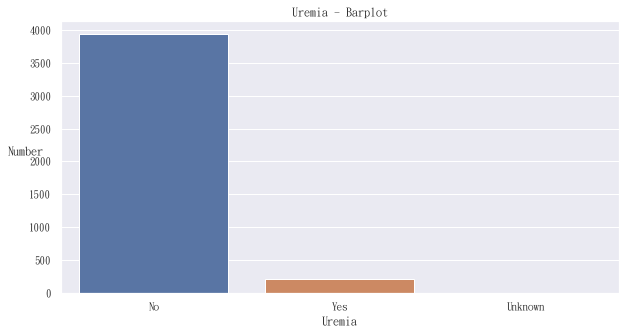

In [335]:
ur_id = tsr_6.loc[:,"ur_id"]
ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
ur_id = ur_id.fillna(ur_id.mode()[0])
#print(ur_id)
print(ur_id.value_counts() / len(ur_id))
#print(ur_id.describe())

ur_id_labels = ["No","Yes","Unknown"]
sns.countplot(ur_id).set_xticklabels(ur_id_labels)
plt.title("Uremia - Barplot")
plt.xlabel('Uremia')
plt.ylabel('Number', rotation=0)
plt.show()

# Smoking

0.0    0.614792
1.0    0.382318
2.0    0.002891
Name: sm_id, dtype: float64


<ipython-input-336-d74e538ddec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


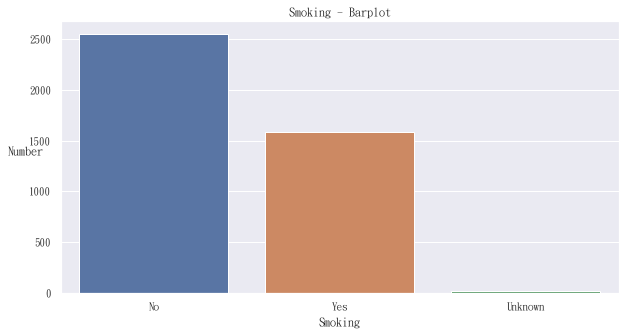

In [336]:
sm_id = tsr_6.loc[:,"sm_id"]
sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
sm_id = sm_id.fillna(sm_id.mode()[0])
#print(sm_id)
print(sm_id.value_counts() / len(sm_id))
#print(sm_id.describe())

sm_id_labels = ["No","Yes","Unknown"]
sns.countplot(sm_id).set_xticklabels(sm_id_labels)
plt.title("Smoking - Barplot")
plt.xlabel('Smoking')
plt.ylabel('Number', rotation=0)
plt.show()

# Smoking (支/天)

<ipython-input-337-f23e1babb178>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       15.498187
std         8.953437
min         0.000000
25%        15.498000
50%        15.498000
75%        20.000000
max        45.000000
Name: smc_nm, dtype: float64


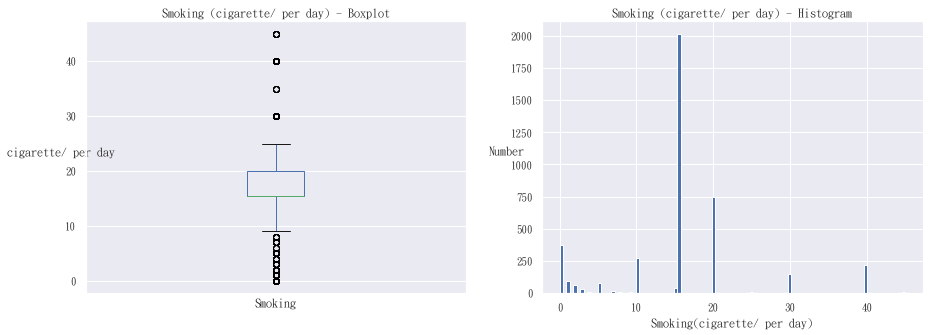

In [337]:
smc_nm = tsr_6.loc[:, "smc_nm"]

q1 = smc_nm.quantile(0.25)
q3 = smc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan

smc_nm =smc_nm.fillna(round(smc_nm.mean(),3))

#print(smc_nm)
#print(smc_nm.value_counts() / len(smc_nm))
print(smc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smc_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (cigarette/ per day) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('cigarette/ per day', rotation=0)
ax1.set_xticks([])

#smc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (cigarette/ per day) - Histogram")
ax2.set_xlabel('Smoking(cigarette/ per day)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Smoking (年)

<ipython-input-338-8a78a9b8491d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan


count    4151.000000
mean       22.759210
std        13.141596
min         0.000000
25%        20.000000
50%        22.759000
75%        25.000000
max        80.000000
Name: smy_nm, dtype: float64


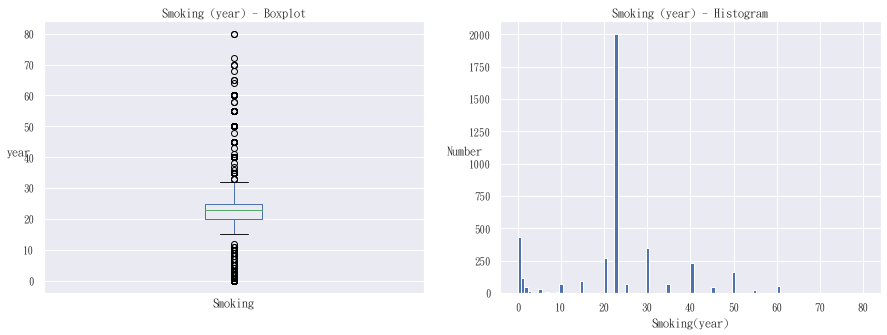

In [338]:
smy_nm = tsr_6.loc[:, "smy_nm"]

q1 = smy_nm.quantile(0.25)
q3 = smy_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan

smy_nm = smy_nm.fillna(round(smy_nm.mean(),3))

#print(smy_nm)
#print(smy_nm.value_counts() / len(smy_nm))
print(smy_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smy_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (year) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('year', rotation=0)
ax1.set_xticks([])

#smy_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smy_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (year) - Histogram")
ax2.set_xlabel('Smoking(year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Smoking Status

1.0    0.887738
2.0    0.112262
Name: smcp_id, dtype: float64


<ipython-input-339-627110f25082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


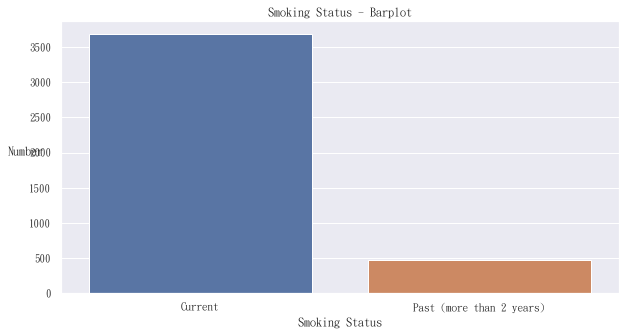

In [339]:
smcp_id = tsr_6.loc[:,"smcp_id"]
smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
smcp_id = smcp_id.fillna(smcp_id.mode()[0])
#print(smcp_id)
print(smcp_id.value_counts() / len(smcp_id))
#print(smcp_id.describe())

smcp_id_labels = ["Current","Past (more than 2 years)"]
sns.countplot(smcp_id).set_xticklabels(smcp_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous TIA

0.0    0.945314
1.0    0.048663
2.0    0.006023
Name: ptia_id, dtype: float64


<ipython-input-340-1c5b94695ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


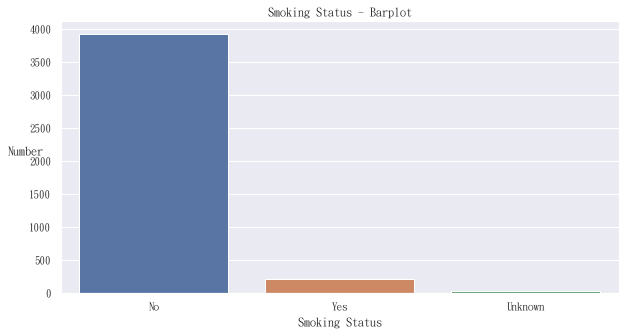

In [340]:
ptia_id = tsr_6.loc[:,"ptia_id"]
ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
ptia_id = ptia_id.fillna(ptia_id.mode()[0])
#print(ptia_id)
print(ptia_id.value_counts() / len(ptia_id))
#print(ptia_id.describe())

ptia_id_labels = ["No","Yes","Unknown"]
sns.countplot(ptia_id).set_xticklabels(ptia_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia

1.0    0.528788
0.0    0.370995
2.0    0.100217
Name: hc_id, dtype: float64


<ipython-input-341-edc3d00c5a0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


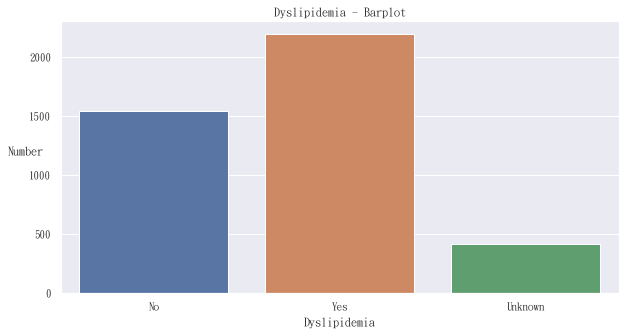

In [341]:
hc_id = tsr_6.loc[:,"hc_id"]
hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
hc_id = hc_id.fillna(hc_id.mode()[0])
#print(hc_id)
print(hc_id.value_counts() / len(hc_id))
#print(hc_id.describe())

hc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hc_id).set_xticklabels(hc_id_labels)
plt.title("Dyslipidemia - Barplot")
plt.xlabel('Dyslipidemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia (Hypertriglyceridemia)

0.0    0.616237
1.0    0.254878
2.0    0.128885
Name: hcht_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


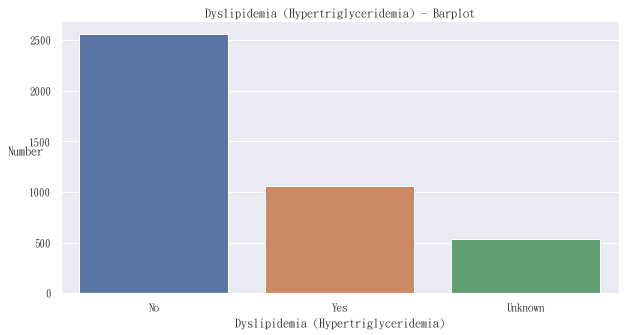

In [342]:
hcht_id = tsr_6.loc[:,"hcht_id"]
hcht_id = hcht_id.fillna(hcht_id.mode()[0])
#print(hcht_id)
print(hcht_id.value_counts() / len(hcht_id))
#print(hcht_id.describe())

hcht_id_labels = ["No","Yes","Unknown"]
sns.countplot(hcht_id).set_xticklabels(hcht_id_labels)
plt.title("Dyslipidemia (Hypertriglyceridemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypertriglyceridemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia (Hypercholesterolemia)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.516743
1.0    0.375572
2.0    0.107685
Name: hchc_id, dtype: float64


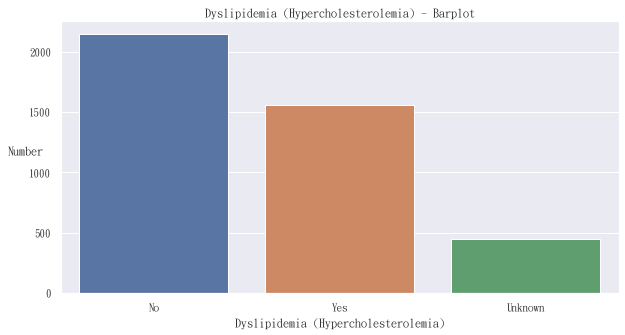

In [343]:
hchc_id = tsr_6.loc[:,"hchc_id"]
hchc_id = hchc_id.fillna(hchc_id.mode()[0])
#print(hchc_id)
print(hchc_id.value_counts() / len(hchc_id))
#print(hchc_id.describe())

hchc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hchc_id).set_xticklabels(hchc_id_labels)
plt.title("Dyslipidemia (Hypercholesterolemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypercholesterolemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hypertension

<ipython-input-344-78ad665017aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.868947
0.0    0.126957
2.0    0.004095
Name: ht_id, dtype: float64


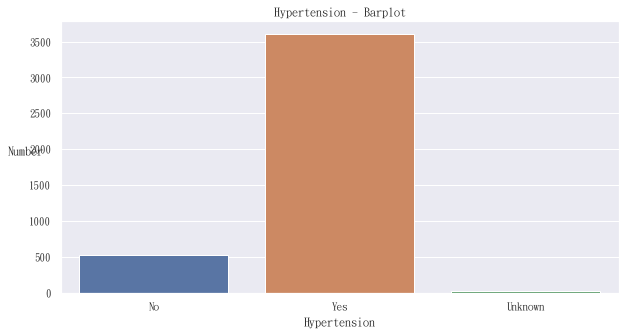

In [344]:
ht_id = tsr_6.loc[:,"ht_id"]
ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
ht_id = ht_id.fillna(ht_id.mode()[0])
#print(ht_id)
print(ht_id.value_counts() / len(ht_id))
#print(ht_id.describe())

ht_id_labels = ["No","Yes","Unknown"]
sns.countplot(ht_id).set_xticklabels(ht_id_labels)
plt.title("Hypertension - Barplot")
plt.xlabel('Hypertension')
plt.ylabel('Number', rotation=0)
plt.show()

# DM

0.0    0.678632
1.0    0.318237
2.0    0.003132
Name: dm_id, dtype: float64


<ipython-input-345-4986fd51d57a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


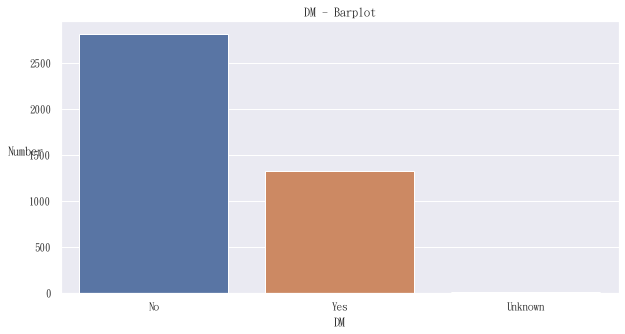

In [345]:
dm_id = tsr_6.loc[:,"dm_id"]
dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
dm_id = dm_id.fillna(dm_id.mode()[0])
#print(dm_id)
print(dm_id.value_counts() / len(dm_id))
#print(dm_id.describe())

dm_id_labels = ["No","Yes","Unknown"]
sns.countplot(dm_id).set_xticklabels(dm_id_labels)
plt.title("DM - Barplot")
plt.xlabel('DM')
plt.ylabel('Number', rotation=0)
plt.show()

# PAD

0.0    0.986509
1.0    0.011804
2.0    0.001686
Name: pad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


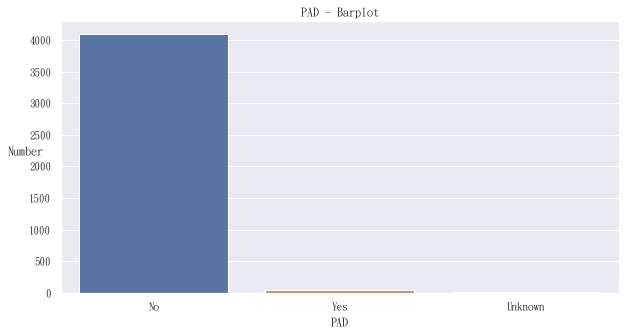

In [346]:
pad_id = tsr_6.loc[:,"pad_id"]
pad_id = pad_id.fillna(pad_id.mode()[0])
#print(pad_id)
print(pad_id.value_counts() / len(pad_id))
#print(pad_id.describe())

pad_id_labels = ["No","Yes","Unknown"]
sns.countplot(pad_id).set_xticklabels(pad_id_labels)
plt.title("PAD - Barplot")
plt.xlabel('PAD')
plt.ylabel('Number', rotation=0)
plt.show()

# Alcohol

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.816430
1.0    0.108889
2.0    0.000723
Name: al_id, dtype: float64


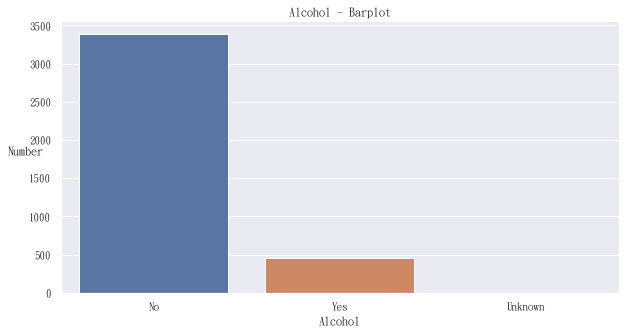

In [347]:
al_id = tsr_6.loc[:,"al_id"]
al_id = pd.to_numeric(al_id, errors = 'coerce')
al_id[(al_id != 0) & (al_id != 1) & (al_id != 2)] = np.nan
#al_id = al_id.fillna(al_id.mode()[0])
#print(al_id)
print(al_id.value_counts() / len(al_id))
#print(al_id.describe())

al_id_labels = ["No","Yes","Unknown"]
sns.countplot(al_id).set_xticklabels(al_id_labels)
plt.title("Alcohol - Barplot")
plt.xlabel('Alcohol')
plt.ylabel('Number', rotation=0)
plt.show()
al_id = al_id.fillna(999)

# Cancer

0.0    0.904842
1.0    0.013250
Name: ca_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


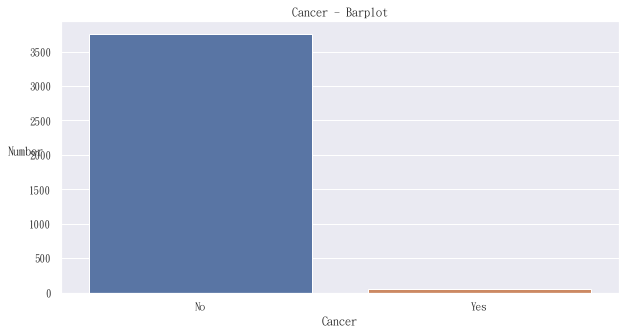

In [348]:
ca_id = tsr_6.loc[:,"ca_id"]
ca_id = pd.to_numeric(ca_id, errors = 'coerce')
ca_id[(ca_id != 0) & (ca_id != 1) & (ca_id != 2)] = np.nan
#ca_id = ca_id.fillna(ca_id.mode()[0])
#print(ca_id)
print(ca_id.value_counts() / len(ca_id))
#print(ca_id.describe())

#ca_id_labels = ["No","Yes", "Unknown"]
ca_id_labels = ["No","Yes"]
sns.countplot(ca_id).set_xticklabels(ca_id_labels)
plt.title("Cancer - Barplot")
plt.xlabel('Cancer')
plt.ylabel('Number', rotation=0)
plt.show()
ca_id = ca_id.fillna(999)

# Others

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.868225
1.0    0.131775
Name: ot_id, dtype: float64


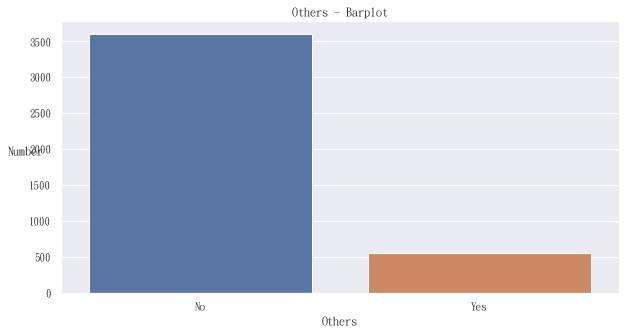

In [349]:
ot_id = tsr_6.loc[:,"ot_id"]
ot_id = pd.to_numeric(ot_id, errors = 'coerce')
ot_id[(ot_id != 0) & (ot_id != 1) & (ot_id != 2)] = np.nan
ot_id = ot_id.fillna(ot_id.mode()[0])
#print(ot_id)
print(ot_id.value_counts() / len(ot_id))
#print(ot_id.describe())

ot_id_labels = ["No","Yes"]
sns.countplot(ot_id).set_xticklabels(ot_id_labels)
plt.title("Others - Barplot")
plt.xlabel('Others')
plt.ylabel('Number', rotation=0)
plt.show()

# Hypertension Was Diagnosed at This Visit

<ipython-input-350-a99b96870b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[thishy_id == "1"] = "Y"
<ipython-input-350-a99b96870b8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.997591
Y    0.002409
Name: thishy_id, dtype: float64


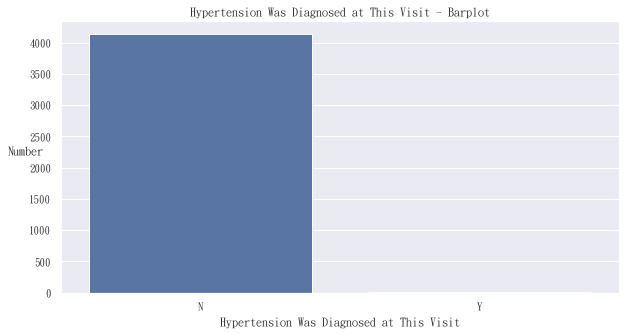

In [350]:
thishy_id = tsr_6.loc[:,"thishy_id"]
thishy_id[thishy_id == "1"] = "Y"
thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
thishy_id = thishy_id.fillna(thishy_id.mode()[0])
#print(thishy_id)
print(thishy_id.value_counts() / len(thishy_id))
#print(thishy_id.describe())

sns.countplot(thishy_id)
plt.title("Hypertension Was Diagnosed at This Visit - Barplot")
plt.xlabel('Hypertension Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

# DM Was Diagnosed at This Visit

N    0.996386
Y    0.003614
Name: thisdi_id, dtype: float64


<ipython-input-351-6d3bb7ff4fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "1"] = 1
<ipython-input-351-6d3bb7ff4fe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "0"] = 0
<ipython-input-351-6d3bb7ff4fe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == 1] = "Y"
<ipython-input-351-6d3bb7ff4fe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

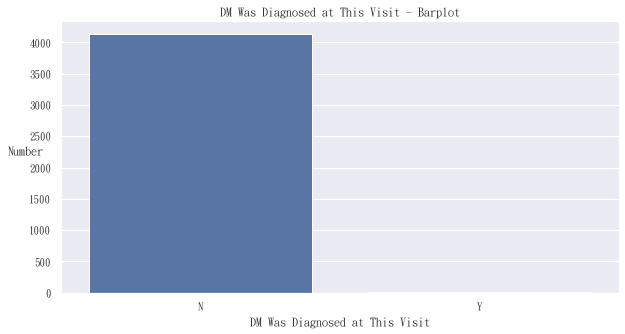

In [351]:
thisdi_id = tsr_6.loc[:,"thisdi_id"]
thisdi_id[thisdi_id == "1"] = 1
thisdi_id[thisdi_id == "0"] = 0
thisdi_id[thisdi_id == 1] = "Y"
thisdi_id[thisdi_id == 0] = "N"
thisdi_id[(thisdi_id != "N") & (thisdi_id != "Y")] = np.nan
thisdi_id = thisdi_id.fillna(thisdi_id.mode()[0])
#print(thisdi_id)
print(thisdi_id.value_counts() / len(thisdi_id))
#print(thisdi_id.describe())

sns.countplot(thisdi_id)
plt.title("DM Was Diagnosed at This Visit - Barplot")
plt.xlabel('DM Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_1

2.0    0.911588
0.0    0.067935
1.0    0.020477
Name: fahiid_parents_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


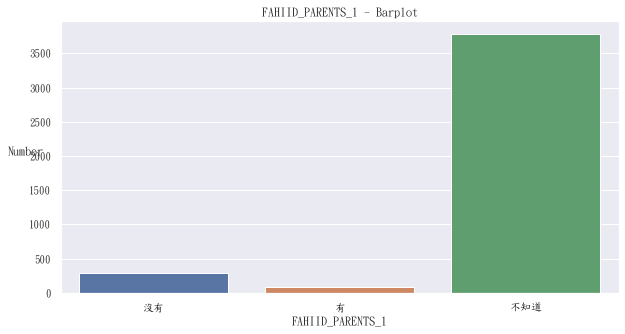

In [352]:
fahiid_parents_1 = tsr_6.loc[:,"fahiid_parents_1"]
fahiid_parents_1 = fahiid_parents_1.fillna(fahiid_parents_1.mode()[0])
#print(fahiid_parents_1)
print(fahiid_parents_1.value_counts() / len(fahiid_parents_1))
#print(fahiid_parents_1.describe())

fahiid_parents_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_1).set_xticklabels(fahiid_parents_1_labels)
plt.title("FAHIID_PARENTS_1 - Barplot")
plt.xlabel('FAHIID_PARENTS_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_2

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.909901
0.0    0.073717
1.0    0.016382
Name: fahiid_parents_2, dtype: float64


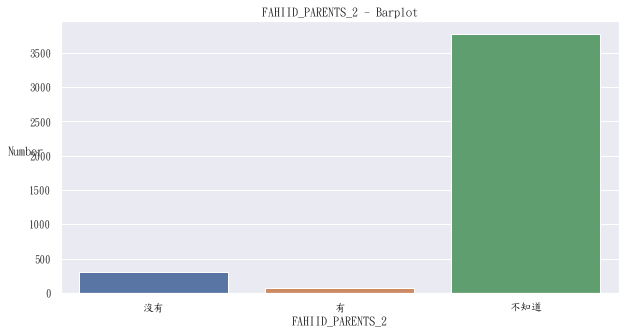

In [353]:
fahiid_parents_2 = tsr_6.loc[:,"fahiid_parents_2"]
fahiid_parents_2 = fahiid_parents_2.fillna(fahiid_parents_2.mode()[0])
#print(fahiid_parents_2)
print(fahiid_parents_2.value_counts() / len(fahiid_parents_2))
#print(fahiid_parents_2.describe())

fahiid_parents_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_2).set_xticklabels(fahiid_parents_2_labels)
plt.title("FAHIID_PARENTS_2 - Barplot")
plt.xlabel('FAHIID_PARENTS_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_3

<ipython-input-354-73f01cb00b69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.906529
0.0    0.075163
1.0    0.018309
Name: fahiid_parents_3, dtype: float64


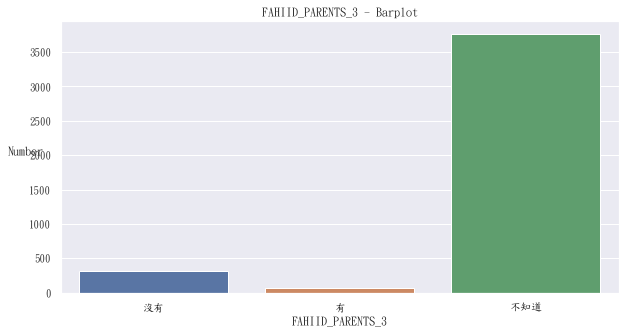

In [354]:
fahiid_parents_3 = tsr_6.loc[:,"fahiid_parents_3"]
fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
fahiid_parents_3 = fahiid_parents_3.fillna(fahiid_parents_3.mode()[0])
#print(fahiid_parents_3)
print(fahiid_parents_3.value_counts() / len(fahiid_parents_3))
#print(fahiid_parents_3.describe())

fahiid_parents_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_3).set_xticklabels(fahiid_parents_3_labels)
plt.title("FAHIID_PARENTS_3 - Barplot")
plt.xlabel('FAHIID_PARENTS_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_4

2.0    0.867984
0.0    0.108889
1.0    0.023127
Name: fahiid_parents_4, dtype: float64


<ipython-input-355-49b82446e2c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


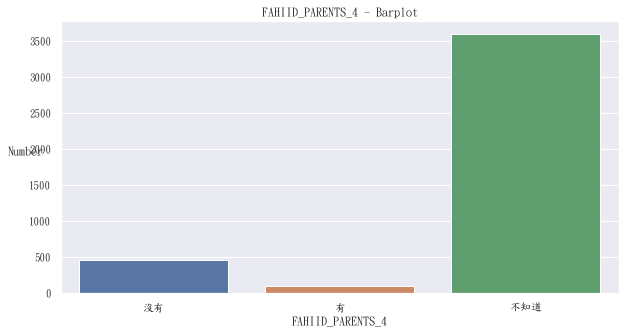

In [355]:
fahiid_parents_4 = tsr_6.loc[:,"fahiid_parents_4"]
fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
fahiid_parents_4 = fahiid_parents_4.fillna(fahiid_parents_4.mode()[0])
#print(fahiid_parents_4)
print(fahiid_parents_4.value_counts() / len(fahiid_parents_4))
#print(fahiid_parents_4.describe())

fahiid_parents_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_4).set_xticklabels(fahiid_parents_4_labels)
plt.title("FAHIID_PARENTS_4 - Barplot")
plt.xlabel('FAHIID_PARENTS_4')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_1

0.0    0.761985
2.0    0.151530
1.0    0.086485
Name: fahiid_brsi_1, dtype: float64


<ipython-input-356-96b6968d7ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


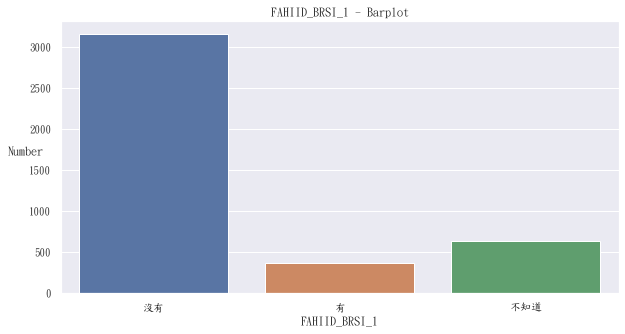

In [356]:
fahiid_brsi_1 = tsr_6.loc[:,"fahiid_brsi_1"]
fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
fahiid_brsi_1 = fahiid_brsi_1.fillna(fahiid_brsi_1.mode()[0])
#print(fahiid_brsi_1)
print(fahiid_brsi_1.value_counts() / len(fahiid_brsi_1))
#print(fahiid_brsi_1.describe())

fahiid_brsi_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_1).set_xticklabels(fahiid_brsi_1_labels)
plt.title("FAHIID_BRSI_1 - Barplot")
plt.xlabel('FAHIID_BRSI_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_2

0.0    0.814743
2.0    0.137316
1.0    0.047940
Name: fahiid_brsi_2, dtype: float64


<ipython-input-357-39d6efcd22c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


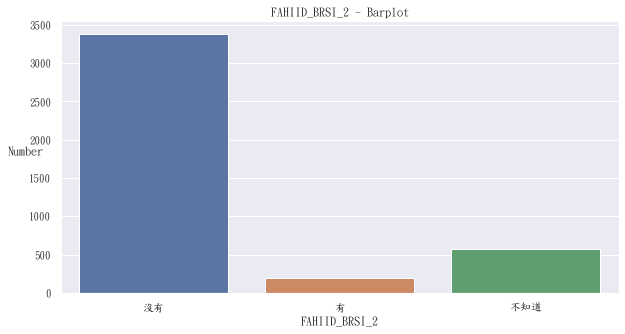

In [357]:
fahiid_brsi_2 = tsr_6.loc[:,"fahiid_brsi_2"]
fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
fahiid_brsi_2 = fahiid_brsi_2.fillna(fahiid_brsi_2.mode()[0])
#print(fahiid_brsi_2)
print(fahiid_brsi_2.value_counts() / len(fahiid_brsi_2))
#print(fahiid_brsi_2.describe())

fahiid_brsi_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_2).set_xticklabels(fahiid_brsi_2_labels)
plt.title("FAHIID_BRSI_2 - Barplot")
plt.xlabel('FAHIID_BRSI_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_3

0    0.761744
2    0.225729
1    0.012527
Name: fahiid_brsi_3, dtype: float64


<ipython-input-358-4f42ffc85491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


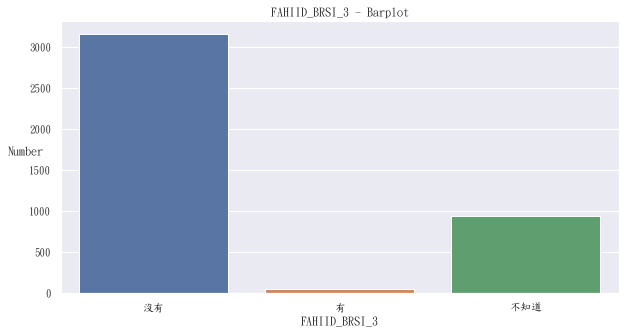

In [358]:
fahiid_brsi_3 = tsr_6.loc[:,"fahiid_brsi_3"]
fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
fahiid_brsi_3 = fahiid_brsi_3.fillna(fahiid_brsi_3.mode()[0])
#print(fahiid_brsi_3)
print(fahiid_brsi_3.value_counts() / len(fahiid_brsi_3))
#print(fahiid_brsi_3.describe())

fahiid_brsi_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_3).set_xticklabels(fahiid_brsi_3_labels)
plt.title("FAHIID_BRSI_3 - Barplot")
plt.xlabel('FAHIID_BRSI_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_4

0    0.801012
2    0.152493
1    0.046495
Name: fahiid_brsi_4, dtype: float64


<ipython-input-359-d2d9e758298c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


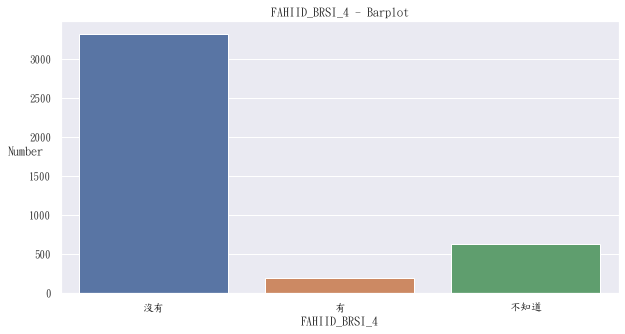

In [359]:
fahiid_brsi_4 = tsr_6.loc[:,"fahiid_brsi_4"]
fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
fahiid_brsi_4 = fahiid_brsi_4.fillna(fahiid_brsi_4.mode()[0])
#print(fahiid_brsi_4)
print(fahiid_brsi_4.value_counts() / len(fahiid_brsi_4))
#print(fahiid_brsi_4.describe())

fahiid_brsi_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_4).set_xticklabels(fahiid_brsi_4_labels)
plt.title("FAHIID_BRSI_4 - Barplot")
plt.xlabel('FAHIID_BRSI_4')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_in

0.0    0.804625
1.0    0.112985
2.0    0.059986
3.0    0.022404
Name: nihs_1a_in, dtype: float64


<ipython-input-360-25bb0ebb9888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan


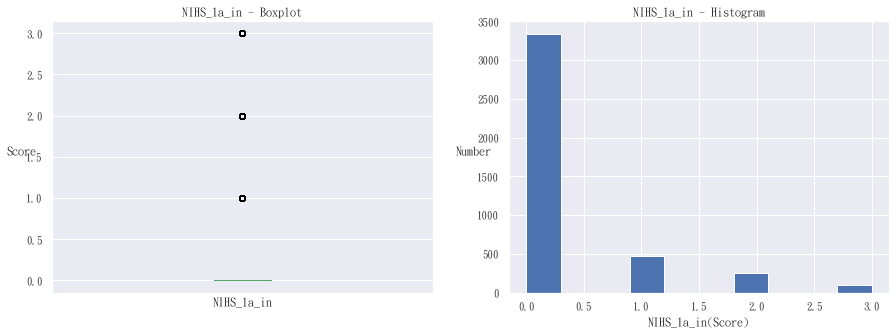

In [360]:
nihs_1a_in = tsr_6.loc[:,"nihs_1a_in"]
nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan
nihs_1a_in = nihs_1a_in.fillna(nihs_1a_in.mode()[0])
#print(nihs_1a_in)
print(nihs_1a_in.value_counts() / len(nihs_1a_in))
#print(nihs_1a_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_in - Boxplot")
ax1.set_xlabel('NIHS_1a_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_in - Histogram")
ax2.set_xlabel('NIHS_1a_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_in

<ipython-input-361-b666e9d10f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan


0.0    0.790171
2.0    0.153939
1.0    0.055890
Name: nihs_1b_in, dtype: float64


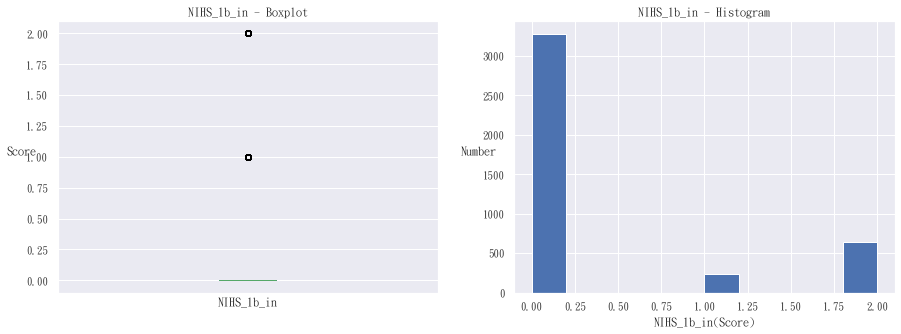

In [361]:
nihs_1b_in = tsr_6.loc[:,"nihs_1b_in"]
nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan
nihs_1b_in = nihs_1b_in.fillna(nihs_1b_in.mode()[0])
#print(nihs_1b_in)
print(nihs_1b_in.value_counts() / len(nihs_1b_in))
#print(nihs_1b_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_in - Boxplot")
ax1.set_xlabel('NIHS_1b_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_in - Histogram")
ax2.set_xlabel('NIHS_1b_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_in

<ipython-input-362-954c1fde8f6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan


0.0    0.836425
2.0    0.112985
1.0    0.050590
Name: nihs_1c_in, dtype: float64


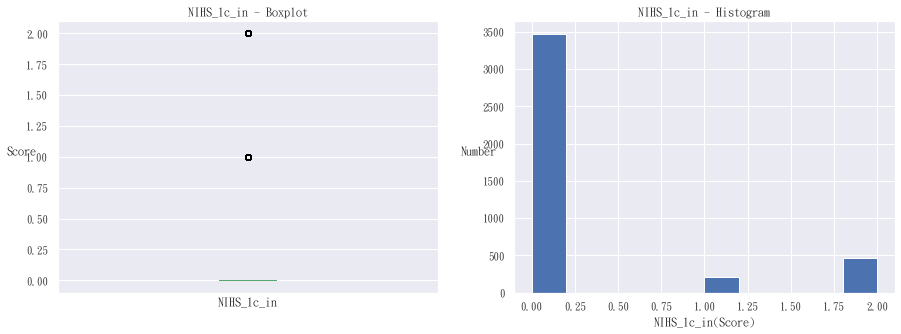

In [362]:
nihs_1c_in = tsr_6.loc[:,"nihs_1c_in"]
nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan
nihs_1c_in = nihs_1c_in.fillna(nihs_1c_in.mode()[0])
#print(nihs_1c_in)
print(nihs_1c_in.value_counts() / len(nihs_1c_in))
#print(nihs_1c_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_in - Boxplot")
ax1.set_xlabel('NIHS_1c_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_in - Histogram")
ax2.set_xlabel('NIHS_1c_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_in

<ipython-input-363-6ffea6db4a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan


0.0    0.803421
1.0    0.115876
2.0    0.080703
Name: nihs_2_in, dtype: float64


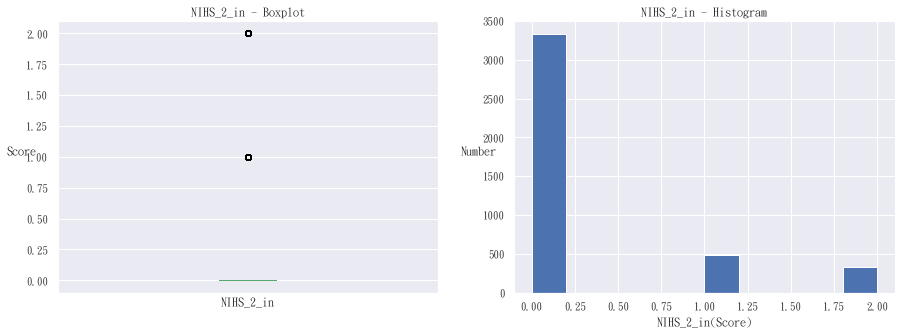

In [363]:
nihs_2_in = tsr_6.loc[:,"nihs_2_in"]
nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan
nihs_2_in = nihs_2_in.fillna(nihs_2_in.mode()[0])
#print(nihs_2_in)
print(nihs_2_in.value_counts() / len(nihs_2_in))
#print(nihs_2_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_in.plot.box(ax = ax1)
ax1.set_title("NIHS_2_in - Boxplot")
ax1.set_xlabel('NIHS_2_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_in - Histogram")
ax2.set_xlabel('NIHS_2_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_in

<ipython-input-364-882a3ccfce2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan


0.0    0.818116
2.0    0.097085
1.0    0.063117
3.0    0.021682
Name: nihs_3_in, dtype: float64


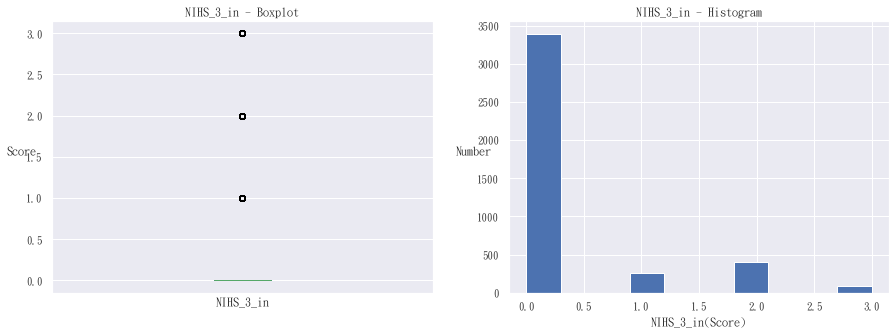

In [364]:
nihs_3_in = tsr_6.loc[:,"nihs_3_in"]
nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan
nihs_3_in = nihs_3_in.fillna(nihs_3_in.mode()[0])
#print(nihs_3_in)
print(nihs_3_in.value_counts() / len(nihs_3_in))
#print(nihs_3_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_in.plot.box(ax = ax1)
ax1.set_title("NIHS_3_in - Boxplot")
ax1.set_xlabel('NIHS_3_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_in - Histogram")
ax2.set_xlabel('NIHS_3_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_4_in

<ipython-input-365-1a3bb0cd550d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan


0.0    0.447844
1.0    0.278487
2.0    0.248615
3.0    0.025054
Name: nihs_4_in, dtype: float64


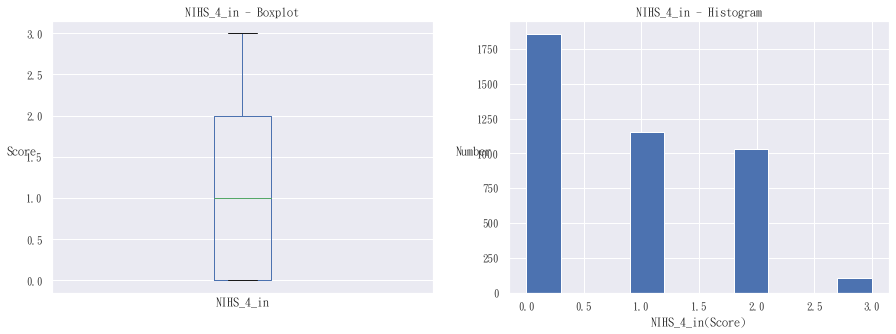

In [365]:
nihs_4_in = tsr_6.loc[:,"nihs_4_in"]
nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan
nihs_4_in = nihs_4_in.fillna(nihs_4_in.mode()[0])
#print(nihs_4_in)
print(nihs_4_in.value_counts() / len(nihs_4_in))
#print(nihs_4_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_in.plot.box(ax = ax1)
ax1.set_title("NIHS_4_in - Boxplot")
ax1.set_xlabel('NIHS_4_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_in - Histogram")
ax2.set_xlabel('NIHS_4_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5aL_in

<ipython-input-366-07f38ba0887d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan


0.0    0.592869
1.0    0.216574
4.0    0.084799
3.0    0.053963
2.0    0.051795
Name: nihs_5al_in, dtype: float64


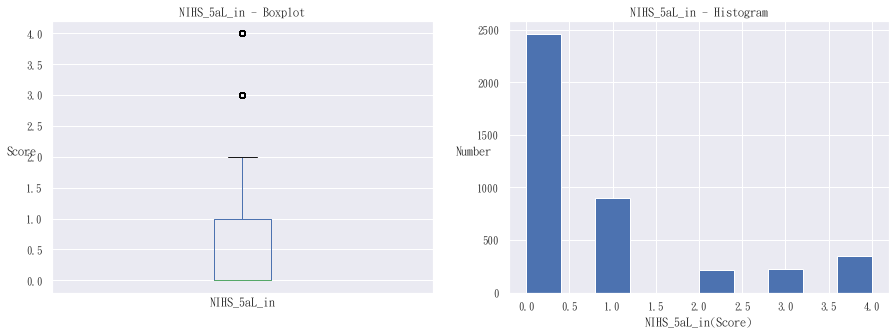

In [366]:
nihs_5al_in = tsr_6.loc[:,"nihs_5al_in"]
nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan
nihs_5al_in = nihs_5al_in.fillna(nihs_5al_in.mode()[0])
#print(nihs_5al_in)
print(nihs_5al_in.value_counts() / len(nihs_5al_in))
#print(nihs_5al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_in - Boxplot")
ax1.set_xlabel('NIHS_5aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_in - Histogram")
ax2.set_xlabel('NIHS_5aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_in

<ipython-input-367-59e7b5e83c96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan


0.0    0.570224
1.0    0.245965
4.0    0.077090
2.0    0.057817
3.0    0.048904
Name: nihs_5br_in, dtype: float64


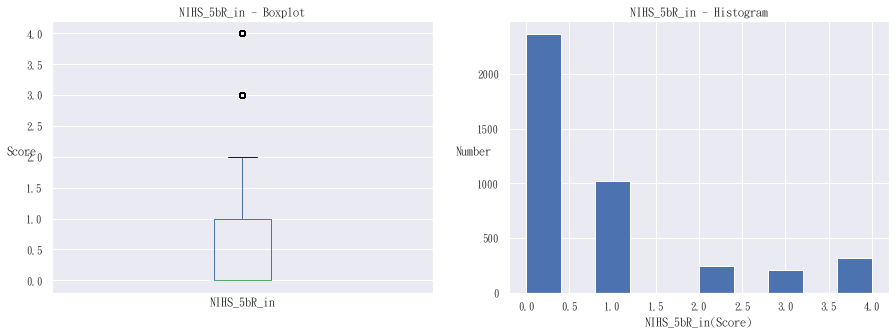

In [367]:
nihs_5br_in = tsr_6.loc[:,"nihs_5br_in"]
nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan
nihs_5br_in = nihs_5br_in.fillna(nihs_5br_in.mode()[0])
#print(nihs_5br_in)
print(nihs_5br_in.value_counts() / len(nihs_5br_in))
#print(nihs_5br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_in - Boxplot")
ax1.set_xlabel('NIHS_5bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_in - Histogram")
ax2.set_xlabel('NIHS_5bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6aL_in

<ipython-input-368-c334ecd7eba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan


0.0    0.610696
1.0    0.216093
4.0    0.062154
2.0    0.061913
3.0    0.049145
Name: nihs_6al_in, dtype: float64


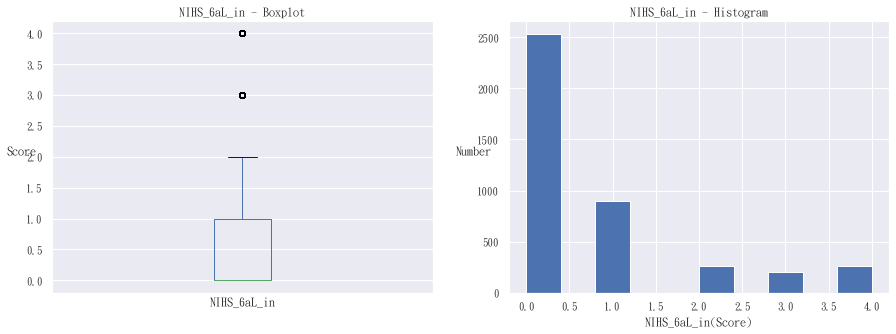

In [368]:
nihs_6al_in = tsr_6.loc[:,"nihs_6al_in"]
nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan
nihs_6al_in = nihs_6al_in.fillna(nihs_6al_in.mode()[0])
#print(nihs_6al_in)
print(nihs_6al_in.value_counts() / len(nihs_6al_in))
#print(nihs_6al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_in - Boxplot")
ax1.set_xlabel('NIHS_6aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_in - Histogram")
ax2.set_xlabel('NIHS_6aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6bR_in

<ipython-input-369-c674fbba43b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan


0.0    0.602746
1.0    0.240906
2.0    0.064081
4.0    0.047218
3.0    0.045049
Name: nihs_6br_in, dtype: float64


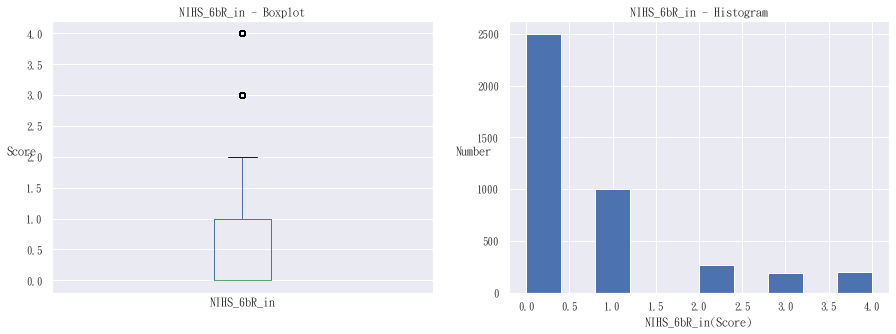

In [369]:
nihs_6br_in = tsr_6.loc[:,"nihs_6br_in"]
nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan
nihs_6br_in = nihs_6br_in.fillna(nihs_6br_in.mode()[0])
#print(nihs_6br_in)
print(nihs_6br_in.value_counts() / len(nihs_6br_in))
#print(nihs_6br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_in - Boxplot")
ax1.set_xlabel('NIHS_6bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_in - Histogram")
ax2.set_xlabel('NIHS_6bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_7_in

<ipython-input-370-06bcdebea67a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan


0.0    0.828475
1.0    0.102144
2.0    0.069381
Name: nihs_7_in, dtype: float64


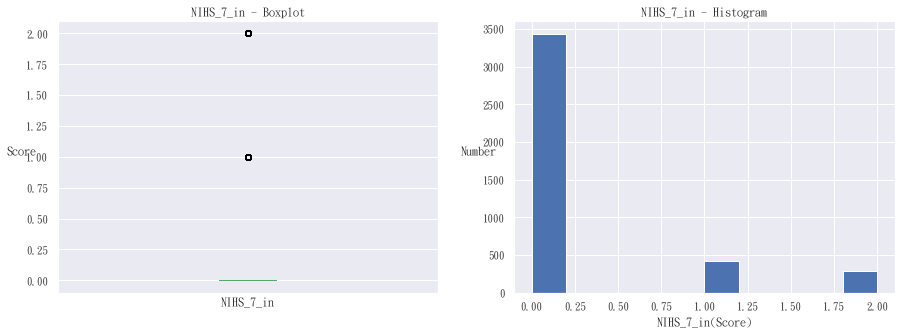

In [370]:
nihs_7_in = tsr_6.loc[:,"nihs_7_in"]
nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan
nihs_7_in = nihs_7_in.fillna(nihs_7_in.mode()[0])
#print(nihs_7_in)
print(nihs_7_in.value_counts() / len(nihs_7_in))
#print(nihs_7_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_in.plot.box(ax = ax1)
ax1.set_title("NIHS_7_in - Boxplot")
ax1.set_xlabel('NIHS_7_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_in - Histogram")
ax2.set_xlabel('NIHS_7_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_8_in

<ipython-input-371-c0fc4de185a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan


0.0    0.586847
1.0    0.344013
2.0    0.069140
Name: nihs_8_in, dtype: float64


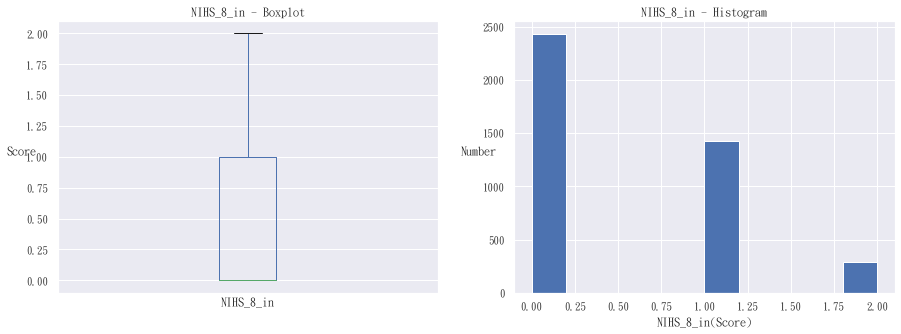

In [371]:
nihs_8_in = tsr_6.loc[:,"nihs_8_in"]
nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan
nihs_8_in = nihs_8_in.fillna(nihs_8_in.mode()[0])
#print(nihs_8_in)
print(nihs_8_in.value_counts() / len(nihs_8_in))
#print(nihs_8_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_in.plot.box(ax = ax1)
ax1.set_title("NIHS_8_in - Boxplot")
ax1.set_xlabel('NIHS_8_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_in - Histogram")
ax2.set_xlabel('NIHS_8_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_9_in

<ipython-input-372-530fd26d4a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan


0.0    0.796675
1.0    0.083353
2.0    0.062636
3.0    0.057336
Name: nihs_9_in, dtype: float64


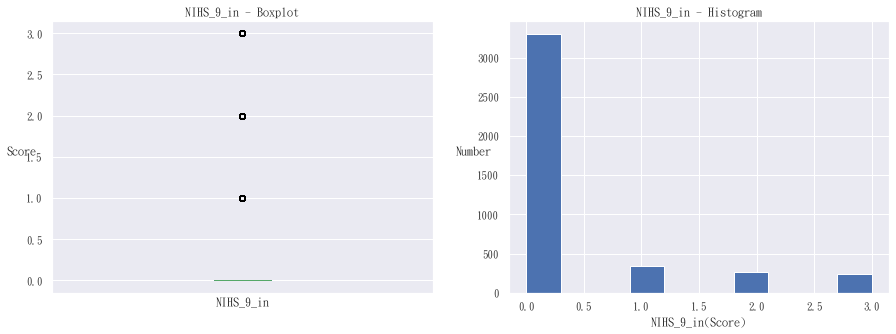

In [372]:
nihs_9_in = tsr_6.loc[:,"nihs_9_in"]
nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan
nihs_9_in = nihs_9_in.fillna(nihs_9_in.mode()[0])
#print(nihs_9_in)
print(nihs_9_in.value_counts() / len(nihs_9_in))
#print(nihs_9_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_in.plot.box(ax = ax1)
ax1.set_title("NIHS_9_in - Boxplot")
ax1.set_xlabel('NIHS_9_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_in - Histogram")
ax2.set_xlabel('NIHS_9_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_10_in

<ipython-input-373-a8491b551ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan


0.0    0.530956
1.0    0.367622
2.0    0.101421
Name: nihs_10_in, dtype: float64


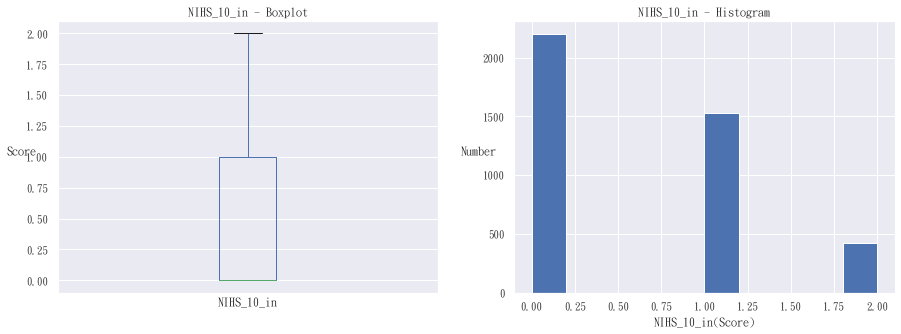

In [373]:
nihs_10_in = tsr_6.loc[:,"nihs_10_in"]
nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan
nihs_10_in = nihs_10_in.fillna(nihs_10_in.mode()[0])
#print(nihs_10_in)
print(nihs_10_in.value_counts() / len(nihs_10_in))
#print(nihs_10_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_in.plot.box(ax = ax1)
ax1.set_title("NIHS_10_in - Boxplot")
ax1.set_xlabel('NIHS_10_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_in - Histogram")
ax2.set_xlabel('NIHS_10_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_in

<ipython-input-374-3dc4fcf729e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan


0.0    0.927246
1.0    0.041436
2.0    0.031318
Name: nihs_11_in, dtype: float64


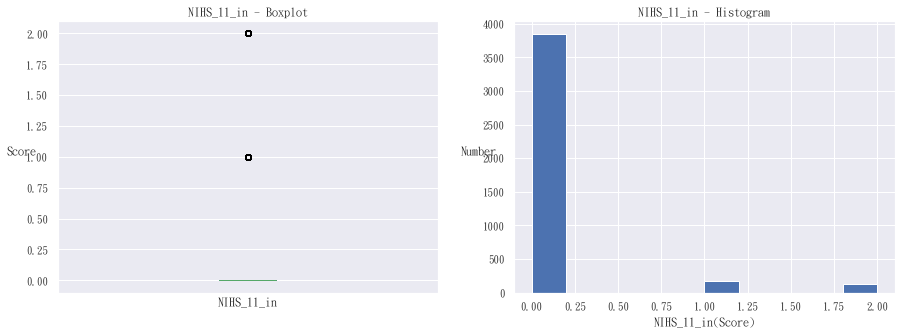

In [374]:
nihs_11_in = tsr_6.loc[:,"nihs_11_in"]
nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan
nihs_11_in = nihs_11_in.fillna(nihs_11_in.mode()[0])
#print(nihs_11_in)
print(nihs_11_in.value_counts() / len(nihs_11_in))
#print(nihs_11_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_in.plot.box(ax = ax1)
ax1.set_title("NIHS_11_in - Boxplot")
ax1.set_xlabel('NIHS_11_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_in - Histogram")
ax2.set_xlabel('NIHS_11_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total_in

count    4151.000000
mean        7.236329
std         7.206242
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        40.000000
dtype: float64


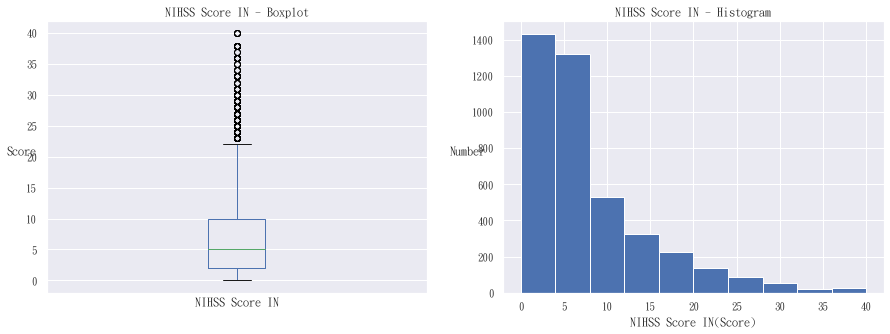

In [375]:
total_in = nihs_1a_in + nihs_1b_in + nihs_1c_in + nihs_2_in + nihs_3_in + nihs_4_in + nihs_5al_in + nihs_5br_in + nihs_6al_in + nihs_6br_in + nihs_7_in + nihs_8_in + nihs_9_in + nihs_10_in + nihs_11_in
#print(total_in)
#print(total_in.value_counts() / len(total_in))
print(total_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_in.plot.box(ax = ax1)
ax1.set_title("NIHSS Score IN - Boxplot")
ax1.set_xlabel('NIHSS Score IN')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_in.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score IN - Histogram")
ax2.set_xlabel('NIHSS Score IN(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_out

<ipython-input-376-9bfc91ceb2cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan


0.0    0.924115
1.0    0.038304
2.0    0.032522
3.0    0.005059
Name: nihs_1a_out, dtype: float64


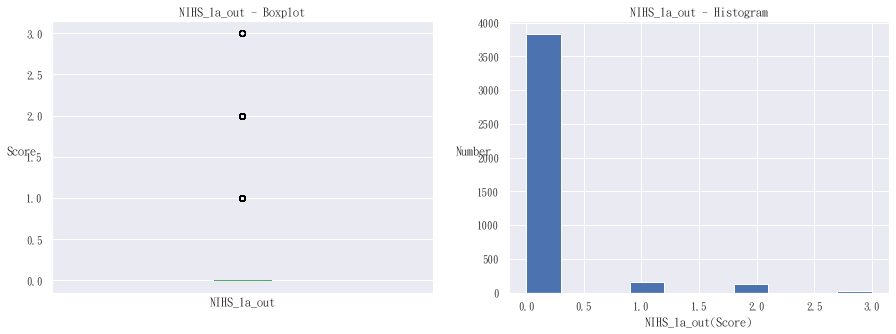

In [376]:
nihs_1a_out = tsr_6.loc[:,"nihs_1a_out"]
nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan
nihs_1a_out = nihs_1a_out.fillna(nihs_1a_out.mode()[0])
#print(nihs_1a_out)
print(nihs_1a_out.value_counts() / len(nihs_1a_out))
#print(nihs_1a_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_out - Boxplot")
ax1.set_xlabel('NIHS_1a_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_out - Histogram")
ax2.set_xlabel('NIHS_1a_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_out

<ipython-input-377-9807942139af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan


0.0    0.843411
2.0    0.104071
1.0    0.052517
Name: nihs_1b_out, dtype: float64


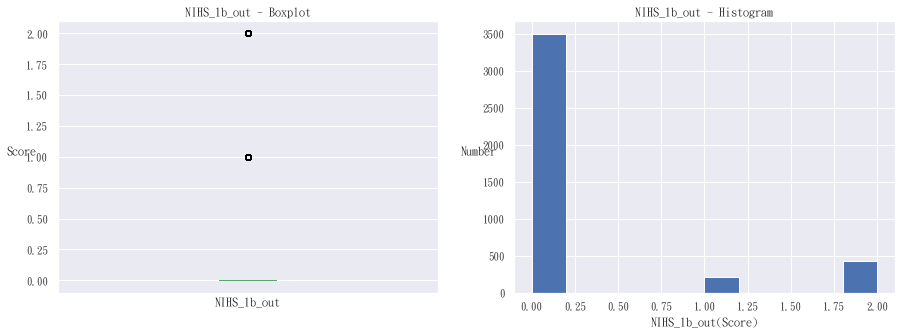

In [377]:
nihs_1b_out = tsr_6.loc[:,"nihs_1b_out"]
nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan
nihs_1b_out = nihs_1b_out.fillna(nihs_1b_out.mode()[0])
#print(nihs_1b_out)
print(nihs_1b_out.value_counts() / len(nihs_1b_out))
#print(nihs_1b_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_out - Boxplot")
ax1.set_xlabel('NIHS_1b_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_out - Histogram")
ax2.set_xlabel('NIHS_1b_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_out

<ipython-input-378-7eb371eecb93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan


0.0    0.902192
2.0    0.064322
1.0    0.033486
Name: nihs_1c_out, dtype: float64


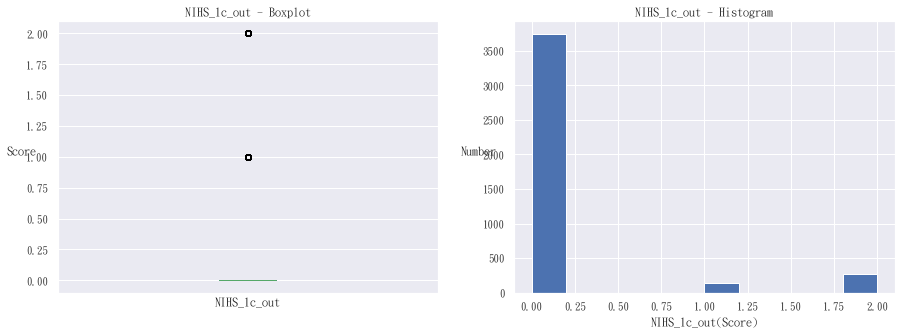

In [378]:
nihs_1c_out = tsr_6.loc[:,"nihs_1c_out"]
nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan
nihs_1c_out = nihs_1c_out.fillna(nihs_1c_out.mode()[0])
#print(nihs_1c_out)
print(nihs_1c_out.value_counts() / len(nihs_1c_out))
#print(nihs_1c_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_out - Boxplot")
ax1.set_xlabel('NIHS_1c_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_out - Histogram")
ax2.set_xlabel('NIHS_1c_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_out

<ipython-input-379-838c35eaeb22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan


0.0    0.871356
1.0    0.086485
2.0    0.042159
Name: nihs_2_out, dtype: float64


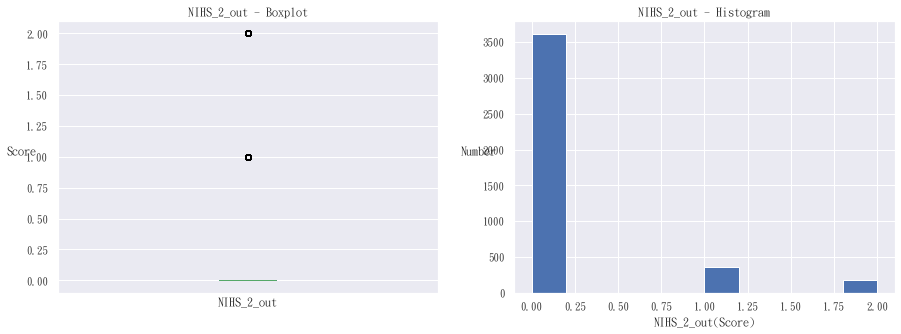

In [379]:
nihs_2_out = tsr_6.loc[:,"nihs_2_out"]
nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan
nihs_2_out = nihs_2_out.fillna(nihs_2_out.mode()[0])
#print(nihs_2_out)
print(nihs_2_out.value_counts() / len(nihs_2_out))
#print(nihs_2_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_out.plot.box(ax = ax1)
ax1.set_title("NIHS_2_out - Boxplot")
ax1.set_xlabel('NIHS_2_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_out - Histogram")
ax2.set_xlabel('NIHS_2_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_out

<ipython-input-380-31d2f721e656>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan


0.0    0.844616
2.0    0.075163
1.0    0.068417
3.0    0.011804
Name: nihs_3_out, dtype: float64


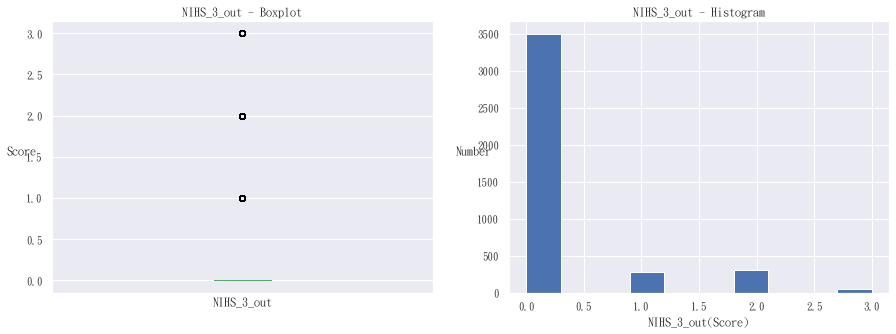

In [380]:
nihs_3_out = tsr_6.loc[:,"nihs_3_out"]
nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan
nihs_3_out = nihs_3_out.fillna(nihs_3_out.mode()[0])
#print(nihs_3_out)
print(nihs_3_out.value_counts() / len(nihs_3_out))
#print(nihs_3_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_out.plot.box(ax = ax1)
ax1.set_title("NIHS_3_out - Boxplot")
ax1.set_xlabel('NIHS_3_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_out - Histogram")
ax2.set_xlabel('NIHS_3_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_4_out

<ipython-input-381-b7dfb2f53000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan


0.0    0.447121
1.0    0.303782
2.0    0.221874
3.0    0.027222
Name: nihs_4_out, dtype: float64


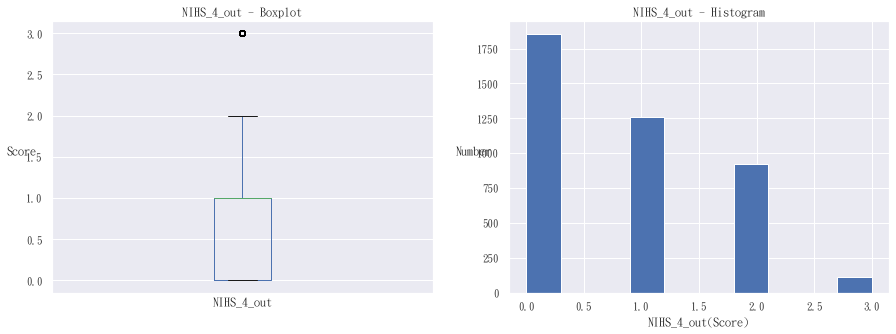

In [381]:
nihs_4_out = tsr_6.loc[:,"nihs_4_out"]
nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan
nihs_4_out = nihs_4_out.fillna(nihs_4_out.mode()[0])
#print(nihs_4_out)
print(nihs_4_out.value_counts() / len(nihs_4_out))
#print(nihs_4_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_out.plot.box(ax = ax1)
ax1.set_title("NIHS_4_out - Boxplot")
ax1.set_xlabel('NIHS_4_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_out - Histogram")
ax2.set_xlabel('NIHS_4_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5aL_out

<ipython-input-382-adefbe8bc8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan


0.0    0.635991
1.0    0.200915
3.0    0.058540
2.0    0.054445
4.0    0.050108
Name: nihs_5al_out, dtype: float64


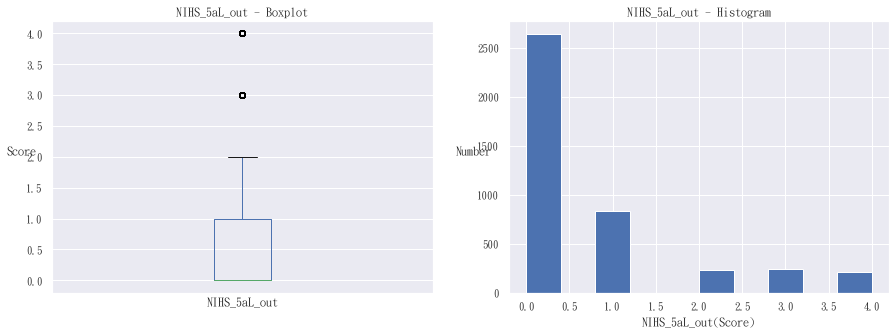

In [382]:
nihs_5al_out = tsr_6.loc[:,"nihs_5al_out"]
nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan
nihs_5al_out = nihs_5al_out.fillna(nihs_5al_out.mode()[0])
#print(nihs_5al_out)
print(nihs_5al_out.value_counts() / len(nihs_5al_out))
#print(nihs_5al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_out - Boxplot")
ax1.set_xlabel('NIHS_5aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_out - Histogram")
ax2.set_xlabel('NIHS_5aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_out

<ipython-input-383-450e27e07c7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan


0.0    0.624910
1.0    0.216574
3.0    0.059745
2.0    0.052036
4.0    0.046736
Name: nihs_5br_out, dtype: float64


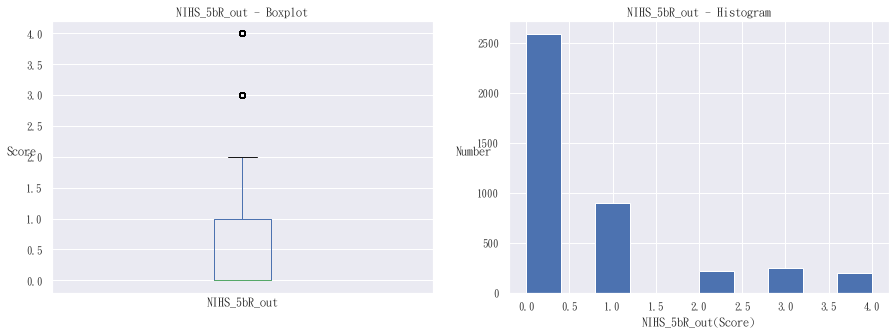

In [383]:
nihs_5br_out = tsr_6.loc[:,"nihs_5br_out"]
nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan
nihs_5br_out = nihs_5br_out.fillna(nihs_5br_out.mode()[0])
#print(nihs_5br_out)
print(nihs_5br_out.value_counts() / len(nihs_5br_out))
#print(nihs_5br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_out - Boxplot")
ax1.set_xlabel('NIHS_5bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_out - Histogram")
ax2.set_xlabel('NIHS_5bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6aL_out

<ipython-input-384-d374a849e799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan


0.0    0.647555
1.0    0.206215
3.0    0.057336
2.0    0.054927
4.0    0.033968
Name: nihs_6al_out, dtype: float64


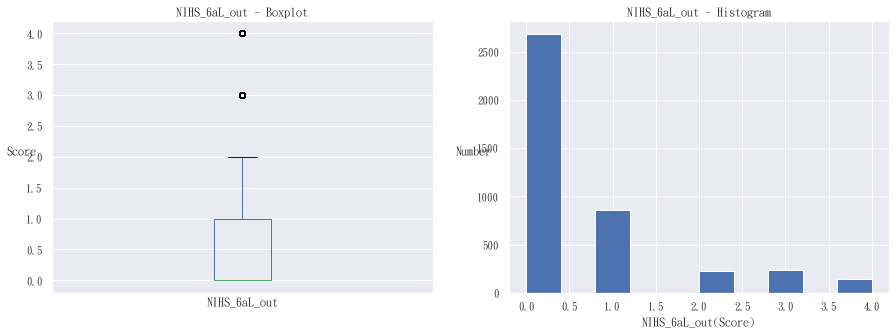

In [384]:
nihs_6al_out = tsr_6.loc[:,"nihs_6al_out"]
nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan
nihs_6al_out = nihs_6al_out.fillna(nihs_6al_out.mode()[0])
#print(nihs_6al_out)
print(nihs_6al_out.value_counts() / len(nihs_6al_out))
#print(nihs_6al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_out - Boxplot")
ax1.set_xlabel('NIHS_6aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_out - Histogram")
ax2.set_xlabel('NIHS_6aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6bR_out

<ipython-input-385-7c3886593973>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan


0.0    0.656709
1.0    0.210311
2.0    0.056613
3.0    0.047458
4.0    0.028909
Name: nihs_6br_out, dtype: float64


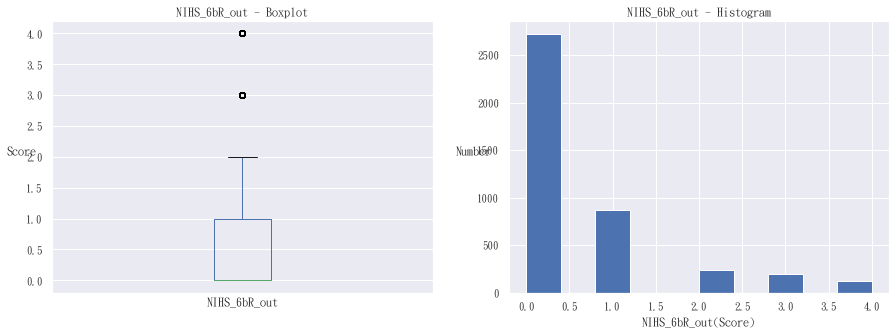

In [385]:
nihs_6br_out = tsr_6.loc[:,"nihs_6br_out"]
nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan
nihs_6br_out = nihs_6br_out.fillna(nihs_6br_out.mode()[0])
#print(nihs_6br_out)
print(nihs_6br_out.value_counts() / len(nihs_6br_out))
#print(nihs_6br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_out - Boxplot")
ax1.set_xlabel('NIHS_6bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_out - Histogram")
ax2.set_xlabel('NIHS_6bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_7_out

<ipython-input-386-aa9f4f76e108>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan


0.0    0.876415
1.0    0.079740
2.0    0.043845
Name: nihs_7_out, dtype: float64


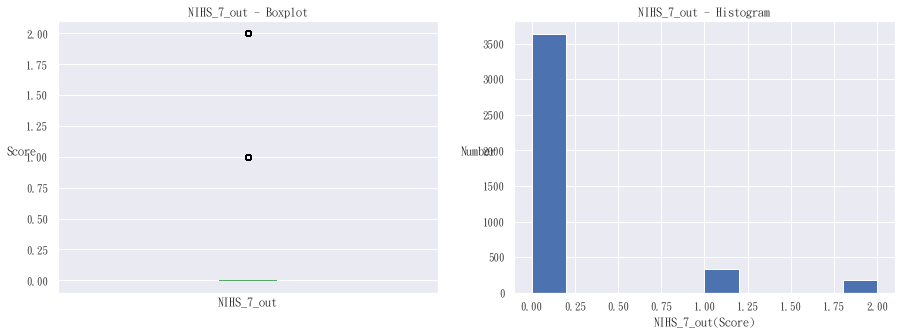

In [386]:
nihs_7_out = tsr_6.loc[:,"nihs_7_out"]
nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan
nihs_7_out = nihs_7_out.fillna(nihs_7_out.mode()[0])
#print(nihs_7_out)
print(nihs_7_out.value_counts() / len(nihs_7_out))
#print(nihs_7_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_out.plot.box(ax = ax1)
ax1.set_title("NIHS_7_out - Boxplot")
ax1.set_xlabel('NIHS_7_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_out - Histogram")
ax2.set_xlabel('NIHS_7_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_8_out

<ipython-input-387-5dd3c1980595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan


0.0    0.679836
1.0    0.278969
2.0    0.041195
Name: nihs_8_out, dtype: float64


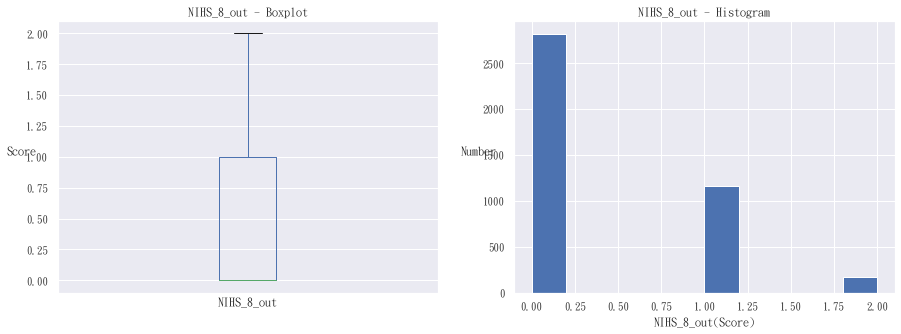

In [387]:
nihs_8_out = tsr_6.loc[:,"nihs_8_out"]
nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan
nihs_8_out = nihs_8_out.fillna(nihs_8_out.mode()[0])
#print(nihs_8_out)
print(nihs_8_out.value_counts() / len(nihs_8_out))
#print(nihs_8_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_out.plot.box(ax = ax1)
ax1.set_title("NIHS_8_out - Boxplot")
ax1.set_xlabel('NIHS_8_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_out - Histogram")
ax2.set_xlabel('NIHS_8_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_9_out

<ipython-input-388-53eb16f66c7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan


0.0    0.818598
1.0    0.081426
3.0    0.050590
2.0    0.049386
Name: nihs_9_out, dtype: float64


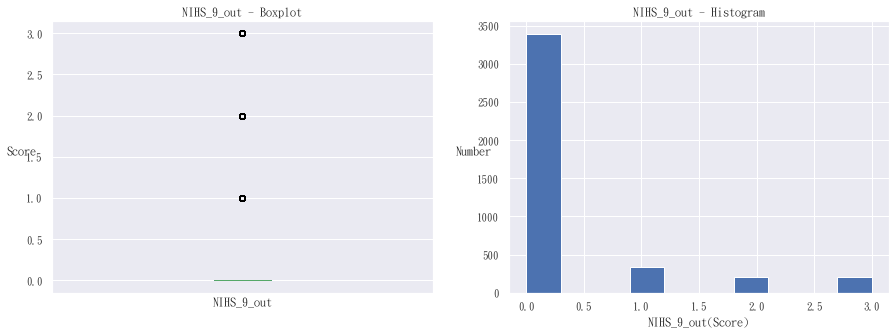

In [388]:
nihs_9_out = tsr_6.loc[:,"nihs_9_out"]
nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan
nihs_9_out = nihs_9_out.fillna(nihs_9_out.mode()[0])
#print(nihs_9_out)
print(nihs_9_out.value_counts() / len(nihs_9_out))
#print(nihs_9_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_out.plot.box(ax = ax1)
ax1.set_title("NIHS_9_out - Boxplot")
ax1.set_xlabel('NIHS_9_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_out - Histogram")
ax2.set_xlabel('NIHS_9_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_10_out

<ipython-input-389-bdcdfb71b53e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan


0.0    0.584437
1.0    0.343050
2.0    0.072513
Name: nihs_10_out, dtype: float64


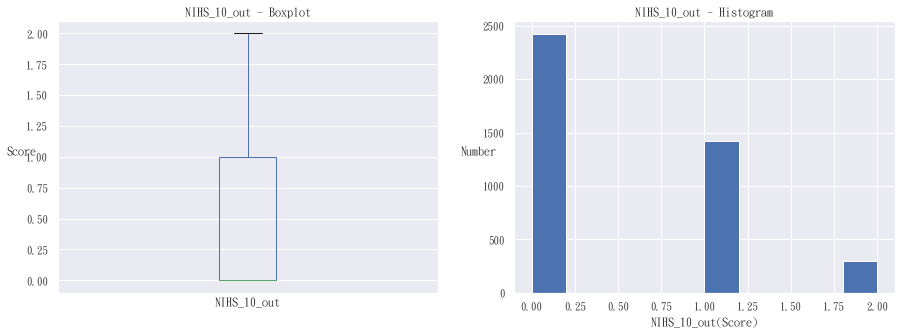

In [389]:
nihs_10_out = tsr_6.loc[:,"nihs_10_out"]
nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan
nihs_10_out = nihs_10_out.fillna(nihs_10_out.mode()[0])
#print(nihs_10_out)
print(nihs_10_out.value_counts() / len(nihs_10_out))
#print(nihs_10_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_out.plot.box(ax = ax1)
ax1.set_title("NIHS_10_out - Boxplot")
ax1.set_xlabel('NIHS_10_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_out - Histogram")
ax2.set_xlabel('NIHS_10_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_out

<ipython-input-390-6699e1c03cc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan


0.0    0.95206
1.0    0.03204
2.0    0.01590
Name: nihs_11_out, dtype: float64


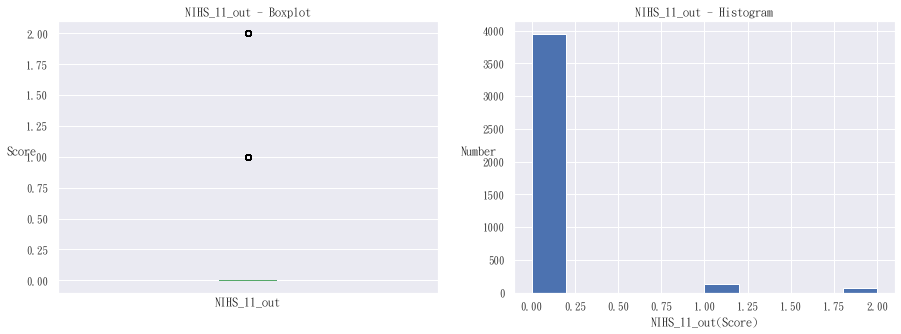

In [390]:
nihs_11_out = tsr_6.loc[:,"nihs_11_out"]
nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan
nihs_11_out = nihs_11_out.fillna(nihs_11_out.mode()[0])
#print(nihs_11_out)
print(nihs_11_out.value_counts() / len(nihs_11_out))
#print(nihs_11_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_out.plot.box(ax = ax1)
ax1.set_title("NIHS_11_out - Boxplot")
ax1.set_xlabel('NIHS_11_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_out - Histogram")
ax2.set_xlabel('NIHS_11_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total_out

count    4151.000000
mean        5.786317
std         6.200573
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        39.000000
dtype: float64


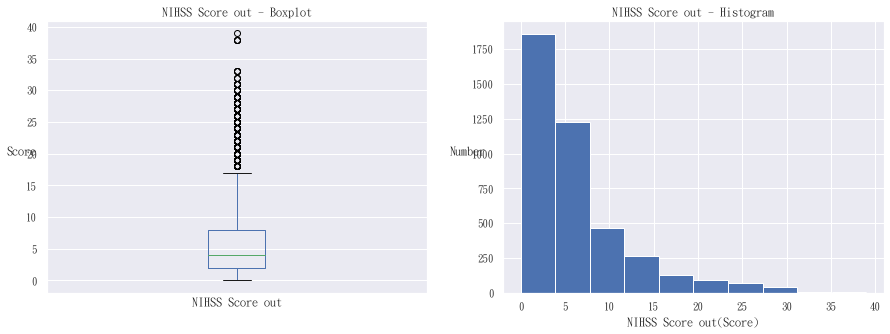

In [391]:
total_out = nihs_1a_out + nihs_1b_out + nihs_1c_out + nihs_2_out + nihs_3_out + nihs_4_out + nihs_5al_out + nihs_5br_out + nihs_6al_out + nihs_6br_out + nihs_7_out + nihs_8_out + nihs_9_out + nihs_10_out + nihs_11_out
#print(total_out)
#print(total_out.value_counts() / len(total_out))
print(total_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_out.plot.box(ax = ax1)
ax1.set_title("NIHSS Score out - Boxplot")
ax1.set_xlabel('NIHSS Score out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_out.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score out - Histogram")
ax2.set_xlabel('NIHSS Score out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# SEX

1    0.608046
0    0.391954
Name: SexName, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


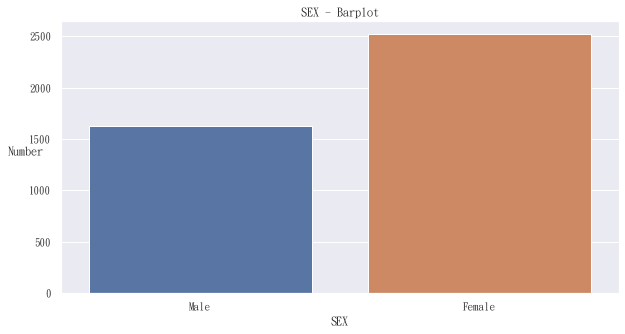

In [392]:
SexName = tsr_6.loc[:, "SexName"]
#print(SexName)
print(SexName.value_counts() / len(SexName))
#print(SexName.describe())

SexName_labels = ["Male","Female"]
sns.countplot(SexName).set_xticklabels(SexName_labels)
plt.title("SEX - Barplot")
plt.xlabel('SEX')
plt.ylabel('Number', rotation=0)
plt.show()

# AGE

count    4151.000000
mean       64.725730
std        12.873715
min        25.000000
25%        56.000000
50%        66.000000
75%        75.000000
max        97.000000
Name: Age, dtype: float64


<ipython-input-393-871288651f1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan


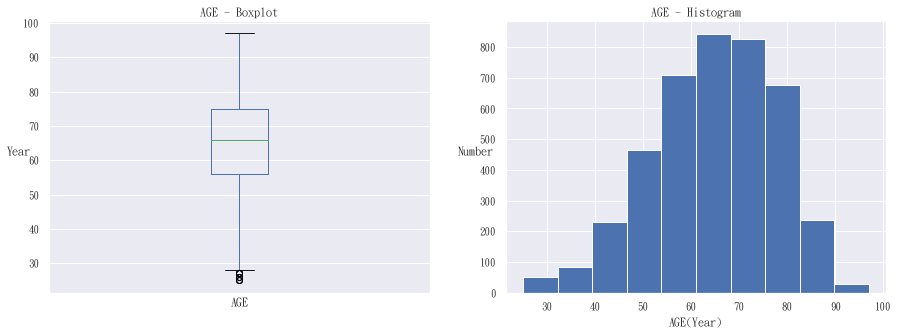

In [393]:
Age = tsr_6.loc[:, "Age"]

q1 = Age.quantile(0.25)
q3 = Age.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan

Age = Age.fillna(round(Age.mean(),3))

#print(Age)
#print(Age.value_counts() / len(Age))
print(Age.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

Age.plot.box(ax = ax1)
ax1.set_title("AGE - Boxplot")
ax1.set_xlabel('AGE')
ax1.set_ylabel('Year', rotation=0)
ax1.set_xticks([])

Age.plot.hist(ax = ax2)
ax2.set_title("AGE - Histogram")
ax2.set_xlabel('AGE(Year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# mRS VERSUS suspected features

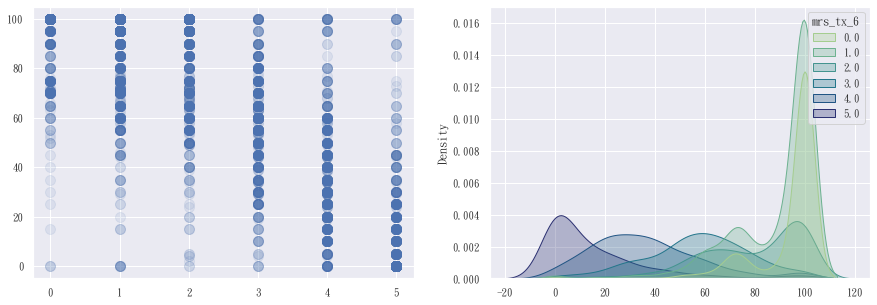

In [394]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, total, s = 100,  alpha=0.1)
sns.kdeplot(total,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

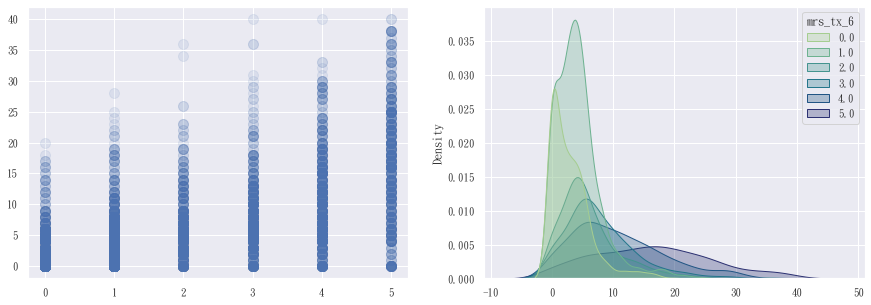

In [395]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, total_in, s = 100,  alpha=0.1)
sns.kdeplot(total_in,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

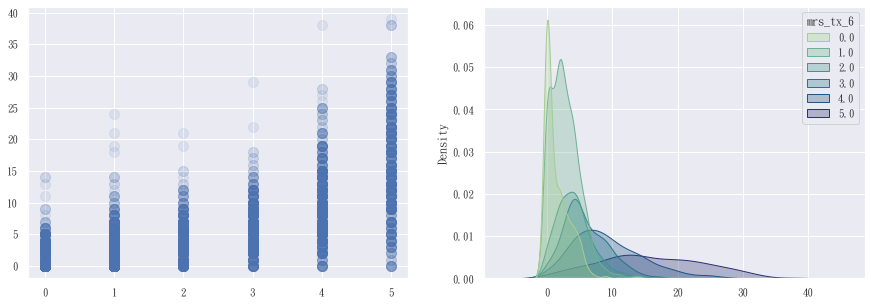

In [396]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, total_out, s = 100,  alpha=0.1)
sns.kdeplot(total_out,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

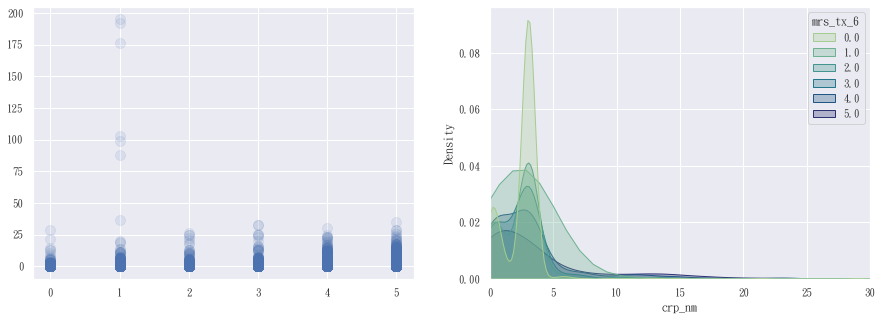

In [397]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, crp_nm, s = 100,  alpha=0.1)
sns.kdeplot(crp_nm,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.xlim(0, 30)
plt.show()

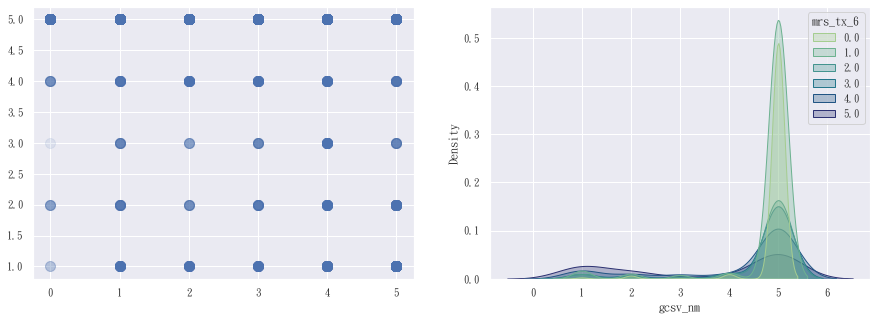

In [398]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, gcsv_nm, s = 100,  alpha=0.1)
sns.kdeplot(gcsv_nm,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

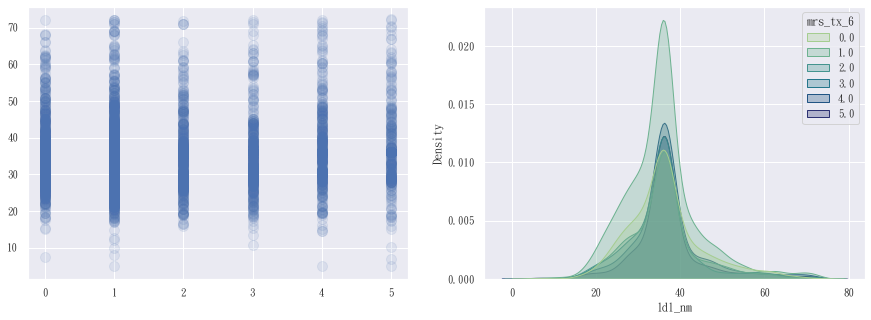

In [399]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, ldl_nm, s = 100,  alpha=0.1)
sns.kdeplot(ldl_nm,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

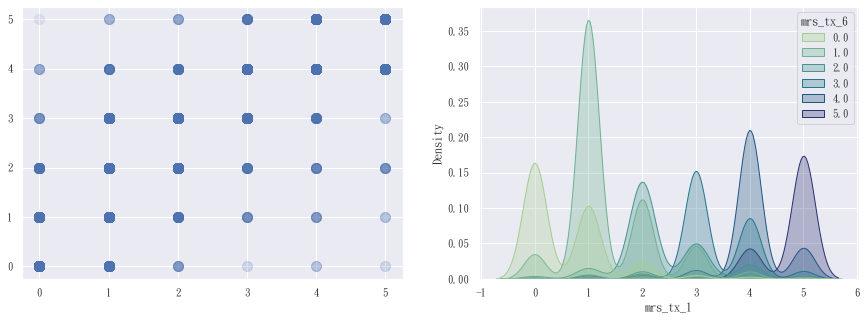

In [400]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, mrs_tx_1, s = 100,  alpha=0.1)
sns.kdeplot(mrs_tx_1,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

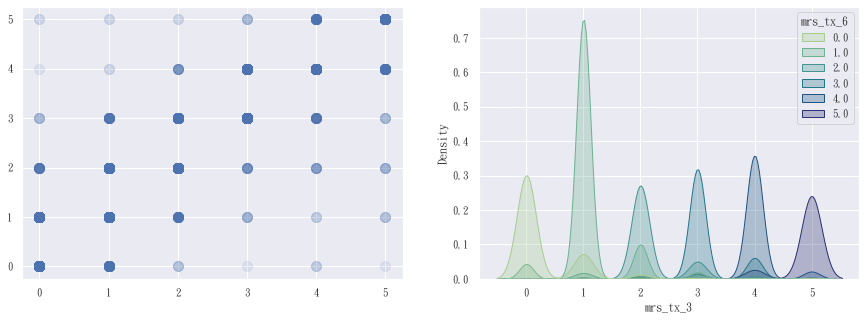

In [401]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_6, mrs_tx_3, s = 100,  alpha=0.1)
sns.kdeplot(mrs_tx_3,hue = mrs_tx_6,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

# Machine Learning

In [402]:
tsr_6_input = pd.DataFrame([height_nm ,  weight_nm ,  edu_id ,  pro_id ,  opc_id ,  ih_fl ,  ivtpamg_nm , hospitalised_time, 
                            nivtpa_id, nivtpa1_fl ,  nivtpa2_fl , nivtpa3_fl ,  nivtpa4_fl ,  nivtpa5_fl ,  nivtpa6_fl , 
                            nivtpa7_fl , nivtpa8_fl ,  nivtpa9_fl ,  nivtpa10_fl , nivtpa11_fl ,  nivtpa99_fl ,  gcse_nm , 
                            gcsv_nm ,  gcsm_nm ,  sbp_nm  , dbp_nm ,  bt_nm ,  hr_nm ,  rr_nm ,  icd_id ,  icdtia_id ,  
                            toast_id , toastle_fl ,  toastli_fl ,  toastsce_fl ,  toastsmo_fl ,  toastsra_fl ,  toastsdi_fl , 
                            toastsmi_fl ,  toastsantip_fl ,  toastsau_fl ,  toastshy_fl ,  toastspr_fl , toastsantit_fl , 
                            toastsho_fl ,  toastshys_fl ,  toastsca_fl ,  toastso_fl ,  toastu_id ,  cich_id ,  csah_id ,
                            thd_id ,  thda_fl ,  thdh_fl ,  thdi_fl ,  thdam_fl ,  thdv_fl ,  thde_fl , thdm_fl ,
                            thdr_fl ,  thdp_fl ,  thdoo_fl ,  hb_nm ,  hct_nm ,  platelet_nm ,  wbc_nm ,  ptt1_nm , ptt2_nm ,
                            ptinr_nm ,  er_nm ,  bun_nm ,  cre_nm ,  alb_nm ,  crp_nm ,  hbac_nm , ac_nm ,  ua_nm ,
                            tcho_nm ,  tg_nm ,  hdl_nm ,  ldl_nm ,  got_nm ,  gpt_nm ,  trm_id ,  trman_fl , trmas_fl , 
                            trmti_fl ,  trmhe_fl ,  trmwa_fl , trmia_fl ,  trmfo_fl ,  trmta_fl ,  trmsd_fl ,  trmre_fl , 
                            trmen_fl , trmen_id,  trmag_fl ,  trmcl_fl ,  trmpl_fl ,  trmlm_fl ,  trmiv_fl ,  trmve_fl , 
                            trmng_fl ,  trmdy_fl ,  trmicu_fl ,  trmsm_fl ,  trmed_fl ,  trmop_fl ,  trmop_id ,  trmot_fl ,
                            om_fl ,  omas_fl ,  omag_fl ,  omti_fl ,  omcl_fl ,  omwa_fl ,  ompl_fl ,  omanh_fl ,
                            omand_fl ,  omora_fl ,  omins_fl ,  omli_fl ,  omst_fl ,  omns_fl , 
                            omliot_fl ,  omliot2_fl ,  am_fl ,  amas_fl ,  amag_fl ,  amti_fl ,  amcl_fl ,  amwa_fl , 
                            ampl_fl ,  amanh_fl ,  amand_fl ,  amli_fl ,  amliot_fl ,  amliot2_fl ,  com_id ,  compn_fl , 
                            comut_fl ,  comug_fl ,  compr_fl ,  compu_fl ,  comac_fl ,  comse_fl , comde_fl ,  como_fl ,
                            det_id ,  detst_fl ,  dethe_fl ,  detho_fl ,  detha_fl ,  detva_fl , detre_fl ,  detme_fl ,
                            deto_fl ,  off_id ,  offd_id ,  offdt_id ,  ct_fl , mri_fl ,  ecg_id , 
                            ecgl_fl ,  ecga_fl ,  ecgq_fl ,  ecgo_fl ,  cd_id ,  cdr_id , cdl_id ,  tccs_id ,  tccsr_id , 
                            tccsl_id ,  tccsba_id ,  mra_fl ,  cta_fl ,  dsa_fl , mcd_id ,  mcdr_id ,  mcdl_id , 
                            mcdba_id ,  mcdri_id ,  mcdli_id ,  omad_fl ,  omad_id , dethoh_fl ,  feeding ,  transfers , 
                            bathing ,  toilet_use ,  grooming ,  mobility ,  stairs , dressing ,  bowel_control , 
                            bladder_control ,  total ,  discharged_mrs ,  cortical_aca_ctr ,  cortical_mca_ctr , 
                            subcortical_aca_ctr ,  subcortical_mca_ctr ,  pca_cortex_ctr ,  thalamus_ctr ,  brainstem_ctr ,
                            cerebellum_ctr ,  watershed_ctr ,  hemorrhagic_infarct_ctr ,  old_stroke_ctci ,
                            cortical_aca_ctl ,  cortical_mca_ctl ,  subcortical_aca_ctl ,  subcortical_mca_ctl ,
                            pca_cortex_ctl ,  thalamus_ctl ,  brainstem_ctl ,  cerebellum_ctl , watershed_ctl , 
                            hemorrhagic_infarct_ctl ,  old_stroke_ctch ,  cortical_aca_mrir , cortical_mca_mrir ,
                            subcortical_aca_mrir ,  subcortical_mca_mrir ,  pca_cortex_mrir , thalamus_mrir , 
                            brainstem_mrir ,  cerebellum_mrir ,  watershed_mrir , hemorrhagic_infarct_mrir ,
                            old_stroke_mrici ,  cortical_aca_mril ,  cortical_mca_mril , subcortical_aca_mril ,
                            subcortical_mca_mril ,  pca_cortex_mril ,  thalamus_mril , brainstem_mril ,  cerebellum_mril , 
                            watershed_mril ,  hemorrhagic_infarct_mril , old_stroke_mrich ,  hd_id ,  pcva_id , pcvaci_id ,  
                            pcvach_id ,  po_id , ur_id , sm_id ,  smc_nm ,  smy_nm ,  smcp_id ,  ptia_id , hc_id ,  hcht_id ,  
                            hchc_id , ht_id ,  dm_id , pad_id , al_id ,  ca_id ,  ot_id ,  thishy_id ,  thisdi_id , 
                            fahiid_parents_1 ,  fahiid_parents_2 ,  fahiid_parents_3 ,  fahiid_parents_4 ,  fahiid_brsi_1 ,
                            fahiid_brsi_2 , fahiid_brsi_3 ,  fahiid_brsi_4 ,  nihs_1a_in ,  nihs_1b_in ,  nihs_1c_in , 
                            nihs_2_in ,  nihs_3_in ,  nihs_4_in , nihs_5al_in ,  nihs_5br_in ,  nihs_6al_in , 
                            nihs_6br_in ,  nihs_7_in ,  nihs_8_in ,  nihs_9_in ,  nihs_10_in , nihs_11_in ,  total_in , 
                            nihs_1a_out ,  nihs_1b_out ,  nihs_1c_out ,  nihs_2_out ,  nihs_3_out ,  nihs_4_out ,
                            nihs_5al_out ,  nihs_5br_out ,  nihs_6al_out ,  nihs_6br_out ,  nihs_7_out ,  nihs_8_out ,
                            nihs_9_out ,  nihs_10_out ,  nihs_11_out ,  total_out ,  SexName ,  Age, mrs_tx_1, mrs_tx_3]).T
tsr_6_input[tsr_6_input == "N"] = 0
tsr_6_input[tsr_6_input == "Y"] = 1
tsr_6_input = tsr_6_input.astype("float64")

tsr_6_input_nomrs = pd.DataFrame([height_nm ,  weight_nm ,  edu_id ,  pro_id ,  opc_id ,  ih_fl ,  ivtpamg_nm , hospitalised_time, 
                            nivtpa_id, nivtpa1_fl ,  nivtpa2_fl , nivtpa3_fl ,  nivtpa4_fl ,  nivtpa5_fl ,  nivtpa6_fl , 
                            nivtpa7_fl , nivtpa8_fl ,  nivtpa9_fl ,  nivtpa10_fl , nivtpa11_fl ,  nivtpa99_fl ,  gcse_nm , 
                            gcsv_nm ,  gcsm_nm ,  sbp_nm  , dbp_nm ,  bt_nm ,  hr_nm ,  rr_nm ,  icd_id ,  icdtia_id ,  
                            toast_id , toastle_fl ,  toastli_fl ,  toastsce_fl ,  toastsmo_fl ,  toastsra_fl ,  toastsdi_fl , 
                            toastsmi_fl ,  toastsantip_fl ,  toastsau_fl ,  toastshy_fl ,  toastspr_fl , toastsantit_fl , 
                            toastsho_fl ,  toastshys_fl ,  toastsca_fl ,  toastso_fl ,  toastu_id ,  cich_id ,  csah_id ,
                            thd_id ,  thda_fl ,  thdh_fl ,  thdi_fl ,  thdam_fl ,  thdv_fl ,  thde_fl , thdm_fl ,
                            thdr_fl ,  thdp_fl ,  thdoo_fl ,  hb_nm ,  hct_nm ,  platelet_nm ,  wbc_nm ,  ptt1_nm , ptt2_nm ,
                            ptinr_nm ,  er_nm ,  bun_nm ,  cre_nm ,  alb_nm ,  crp_nm ,  hbac_nm , ac_nm ,  ua_nm ,
                            tcho_nm ,  tg_nm ,  hdl_nm ,  ldl_nm ,  got_nm ,  gpt_nm ,  trm_id ,  trman_fl , trmas_fl , 
                            trmti_fl ,  trmhe_fl ,  trmwa_fl , trmia_fl ,  trmfo_fl ,  trmta_fl ,  trmsd_fl ,  trmre_fl , 
                            trmen_fl , trmen_id,  trmag_fl ,  trmcl_fl ,  trmpl_fl ,  trmlm_fl ,  trmiv_fl ,  trmve_fl , 
                            trmng_fl ,  trmdy_fl ,  trmicu_fl ,  trmsm_fl ,  trmed_fl ,  trmop_fl ,  trmop_id ,  trmot_fl ,
                            om_fl ,  omas_fl ,  omag_fl ,  omti_fl ,  omcl_fl ,  omwa_fl ,  ompl_fl ,  omanh_fl ,
                            omand_fl ,  omora_fl ,  omins_fl ,  omli_fl ,  omst_fl ,  omns_fl , 
                            omliot_fl ,  omliot2_fl ,  am_fl ,  amas_fl ,  amag_fl ,  amti_fl ,  amcl_fl ,  amwa_fl , 
                            ampl_fl ,  amanh_fl ,  amand_fl ,  amli_fl ,  amliot_fl ,  amliot2_fl ,  com_id ,  compn_fl , 
                            comut_fl ,  comug_fl ,  compr_fl ,  compu_fl ,  comac_fl ,  comse_fl , comde_fl ,  como_fl ,
                            det_id ,  detst_fl ,  dethe_fl ,  detho_fl ,  detha_fl ,  detva_fl , detre_fl ,  detme_fl ,
                            deto_fl ,  off_id ,  offd_id ,  offdt_id ,  ct_fl , mri_fl ,  ecg_id , 
                            ecgl_fl ,  ecga_fl ,  ecgq_fl ,  ecgo_fl ,  cd_id ,  cdr_id , cdl_id ,  tccs_id ,  tccsr_id , 
                            tccsl_id ,  tccsba_id ,  mra_fl ,  cta_fl ,  dsa_fl , mcd_id ,  mcdr_id ,  mcdl_id , 
                            mcdba_id ,  mcdri_id ,  mcdli_id ,  omad_fl ,  omad_id , dethoh_fl ,  feeding ,  transfers , 
                            bathing ,  toilet_use ,  grooming ,  mobility ,  stairs , dressing ,  bowel_control , 
                            bladder_control ,  total ,  discharged_mrs ,  cortical_aca_ctr ,  cortical_mca_ctr , 
                            subcortical_aca_ctr ,  subcortical_mca_ctr ,  pca_cortex_ctr ,  thalamus_ctr ,  brainstem_ctr ,
                            cerebellum_ctr ,  watershed_ctr ,  hemorrhagic_infarct_ctr ,  old_stroke_ctci ,
                            cortical_aca_ctl ,  cortical_mca_ctl ,  subcortical_aca_ctl ,  subcortical_mca_ctl ,
                            pca_cortex_ctl ,  thalamus_ctl ,  brainstem_ctl ,  cerebellum_ctl , watershed_ctl , 
                            hemorrhagic_infarct_ctl ,  old_stroke_ctch ,  cortical_aca_mrir , cortical_mca_mrir ,
                            subcortical_aca_mrir ,  subcortical_mca_mrir ,  pca_cortex_mrir , thalamus_mrir , 
                            brainstem_mrir ,  cerebellum_mrir ,  watershed_mrir , hemorrhagic_infarct_mrir ,
                            old_stroke_mrici ,  cortical_aca_mril ,  cortical_mca_mril , subcortical_aca_mril ,
                            subcortical_mca_mril ,  pca_cortex_mril ,  thalamus_mril , brainstem_mril ,  cerebellum_mril , 
                            watershed_mril ,  hemorrhagic_infarct_mril , old_stroke_mrich ,  hd_id ,  pcva_id , 
                            pcvaci_id ,  pcvach_id ,  po_id , ur_id , sm_id ,  smc_nm ,  smy_nm ,  smcp_id ,  ptia_id ,
                            hc_id ,  hcht_id ,  hchc_id , ht_id ,  dm_id ,
                            pad_id , al_id ,  ca_id ,  ot_id ,  thishy_id ,  thisdi_id , 
                            fahiid_parents_1 ,  fahiid_parents_2 ,  fahiid_parents_3 ,  fahiid_parents_4 ,  fahiid_brsi_1 ,
                            fahiid_brsi_2 , fahiid_brsi_3 ,  fahiid_brsi_4 ,  nihs_1a_in ,  nihs_1b_in ,  nihs_1c_in , 
                            nihs_2_in ,  nihs_3_in ,  nihs_4_in , nihs_5al_in ,  nihs_5br_in ,  nihs_6al_in , 
                            nihs_6br_in ,  nihs_7_in ,  nihs_8_in ,  nihs_9_in ,  nihs_10_in , nihs_11_in ,  total_in , 
                            nihs_1a_out ,  nihs_1b_out ,  nihs_1c_out ,  nihs_2_out ,  nihs_3_out ,  nihs_4_out ,
                            nihs_5al_out ,  nihs_5br_out ,  nihs_6al_out ,  nihs_6br_out ,  nihs_7_out ,  nihs_8_out ,
                            nihs_9_out ,  nihs_10_out ,  nihs_11_out ,  total_out ,  SexName ,  Age]).T
tsr_6_input_nomrs[tsr_6_input_nomrs == "N"] = 0
tsr_6_input_nomrs[tsr_6_input_nomrs == "Y"] = 1
tsr_6_input_nomrs = tsr_6_input_nomrs.astype("float64")

In [403]:
tsr_6_input = np.array(tsr_6_input.values)
tsr_6_input_nomrs = np.array(tsr_6_input_nomrs.values)

## 6 classes

In [404]:
tsr_6_output = pd.DataFrame(mrs_tx_6)
tsr_6_output = tsr_6_output.astype("float64")
tsr_6_output = np.array(tsr_6_output.values)

### SVM

In [405]:
svc = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores = cross_val_score(svc,tsr_6_input,tsr_6_output,cv = 10,scoring='accuracy')
print(svc_scores)

svc.fit(tsr_6_input,tsr_6_output)
svc_predict =svc.predict_proba(tsr_6_input)

[0.50721154 0.54457831 0.58313253 0.55662651 0.55421687 0.59759036
 0.59759036 0.6313253  0.61686747 0.47228916]


In [406]:
print(svc_scores.mean(), svc_scores.std())
print(svc_predict)

0.5661428405931418 0.046976073203737104
[[2.66672835e-01 4.51798859e-01 1.70312376e-01 6.30204268e-02
  4.64044316e-02 1.79107095e-03]
 [4.71695076e-01 3.54693375e-01 1.10825630e-01 3.03151813e-02
  3.23555039e-02 1.15233820e-04]
 [4.12004550e-01 4.29673997e-01 9.44681281e-02 2.56224132e-02
  3.79762626e-02 2.54648821e-04]
 ...
 [1.73631427e-04 1.79524681e-02 8.66104317e-02 8.43294945e-02
  3.50023861e-01 4.60910113e-01]
 [4.35914678e-01 3.80267628e-01 1.09636085e-01 5.40383013e-02
  2.01344134e-02 8.89385716e-06]
 [2.05452323e-01 5.76246583e-01 1.27523807e-01 5.51464255e-02
  3.46228314e-02 1.00803021e-03]]


In [407]:
svc_pred = cross_val_predict(svc,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, svc_pred)

array([[486, 190,   2,   7,   1,   1],
       [199, 927,  21,  36,  12,   4],
       [  9, 408,  26,  80,  42,   6],
       [  2, 136,  40, 207, 174,  20],
       [  3,  24,   6, 117, 307, 150],
       [  2,  11,   1,  21,  76, 397]], dtype=int64)

In [408]:
svc1 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores1 = cross_val_score(svc1,tsr_6_input_nomrs,tsr_6_output,cv = 10,scoring='accuracy')
print(svc_scores1)

svc1.fit(tsr_6_input_nomrs,tsr_6_output)
svc_predict1 =svc1.predict_proba(tsr_6_input_nomrs)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.41586538 0.45542169 0.48192771 0.44337349 0.44096386 0.48915663
 0.48433735 0.47710843 0.48915663 0.38554217]


In [409]:
print(svc_scores1.mean(), svc_scores1.std())
print(svc_predict1)

0.45628533364226137 0.03328613710894917
[[0.25858924 0.40326397 0.17046824 0.07528057 0.06063267 0.03176531]
 [0.3428573  0.36284474 0.15219672 0.05438908 0.07338151 0.01433064]
 [0.25188528 0.42628218 0.14676985 0.05770424 0.0894982  0.02786025]
 ...
 [0.01233617 0.05539183 0.10605876 0.11224208 0.35842505 0.35554612]
 [0.12533588 0.40963977 0.22418923 0.15946625 0.07396133 0.00740754]
 [0.32349621 0.48921828 0.10305465 0.04294908 0.02692212 0.01435966]]


In [410]:
svc_pred1 = cross_val_predict(svc1,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, svc_pred1)

array([[486, 190,   2,   7,   1,   1],
       [199, 927,  21,  36,  12,   4],
       [  9, 408,  26,  80,  42,   6],
       [  2, 136,  40, 207, 174,  20],
       [  3,  24,   6, 117, 307, 150],
       [  2,  11,   1,  21,  76, 397]], dtype=int64)

### RF

In [411]:
rf = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores = cross_val_score(rf,tsr_6_input,tsr_6_output,cv = 10,scoring='accuracy')
print(rf_scores)

rf.fit(tsr_6_input,tsr_6_output)
rf_predict =rf.predict_proba(tsr_6_input)

[0.82932692 0.7686747  0.79277108 0.79277108 0.74939759 0.82409639
 0.85301205 0.86506024 0.8746988  0.76626506]


In [412]:
print(rf_scores.mean(), rf_scores.std())
print(rf_predict)

0.8116073911028729 0.04183401737962441
[[0.04412761 0.85879936 0.03305796 0.02626427 0.02265971 0.01509109]
 [0.86681203 0.04268061 0.02866018 0.02542071 0.02185878 0.0145677 ]
 [0.84147475 0.06734001 0.02890295 0.02557971 0.02204128 0.01466131]
 ...
 [0.03510687 0.04683912 0.03173089 0.02811529 0.582823   0.27538483]
 [0.82053575 0.08827927 0.02887522 0.02561816 0.02203611 0.01465549]
 [0.07913256 0.81558812 0.03062448 0.03589705 0.02321009 0.0155477 ]]


In [413]:
rf_pred = cross_val_predict(rf,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, rf_pred)

array([[521, 134,  24,   5,   1,   2],
       [ 62, 981, 128,  24,   2,   2],
       [  4,  47, 427,  80,  11,   2],
       [  1,   7,  16, 461,  89,   5],
       [  3,   3,   9,  23, 536,  33],
       [  1,   5,   5,   6,  48, 443]], dtype=int64)

In [414]:
rf1 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores1 = cross_val_score(rf1,tsr_6_input_nomrs,tsr_6_output,cv = 10,scoring='accuracy')
print(rf_scores1)

rf1.fit(tsr_6_input_nomrs,tsr_6_output)
rf_predict1 =rf1.predict_proba(tsr_6_input_nomrs)

[0.53846154 0.53493976 0.4939759  0.47228916 0.48192771 0.52048193
 0.56385542 0.56626506 0.58072289 0.49879518]


In [415]:
print(rf_scores1.mean(), rf_scores1.std())
print(rf_predict1)

0.525171455050973 0.03591735330475581
[[0.10607109 0.71065771 0.06019399 0.05559378 0.04251912 0.02496431]
 [0.57280787 0.25268509 0.05841584 0.05050487 0.04136509 0.02422124]
 [0.67427349 0.12453124 0.0638641  0.0510623  0.04193721 0.04433166]
 ...
 [0.04682858 0.08155006 0.0574723  0.05821505 0.53887332 0.21706067]
 [0.51858786 0.24588134 0.11566986 0.05236571 0.04258877 0.02490645]
 [0.09902159 0.65722447 0.11430914 0.05940763 0.04407924 0.02595792]]


In [416]:
rf_pred1 = cross_val_predict(rf1,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, rf_pred1)

array([[521, 134,  24,   5,   1,   2],
       [ 62, 981, 128,  24,   2,   2],
       [  4,  47, 427,  80,  11,   2],
       [  1,   7,  16, 461,  89,   5],
       [  3,   3,   9,  23, 536,  33],
       [  1,   5,   5,   6,  48, 443]], dtype=int64)

### XGBoost

In [417]:
xgb = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="multi:softprob", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores = cross_val_score(xgb,tsr_6_input,tsr_6_output,cv = 10)
print(xgb_scores)

xgb.fit(tsr_6_input,tsr_6_output)
xgb_predict =xgb.predict_proba(tsr_6_input)

[0.84615385 0.77590361 0.78795181 0.78554217 0.75662651 0.82891566
 0.85060241 0.86506024 0.8746988  0.77831325]


In [418]:
print(xgb_scores.mean(), xgb_scores.std())
print(xgb_predict)

0.8149768303985171 0.04047590146851028
[[0.04464455 0.84126104 0.04135995 0.03162952 0.0231195  0.01798544]
 [0.835618   0.0570041  0.03871965 0.02982088 0.02192473 0.01691265]
 [0.8345013  0.05793636 0.03882302 0.02985004 0.02196044 0.01692883]
 ...
 [0.04053621 0.05616335 0.04047445 0.03095035 0.64823836 0.1836373 ]
 [0.83809157 0.0548033  0.03859771 0.02976255 0.02186065 0.01688423]
 [0.043315   0.83999584 0.04354934 0.03192831 0.02317199 0.01803952]]


In [419]:
xgb_pred = cross_val_predict(xgb,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, xgb_pred)

array([[529, 130,  21,   4,   1,   2],
       [ 56, 989, 126,  24,   2,   2],
       [  4,  50, 425,  79,  11,   2],
       [  1,   7,  14, 465,  87,   5],
       [  3,   3,   9,  28, 531,  33],
       [  1,   4,   6,   6,  47, 444]], dtype=int64)

In [420]:
xgb1 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="multi:softprob", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores1 = cross_val_score(xgb1,tsr_6_input_nomrs,tsr_6_output,cv = 10)
print(xgb_scores1)

xgb1.fit(tsr_6_input_nomrs,tsr_6_output)
xgb_predict1 =xgb1.predict_proba(tsr_6_input_nomrs)

[0.55528846 0.51084337 0.49156627 0.46746988 0.47951807 0.53012048
 0.55903614 0.53975904 0.54698795 0.47228916]


In [421]:
print(xgb_scores1.mean(), xgb_scores1.std())
print(xgb_predict1)

0.5152878822984246 0.03366763203962197
[[0.1028954  0.63584967 0.08943779 0.07196156 0.06316865 0.03668693]
 [0.61184197 0.14951199 0.08112974 0.06593604 0.05816944 0.03341082]
 [0.64369177 0.1216951  0.08011804 0.0646326  0.05698434 0.03287815]
 ...
 [0.06665759 0.09522467 0.08065732 0.0660619  0.52753213 0.16386639]
 [0.54792816 0.19442877 0.09917671 0.0671218  0.05770214 0.03364241]
 [0.09799368 0.58145797 0.14131425 0.07605247 0.06513586 0.03804578]]


In [422]:
xgb_pred1 = cross_val_predict(xgb1,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, xgb_pred1)

array([[529, 130,  21,   4,   1,   2],
       [ 56, 989, 126,  24,   2,   2],
       [  4,  50, 425,  79,  11,   2],
       [  1,   7,  14, 465,  87,   5],
       [  3,   3,   9,  28, 531,  33],
       [  1,   4,   6,   6,  47, 444]], dtype=int64)

## 2 classes

In [423]:
tsr_6_output[(tsr_6_output == 0)|(tsr_6_output == 1)|(tsr_6_output == 2)] = 0
tsr_6_output[(tsr_6_output == 3)|(tsr_6_output == 4)|(tsr_6_output == 5)] = 1

### SVM

In [424]:
svc2 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores2 = cross_val_score(svc2,tsr_6_input,tsr_6_output,cv = 10,scoring='accuracy')
print(svc_scores2)

svc2.fit(tsr_6_input,tsr_6_output)
svc_predict2 =svc2.predict_proba(tsr_6_input)

[0.90865385 0.94457831 0.94939759 0.95180723 0.93253012 0.95421687
 0.95662651 0.95180723 0.93975904 0.92048193]


In [425]:
print(svc_scores2.mean(), svc_scores2.std())
print(svc_predict2)

0.9409858665430955 0.015087515804204053
[[9.89571180e-01 1.04288196e-02]
 [9.98925183e-01 1.07481680e-03]
 [9.97847710e-01 2.15229011e-03]
 ...
 [1.11942334e-03 9.98880577e-01]
 [9.99870935e-01 1.29065290e-04]
 [9.94420809e-01 5.57919148e-03]]


In [426]:
svc_pred2 = cross_val_predict(svc2,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, svc_pred2)

array([[2327,  130],
       [ 115, 1579]], dtype=int64)

In [427]:
svc3 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19))  
svc_scores3 = cross_val_score(svc3,tsr_6_input_nomrs,tsr_6_output,cv = 10,scoring='accuracy')
print(svc_scores3)

svc3.fit(tsr_6_input_nomrs,tsr_6_output)
svc_predict3 =svc3.predict_proba(tsr_6_input_nomrs)

[0.82211538 0.87710843 0.89156627 0.89156627 0.87951807 0.88674699
 0.84819277 0.82650602 0.85060241 0.81686747]


In [428]:
print(svc_scores3.mean(), svc_scores3.std())
print(svc_predict3)

0.8590790083410565 0.028317242021646195
[[0.9420901  0.0579099 ]
 [0.96318384 0.03681616]
 [0.94335071 0.05664929]
 ...
 [0.01143637 0.98856363]
 [0.9363383  0.0636617 ]
 [0.98443521 0.01556479]]


In [429]:
svc_pred3 = cross_val_predict(svc3,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, svc_pred3)

array([[2327,  130],
       [ 115, 1579]], dtype=int64)

### RF

In [430]:
rf2 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores2 = cross_val_score(rf2,tsr_6_input,tsr_6_output,cv = 10,scoring='accuracy')
print(rf_scores2)

rf2.fit(tsr_6_input,tsr_6_output)
rf_predict2 =rf2.predict_proba(tsr_6_input)

[0.92548077 0.94939759 0.9686747  0.97108434 0.94216867 0.95903614
 0.96144578 0.96626506 0.95903614 0.94698795]


In [431]:
print(rf_scores2.mean(), rf_scores2.std())
print(rf_predict2)

0.9549577154772937 0.01333538093955953
[[0.97887915 0.02112085]
 [0.97887915 0.02112085]
 [0.97887915 0.02112085]
 ...
 [0.03466335 0.96533665]
 [0.97396065 0.02603935]
 [0.97390636 0.02609364]]


In [432]:
rf_pred2 = cross_val_predict(rf2,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, rf_pred2)

array([[2327,  130],
       [  57, 1637]], dtype=int64)

In [433]:
rf3 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores3 = cross_val_score(rf3,tsr_6_input_nomrs,tsr_6_output,cv = 10,scoring='accuracy')
print(rf_scores3)

rf3.fit(tsr_6_input_nomrs,tsr_6_output)
rf_predict3 =rf3.predict_proba(tsr_6_input_nomrs)

[0.81009615 0.88192771 0.87710843 0.87228916 0.8626506  0.88433735
 0.83855422 0.84096386 0.85542169 0.83855422]


In [434]:
print(rf_scores3.mean(), rf_scores3.std())
print(rf_predict3)

0.8561903382761816 0.02274272689136079
[[0.93937944 0.06062056]
 [0.954522   0.045478  ]
 [0.954522   0.045478  ]
 ...
 [0.10723495 0.89276505]
 [0.93578587 0.06421413]
 [0.93872322 0.06127678]]


In [435]:
rf_pred3 = cross_val_predict(rf3,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, rf_pred3)

array([[2327,  130],
       [  57, 1637]], dtype=int64)

### XGBoost

In [436]:
xgb2 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="binary:logistic", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19))
xgb_scores2 = cross_val_score(xgb2,tsr_6_input,tsr_6_output,cv = 10)
print(xgb_scores2)

xgb2.fit(tsr_6_input,tsr_6_output)
xgb_predict2 =xgb2.predict_proba(tsr_6_input)

[0.92307692 0.95180723 0.96626506 0.97349398 0.93975904 0.96626506
 0.95903614 0.96626506 0.94939759 0.94457831]


In [437]:
print(xgb_scores2.mean(), xgb_scores2.std())
print(xgb_predict2)

0.9539944392956441 0.014596139853615906
[[0.975528   0.024472  ]
 [0.97552142 0.02447858]
 [0.97549175 0.02450825]
 ...
 [0.06036736 0.93963264]
 [0.97556156 0.02443844]
 [0.97545016 0.02454984]]


In [438]:
xgb_pred2 = cross_val_predict(xgb2,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, xgb_pred2)

array([[2332,  125],
       [  66, 1628]], dtype=int64)

In [439]:
xgb3 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="binary:logistic", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19))
xgb_scores3 = cross_val_score(xgb3,tsr_6_input_nomrs,tsr_6_output,cv = 10)
print(xgb_scores3)

xgb3.fit(tsr_6_input_nomrs,tsr_6_output)
xgb_predict3 =xgb3.predict_proba(tsr_6_input_nomrs)

[0.84134615 0.88433735 0.87228916 0.87710843 0.8626506  0.89638554
 0.84819277 0.83614458 0.86506024 0.84096386]


In [440]:
print(xgb_scores3.mean(), xgb_scores3.std())
print(xgb_predict3)

0.8624478683966637 0.019368737285099465
[[0.91469674 0.08530326]
 [0.91367872 0.08632128]
 [0.91313614 0.08686386]
 ...
 [0.10523067 0.89476933]
 [0.91431675 0.08568325]
 [0.91442613 0.08557387]]


In [441]:
xgb_pred3 = cross_val_predict(xgb3,tsr_6_input,tsr_6_output,cv = 10)
confusion_matrix(tsr_6_output, xgb_pred3)

array([[2332,  125],
       [  66, 1628]], dtype=int64)

# Summary

## Mean & Std

In [442]:
svc_mean = np.array([svc_scores.mean(), svc_scores.std(), svc_scores[0], svc_scores[1], svc_scores[2], svc_scores[3],
                     svc_scores[4], svc_scores[5], svc_scores[6], svc_scores[7], svc_scores[8], svc_scores[9]])
rf_mean = np.array([rf_scores.mean(), rf_scores.std(), rf_scores[0], rf_scores[1], rf_scores[2], rf_scores[3],rf_scores[4], 
                    rf_scores[5], rf_scores[6], rf_scores[7], rf_scores[8], rf_scores[9]])
xgb_mean = np.array([xgb_scores.mean(), xgb_scores.std(), xgb_scores[0], xgb_scores[1], xgb_scores[2], xgb_scores[3],
                     xgb_scores[4], xgb_scores[5], xgb_scores[6], xgb_scores[7], xgb_scores[8], xgb_scores[9]])

svc_mean1 = np.array([svc_scores1.mean(), svc_scores1.std(), svc_scores1[0], svc_scores1[1], svc_scores1[2], svc_scores1[3],
                     svc_scores1[4], svc_scores1[5], svc_scores1[6], svc_scores1[7], svc_scores1[8], svc_scores1[9]])
rf_mean1 = np.array([rf_scores1.mean(), rf_scores1.std(), rf_scores1[0], rf_scores1[1], rf_scores1[2], rf_scores1[3],rf_scores1[4], 
                    rf_scores1[5], rf_scores1[6], rf_scores1[7], rf_scores1[8], rf_scores1[9]])
xgb_mean1 = np.array([xgb_scores1.mean(), xgb_scores1.std(), xgb_scores1[0], xgb_scores1[1], xgb_scores1[2], xgb_scores1[3],
                     xgb_scores1[4], xgb_scores1[5], xgb_scores1[6], xgb_scores1[7], xgb_scores1[8], xgb_scores1[9]])

svc_mean2 = np.array([svc_scores2.mean(), svc_scores2.std(), svc_scores2[0], svc_scores2[1], svc_scores2[2], svc_scores2[3],
                     svc_scores2[4], svc_scores2[5], svc_scores2[6], svc_scores2[7], svc_scores2[8], svc_scores2[9]])
rf_mean2 = np.array([rf_scores2.mean(), rf_scores2.std(), rf_scores2[0], rf_scores2[1], rf_scores2[2], rf_scores2[3],rf_scores2[4], 
                    rf_scores2[5], rf_scores2[6], rf_scores2[7], rf_scores2[8], rf_scores2[9]])
xgb_mean2 = np.array([xgb_scores2.mean(), xgb_scores2.std(), xgb_scores2[0], xgb_scores2[1], xgb_scores2[2], xgb_scores2[3],
                     xgb_scores2[4], xgb_scores2[5], xgb_scores2[6], xgb_scores2[7], xgb_scores2[8], xgb_scores2[9]])

svc_mean3 = np.array([svc_scores3.mean(), svc_scores3.std(), svc_scores3[0], svc_scores3[1], svc_scores3[2], svc_scores3[3],
                     svc_scores3[4], svc_scores3[5], svc_scores3[6], svc_scores3[7], svc_scores3[8], svc_scores3[9]])
rf_mean3 = np.array([rf_scores3.mean(), rf_scores3.std(), rf_scores3[0], rf_scores3[1], rf_scores3[2], rf_scores3[3],rf_scores3[4], 
                    rf_scores3[5], rf_scores3[6], rf_scores3[7], rf_scores3[8], rf_scores3[9]])
xgb_mean3 = np.array([xgb_scores3.mean(), xgb_scores3.std(), xgb_scores3[0], xgb_scores3[1], xgb_scores3[2], xgb_scores3[3],
                     xgb_scores3[4], xgb_scores3[5], xgb_scores3[6], xgb_scores3[7], xgb_scores3[8], xgb_scores3[9]])

In [443]:
tsr_6_mean = pd.DataFrame([svc_mean, rf_mean, xgb_mean,svc_mean1, rf_mean1, xgb_mean1, svc_mean2, rf_mean2, xgb_mean2,
                          svc_mean3, rf_mean3, xgb_mean3]).T
tsr_6_mean.index = ["Mean", "Std", "mean_1", "mean_2", "mean_3", "mean_4", "mean_5", "mean_6", "mean_7", "mean_8", "mean_9", "mean_10"]
tsr_6_mean.columns = ["svc", 'rf', 'xgb', "svc1", 'rf1', 'xgb1', 'svc2', 'rf2', 'xgb2', "svc3", 'rf3', 'xgb3']

In [444]:
csv_save = os.path.join("..", "result", "TSR_EHR", "tsr_6_mean.csv")
tsr_6_mean.to_csv(csv_save, index = True)

## Predicted Probability

In [445]:
svc_predict_0 = svc_predict[:, 0]
svc_predict_1 = svc_predict[:, 1]
svc_predict_2 = svc_predict[:, 2]
svc_predict_3 = svc_predict[:, 3]
svc_predict_4 = svc_predict[:, 4]
svc_predict_5 = svc_predict[:, 5]

rf_predict_0 = rf_predict[:, 0]
rf_predict_1 = rf_predict[:, 1]
rf_predict_2 = rf_predict[:, 2]
rf_predict_3 = rf_predict[:, 3]
rf_predict_4 = rf_predict[:, 4]
rf_predict_5 = rf_predict[:, 5]

xgb_predict_0 = xgb_predict[:, 0]
xgb_predict_1 = xgb_predict[:, 1]
xgb_predict_2 = xgb_predict[:, 2]
xgb_predict_3 = xgb_predict[:, 3]
xgb_predict_4 = xgb_predict[:, 4]
xgb_predict_5 = xgb_predict[:, 5]

svc_predict1_0 = svc_predict1[:, 0]
svc_predict1_1 = svc_predict1[:, 1]
svc_predict1_2 = svc_predict1[:, 2]
svc_predict1_3 = svc_predict1[:, 3]
svc_predict1_4 = svc_predict1[:, 4]
svc_predict1_5 = svc_predict1[:, 5]

rf_predict1_0 = rf_predict1[:, 0]
rf_predict1_1 = rf_predict1[:, 1]
rf_predict1_2 = rf_predict1[:, 2]
rf_predict1_3 = rf_predict1[:, 3]
rf_predict1_4 = rf_predict1[:, 4]
rf_predict1_5 = rf_predict1[:, 5]

xgb_predict1_0 = xgb_predict1[:, 0]
xgb_predict1_1 = xgb_predict1[:, 1]
xgb_predict1_2 = xgb_predict1[:, 2]
xgb_predict1_3 = xgb_predict1[:, 3]
xgb_predict1_4 = xgb_predict1[:, 4]
xgb_predict1_5 = xgb_predict1[:, 5]

svc_predict2_0 = svc_predict2[:, 0]
svc_predict2_1 = svc_predict2[:, 1]

rf_predict2_0 = rf_predict2[:, 0]
rf_predict2_1 = rf_predict2[:, 1]

xgb_predict2_0 = xgb_predict2[:, 0]
xgb_predict2_1 = xgb_predict2[:, 1]

svc_predict3_0 = svc_predict3[:, 0]
svc_predict3_1 = svc_predict3[:, 1]

rf_predict3_0 = rf_predict3[:, 0]
rf_predict3_1 = rf_predict3[:, 1]

xgb_predict3_0 = xgb_predict3[:, 0]
xgb_predict3_1 = xgb_predict3[:, 1]

In [446]:
tsr_6_pred_prob = pd.DataFrame([svc_predict_0, svc_predict_1, svc_predict_2, svc_predict_3, svc_predict_4, svc_predict_5, 
                               rf_predict_0, rf_predict_1, rf_predict_2, rf_predict_3, rf_predict_4, rf_predict_5,
                               xgb_predict_0, xgb_predict_1, xgb_predict_2, xgb_predict_3, xgb_predict_4, xgb_predict_5,
                                svc_predict1_0, svc_predict1_1, svc_predict1_2, svc_predict1_3, svc_predict1_4, svc_predict1_5, 
                               rf_predict1_0, rf_predict1_1, rf_predict1_2, rf_predict1_3, rf_predict1_4, rf_predict1_5,
                               xgb_predict1_0, xgb_predict1_1, xgb_predict1_2, xgb_predict1_3, xgb_predict1_4, xgb_predict1_5,
                               svc_predict2_0, svc_predict2_1, rf_predict2_0, rf_predict2_1, xgb_predict2_0, xgb_predict2_1,
                               svc_predict3_0, svc_predict3_1, rf_predict3_0, rf_predict3_1, xgb_predict3_0, xgb_predict3_1]).T
tsr_6_pred_prob.columns = ["svc_predict_0", "svc_predict_1", "svc_predict_2", "svc_predict_3", "svc_predict_4", "svc_predict_5", 
                           "rf_predict_0", "rf_predict_1", "rf_predict_2", "rf_predict_3", "rf_predict_4", "rf_predict_5",
                           "xgb_predict_0", "xgb_predict_1", "xgb_predict_2", 'xgb_predict_3', "xgb_predict_4", "xgb_predict_5",
                           "svc_predict1_0", "svc_predict1_1", "svc_predict1_2", "svc_predict1_3", "svc_predict1_4", "svc_predict1_5", 
                           "rf_predict1_0", "rf_predict1_1", "rf_predict1_2", "rf_predict1_3", "rf_predict1_4", "rf_predict1_5",
                           "xgb_predict1_0", "xgb_predict1_1", "xgb_predict1_2", 'xgb_predict1_3', "xgb_predict1_4", "xgb_predict1_5",
                           "svc_predict2_0", "svc_predict2_1", "rf_predict2_0", "rf_predict2_1", "xgb_predict2_0", "xgb_predict2_1",
                           "svc_predict3_0", "svc_predict3_1", "rf_predict3_0", "rf_predict3_1", "xgb_predict3_0", "xgb_predict3_1"]

In [447]:
csv_save2 = os.path.join("..", "result", "TSR_EHR", "tsr_6_pred_prob.csv")
tsr_6_pred_prob.to_csv(csv_save2, index = False)